# Predicting Heart Disease using Machine Learning



This note book uses Python based machine learning techniques adn data science libraries in an attempt to build a machine learning model capable of predicting heart disease in an individual.

The Data to be used for the training of the Machine Learning model is obtained from https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation Criteria

The model is considered successful if it can predict heart disease in a patient with a 95% accuracy rate.

The Data has the following features:

    
* age, in years
* sex, 1=male, 0 = female
* cp, chest pain type (4 values)
* trestbps, resting blood pressure levels in mmHg
* chol, serum cholestoral in mg/dl
* fbs, if fasting blood sugar > 120 mg/dl (Y/N)
* restecg, resting electrocardiographic results (values 0,1,2)
* thalach, maximum heart rate achieved
* exang, exercise induced angina(Y/N)
* oldpeak, ST depression induced by exercise relative to rest
* slopethe, the slope of the peak exercise ST segment
* canumber, number of major vessels (0-3) colored by flourosopy
* thal, 3 = normal; 6 = fixed defect; 7 = reversable defect
* target, 1 if patient has heart disease, 0 if otherwise

In [1]:
#Data analysis and visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import models from sklearn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
#Load the data
df = pd.read_csv('heart-disease.csv')
df.shape #rows and columsn

(303, 14)

## Exploratory Data Analysis (EDA)

The goal is this section is to familiarise ourselves with the data.

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# How many of each class are there?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

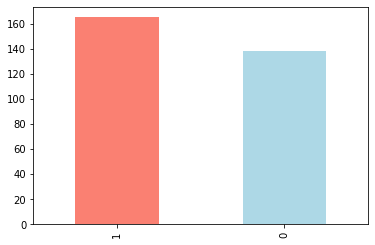

In [6]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [7]:
# Do we have missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Finding Patterns in the Data

### Heart Disease Freq vs Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Note that there are a lot more males than females

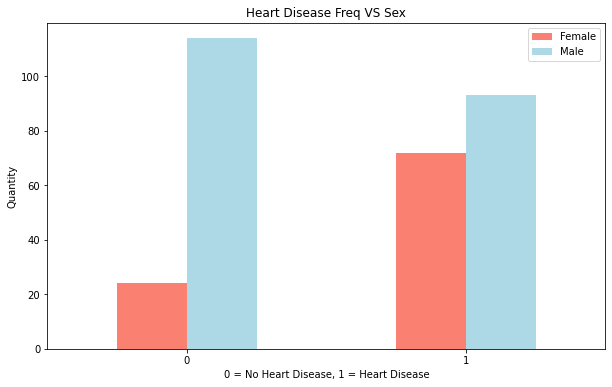

In [10]:
#Compare target to sex column
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize=(10,6), color = ['salmon', 'lightblue']);

plt.title('Heart Disease Freq VS Sex')
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease' )
plt.ylabel('Quantity')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

According to the data, Women have a much higher risk of heart disease as compared to men

### Age Vs Max Heart Rate(thalach) for Heart Disease

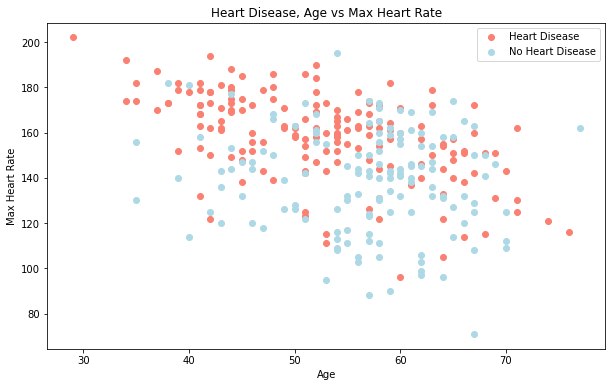

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c = 'salmon')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c = 'lightblue')

plt.title('Heart Disease, Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Heart Disease','No Heart Disease']);

Possible associations from the data:
* Younger people with higher heart rates are more likely to have heart disease.
* As age increases, the above correlation applies less.

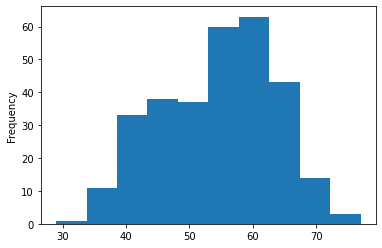

In [12]:
df.age.plot.hist();

### Heart Disease vs Chest pain Type
* 1) cp 0: Chest pain related to decreased blood flow
* 2) cp 1: Chest pain not related to heart
* 3) cp 2: tyically pain related to the oesophagus
* 4) cp 3: Chest pain not showing signs of disease

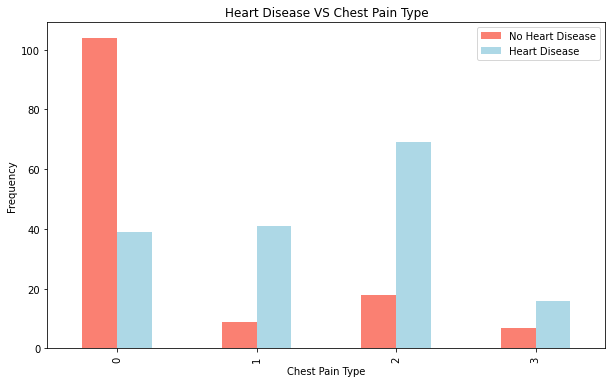

In [13]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10,6),color = ['salmon','lightblue'])
plt.title('Heart Disease VS Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease', 'Heart Disease']);

From the above we see counterintuitive data; CP type 1 relating to the heart shows low incidence of heart disease and vice versa for CP 1, 2, and 3.

### Correlation Matrix

In [14]:
corr_matrix = df.corr()
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

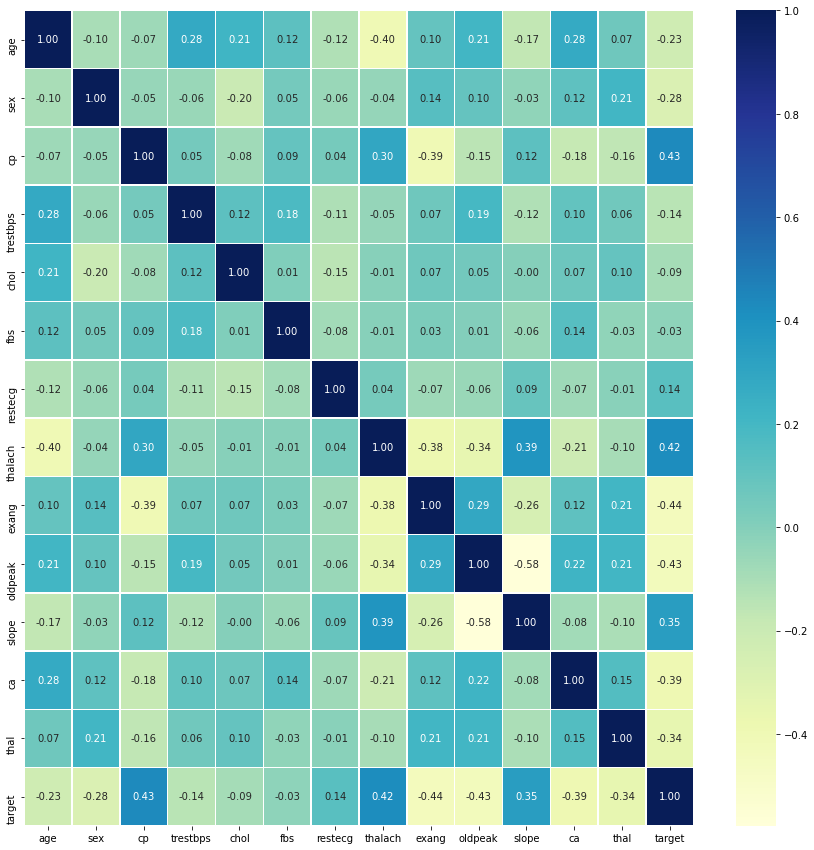

In [15]:
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu');

From the above correlation matrix, we can see that cholesterol(chol) and fasting blood sugar levels (fbs), have a very low correlation to the target values. Thus, we may consider dropping these columns to see if it improves model accuracy.


## Modelling

In [16]:
# Split the data 
np.random.seed(42)
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

We're going to try 3 different models:
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [18]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'LinearSVC': LinearSVC()
         }

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    This function fits and evaluates our models in the dictionary with training and test data respectively
    '''
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores


In [19]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\quahw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\quahw\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'LinearSVC': 0.819672131147541}

## Hyperparameter Tuning

In [20]:
#Tuning KNN
test_scores = []

#Creat a list of different values for n_neighbours
neighbours = range(1,21)

knn = KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))


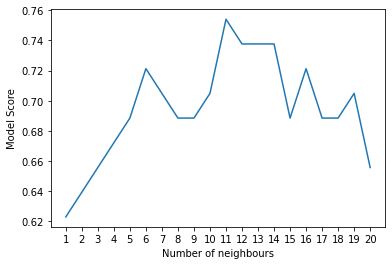

In [21]:
plt.plot(neighbours, test_scores, label = 'Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbours')
plt.ylabel('Model Score');

In [22]:
max(test_scores)

0.7540983606557377

Even after tuning, KNN Classifier still does not perform as well as Logistic Regression and RandomForest. Henceforth we shall disregard this method.

## Using RandomizedSearchCV

We will tune our Logistic Regression model, our LinearSVC model, and our Random Forest model with RandomizedSearchCV

In [23]:
#Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}

#Creating a hyperparameter grid for RandomForestClassifier
rf_grid={'n_estimators':np.arange(10,1000,50),
         'max_depth':[None, 3,5,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf': np.arange(1,20,2)}

In [24]:
# Tune LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [26]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

We did not improve the score for our LogisticRegression Model

In [27]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter = 20,
                         verbose = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
rs_rf.score(X_test, y_test)

0.8688524590163934

Our RandomForest has increased, but it is still not better than our LogisticRegression model.

Henceforth shall move forwards with LogisRegression

## Hyperparameter tuning with GridSearchCV

In [30]:
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver':['liblinear']}
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose = True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Model Evaluation

We want to evaluate our models performance and find out more information beyond accuracy.
* ROC curve and AUC score
* Confusion Matrix
* Clasification Report
* Precision
* Recall
* F1 score

First, we need to make predictions with our model

In [33]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

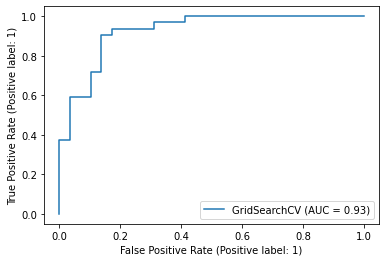

In [34]:
#Plot ROC curve and calculate AUC

plot_roc_curve(gs_log_reg, X_test, y_test);

In [35]:
# Confusion Matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

The model has done relatively well from the ROC AUC and confusion matrix results. Now lets look at the classification report

In [36]:
print(classification_report(y_test, y_preds))
# Note that these scores have noot been cross validated

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Now we will recalculate the accuracy, precision recall and f1-scores using cross validation

In [37]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
# Now we create a new classifier using the best parameters
clf = LogisticRegression(C=0.20433597178569418, solver = 'liblinear')

#Cross validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')
cv_acc, cv_acc.mean()

(array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ]),
 0.8446994535519124)

In [39]:
#Cross validated Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring = 'precision')
cv_precision, cv_precision.mean()

(array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ]),
 0.8207936507936507)

In [40]:
#Cross validated Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring = 'recall')
cv_recall, cv_recall.mean()

(array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788]),
 0.9212121212121213)

In [41]:
#Cross validated F1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring = 'f1')
cv_f1, cv_f1.mean()

(array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055]),
 0.8673007976269721)

## Feature Importance

Which features contributed most to predicting heart disease and how so?

In [42]:
# recall, clf is a variable with our LogisticRegression Classifier fitted with the best hyperparameters
clf.fit(X_train, y_train)
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

From the above information, we see that 'age', 'trestbps', 'chol', 'fbs', and 'thalach' have very little correlation with whether someone has heart disease.

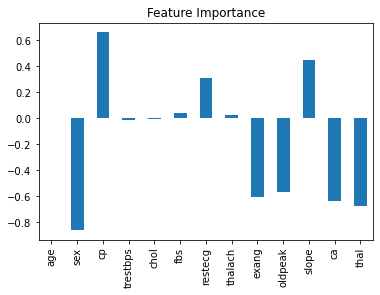

In [43]:
feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title='Feature Importance', legend = False);

## XGBoost

Since Our logistic regression model was unable to achieve our target of 95% accuracy after hyperparameter tuning, lets try a different model, XGBoost

In [44]:
import xgboost as xgb

# Instantiate the XGBClassifier model first
model= xgb.XGBClassifier()

# Fit the model with our training data
model.fit(X_train, y_train)

# Evaluate the model to obtain the baseline accuracy
model.score(X_test, y_test)

[21:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\quahw\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.819672131147541

## Hyperparameter Tuning for XGBoost

In [45]:
# create hyperparameter grid
param_dist = {'max_depth':[10,20,30,40,50],
              'min_child_weight':[1,2,3,4,5,6,7,8],
              'n_estimator':[100,105,200],
              'learning_rate':[0.05,0.08,0.1,0.13,0.16,0.18]}

# Use GridSearchCV to look for the best parameters
gs_xgb = GridSearchCV(model, param_grid=param_dist, cv=5, verbose =10, n_jobs=-1)

# now we will fit the model
gs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[21:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\quahw\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [46]:
# Find the best parameter combination
gs_xgb.best_params_

{'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 8,
 'n_estimator': 100}

In [47]:
gs_xgb.score(X_test, y_test)

0.8852459016393442

Our XGBoost model after hyperparameter tuning has acheived the same score as our LogisticRegression model.

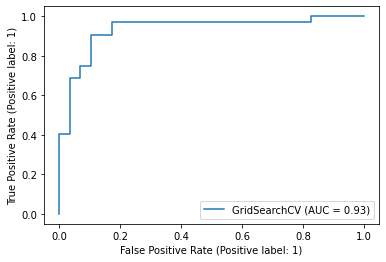

In [48]:
# ROC score of xgb model
plot_roc_curve(gs_xgb, X_test, y_test)

In [49]:
# Confusion Matrix
confusion_matrix(y_test, gs_xgb.predict(X_test))

array([[25,  4],
       [ 3, 29]], dtype=int64)

## CatBoost

From the data description, we know that the following data are categorical:
* sex
* cp
* fbs
* restecg
* exang
* ca
* thal

We will attempt to use CatBoost ability to take categories into consideration in an attmept to boot the accuracy score

In [54]:
# Create a list of categorical features
cat_list = ['sex','cp','fbs','restecg','exang','ca','thal']

In [52]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [55]:
# Create the model
from catboost import CatBoostClassifier

cb = CatBoostClassifier()

cb.fit(X_train, y_train, cat_features=cat_list)

Learning rate set to 0.005621
0:	learn: 0.6892778	total: 188ms	remaining: 3m 8s
1:	learn: 0.6847651	total: 222ms	remaining: 1m 50s
2:	learn: 0.6809817	total: 276ms	remaining: 1m 31s
3:	learn: 0.6762771	total: 307ms	remaining: 1m 16s
4:	learn: 0.6728471	total: 340ms	remaining: 1m 7s
5:	learn: 0.6691165	total: 369ms	remaining: 1m 1s
6:	learn: 0.6657308	total: 416ms	remaining: 59.1s
7:	learn: 0.6623670	total: 436ms	remaining: 54s
8:	learn: 0.6587530	total: 457ms	remaining: 50.4s
9:	learn: 0.6550658	total: 479ms	remaining: 47.5s
10:	learn: 0.6514513	total: 504ms	remaining: 45.3s
11:	learn: 0.6476690	total: 528ms	remaining: 43.4s
12:	learn: 0.6441311	total: 551ms	remaining: 41.8s
13:	learn: 0.6395834	total: 582ms	remaining: 41s
14:	learn: 0.6359044	total: 614ms	remaining: 40.3s
15:	learn: 0.6327626	total: 648ms	remaining: 39.9s
16:	learn: 0.6292273	total: 684ms	remaining: 39.6s
17:	learn: 0.6254561	total: 717ms	remaining: 39.1s
18:	learn: 0.6213519	total: 739ms	remaining: 38.1s
19:	learn: 0

166:	learn: 0.3577628	total: 4.92s	remaining: 24.5s
167:	learn: 0.3566474	total: 4.95s	remaining: 24.5s
168:	learn: 0.3556765	total: 4.98s	remaining: 24.5s
169:	learn: 0.3549117	total: 5.01s	remaining: 24.5s
170:	learn: 0.3536360	total: 5.04s	remaining: 24.4s
171:	learn: 0.3525978	total: 5.07s	remaining: 24.4s
172:	learn: 0.3520813	total: 5.09s	remaining: 24.3s
173:	learn: 0.3511524	total: 5.12s	remaining: 24.3s
174:	learn: 0.3500929	total: 5.15s	remaining: 24.3s
175:	learn: 0.3491945	total: 5.18s	remaining: 24.3s
176:	learn: 0.3481228	total: 5.21s	remaining: 24.2s
177:	learn: 0.3474000	total: 5.24s	remaining: 24.2s
178:	learn: 0.3464395	total: 5.26s	remaining: 24.1s
179:	learn: 0.3455486	total: 5.28s	remaining: 24.1s
180:	learn: 0.3445261	total: 5.31s	remaining: 24s
181:	learn: 0.3441012	total: 5.34s	remaining: 24s
182:	learn: 0.3434912	total: 5.37s	remaining: 24s
183:	learn: 0.3423901	total: 5.4s	remaining: 23.9s
184:	learn: 0.3414904	total: 5.42s	remaining: 23.9s
185:	learn: 0.34079

327:	learn: 0.2643656	total: 9.37s	remaining: 19.2s
328:	learn: 0.2639816	total: 9.39s	remaining: 19.1s
329:	learn: 0.2633935	total: 9.42s	remaining: 19.1s
330:	learn: 0.2628768	total: 9.46s	remaining: 19.1s
331:	learn: 0.2626862	total: 9.5s	remaining: 19.1s
332:	learn: 0.2624213	total: 9.52s	remaining: 19.1s
333:	learn: 0.2621388	total: 9.54s	remaining: 19s
334:	learn: 0.2619805	total: 9.56s	remaining: 19s
335:	learn: 0.2617963	total: 9.59s	remaining: 18.9s
336:	learn: 0.2614640	total: 9.61s	remaining: 18.9s
337:	learn: 0.2612067	total: 9.63s	remaining: 18.9s
338:	learn: 0.2611209	total: 9.64s	remaining: 18.8s
339:	learn: 0.2608802	total: 9.67s	remaining: 18.8s
340:	learn: 0.2604506	total: 9.69s	remaining: 18.7s
341:	learn: 0.2601533	total: 9.71s	remaining: 18.7s
342:	learn: 0.2595212	total: 9.73s	remaining: 18.6s
343:	learn: 0.2591997	total: 9.76s	remaining: 18.6s
344:	learn: 0.2589506	total: 9.78s	remaining: 18.6s
345:	learn: 0.2587043	total: 9.82s	remaining: 18.6s
346:	learn: 0.258

486:	learn: 0.2175495	total: 13.7s	remaining: 14.4s
487:	learn: 0.2175495	total: 13.7s	remaining: 14.4s
488:	learn: 0.2173742	total: 13.7s	remaining: 14.3s
489:	learn: 0.2172132	total: 13.7s	remaining: 14.3s
490:	learn: 0.2167565	total: 13.8s	remaining: 14.3s
491:	learn: 0.2166610	total: 13.8s	remaining: 14.2s
492:	learn: 0.2165067	total: 13.8s	remaining: 14.2s
493:	learn: 0.2163476	total: 13.8s	remaining: 14.2s
494:	learn: 0.2161719	total: 13.9s	remaining: 14.2s
495:	learn: 0.2159791	total: 13.9s	remaining: 14.1s
496:	learn: 0.2155871	total: 13.9s	remaining: 14.1s
497:	learn: 0.2153446	total: 14s	remaining: 14.1s
498:	learn: 0.2150014	total: 14s	remaining: 14s
499:	learn: 0.2148747	total: 14s	remaining: 14s
500:	learn: 0.2145078	total: 14s	remaining: 14s
501:	learn: 0.2142076	total: 14.1s	remaining: 14s
502:	learn: 0.2139481	total: 14.1s	remaining: 13.9s
503:	learn: 0.2136738	total: 14.1s	remaining: 13.9s
504:	learn: 0.2135140	total: 14.2s	remaining: 13.9s
505:	learn: 0.2134003	total:

651:	learn: 0.1851227	total: 18.3s	remaining: 9.76s
652:	learn: 0.1848700	total: 18.3s	remaining: 9.73s
653:	learn: 0.1847502	total: 18.3s	remaining: 9.7s
654:	learn: 0.1847498	total: 18.3s	remaining: 9.66s
655:	learn: 0.1845170	total: 18.4s	remaining: 9.63s
656:	learn: 0.1843907	total: 18.4s	remaining: 9.61s
657:	learn: 0.1842903	total: 18.4s	remaining: 9.58s
658:	learn: 0.1840017	total: 18.5s	remaining: 9.55s
659:	learn: 0.1838092	total: 18.5s	remaining: 9.53s
660:	learn: 0.1837723	total: 18.5s	remaining: 9.5s
661:	learn: 0.1836647	total: 18.5s	remaining: 9.47s
662:	learn: 0.1834836	total: 18.6s	remaining: 9.44s
663:	learn: 0.1831820	total: 18.6s	remaining: 9.41s
664:	learn: 0.1829347	total: 18.6s	remaining: 9.38s
665:	learn: 0.1826811	total: 18.6s	remaining: 9.35s
666:	learn: 0.1825577	total: 18.7s	remaining: 9.32s
667:	learn: 0.1823179	total: 18.7s	remaining: 9.29s
668:	learn: 0.1821074	total: 18.7s	remaining: 9.26s
669:	learn: 0.1819573	total: 18.7s	remaining: 9.23s
670:	learn: 0.

811:	learn: 0.1603443	total: 22.6s	remaining: 5.24s
812:	learn: 0.1602220	total: 22.7s	remaining: 5.21s
813:	learn: 0.1600625	total: 22.7s	remaining: 5.18s
814:	learn: 0.1599892	total: 22.7s	remaining: 5.16s
815:	learn: 0.1597904	total: 22.7s	remaining: 5.13s
816:	learn: 0.1596799	total: 22.8s	remaining: 5.1s
817:	learn: 0.1596057	total: 22.8s	remaining: 5.07s
818:	learn: 0.1595757	total: 22.8s	remaining: 5.04s
819:	learn: 0.1594740	total: 22.9s	remaining: 5.02s
820:	learn: 0.1593572	total: 22.9s	remaining: 4.99s
821:	learn: 0.1591700	total: 22.9s	remaining: 4.96s
822:	learn: 0.1590477	total: 22.9s	remaining: 4.93s
823:	learn: 0.1589854	total: 23s	remaining: 4.91s
824:	learn: 0.1589057	total: 23s	remaining: 4.88s
825:	learn: 0.1587748	total: 23s	remaining: 4.85s
826:	learn: 0.1585067	total: 23s	remaining: 4.82s
827:	learn: 0.1583105	total: 23.1s	remaining: 4.79s
828:	learn: 0.1581924	total: 23.1s	remaining: 4.76s
829:	learn: 0.1581186	total: 23.1s	remaining: 4.74s
830:	learn: 0.1579003

972:	learn: 0.1400148	total: 27.2s	remaining: 755ms
973:	learn: 0.1399466	total: 27.3s	remaining: 727ms
974:	learn: 0.1397766	total: 27.3s	remaining: 699ms
975:	learn: 0.1396829	total: 27.3s	remaining: 672ms
976:	learn: 0.1395367	total: 27.4s	remaining: 644ms
977:	learn: 0.1394084	total: 27.4s	remaining: 616ms
978:	learn: 0.1392382	total: 27.4s	remaining: 588ms
979:	learn: 0.1391890	total: 27.5s	remaining: 560ms
980:	learn: 0.1391060	total: 27.5s	remaining: 532ms
981:	learn: 0.1390149	total: 27.5s	remaining: 504ms
982:	learn: 0.1389235	total: 27.6s	remaining: 477ms
983:	learn: 0.1388353	total: 27.6s	remaining: 449ms
984:	learn: 0.1387251	total: 27.6s	remaining: 421ms
985:	learn: 0.1386201	total: 27.7s	remaining: 393ms
986:	learn: 0.1384973	total: 27.7s	remaining: 365ms
987:	learn: 0.1383243	total: 27.7s	remaining: 337ms
988:	learn: 0.1382619	total: 27.8s	remaining: 309ms
989:	learn: 0.1380562	total: 27.8s	remaining: 281ms
990:	learn: 0.1379787	total: 27.8s	remaining: 253ms
991:	learn: 

In [56]:
cb.score(X_test, y_test)

0.8524590163934426

Our CatBoost Model has achieved a higher baseline score than our XGBoost Model, though not as high as our LogisticRegression Baseline and tuned model

We will now tun the CatBoost Model

In [57]:
cb_params={'depth':[4,7,10],
           'learning_rate':[0.03,0.1,0.15],
           'l2_leaf_reg':[1,4,9],
           'iterations':[100,300]}

# Use RandomizedSearchCV to iterate thorugh the parameters
rs_cb = RandomizedSearchCV(cb, 
                           param_distributions=cb_params,
                           cv=5,
                           n_iter=50)
rs_cb.fit(X_train, y_train)

0:	learn: 0.6540039	total: 1.07ms	remaining: 106ms
1:	learn: 0.6205366	total: 2.2ms	remaining: 108ms
2:	learn: 0.5924818	total: 3.15ms	remaining: 102ms
3:	learn: 0.5623776	total: 4.21ms	remaining: 101ms
4:	learn: 0.5343550	total: 5.27ms	remaining: 100ms
5:	learn: 0.5112993	total: 6.34ms	remaining: 99.4ms
6:	learn: 0.4946927	total: 7.55ms	remaining: 100ms
7:	learn: 0.4772139	total: 8.64ms	remaining: 99.3ms
8:	learn: 0.4636180	total: 9.68ms	remaining: 97.9ms
9:	learn: 0.4487616	total: 10.8ms	remaining: 96.8ms
10:	learn: 0.4387696	total: 11.9ms	remaining: 96.4ms
11:	learn: 0.4310799	total: 13ms	remaining: 95.3ms
12:	learn: 0.4178391	total: 14.1ms	remaining: 94.5ms
13:	learn: 0.4050547	total: 15.2ms	remaining: 93.6ms
14:	learn: 0.3934297	total: 16.1ms	remaining: 91ms
15:	learn: 0.3860627	total: 16.8ms	remaining: 88.1ms
16:	learn: 0.3794075	total: 17.4ms	remaining: 85.1ms
17:	learn: 0.3711404	total: 18.3ms	remaining: 83.6ms
18:	learn: 0.3611381	total: 19.5ms	remaining: 83.2ms
19:	learn: 0.3

0:	learn: 0.6565456	total: 972us	remaining: 96.3ms
1:	learn: 0.6251625	total: 2.06ms	remaining: 101ms
2:	learn: 0.5982272	total: 3.08ms	remaining: 99.5ms
3:	learn: 0.5708838	total: 3.97ms	remaining: 95.4ms
4:	learn: 0.5509997	total: 4.91ms	remaining: 93.3ms
5:	learn: 0.5271573	total: 6.48ms	remaining: 102ms
6:	learn: 0.5103483	total: 7.32ms	remaining: 97.3ms
7:	learn: 0.4917693	total: 8.18ms	remaining: 94ms
8:	learn: 0.4777100	total: 8.92ms	remaining: 90.2ms
9:	learn: 0.4654562	total: 9.66ms	remaining: 87ms
10:	learn: 0.4546858	total: 10.4ms	remaining: 83.9ms
11:	learn: 0.4447339	total: 11.1ms	remaining: 81.5ms
12:	learn: 0.4330966	total: 11.8ms	remaining: 78.9ms
13:	learn: 0.4209427	total: 12.5ms	remaining: 76.7ms
14:	learn: 0.4102771	total: 13.2ms	remaining: 74.6ms
15:	learn: 0.4065508	total: 13.9ms	remaining: 72.7ms
16:	learn: 0.3988419	total: 14.7ms	remaining: 71.6ms
17:	learn: 0.3921281	total: 15.4ms	remaining: 70.2ms
18:	learn: 0.3835287	total: 16.6ms	remaining: 70.8ms
19:	learn:

25:	learn: 0.3433079	total: 28.3ms	remaining: 80.6ms
26:	learn: 0.3369686	total: 29.5ms	remaining: 79.8ms
27:	learn: 0.3335579	total: 30.5ms	remaining: 78.5ms
28:	learn: 0.3290743	total: 31.5ms	remaining: 77.1ms
29:	learn: 0.3252668	total: 32.5ms	remaining: 75.8ms
30:	learn: 0.3216227	total: 33.5ms	remaining: 74.5ms
31:	learn: 0.3161117	total: 34.4ms	remaining: 73ms
32:	learn: 0.3141897	total: 35.3ms	remaining: 71.7ms
33:	learn: 0.3100565	total: 36.3ms	remaining: 70.4ms
34:	learn: 0.3073465	total: 37.2ms	remaining: 69ms
35:	learn: 0.3044753	total: 38.2ms	remaining: 67.9ms
36:	learn: 0.3025550	total: 39.7ms	remaining: 67.7ms
37:	learn: 0.2982502	total: 41ms	remaining: 66.9ms
38:	learn: 0.2952897	total: 41.9ms	remaining: 65.5ms
39:	learn: 0.2941380	total: 42.7ms	remaining: 64ms
40:	learn: 0.2920456	total: 43.6ms	remaining: 62.7ms
41:	learn: 0.2855196	total: 44.4ms	remaining: 61.3ms
42:	learn: 0.2827302	total: 45.3ms	remaining: 60.1ms
43:	learn: 0.2792160	total: 46.2ms	remaining: 58.8ms
4

165:	learn: 0.0348663	total: 206ms	remaining: 166ms
166:	learn: 0.0347072	total: 207ms	remaining: 165ms
167:	learn: 0.0344114	total: 208ms	remaining: 163ms
168:	learn: 0.0342433	total: 209ms	remaining: 162ms
169:	learn: 0.0341401	total: 210ms	remaining: 161ms
170:	learn: 0.0338938	total: 212ms	remaining: 160ms
171:	learn: 0.0338177	total: 214ms	remaining: 159ms
172:	learn: 0.0334982	total: 215ms	remaining: 158ms
173:	learn: 0.0334522	total: 216ms	remaining: 156ms
174:	learn: 0.0333612	total: 217ms	remaining: 155ms
175:	learn: 0.0330123	total: 218ms	remaining: 153ms
176:	learn: 0.0326492	total: 219ms	remaining: 152ms
177:	learn: 0.0322864	total: 221ms	remaining: 151ms
178:	learn: 0.0321461	total: 222ms	remaining: 150ms
179:	learn: 0.0320628	total: 223ms	remaining: 149ms
180:	learn: 0.0318859	total: 225ms	remaining: 148ms
181:	learn: 0.0318187	total: 227ms	remaining: 147ms
182:	learn: 0.0316586	total: 228ms	remaining: 146ms
183:	learn: 0.0314024	total: 229ms	remaining: 144ms
184:	learn: 

84:	learn: 0.0862162	total: 95.9ms	remaining: 243ms
85:	learn: 0.0853795	total: 97.5ms	remaining: 243ms
86:	learn: 0.0839989	total: 98.5ms	remaining: 241ms
87:	learn: 0.0827821	total: 99.5ms	remaining: 240ms
88:	learn: 0.0817117	total: 101ms	remaining: 240ms
89:	learn: 0.0803175	total: 103ms	remaining: 239ms
90:	learn: 0.0802519	total: 104ms	remaining: 239ms
91:	learn: 0.0793045	total: 105ms	remaining: 238ms
92:	learn: 0.0780090	total: 107ms	remaining: 237ms
93:	learn: 0.0769148	total: 108ms	remaining: 238ms
94:	learn: 0.0756608	total: 110ms	remaining: 237ms
95:	learn: 0.0737262	total: 111ms	remaining: 236ms
96:	learn: 0.0733525	total: 113ms	remaining: 236ms
97:	learn: 0.0729612	total: 114ms	remaining: 235ms
98:	learn: 0.0712689	total: 115ms	remaining: 234ms
99:	learn: 0.0708871	total: 116ms	remaining: 233ms
100:	learn: 0.0703781	total: 118ms	remaining: 232ms
101:	learn: 0.0703328	total: 119ms	remaining: 231ms
102:	learn: 0.0700898	total: 120ms	remaining: 230ms
103:	learn: 0.0693163	to

3:	learn: 0.4742555	total: 6.82ms	remaining: 505ms
4:	learn: 0.4501744	total: 8.71ms	remaining: 514ms
5:	learn: 0.4280314	total: 9.94ms	remaining: 487ms
6:	learn: 0.4121779	total: 11.4ms	remaining: 477ms
7:	learn: 0.4006930	total: 12.8ms	remaining: 466ms
8:	learn: 0.3774057	total: 14ms	remaining: 452ms
9:	learn: 0.3589992	total: 14.9ms	remaining: 431ms
10:	learn: 0.3479098	total: 16.1ms	remaining: 422ms
11:	learn: 0.3363016	total: 17.5ms	remaining: 421ms
12:	learn: 0.3254464	total: 18.9ms	remaining: 418ms
13:	learn: 0.3194304	total: 20.4ms	remaining: 417ms
14:	learn: 0.3106288	total: 21.5ms	remaining: 408ms
15:	learn: 0.3054983	total: 22.4ms	remaining: 397ms
16:	learn: 0.2992240	total: 23.5ms	remaining: 391ms
17:	learn: 0.2961399	total: 24.7ms	remaining: 387ms
18:	learn: 0.2845272	total: 26ms	remaining: 385ms
19:	learn: 0.2751055	total: 27ms	remaining: 379ms
20:	learn: 0.2674893	total: 28ms	remaining: 373ms
21:	learn: 0.2601762	total: 29ms	remaining: 367ms
22:	learn: 0.2524107	total: 2

293:	learn: 0.0236149	total: 335ms	remaining: 6.83ms
294:	learn: 0.0236025	total: 336ms	remaining: 5.7ms
295:	learn: 0.0233945	total: 338ms	remaining: 4.56ms
296:	learn: 0.0232399	total: 339ms	remaining: 3.42ms
297:	learn: 0.0232224	total: 340ms	remaining: 2.28ms
298:	learn: 0.0231155	total: 342ms	remaining: 1.14ms
299:	learn: 0.0229570	total: 343ms	remaining: 0us
0:	learn: 0.6272780	total: 1.27ms	remaining: 380ms
1:	learn: 0.5616358	total: 2.72ms	remaining: 405ms
2:	learn: 0.5241583	total: 3.93ms	remaining: 389ms
3:	learn: 0.4814051	total: 5.36ms	remaining: 397ms
4:	learn: 0.4555043	total: 6.72ms	remaining: 397ms
5:	learn: 0.4320175	total: 8ms	remaining: 392ms
6:	learn: 0.4126525	total: 9.18ms	remaining: 384ms
7:	learn: 0.3990510	total: 10.1ms	remaining: 367ms
8:	learn: 0.3826679	total: 11.8ms	remaining: 383ms
9:	learn: 0.3732314	total: 13.2ms	remaining: 384ms
10:	learn: 0.3630350	total: 14.7ms	remaining: 385ms
11:	learn: 0.3504228	total: 16ms	remaining: 385ms
12:	learn: 0.3357596	tot

241:	learn: 0.0309436	total: 283ms	remaining: 67.7ms
242:	learn: 0.0307142	total: 284ms	remaining: 66.7ms
243:	learn: 0.0304834	total: 287ms	remaining: 65.8ms
244:	learn: 0.0300884	total: 288ms	remaining: 64.8ms
245:	learn: 0.0300104	total: 290ms	remaining: 63.7ms
246:	learn: 0.0296024	total: 292ms	remaining: 62.6ms
247:	learn: 0.0293487	total: 293ms	remaining: 61.5ms
248:	learn: 0.0293364	total: 295ms	remaining: 60.4ms
249:	learn: 0.0292086	total: 296ms	remaining: 59.3ms
250:	learn: 0.0291897	total: 298ms	remaining: 58.1ms
251:	learn: 0.0291802	total: 299ms	remaining: 57ms
252:	learn: 0.0291706	total: 301ms	remaining: 55.9ms
253:	learn: 0.0291020	total: 302ms	remaining: 54.7ms
254:	learn: 0.0289662	total: 304ms	remaining: 53.6ms
255:	learn: 0.0289513	total: 305ms	remaining: 52.4ms
256:	learn: 0.0288348	total: 306ms	remaining: 51.3ms
257:	learn: 0.0284943	total: 308ms	remaining: 50.1ms
258:	learn: 0.0284515	total: 309ms	remaining: 48.9ms
259:	learn: 0.0284430	total: 311ms	remaining: 47

142:	learn: 0.0579291	total: 212ms	remaining: 232ms
143:	learn: 0.0578716	total: 214ms	remaining: 232ms
144:	learn: 0.0576528	total: 215ms	remaining: 230ms
145:	learn: 0.0576134	total: 217ms	remaining: 229ms
146:	learn: 0.0575684	total: 218ms	remaining: 227ms
147:	learn: 0.0575311	total: 219ms	remaining: 225ms
148:	learn: 0.0566573	total: 221ms	remaining: 224ms
149:	learn: 0.0562213	total: 222ms	remaining: 222ms
150:	learn: 0.0561389	total: 224ms	remaining: 221ms
151:	learn: 0.0553263	total: 226ms	remaining: 220ms
152:	learn: 0.0547737	total: 227ms	remaining: 219ms
153:	learn: 0.0547318	total: 229ms	remaining: 217ms
154:	learn: 0.0546920	total: 230ms	remaining: 215ms
155:	learn: 0.0544372	total: 231ms	remaining: 214ms
156:	learn: 0.0543982	total: 233ms	remaining: 212ms
157:	learn: 0.0543604	total: 234ms	remaining: 211ms
158:	learn: 0.0539051	total: 236ms	remaining: 209ms
159:	learn: 0.0538697	total: 237ms	remaining: 208ms
160:	learn: 0.0538356	total: 239ms	remaining: 206ms
161:	learn: 

28:	learn: 0.3947950	total: 71.7ms	remaining: 670ms
29:	learn: 0.3896540	total: 75.1ms	remaining: 676ms
30:	learn: 0.3861655	total: 76ms	remaining: 660ms
31:	learn: 0.3810107	total: 79ms	remaining: 662ms
32:	learn: 0.3764284	total: 81.5ms	remaining: 659ms
33:	learn: 0.3717720	total: 84.3ms	remaining: 659ms
34:	learn: 0.3684306	total: 86.9ms	remaining: 658ms
35:	learn: 0.3637887	total: 89.9ms	remaining: 659ms
36:	learn: 0.3597147	total: 92.9ms	remaining: 660ms
37:	learn: 0.3543282	total: 95.8ms	remaining: 661ms
38:	learn: 0.3506724	total: 98.7ms	remaining: 660ms
39:	learn: 0.3472318	total: 101ms	remaining: 658ms
40:	learn: 0.3443779	total: 105ms	remaining: 666ms
41:	learn: 0.3409228	total: 108ms	remaining: 663ms
42:	learn: 0.3375018	total: 111ms	remaining: 661ms
43:	learn: 0.3341264	total: 113ms	remaining: 657ms
44:	learn: 0.3305408	total: 115ms	remaining: 654ms
45:	learn: 0.3262165	total: 118ms	remaining: 652ms
46:	learn: 0.3224937	total: 121ms	remaining: 650ms
47:	learn: 0.3183115	tot

217:	learn: 0.1053862	total: 578ms	remaining: 217ms
218:	learn: 0.1046839	total: 581ms	remaining: 215ms
219:	learn: 0.1042381	total: 583ms	remaining: 212ms
220:	learn: 0.1036503	total: 586ms	remaining: 210ms
221:	learn: 0.1031655	total: 589ms	remaining: 207ms
222:	learn: 0.1026043	total: 591ms	remaining: 204ms
223:	learn: 0.1020725	total: 594ms	remaining: 202ms
224:	learn: 0.1017438	total: 597ms	remaining: 199ms
225:	learn: 0.1014596	total: 599ms	remaining: 196ms
226:	learn: 0.1009281	total: 603ms	remaining: 194ms
227:	learn: 0.1005017	total: 605ms	remaining: 191ms
228:	learn: 0.1000553	total: 608ms	remaining: 189ms
229:	learn: 0.0996566	total: 611ms	remaining: 186ms
230:	learn: 0.0992432	total: 613ms	remaining: 183ms
231:	learn: 0.0988754	total: 617ms	remaining: 181ms
232:	learn: 0.0983860	total: 619ms	remaining: 178ms
233:	learn: 0.0979355	total: 622ms	remaining: 175ms
234:	learn: 0.0975269	total: 624ms	remaining: 173ms
235:	learn: 0.0971423	total: 627ms	remaining: 170ms
236:	learn: 

77:	learn: 0.2601247	total: 216ms	remaining: 615ms
78:	learn: 0.2568506	total: 219ms	remaining: 612ms
79:	learn: 0.2545898	total: 222ms	remaining: 610ms
80:	learn: 0.2524837	total: 225ms	remaining: 608ms
81:	learn: 0.2506602	total: 229ms	remaining: 608ms
82:	learn: 0.2485313	total: 231ms	remaining: 603ms
83:	learn: 0.2461460	total: 233ms	remaining: 599ms
84:	learn: 0.2438370	total: 236ms	remaining: 597ms
85:	learn: 0.2421178	total: 238ms	remaining: 593ms
86:	learn: 0.2407293	total: 241ms	remaining: 590ms
87:	learn: 0.2393193	total: 244ms	remaining: 587ms
88:	learn: 0.2381711	total: 246ms	remaining: 584ms
89:	learn: 0.2363175	total: 249ms	remaining: 581ms
90:	learn: 0.2346959	total: 251ms	remaining: 575ms
91:	learn: 0.2329043	total: 253ms	remaining: 573ms
92:	learn: 0.2315205	total: 256ms	remaining: 570ms
93:	learn: 0.2300247	total: 259ms	remaining: 567ms
94:	learn: 0.2280858	total: 261ms	remaining: 563ms
95:	learn: 0.2263597	total: 263ms	remaining: 559ms
96:	learn: 0.2248022	total: 266

267:	learn: 0.0883222	total: 719ms	remaining: 85.9ms
268:	learn: 0.0880269	total: 721ms	remaining: 83.1ms
269:	learn: 0.0875084	total: 724ms	remaining: 80.4ms
270:	learn: 0.0870743	total: 726ms	remaining: 77.7ms
271:	learn: 0.0866656	total: 729ms	remaining: 75ms
272:	learn: 0.0861852	total: 732ms	remaining: 72.4ms
273:	learn: 0.0857676	total: 734ms	remaining: 69.7ms
274:	learn: 0.0854071	total: 737ms	remaining: 67ms
275:	learn: 0.0851994	total: 739ms	remaining: 64.3ms
276:	learn: 0.0847661	total: 742ms	remaining: 61.6ms
277:	learn: 0.0843485	total: 744ms	remaining: 58.9ms
278:	learn: 0.0839158	total: 747ms	remaining: 56.2ms
279:	learn: 0.0835881	total: 749ms	remaining: 53.5ms
280:	learn: 0.0831529	total: 751ms	remaining: 50.8ms
281:	learn: 0.0828201	total: 754ms	remaining: 48.1ms
282:	learn: 0.0824703	total: 757ms	remaining: 45.4ms
283:	learn: 0.0820952	total: 759ms	remaining: 42.8ms
284:	learn: 0.0816301	total: 762ms	remaining: 40.1ms
285:	learn: 0.0812502	total: 765ms	remaining: 37.4

186:	learn: 0.1381927	total: 542ms	remaining: 328ms
187:	learn: 0.1374712	total: 545ms	remaining: 325ms
188:	learn: 0.1366952	total: 547ms	remaining: 321ms
189:	learn: 0.1360228	total: 550ms	remaining: 318ms
190:	learn: 0.1358066	total: 552ms	remaining: 315ms
191:	learn: 0.1352926	total: 554ms	remaining: 312ms
192:	learn: 0.1346881	total: 557ms	remaining: 309ms
193:	learn: 0.1336258	total: 560ms	remaining: 306ms
194:	learn: 0.1329644	total: 562ms	remaining: 303ms
195:	learn: 0.1322181	total: 565ms	remaining: 300ms
196:	learn: 0.1316616	total: 567ms	remaining: 297ms
197:	learn: 0.1308304	total: 570ms	remaining: 294ms
198:	learn: 0.1301941	total: 573ms	remaining: 291ms
199:	learn: 0.1292582	total: 575ms	remaining: 287ms
200:	learn: 0.1283246	total: 577ms	remaining: 284ms
201:	learn: 0.1275143	total: 579ms	remaining: 281ms
202:	learn: 0.1267337	total: 581ms	remaining: 278ms
203:	learn: 0.1259803	total: 583ms	remaining: 274ms
204:	learn: 0.1253013	total: 584ms	remaining: 271ms
205:	learn: 

62:	learn: 0.3022600	total: 172ms	remaining: 648ms
63:	learn: 0.2999956	total: 175ms	remaining: 647ms
64:	learn: 0.2976135	total: 178ms	remaining: 644ms
65:	learn: 0.2947965	total: 181ms	remaining: 640ms
66:	learn: 0.2919923	total: 183ms	remaining: 638ms
67:	learn: 0.2898914	total: 186ms	remaining: 633ms
68:	learn: 0.2886916	total: 187ms	remaining: 626ms
69:	learn: 0.2866108	total: 189ms	remaining: 622ms
70:	learn: 0.2840784	total: 192ms	remaining: 618ms
71:	learn: 0.2818177	total: 194ms	remaining: 616ms
72:	learn: 0.2797411	total: 197ms	remaining: 612ms
73:	learn: 0.2769584	total: 199ms	remaining: 609ms
74:	learn: 0.2749560	total: 202ms	remaining: 607ms
75:	learn: 0.2732397	total: 206ms	remaining: 606ms
76:	learn: 0.2712708	total: 208ms	remaining: 602ms
77:	learn: 0.2685165	total: 210ms	remaining: 599ms
78:	learn: 0.2661660	total: 213ms	remaining: 597ms
79:	learn: 0.2638989	total: 216ms	remaining: 595ms
80:	learn: 0.2625580	total: 218ms	remaining: 588ms
81:	learn: 0.2608189	total: 220

242:	learn: 0.1062315	total: 683ms	remaining: 160ms
243:	learn: 0.1059217	total: 686ms	remaining: 157ms
244:	learn: 0.1054054	total: 689ms	remaining: 155ms
245:	learn: 0.1049964	total: 692ms	remaining: 152ms
246:	learn: 0.1043842	total: 694ms	remaining: 149ms
247:	learn: 0.1039083	total: 697ms	remaining: 146ms
248:	learn: 0.1034650	total: 699ms	remaining: 143ms
249:	learn: 0.1027793	total: 702ms	remaining: 140ms
250:	learn: 0.1025164	total: 705ms	remaining: 138ms
251:	learn: 0.1020024	total: 707ms	remaining: 135ms
252:	learn: 0.1015118	total: 709ms	remaining: 132ms
253:	learn: 0.1010157	total: 712ms	remaining: 129ms
254:	learn: 0.1004403	total: 715ms	remaining: 126ms
255:	learn: 0.0998910	total: 718ms	remaining: 123ms
256:	learn: 0.0995545	total: 720ms	remaining: 121ms
257:	learn: 0.0990701	total: 723ms	remaining: 118ms
258:	learn: 0.0987260	total: 726ms	remaining: 115ms
259:	learn: 0.0983114	total: 729ms	remaining: 112ms
260:	learn: 0.0977837	total: 732ms	remaining: 109ms
261:	learn: 

190:	learn: 0.1348175	total: 328ms	remaining: 187ms
191:	learn: 0.1341182	total: 330ms	remaining: 186ms
192:	learn: 0.1333915	total: 331ms	remaining: 184ms
193:	learn: 0.1325976	total: 333ms	remaining: 182ms
194:	learn: 0.1316361	total: 335ms	remaining: 180ms
195:	learn: 0.1309406	total: 337ms	remaining: 179ms
196:	learn: 0.1303049	total: 338ms	remaining: 177ms
197:	learn: 0.1295362	total: 340ms	remaining: 175ms
198:	learn: 0.1288711	total: 341ms	remaining: 173ms
199:	learn: 0.1281287	total: 343ms	remaining: 172ms
200:	learn: 0.1273187	total: 344ms	remaining: 170ms
201:	learn: 0.1267308	total: 346ms	remaining: 168ms
202:	learn: 0.1262055	total: 348ms	remaining: 166ms
203:	learn: 0.1254999	total: 350ms	remaining: 165ms
204:	learn: 0.1247173	total: 351ms	remaining: 163ms
205:	learn: 0.1239938	total: 353ms	remaining: 161ms
206:	learn: 0.1232690	total: 354ms	remaining: 159ms
207:	learn: 0.1224369	total: 356ms	remaining: 157ms
208:	learn: 0.1216620	total: 357ms	remaining: 155ms
209:	learn: 

4:	learn: 0.6705773	total: 5.14ms	remaining: 97.7ms
5:	learn: 0.6660733	total: 6.39ms	remaining: 100ms
6:	learn: 0.6600528	total: 7.51ms	remaining: 99.8ms
7:	learn: 0.6540401	total: 8.6ms	remaining: 98.9ms
8:	learn: 0.6504527	total: 9.7ms	remaining: 98ms
9:	learn: 0.6464852	total: 10.5ms	remaining: 94.4ms
10:	learn: 0.6421028	total: 11.3ms	remaining: 91.8ms
11:	learn: 0.6364779	total: 12.3ms	remaining: 90.4ms
12:	learn: 0.6322774	total: 13.3ms	remaining: 88.7ms
13:	learn: 0.6278330	total: 14.3ms	remaining: 88ms
14:	learn: 0.6225199	total: 15.1ms	remaining: 85.7ms
15:	learn: 0.6195387	total: 16.1ms	remaining: 84.8ms
16:	learn: 0.6164592	total: 16.8ms	remaining: 82.2ms
17:	learn: 0.6139140	total: 17.5ms	remaining: 79.6ms
18:	learn: 0.6099823	total: 18.2ms	remaining: 77.7ms
19:	learn: 0.6057274	total: 19.1ms	remaining: 76.4ms
20:	learn: 0.6017755	total: 20ms	remaining: 75.4ms
21:	learn: 0.5988884	total: 20.9ms	remaining: 74.2ms
22:	learn: 0.5950119	total: 21.9ms	remaining: 73.3ms
23:	lear

0:	learn: 0.6884484	total: 954us	remaining: 94.5ms
1:	learn: 0.6816547	total: 2.03ms	remaining: 99.4ms
2:	learn: 0.6764606	total: 3.03ms	remaining: 98.1ms
3:	learn: 0.6715576	total: 3.93ms	remaining: 94.2ms
4:	learn: 0.6684596	total: 5ms	remaining: 95.1ms
5:	learn: 0.6635195	total: 6.39ms	remaining: 100ms
6:	learn: 0.6580290	total: 8.53ms	remaining: 113ms
7:	learn: 0.6523644	total: 10.2ms	remaining: 118ms
8:	learn: 0.6493199	total: 11.1ms	remaining: 112ms
9:	learn: 0.6448135	total: 11.8ms	remaining: 106ms
10:	learn: 0.6406254	total: 12.5ms	remaining: 101ms
11:	learn: 0.6372709	total: 13.4ms	remaining: 98.5ms
12:	learn: 0.6335963	total: 14.2ms	remaining: 95.3ms
13:	learn: 0.6292600	total: 14.7ms	remaining: 90.1ms
14:	learn: 0.6250116	total: 15.3ms	remaining: 86.9ms
15:	learn: 0.6210146	total: 16ms	remaining: 83.8ms
16:	learn: 0.6177155	total: 16.5ms	remaining: 80.3ms
17:	learn: 0.6147713	total: 16.9ms	remaining: 77.1ms
18:	learn: 0.6111343	total: 17.5ms	remaining: 74.4ms
19:	learn: 0.60

77:	learn: 0.1113737	total: 640ms	remaining: 180ms
78:	learn: 0.1098695	total: 649ms	remaining: 172ms
79:	learn: 0.1084094	total: 658ms	remaining: 165ms
80:	learn: 0.1069607	total: 669ms	remaining: 157ms
81:	learn: 0.1055643	total: 678ms	remaining: 149ms
82:	learn: 0.1039653	total: 687ms	remaining: 141ms
83:	learn: 0.1026369	total: 694ms	remaining: 132ms
84:	learn: 0.1013469	total: 704ms	remaining: 124ms
85:	learn: 0.0999855	total: 713ms	remaining: 116ms
86:	learn: 0.0987599	total: 724ms	remaining: 108ms
87:	learn: 0.0974686	total: 732ms	remaining: 99.8ms
88:	learn: 0.0962135	total: 743ms	remaining: 91.9ms
89:	learn: 0.0950333	total: 752ms	remaining: 83.6ms
90:	learn: 0.0938167	total: 759ms	remaining: 75.1ms
91:	learn: 0.0927241	total: 770ms	remaining: 66.9ms
92:	learn: 0.0914810	total: 776ms	remaining: 58.4ms
93:	learn: 0.0905439	total: 785ms	remaining: 50.1ms
94:	learn: 0.0894825	total: 793ms	remaining: 41.8ms
95:	learn: 0.0884525	total: 805ms	remaining: 33.5ms
96:	learn: 0.0873712	t

55:	learn: 0.1642379	total: 409ms	remaining: 322ms
56:	learn: 0.1613888	total: 420ms	remaining: 317ms
57:	learn: 0.1588865	total: 430ms	remaining: 311ms
58:	learn: 0.1562092	total: 439ms	remaining: 305ms
59:	learn: 0.1532718	total: 449ms	remaining: 299ms
60:	learn: 0.1508475	total: 458ms	remaining: 293ms
61:	learn: 0.1486066	total: 466ms	remaining: 286ms
62:	learn: 0.1459045	total: 473ms	remaining: 278ms
63:	learn: 0.1438486	total: 480ms	remaining: 270ms
64:	learn: 0.1414611	total: 489ms	remaining: 263ms
65:	learn: 0.1392527	total: 505ms	remaining: 260ms
66:	learn: 0.1370030	total: 514ms	remaining: 253ms
67:	learn: 0.1347841	total: 521ms	remaining: 245ms
68:	learn: 0.1329146	total: 532ms	remaining: 239ms
69:	learn: 0.1309817	total: 538ms	remaining: 231ms
70:	learn: 0.1289008	total: 548ms	remaining: 224ms
71:	learn: 0.1270032	total: 554ms	remaining: 215ms
72:	learn: 0.1250480	total: 562ms	remaining: 208ms
73:	learn: 0.1231914	total: 568ms	remaining: 199ms
74:	learn: 0.1213988	total: 574

17:	learn: 0.3689983	total: 207ms	remaining: 943ms
18:	learn: 0.3590286	total: 217ms	remaining: 927ms
19:	learn: 0.3502647	total: 228ms	remaining: 914ms
20:	learn: 0.3413889	total: 229ms	remaining: 863ms
21:	learn: 0.3330697	total: 239ms	remaining: 847ms
22:	learn: 0.3251105	total: 246ms	remaining: 824ms
23:	learn: 0.3164715	total: 255ms	remaining: 806ms
24:	learn: 0.3081567	total: 263ms	remaining: 788ms
25:	learn: 0.3017699	total: 269ms	remaining: 767ms
26:	learn: 0.2953188	total: 277ms	remaining: 750ms
27:	learn: 0.2885668	total: 287ms	remaining: 738ms
28:	learn: 0.2830668	total: 293ms	remaining: 717ms
29:	learn: 0.2772166	total: 294ms	remaining: 686ms
30:	learn: 0.2720214	total: 303ms	remaining: 675ms
31:	learn: 0.2659012	total: 313ms	remaining: 664ms
32:	learn: 0.2600326	total: 322ms	remaining: 655ms
33:	learn: 0.2548992	total: 330ms	remaining: 641ms
34:	learn: 0.2492989	total: 340ms	remaining: 632ms
35:	learn: 0.2440240	total: 352ms	remaining: 625ms
36:	learn: 0.2392665	total: 363

152:	learn: 0.2107865	total: 158ms	remaining: 152ms
153:	learn: 0.2095662	total: 160ms	remaining: 151ms
154:	learn: 0.2087249	total: 161ms	remaining: 150ms
155:	learn: 0.2080672	total: 162ms	remaining: 150ms
156:	learn: 0.2074040	total: 164ms	remaining: 149ms
157:	learn: 0.2067650	total: 165ms	remaining: 149ms
158:	learn: 0.2062998	total: 167ms	remaining: 148ms
159:	learn: 0.2061345	total: 168ms	remaining: 147ms
160:	learn: 0.2057660	total: 169ms	remaining: 146ms
161:	learn: 0.2053295	total: 170ms	remaining: 145ms
162:	learn: 0.2048669	total: 172ms	remaining: 144ms
163:	learn: 0.2045181	total: 173ms	remaining: 144ms
164:	learn: 0.2042028	total: 174ms	remaining: 143ms
165:	learn: 0.2034895	total: 176ms	remaining: 142ms
166:	learn: 0.2032379	total: 177ms	remaining: 141ms
167:	learn: 0.2029803	total: 179ms	remaining: 140ms
168:	learn: 0.2020387	total: 180ms	remaining: 139ms
169:	learn: 0.2013678	total: 181ms	remaining: 139ms
170:	learn: 0.2006290	total: 183ms	remaining: 138ms
171:	learn: 

119:	learn: 0.2508854	total: 162ms	remaining: 243ms
120:	learn: 0.2506490	total: 164ms	remaining: 242ms
121:	learn: 0.2498531	total: 165ms	remaining: 241ms
122:	learn: 0.2497175	total: 167ms	remaining: 240ms
123:	learn: 0.2487699	total: 168ms	remaining: 239ms
124:	learn: 0.2483276	total: 170ms	remaining: 237ms
125:	learn: 0.2473563	total: 171ms	remaining: 236ms
126:	learn: 0.2463092	total: 172ms	remaining: 235ms
127:	learn: 0.2451336	total: 174ms	remaining: 233ms
128:	learn: 0.2446132	total: 175ms	remaining: 232ms
129:	learn: 0.2441828	total: 176ms	remaining: 231ms
130:	learn: 0.2430771	total: 178ms	remaining: 229ms
131:	learn: 0.2425176	total: 179ms	remaining: 228ms
132:	learn: 0.2415175	total: 180ms	remaining: 227ms
133:	learn: 0.2408639	total: 182ms	remaining: 225ms
134:	learn: 0.2398874	total: 183ms	remaining: 224ms
135:	learn: 0.2388267	total: 185ms	remaining: 223ms
136:	learn: 0.2369056	total: 186ms	remaining: 221ms
137:	learn: 0.2363602	total: 187ms	remaining: 220ms
138:	learn: 

286:	learn: 0.1340096	total: 328ms	remaining: 14.9ms
287:	learn: 0.1337388	total: 329ms	remaining: 13.7ms
288:	learn: 0.1332623	total: 330ms	remaining: 12.6ms
289:	learn: 0.1326237	total: 331ms	remaining: 11.4ms
290:	learn: 0.1324510	total: 332ms	remaining: 10.3ms
291:	learn: 0.1323656	total: 333ms	remaining: 9.12ms
292:	learn: 0.1315759	total: 333ms	remaining: 7.97ms
293:	learn: 0.1310002	total: 334ms	remaining: 6.82ms
294:	learn: 0.1302152	total: 335ms	remaining: 5.67ms
295:	learn: 0.1295632	total: 336ms	remaining: 4.53ms
296:	learn: 0.1286429	total: 336ms	remaining: 3.4ms
297:	learn: 0.1278152	total: 337ms	remaining: 2.26ms
298:	learn: 0.1273117	total: 338ms	remaining: 1.13ms
299:	learn: 0.1269970	total: 338ms	remaining: 0us
0:	learn: 0.6768159	total: 1.63ms	remaining: 486ms
1:	learn: 0.6623609	total: 3.37ms	remaining: 502ms
2:	learn: 0.6471732	total: 4.85ms	remaining: 480ms
3:	learn: 0.6337176	total: 6.22ms	remaining: 460ms
4:	learn: 0.6195946	total: 7.61ms	remaining: 449ms
5:	lear

1:	learn: 0.6647165	total: 3.56ms	remaining: 531ms
2:	learn: 0.6508378	total: 4.39ms	remaining: 435ms
3:	learn: 0.6398638	total: 5.73ms	remaining: 424ms
4:	learn: 0.6280289	total: 7.52ms	remaining: 444ms
5:	learn: 0.6136532	total: 9.52ms	remaining: 467ms
6:	learn: 0.6041672	total: 11.1ms	remaining: 465ms
7:	learn: 0.5916167	total: 12.5ms	remaining: 457ms
8:	learn: 0.5790739	total: 13.9ms	remaining: 448ms
9:	learn: 0.5674607	total: 15.2ms	remaining: 441ms
10:	learn: 0.5573681	total: 16.6ms	remaining: 437ms
11:	learn: 0.5482580	total: 18ms	remaining: 432ms
12:	learn: 0.5378592	total: 19.4ms	remaining: 428ms
13:	learn: 0.5302047	total: 20.8ms	remaining: 425ms
14:	learn: 0.5221847	total: 22.1ms	remaining: 420ms
15:	learn: 0.5153842	total: 23.5ms	remaining: 417ms
16:	learn: 0.5059318	total: 24.8ms	remaining: 413ms
17:	learn: 0.5005524	total: 26.2ms	remaining: 410ms
18:	learn: 0.4935776	total: 27.6ms	remaining: 408ms
19:	learn: 0.4885892	total: 29ms	remaining: 405ms
20:	learn: 0.4806656	tota

0:	learn: 0.6781328	total: 1.58ms	remaining: 472ms
1:	learn: 0.6627527	total: 2.96ms	remaining: 441ms
2:	learn: 0.6464118	total: 4.52ms	remaining: 448ms
3:	learn: 0.6349612	total: 5.93ms	remaining: 439ms
4:	learn: 0.6219837	total: 7.35ms	remaining: 434ms
5:	learn: 0.6088160	total: 8.7ms	remaining: 426ms
6:	learn: 0.5999320	total: 10.1ms	remaining: 421ms
7:	learn: 0.5927516	total: 11.4ms	remaining: 418ms
8:	learn: 0.5787758	total: 13.4ms	remaining: 434ms
9:	learn: 0.5663584	total: 15ms	remaining: 434ms
10:	learn: 0.5567128	total: 16.3ms	remaining: 429ms
11:	learn: 0.5490639	total: 18.3ms	remaining: 440ms
12:	learn: 0.5377548	total: 20.2ms	remaining: 447ms
13:	learn: 0.5279849	total: 21.9ms	remaining: 448ms
14:	learn: 0.5199435	total: 23.5ms	remaining: 446ms
15:	learn: 0.5145304	total: 25ms	remaining: 444ms
16:	learn: 0.5065729	total: 26.8ms	remaining: 447ms
17:	learn: 0.5002704	total: 28.7ms	remaining: 449ms
18:	learn: 0.4926175	total: 30.4ms	remaining: 450ms
19:	learn: 0.4870072	total:

1:	learn: 0.6042264	total: 19ms	remaining: 933ms
2:	learn: 0.5823140	total: 19.9ms	remaining: 644ms
3:	learn: 0.5479701	total: 29.5ms	remaining: 708ms
4:	learn: 0.5195398	total: 30.3ms	remaining: 575ms
5:	learn: 0.4934760	total: 40.2ms	remaining: 630ms
6:	learn: 0.4634989	total: 51.2ms	remaining: 681ms
7:	learn: 0.4410351	total: 62.9ms	remaining: 723ms
8:	learn: 0.4194900	total: 73.3ms	remaining: 741ms
9:	learn: 0.3965555	total: 81.5ms	remaining: 733ms
10:	learn: 0.3810458	total: 91.8ms	remaining: 743ms
11:	learn: 0.3663988	total: 102ms	remaining: 748ms
12:	learn: 0.3503061	total: 111ms	remaining: 742ms
13:	learn: 0.3323865	total: 113ms	remaining: 696ms
14:	learn: 0.3169811	total: 116ms	remaining: 655ms
15:	learn: 0.3048227	total: 127ms	remaining: 667ms
16:	learn: 0.2936418	total: 139ms	remaining: 677ms
17:	learn: 0.2823043	total: 150ms	remaining: 683ms
18:	learn: 0.2732857	total: 161ms	remaining: 688ms
19:	learn: 0.2618709	total: 167ms	remaining: 669ms
20:	learn: 0.2532373	total: 178m

72:	learn: 0.0790315	total: 835ms	remaining: 309ms
73:	learn: 0.0777580	total: 847ms	remaining: 298ms
74:	learn: 0.0765349	total: 859ms	remaining: 286ms
75:	learn: 0.0754110	total: 872ms	remaining: 275ms
76:	learn: 0.0743328	total: 883ms	remaining: 264ms
77:	learn: 0.0732855	total: 895ms	remaining: 252ms
78:	learn: 0.0723234	total: 906ms	remaining: 241ms
79:	learn: 0.0712038	total: 918ms	remaining: 229ms
80:	learn: 0.0702300	total: 930ms	remaining: 218ms
81:	learn: 0.0692834	total: 941ms	remaining: 207ms
82:	learn: 0.0684237	total: 953ms	remaining: 195ms
83:	learn: 0.0675523	total: 965ms	remaining: 184ms
84:	learn: 0.0666028	total: 976ms	remaining: 172ms
85:	learn: 0.0657016	total: 988ms	remaining: 161ms
86:	learn: 0.0648405	total: 1000ms	remaining: 149ms
87:	learn: 0.0641029	total: 1.01s	remaining: 138ms
88:	learn: 0.0632979	total: 1.02s	remaining: 127ms
89:	learn: 0.0624624	total: 1.04s	remaining: 115ms
90:	learn: 0.0616880	total: 1.05s	remaining: 104ms
91:	learn: 0.0608327	total: 1.

38:	learn: 0.1603376	total: 396ms	remaining: 620ms
39:	learn: 0.1564617	total: 408ms	remaining: 612ms
40:	learn: 0.1527566	total: 419ms	remaining: 602ms
41:	learn: 0.1491520	total: 429ms	remaining: 593ms
42:	learn: 0.1455859	total: 440ms	remaining: 584ms
43:	learn: 0.1418583	total: 451ms	remaining: 574ms
44:	learn: 0.1381193	total: 461ms	remaining: 564ms
45:	learn: 0.1345151	total: 472ms	remaining: 554ms
46:	learn: 0.1317810	total: 483ms	remaining: 545ms
47:	learn: 0.1288216	total: 493ms	remaining: 535ms
48:	learn: 0.1256964	total: 504ms	remaining: 525ms
49:	learn: 0.1231695	total: 515ms	remaining: 515ms
50:	learn: 0.1205907	total: 525ms	remaining: 505ms
51:	learn: 0.1180040	total: 536ms	remaining: 495ms
52:	learn: 0.1156402	total: 547ms	remaining: 485ms
53:	learn: 0.1133440	total: 557ms	remaining: 475ms
54:	learn: 0.1108658	total: 568ms	remaining: 465ms
55:	learn: 0.1086856	total: 580ms	remaining: 456ms
56:	learn: 0.1064587	total: 591ms	remaining: 446ms
57:	learn: 0.1044033	total: 601

92:	learn: 0.2765046	total: 85.2ms	remaining: 6.42ms
93:	learn: 0.2755312	total: 86.1ms	remaining: 5.49ms
94:	learn: 0.2743289	total: 86.7ms	remaining: 4.56ms
95:	learn: 0.2727640	total: 87.4ms	remaining: 3.64ms
96:	learn: 0.2717717	total: 87.9ms	remaining: 2.72ms
97:	learn: 0.2709807	total: 88.5ms	remaining: 1.81ms
98:	learn: 0.2700333	total: 89.2ms	remaining: 900us
99:	learn: 0.2692491	total: 89.7ms	remaining: 0us
0:	learn: 0.6783550	total: 1.02ms	remaining: 101ms
1:	learn: 0.6653241	total: 2.08ms	remaining: 102ms
2:	learn: 0.6517055	total: 3.02ms	remaining: 97.7ms
3:	learn: 0.6365214	total: 4.02ms	remaining: 96.4ms
4:	learn: 0.6221955	total: 4.64ms	remaining: 88.2ms
5:	learn: 0.6096727	total: 5.58ms	remaining: 87.4ms
6:	learn: 0.5940853	total: 6.43ms	remaining: 85.5ms
7:	learn: 0.5791695	total: 8.14ms	remaining: 93.6ms
8:	learn: 0.5706748	total: 9.51ms	remaining: 96.1ms
9:	learn: 0.5617190	total: 11.1ms	remaining: 99.7ms
10:	learn: 0.5539710	total: 12.1ms	remaining: 97.8ms
11:	learn

25:	learn: 0.4643968	total: 27.4ms	remaining: 78ms
26:	learn: 0.4586757	total: 28.4ms	remaining: 76.8ms
27:	learn: 0.4544103	total: 29.5ms	remaining: 75.8ms
28:	learn: 0.4516112	total: 30.6ms	remaining: 75ms
29:	learn: 0.4461426	total: 31.8ms	remaining: 74.1ms
30:	learn: 0.4406401	total: 32.8ms	remaining: 72.9ms
31:	learn: 0.4354669	total: 33.7ms	remaining: 71.7ms
32:	learn: 0.4310734	total: 34.7ms	remaining: 70.4ms
33:	learn: 0.4274693	total: 35.6ms	remaining: 69.1ms
34:	learn: 0.4235333	total: 36.5ms	remaining: 67.8ms
35:	learn: 0.4192643	total: 37.4ms	remaining: 66.5ms
36:	learn: 0.4165499	total: 38.4ms	remaining: 65.4ms
37:	learn: 0.4131949	total: 39.3ms	remaining: 64.1ms
38:	learn: 0.4102398	total: 40.7ms	remaining: 63.6ms
39:	learn: 0.4074739	total: 42ms	remaining: 63ms
40:	learn: 0.4044754	total: 43.1ms	remaining: 62ms
41:	learn: 0.4012133	total: 44.1ms	remaining: 60.9ms
42:	learn: 0.3991767	total: 45.1ms	remaining: 59.8ms
43:	learn: 0.3961220	total: 46.2ms	remaining: 58.8ms
44:

94:	learn: 0.1088520	total: 94.2ms	remaining: 4.96ms
95:	learn: 0.1068622	total: 95.6ms	remaining: 3.98ms
96:	learn: 0.1059003	total: 96.9ms	remaining: 3ms
97:	learn: 0.1037196	total: 97.8ms	remaining: 2ms
98:	learn: 0.1026732	total: 99ms	remaining: 999us
99:	learn: 0.1015185	total: 100ms	remaining: 0us
0:	learn: 0.6423803	total: 936us	remaining: 92.7ms
1:	learn: 0.5957107	total: 1.89ms	remaining: 92.8ms
2:	learn: 0.5635582	total: 2.86ms	remaining: 92.4ms
3:	learn: 0.5249320	total: 3.8ms	remaining: 91.3ms
4:	learn: 0.4992871	total: 4.75ms	remaining: 90.2ms
5:	learn: 0.4715204	total: 5.68ms	remaining: 89ms
6:	learn: 0.4521993	total: 6.64ms	remaining: 88.2ms
7:	learn: 0.4325370	total: 7.58ms	remaining: 87.2ms
8:	learn: 0.4199938	total: 8.51ms	remaining: 86ms
9:	learn: 0.4070848	total: 9.4ms	remaining: 84.6ms
10:	learn: 0.3950522	total: 10.3ms	remaining: 83.1ms
11:	learn: 0.3846048	total: 11.1ms	remaining: 81.2ms
12:	learn: 0.3728117	total: 11.9ms	remaining: 79.5ms
13:	learn: 0.3660024	to

19:	learn: 0.3341767	total: 20ms	remaining: 80ms
20:	learn: 0.3261379	total: 21.2ms	remaining: 79.6ms
21:	learn: 0.3214536	total: 22.2ms	remaining: 78.8ms
22:	learn: 0.3142150	total: 23.6ms	remaining: 79.1ms
23:	learn: 0.3103835	total: 24.9ms	remaining: 78.9ms
24:	learn: 0.3035535	total: 26ms	remaining: 77.9ms
25:	learn: 0.3009004	total: 27ms	remaining: 76.8ms
26:	learn: 0.2932936	total: 27.9ms	remaining: 75.5ms
27:	learn: 0.2918277	total: 28.8ms	remaining: 74.1ms
28:	learn: 0.2847964	total: 29.7ms	remaining: 72.8ms
29:	learn: 0.2787009	total: 30.7ms	remaining: 71.6ms
30:	learn: 0.2760483	total: 31.6ms	remaining: 70.3ms
31:	learn: 0.2723566	total: 32.5ms	remaining: 69ms
32:	learn: 0.2708182	total: 33.4ms	remaining: 67.8ms
33:	learn: 0.2679278	total: 34.3ms	remaining: 66.6ms
34:	learn: 0.2649725	total: 35.2ms	remaining: 65.3ms
35:	learn: 0.2619768	total: 36.1ms	remaining: 64.2ms
36:	learn: 0.2595155	total: 37ms	remaining: 63ms
37:	learn: 0.2560386	total: 37.9ms	remaining: 61.8ms
38:	lea

159:	learn: 0.0191689	total: 103ms	remaining: 90.2ms
160:	learn: 0.0189918	total: 104ms	remaining: 89.7ms
161:	learn: 0.0187108	total: 105ms	remaining: 89.2ms
162:	learn: 0.0184512	total: 106ms	remaining: 88.8ms
163:	learn: 0.0181944	total: 107ms	remaining: 88.6ms
164:	learn: 0.0180830	total: 108ms	remaining: 88.2ms
165:	learn: 0.0176893	total: 109ms	remaining: 88ms
166:	learn: 0.0173717	total: 110ms	remaining: 87.5ms
167:	learn: 0.0171418	total: 111ms	remaining: 87.1ms
168:	learn: 0.0169203	total: 112ms	remaining: 86.6ms
169:	learn: 0.0166626	total: 113ms	remaining: 86.1ms
170:	learn: 0.0164307	total: 113ms	remaining: 85.5ms
171:	learn: 0.0162978	total: 114ms	remaining: 85ms
172:	learn: 0.0160362	total: 115ms	remaining: 84.5ms
173:	learn: 0.0159088	total: 116ms	remaining: 83.9ms
174:	learn: 0.0158004	total: 117ms	remaining: 83.4ms
175:	learn: 0.0155577	total: 118ms	remaining: 82.8ms
176:	learn: 0.0153900	total: 118ms	remaining: 82.2ms
177:	learn: 0.0152563	total: 119ms	remaining: 81.7

27:	learn: 0.2257210	total: 20.8ms	remaining: 202ms
28:	learn: 0.2184774	total: 22.1ms	remaining: 207ms
29:	learn: 0.2147429	total: 24.1ms	remaining: 217ms
30:	learn: 0.2103940	total: 25.8ms	remaining: 224ms
31:	learn: 0.2068559	total: 26.8ms	remaining: 224ms
32:	learn: 0.2025072	total: 27.6ms	remaining: 223ms
33:	learn: 0.1945392	total: 28.3ms	remaining: 221ms
34:	learn: 0.1937383	total: 29ms	remaining: 219ms
35:	learn: 0.1897590	total: 30.1ms	remaining: 220ms
36:	learn: 0.1852885	total: 30.9ms	remaining: 219ms
37:	learn: 0.1819692	total: 32ms	remaining: 221ms
38:	learn: 0.1791009	total: 33.2ms	remaining: 222ms
39:	learn: 0.1752257	total: 34.4ms	remaining: 224ms
40:	learn: 0.1733093	total: 35.6ms	remaining: 225ms
41:	learn: 0.1703296	total: 36.4ms	remaining: 224ms
42:	learn: 0.1676854	total: 37.2ms	remaining: 222ms
43:	learn: 0.1618249	total: 37.9ms	remaining: 221ms
44:	learn: 0.1600840	total: 38.7ms	remaining: 219ms
45:	learn: 0.1550424	total: 39.5ms	remaining: 218ms
46:	learn: 0.149

195:	learn: 0.0134314	total: 188ms	remaining: 99.9ms
196:	learn: 0.0132568	total: 190ms	remaining: 99.5ms
197:	learn: 0.0131190	total: 192ms	remaining: 98.7ms
198:	learn: 0.0130716	total: 193ms	remaining: 98ms
199:	learn: 0.0129228	total: 194ms	remaining: 97.2ms
200:	learn: 0.0127900	total: 196ms	remaining: 96.5ms
201:	learn: 0.0126947	total: 197ms	remaining: 95.7ms
202:	learn: 0.0125584	total: 199ms	remaining: 94.9ms
203:	learn: 0.0124630	total: 200ms	remaining: 94.1ms
204:	learn: 0.0123442	total: 201ms	remaining: 93.3ms
205:	learn: 0.0122635	total: 203ms	remaining: 92.5ms
206:	learn: 0.0122026	total: 204ms	remaining: 91.7ms
207:	learn: 0.0120662	total: 206ms	remaining: 90.9ms
208:	learn: 0.0119568	total: 207ms	remaining: 90.1ms
209:	learn: 0.0117848	total: 208ms	remaining: 89.3ms
210:	learn: 0.0116948	total: 210ms	remaining: 88.4ms
211:	learn: 0.0115400	total: 211ms	remaining: 87.5ms
212:	learn: 0.0114320	total: 212ms	remaining: 86.6ms
213:	learn: 0.0113089	total: 213ms	remaining: 85

117:	learn: 0.0418941	total: 160ms	remaining: 247ms
118:	learn: 0.0411452	total: 161ms	remaining: 245ms
119:	learn: 0.0408432	total: 162ms	remaining: 244ms
120:	learn: 0.0403193	total: 163ms	remaining: 242ms
121:	learn: 0.0397739	total: 165ms	remaining: 240ms
122:	learn: 0.0393411	total: 166ms	remaining: 239ms
123:	learn: 0.0387269	total: 167ms	remaining: 237ms
124:	learn: 0.0379742	total: 168ms	remaining: 236ms
125:	learn: 0.0374238	total: 170ms	remaining: 234ms
126:	learn: 0.0368801	total: 171ms	remaining: 233ms
127:	learn: 0.0359466	total: 173ms	remaining: 232ms
128:	learn: 0.0350440	total: 174ms	remaining: 231ms
129:	learn: 0.0343527	total: 175ms	remaining: 229ms
130:	learn: 0.0340617	total: 177ms	remaining: 228ms
131:	learn: 0.0335719	total: 178ms	remaining: 227ms
132:	learn: 0.0331461	total: 180ms	remaining: 225ms
133:	learn: 0.0327922	total: 181ms	remaining: 224ms
134:	learn: 0.0324054	total: 182ms	remaining: 223ms
135:	learn: 0.0317743	total: 184ms	remaining: 221ms
136:	learn: 

28:	learn: 0.2301156	total: 40.5ms	remaining: 379ms
29:	learn: 0.2273113	total: 42.6ms	remaining: 384ms
30:	learn: 0.2244957	total: 43.8ms	remaining: 380ms
31:	learn: 0.2215078	total: 45.3ms	remaining: 379ms
32:	learn: 0.2173430	total: 46.8ms	remaining: 379ms
33:	learn: 0.2142541	total: 48.3ms	remaining: 378ms
34:	learn: 0.2095777	total: 49.7ms	remaining: 377ms
35:	learn: 0.2065789	total: 51ms	remaining: 374ms
36:	learn: 0.1987105	total: 52.5ms	remaining: 373ms
37:	learn: 0.1970725	total: 53.9ms	remaining: 372ms
38:	learn: 0.1961118	total: 55.3ms	remaining: 370ms
39:	learn: 0.1921431	total: 56.8ms	remaining: 369ms
40:	learn: 0.1891491	total: 58.8ms	remaining: 372ms
41:	learn: 0.1855758	total: 60.4ms	remaining: 371ms
42:	learn: 0.1845508	total: 61.9ms	remaining: 370ms
43:	learn: 0.1787299	total: 63.3ms	remaining: 369ms
44:	learn: 0.1752122	total: 64.9ms	remaining: 367ms
45:	learn: 0.1730847	total: 66.4ms	remaining: 367ms
46:	learn: 0.1701757	total: 67.9ms	remaining: 366ms
47:	learn: 0.1

0:	learn: 0.6315292	total: 1.4ms	remaining: 420ms
1:	learn: 0.5734232	total: 3.39ms	remaining: 505ms
2:	learn: 0.5210023	total: 4.98ms	remaining: 493ms
3:	learn: 0.4891313	total: 6.64ms	remaining: 492ms
4:	learn: 0.4588763	total: 8.14ms	remaining: 480ms
5:	learn: 0.4402182	total: 9.63ms	remaining: 472ms
6:	learn: 0.4224450	total: 11.2ms	remaining: 470ms
7:	learn: 0.3879723	total: 12.7ms	remaining: 464ms
8:	learn: 0.3730348	total: 14.2ms	remaining: 459ms
9:	learn: 0.3540174	total: 15.7ms	remaining: 455ms
10:	learn: 0.3398988	total: 17.6ms	remaining: 461ms
11:	learn: 0.3293901	total: 19.1ms	remaining: 458ms
12:	learn: 0.3166905	total: 20.7ms	remaining: 456ms
13:	learn: 0.3049385	total: 22.2ms	remaining: 453ms
14:	learn: 0.2983878	total: 24.1ms	remaining: 458ms
15:	learn: 0.2934011	total: 25.5ms	remaining: 453ms
16:	learn: 0.2888541	total: 26.9ms	remaining: 448ms
17:	learn: 0.2849127	total: 28.4ms	remaining: 445ms
18:	learn: 0.2763994	total: 29.7ms	remaining: 440ms
19:	learn: 0.2719274	to

283:	learn: 0.0078610	total: 332ms	remaining: 18.7ms
284:	learn: 0.0077736	total: 333ms	remaining: 17.5ms
285:	learn: 0.0077034	total: 334ms	remaining: 16.4ms
286:	learn: 0.0076744	total: 336ms	remaining: 15.2ms
287:	learn: 0.0076420	total: 337ms	remaining: 14ms
288:	learn: 0.0075943	total: 338ms	remaining: 12.9ms
289:	learn: 0.0075495	total: 340ms	remaining: 11.7ms
290:	learn: 0.0075119	total: 341ms	remaining: 10.5ms
291:	learn: 0.0074338	total: 342ms	remaining: 9.38ms
292:	learn: 0.0074148	total: 344ms	remaining: 8.21ms
293:	learn: 0.0073842	total: 345ms	remaining: 7.04ms
294:	learn: 0.0073254	total: 346ms	remaining: 5.86ms
295:	learn: 0.0072892	total: 347ms	remaining: 4.69ms
296:	learn: 0.0072431	total: 349ms	remaining: 3.52ms
297:	learn: 0.0072172	total: 350ms	remaining: 2.35ms
298:	learn: 0.0071540	total: 352ms	remaining: 1.18ms
299:	learn: 0.0070974	total: 354ms	remaining: 0us
0:	learn: 0.6719782	total: 1.52ms	remaining: 454ms
1:	learn: 0.6550665	total: 3.11ms	remaining: 463ms
2:

255:	learn: 0.0791740	total: 262ms	remaining: 45ms
256:	learn: 0.0788438	total: 263ms	remaining: 44.1ms
257:	learn: 0.0783221	total: 264ms	remaining: 43ms
258:	learn: 0.0775718	total: 265ms	remaining: 41.9ms
259:	learn: 0.0771812	total: 266ms	remaining: 40.9ms
260:	learn: 0.0765985	total: 266ms	remaining: 39.8ms
261:	learn: 0.0760430	total: 267ms	remaining: 38.7ms
262:	learn: 0.0756066	total: 268ms	remaining: 37.7ms
263:	learn: 0.0750118	total: 269ms	remaining: 36.6ms
264:	learn: 0.0746501	total: 269ms	remaining: 35.6ms
265:	learn: 0.0741221	total: 270ms	remaining: 34.5ms
266:	learn: 0.0738284	total: 270ms	remaining: 33.4ms
267:	learn: 0.0734497	total: 271ms	remaining: 32.4ms
268:	learn: 0.0730956	total: 272ms	remaining: 31.3ms
269:	learn: 0.0725566	total: 272ms	remaining: 30.2ms
270:	learn: 0.0720256	total: 273ms	remaining: 29.2ms
271:	learn: 0.0715274	total: 273ms	remaining: 28.1ms
272:	learn: 0.0707739	total: 274ms	remaining: 27.1ms
273:	learn: 0.0702948	total: 275ms	remaining: 26.1

123:	learn: 0.1806728	total: 88.7ms	remaining: 126ms
124:	learn: 0.1798957	total: 89.4ms	remaining: 125ms
125:	learn: 0.1786674	total: 90.1ms	remaining: 124ms
126:	learn: 0.1778898	total: 91.2ms	remaining: 124ms
127:	learn: 0.1765562	total: 92.5ms	remaining: 124ms
128:	learn: 0.1759434	total: 93.7ms	remaining: 124ms
129:	learn: 0.1752954	total: 94.6ms	remaining: 124ms
130:	learn: 0.1747717	total: 95.3ms	remaining: 123ms
131:	learn: 0.1739501	total: 96.8ms	remaining: 123ms
132:	learn: 0.1729791	total: 98.1ms	remaining: 123ms
133:	learn: 0.1722238	total: 99.4ms	remaining: 123ms
134:	learn: 0.1711181	total: 100ms	remaining: 122ms
135:	learn: 0.1693292	total: 101ms	remaining: 121ms
136:	learn: 0.1672858	total: 101ms	remaining: 121ms
137:	learn: 0.1667506	total: 102ms	remaining: 120ms
138:	learn: 0.1652326	total: 103ms	remaining: 119ms
139:	learn: 0.1646871	total: 103ms	remaining: 118ms
140:	learn: 0.1640889	total: 104ms	remaining: 117ms
141:	learn: 0.1633618	total: 105ms	remaining: 116ms
1

0:	learn: 0.6721233	total: 1.4ms	remaining: 419ms
1:	learn: 0.6548845	total: 2.95ms	remaining: 440ms
2:	learn: 0.6347453	total: 4.36ms	remaining: 432ms
3:	learn: 0.6183510	total: 5.8ms	remaining: 429ms
4:	learn: 0.6041989	total: 7.24ms	remaining: 427ms
5:	learn: 0.5923405	total: 8.63ms	remaining: 423ms
6:	learn: 0.5820262	total: 9.99ms	remaining: 418ms
7:	learn: 0.5714750	total: 11.3ms	remaining: 414ms
8:	learn: 0.5570761	total: 12.8ms	remaining: 414ms
9:	learn: 0.5382800	total: 14.2ms	remaining: 412ms
10:	learn: 0.5274435	total: 15.6ms	remaining: 410ms
11:	learn: 0.5160168	total: 17ms	remaining: 407ms
12:	learn: 0.5048863	total: 18.3ms	remaining: 404ms
13:	learn: 0.4942249	total: 19.7ms	remaining: 402ms
14:	learn: 0.4857851	total: 21ms	remaining: 399ms
15:	learn: 0.4764223	total: 22.3ms	remaining: 397ms
16:	learn: 0.4675289	total: 23.8ms	remaining: 396ms
17:	learn: 0.4620308	total: 25ms	remaining: 392ms
18:	learn: 0.4544842	total: 26.4ms	remaining: 391ms
19:	learn: 0.4469369	total: 27

197:	learn: 0.1265567	total: 168ms	remaining: 86.3ms
198:	learn: 0.1261000	total: 168ms	remaining: 85.5ms
199:	learn: 0.1253722	total: 169ms	remaining: 84.6ms
200:	learn: 0.1248082	total: 170ms	remaining: 83.8ms
201:	learn: 0.1241952	total: 171ms	remaining: 83.1ms
202:	learn: 0.1234354	total: 173ms	remaining: 82.5ms
203:	learn: 0.1231116	total: 174ms	remaining: 81.9ms
204:	learn: 0.1222188	total: 175ms	remaining: 81.1ms
205:	learn: 0.1216451	total: 176ms	remaining: 80.2ms
206:	learn: 0.1209239	total: 177ms	remaining: 79.4ms
207:	learn: 0.1203190	total: 178ms	remaining: 78.7ms
208:	learn: 0.1195003	total: 179ms	remaining: 78.1ms
209:	learn: 0.1186198	total: 181ms	remaining: 77.4ms
210:	learn: 0.1180578	total: 181ms	remaining: 76.5ms
211:	learn: 0.1178140	total: 182ms	remaining: 75.7ms
212:	learn: 0.1168297	total: 183ms	remaining: 74.8ms
213:	learn: 0.1160826	total: 184ms	remaining: 74ms
214:	learn: 0.1151878	total: 185ms	remaining: 73.1ms
215:	learn: 0.1140686	total: 186ms	remaining: 72

174:	learn: 0.1603261	total: 205ms	remaining: 147ms
175:	learn: 0.1586387	total: 207ms	remaining: 146ms
176:	learn: 0.1581298	total: 209ms	remaining: 145ms
177:	learn: 0.1578221	total: 210ms	remaining: 144ms
178:	learn: 0.1568694	total: 212ms	remaining: 143ms
179:	learn: 0.1559302	total: 213ms	remaining: 142ms
180:	learn: 0.1539267	total: 214ms	remaining: 141ms
181:	learn: 0.1532698	total: 216ms	remaining: 140ms
182:	learn: 0.1522805	total: 217ms	remaining: 139ms
183:	learn: 0.1513797	total: 218ms	remaining: 138ms
184:	learn: 0.1507969	total: 220ms	remaining: 137ms
185:	learn: 0.1499410	total: 221ms	remaining: 136ms
186:	learn: 0.1486923	total: 223ms	remaining: 134ms
187:	learn: 0.1474379	total: 224ms	remaining: 133ms
188:	learn: 0.1465200	total: 225ms	remaining: 132ms
189:	learn: 0.1460502	total: 227ms	remaining: 131ms
190:	learn: 0.1448476	total: 228ms	remaining: 130ms
191:	learn: 0.1441502	total: 229ms	remaining: 129ms
192:	learn: 0.1434125	total: 230ms	remaining: 127ms
193:	learn: 

45:	learn: 0.3289974	total: 39.4ms	remaining: 218ms
46:	learn: 0.3239225	total: 41.5ms	remaining: 223ms
47:	learn: 0.3212704	total: 42.9ms	remaining: 225ms
48:	learn: 0.3188705	total: 44.3ms	remaining: 227ms
49:	learn: 0.3163646	total: 45.8ms	remaining: 229ms
50:	learn: 0.3134201	total: 47.4ms	remaining: 231ms
51:	learn: 0.3115817	total: 49.4ms	remaining: 235ms
52:	learn: 0.3098883	total: 50.9ms	remaining: 237ms
53:	learn: 0.3037009	total: 52.4ms	remaining: 239ms
54:	learn: 0.3020755	total: 53.8ms	remaining: 240ms
55:	learn: 0.3006794	total: 55.2ms	remaining: 241ms
56:	learn: 0.2984846	total: 56.6ms	remaining: 241ms
57:	learn: 0.2975902	total: 58ms	remaining: 242ms
58:	learn: 0.2969959	total: 59ms	remaining: 241ms
59:	learn: 0.2939065	total: 60.3ms	remaining: 241ms
60:	learn: 0.2907064	total: 61.6ms	remaining: 241ms
61:	learn: 0.2891363	total: 62.9ms	remaining: 242ms
62:	learn: 0.2860401	total: 64.3ms	remaining: 242ms
63:	learn: 0.2840605	total: 65.6ms	remaining: 242ms
64:	learn: 0.282

1:	learn: 0.6351954	total: 2.91ms	remaining: 143ms
2:	learn: 0.6156663	total: 4.38ms	remaining: 142ms
3:	learn: 0.5937332	total: 5.5ms	remaining: 132ms
4:	learn: 0.5798162	total: 6.64ms	remaining: 126ms
5:	learn: 0.5625752	total: 7.79ms	remaining: 122ms
6:	learn: 0.5416613	total: 8.82ms	remaining: 117ms
7:	learn: 0.5284274	total: 9.79ms	remaining: 113ms
8:	learn: 0.5158913	total: 10.8ms	remaining: 109ms
9:	learn: 0.5048743	total: 11.8ms	remaining: 106ms
10:	learn: 0.4968760	total: 12.6ms	remaining: 102ms
11:	learn: 0.4865079	total: 13.4ms	remaining: 97.9ms
12:	learn: 0.4751845	total: 14.7ms	remaining: 98.1ms
13:	learn: 0.4648563	total: 27.9ms	remaining: 172ms
14:	learn: 0.4559367	total: 28.7ms	remaining: 163ms
15:	learn: 0.4472395	total: 29.6ms	remaining: 155ms
16:	learn: 0.4424406	total: 30.8ms	remaining: 151ms
17:	learn: 0.4356954	total: 31.9ms	remaining: 145ms
18:	learn: 0.4266088	total: 33ms	remaining: 141ms
19:	learn: 0.4167217	total: 35.1ms	remaining: 140ms
20:	learn: 0.4102883	t

1:	learn: 0.6412728	total: 2.7ms	remaining: 133ms
2:	learn: 0.6196005	total: 3.92ms	remaining: 127ms
3:	learn: 0.5999837	total: 4.95ms	remaining: 119ms
4:	learn: 0.5850155	total: 6.1ms	remaining: 116ms
5:	learn: 0.5670958	total: 7.76ms	remaining: 122ms
6:	learn: 0.5493602	total: 9.07ms	remaining: 121ms
7:	learn: 0.5350073	total: 10.3ms	remaining: 118ms
8:	learn: 0.5241046	total: 11.3ms	remaining: 114ms
9:	learn: 0.5122405	total: 12.1ms	remaining: 109ms
10:	learn: 0.5035362	total: 13.3ms	remaining: 107ms
11:	learn: 0.4933475	total: 14.3ms	remaining: 105ms
12:	learn: 0.4818339	total: 15.4ms	remaining: 103ms
13:	learn: 0.4715551	total: 16.3ms	remaining: 100ms
14:	learn: 0.4623292	total: 17.3ms	remaining: 98.2ms
15:	learn: 0.4576069	total: 18.6ms	remaining: 97.4ms
16:	learn: 0.4527039	total: 19.5ms	remaining: 95.2ms
17:	learn: 0.4472452	total: 20.4ms	remaining: 93ms
18:	learn: 0.4384336	total: 21.3ms	remaining: 90.9ms
19:	learn: 0.4308425	total: 22.2ms	remaining: 88.9ms
20:	learn: 0.423843

2:	learn: 0.6214917	total: 5.63ms	remaining: 182ms
3:	learn: 0.6021959	total: 6.92ms	remaining: 166ms
4:	learn: 0.5874048	total: 8.14ms	remaining: 155ms
5:	learn: 0.5701538	total: 9.21ms	remaining: 144ms
6:	learn: 0.5529086	total: 10.2ms	remaining: 136ms
7:	learn: 0.5359149	total: 11.2ms	remaining: 129ms
8:	learn: 0.5268956	total: 12.1ms	remaining: 123ms
9:	learn: 0.5161997	total: 13.1ms	remaining: 118ms
10:	learn: 0.5048379	total: 13.9ms	remaining: 113ms
11:	learn: 0.4970084	total: 15.6ms	remaining: 114ms
12:	learn: 0.4890113	total: 17.7ms	remaining: 119ms
13:	learn: 0.4786722	total: 19ms	remaining: 117ms
14:	learn: 0.4691745	total: 20.1ms	remaining: 114ms
15:	learn: 0.4611968	total: 21.1ms	remaining: 111ms
16:	learn: 0.4549895	total: 22.1ms	remaining: 108ms
17:	learn: 0.4496451	total: 22.9ms	remaining: 104ms
18:	learn: 0.4410738	total: 23.9ms	remaining: 102ms
19:	learn: 0.4347466	total: 24.8ms	remaining: 99.2ms
20:	learn: 0.4298046	total: 25.7ms	remaining: 96.8ms
21:	learn: 0.4250911

134:	learn: 0.0269958	total: 170ms	remaining: 207ms
135:	learn: 0.0265786	total: 171ms	remaining: 207ms
136:	learn: 0.0261074	total: 173ms	remaining: 206ms
137:	learn: 0.0256400	total: 175ms	remaining: 205ms
138:	learn: 0.0255448	total: 176ms	remaining: 204ms
139:	learn: 0.0250216	total: 178ms	remaining: 203ms
140:	learn: 0.0246526	total: 179ms	remaining: 202ms
141:	learn: 0.0243747	total: 180ms	remaining: 201ms
142:	learn: 0.0238939	total: 182ms	remaining: 199ms
143:	learn: 0.0236972	total: 183ms	remaining: 198ms
144:	learn: 0.0235397	total: 185ms	remaining: 197ms
145:	learn: 0.0232267	total: 186ms	remaining: 196ms
146:	learn: 0.0228572	total: 187ms	remaining: 195ms
147:	learn: 0.0226514	total: 189ms	remaining: 194ms
148:	learn: 0.0224995	total: 190ms	remaining: 193ms
149:	learn: 0.0222084	total: 192ms	remaining: 192ms
150:	learn: 0.0219190	total: 193ms	remaining: 190ms
151:	learn: 0.0218696	total: 194ms	remaining: 189ms
152:	learn: 0.0217221	total: 196ms	remaining: 188ms
153:	learn: 

42:	learn: 0.1383177	total: 62ms	remaining: 371ms
43:	learn: 0.1369464	total: 63.6ms	remaining: 370ms
44:	learn: 0.1342409	total: 64.7ms	remaining: 367ms
45:	learn: 0.1323350	total: 65.6ms	remaining: 362ms
46:	learn: 0.1260032	total: 66.6ms	remaining: 359ms
47:	learn: 0.1237543	total: 67.4ms	remaining: 354ms
48:	learn: 0.1212942	total: 68.6ms	remaining: 352ms
49:	learn: 0.1197096	total: 69.8ms	remaining: 349ms
50:	learn: 0.1190795	total: 71.4ms	remaining: 349ms
51:	learn: 0.1163050	total: 73.2ms	remaining: 349ms
52:	learn: 0.1145381	total: 75.2ms	remaining: 350ms
53:	learn: 0.1109436	total: 76.4ms	remaining: 348ms
54:	learn: 0.1093482	total: 77.8ms	remaining: 347ms
55:	learn: 0.1088183	total: 78.8ms	remaining: 343ms
56:	learn: 0.1074951	total: 79.6ms	remaining: 339ms
57:	learn: 0.1061677	total: 80.7ms	remaining: 337ms
58:	learn: 0.1048580	total: 82ms	remaining: 335ms
59:	learn: 0.1032190	total: 83.4ms	remaining: 334ms
60:	learn: 0.1026869	total: 84.6ms	remaining: 331ms
61:	learn: 0.099

0:	learn: 0.6079375	total: 1.36ms	remaining: 407ms
1:	learn: 0.5467840	total: 2.93ms	remaining: 436ms
2:	learn: 0.5017688	total: 4.37ms	remaining: 433ms
3:	learn: 0.4613974	total: 5.76ms	remaining: 426ms
4:	learn: 0.4404451	total: 7.18ms	remaining: 424ms
5:	learn: 0.4188281	total: 8.42ms	remaining: 413ms
6:	learn: 0.4013559	total: 9.79ms	remaining: 410ms
7:	learn: 0.3841027	total: 11.3ms	remaining: 414ms
8:	learn: 0.3620188	total: 12.7ms	remaining: 411ms
9:	learn: 0.3405937	total: 14.1ms	remaining: 408ms
10:	learn: 0.3269560	total: 15.5ms	remaining: 406ms
11:	learn: 0.3160854	total: 16.8ms	remaining: 404ms
12:	learn: 0.3097504	total: 18.2ms	remaining: 401ms
13:	learn: 0.3049349	total: 19.5ms	remaining: 398ms
14:	learn: 0.2966015	total: 20.8ms	remaining: 396ms
15:	learn: 0.2893851	total: 22.2ms	remaining: 394ms
16:	learn: 0.2829968	total: 23.6ms	remaining: 393ms
17:	learn: 0.2800693	total: 24.8ms	remaining: 388ms
18:	learn: 0.2674062	total: 26ms	remaining: 384ms
19:	learn: 0.2606186	tot

1:	learn: 0.5577676	total: 3.71ms	remaining: 553ms
2:	learn: 0.5267934	total: 5.13ms	remaining: 508ms
3:	learn: 0.4772875	total: 6.65ms	remaining: 492ms
4:	learn: 0.4449635	total: 8.37ms	remaining: 494ms
5:	learn: 0.4237681	total: 9.82ms	remaining: 481ms
6:	learn: 0.4009112	total: 11.3ms	remaining: 471ms
7:	learn: 0.3855608	total: 12.6ms	remaining: 460ms
8:	learn: 0.3669685	total: 14ms	remaining: 453ms
9:	learn: 0.3581982	total: 15.3ms	remaining: 444ms
10:	learn: 0.3419788	total: 16.7ms	remaining: 438ms
11:	learn: 0.3306316	total: 18ms	remaining: 433ms
12:	learn: 0.3136579	total: 19.4ms	remaining: 428ms
13:	learn: 0.3008956	total: 20.7ms	remaining: 424ms
14:	learn: 0.2889155	total: 22.1ms	remaining: 420ms
15:	learn: 0.2786757	total: 23.5ms	remaining: 418ms
16:	learn: 0.2695842	total: 24.9ms	remaining: 415ms
17:	learn: 0.2657241	total: 26.3ms	remaining: 411ms
18:	learn: 0.2604575	total: 27.6ms	remaining: 408ms
19:	learn: 0.2554187	total: 29ms	remaining: 406ms
20:	learn: 0.2503165	total:

4:	learn: 0.4310901	total: 6.31ms	remaining: 372ms
5:	learn: 0.4111668	total: 7.99ms	remaining: 392ms
6:	learn: 0.3948909	total: 9.08ms	remaining: 380ms
7:	learn: 0.3814207	total: 10.8ms	remaining: 393ms
8:	learn: 0.3610204	total: 12.3ms	remaining: 397ms
9:	learn: 0.3399748	total: 13.7ms	remaining: 397ms
10:	learn: 0.3273245	total: 15.1ms	remaining: 396ms
11:	learn: 0.3151005	total: 16.5ms	remaining: 396ms
12:	learn: 0.3014999	total: 17.8ms	remaining: 394ms
13:	learn: 0.2948275	total: 19.2ms	remaining: 393ms
14:	learn: 0.2869766	total: 20.6ms	remaining: 390ms
15:	learn: 0.2818724	total: 22.1ms	remaining: 391ms
16:	learn: 0.2754682	total: 23.4ms	remaining: 390ms
17:	learn: 0.2723822	total: 24.8ms	remaining: 389ms
18:	learn: 0.2630980	total: 26.1ms	remaining: 386ms
19:	learn: 0.2572648	total: 27.4ms	remaining: 383ms
20:	learn: 0.2531005	total: 28.5ms	remaining: 379ms
21:	learn: 0.2471162	total: 29.6ms	remaining: 374ms
22:	learn: 0.2390200	total: 30.7ms	remaining: 370ms
23:	learn: 0.23616

230:	learn: 0.0169588	total: 173ms	remaining: 51.8ms
231:	learn: 0.0169513	total: 174ms	remaining: 51.1ms
232:	learn: 0.0168168	total: 175ms	remaining: 50.3ms
233:	learn: 0.0166375	total: 176ms	remaining: 49.6ms
234:	learn: 0.0164310	total: 176ms	remaining: 48.8ms
235:	learn: 0.0162651	total: 177ms	remaining: 48ms
236:	learn: 0.0161485	total: 178ms	remaining: 47.2ms
237:	learn: 0.0159597	total: 179ms	remaining: 46.5ms
238:	learn: 0.0158127	total: 179ms	remaining: 45.8ms
239:	learn: 0.0156661	total: 180ms	remaining: 45ms
240:	learn: 0.0156587	total: 181ms	remaining: 44.2ms
241:	learn: 0.0154325	total: 181ms	remaining: 43.5ms
242:	learn: 0.0154264	total: 182ms	remaining: 42.7ms
243:	learn: 0.0154192	total: 183ms	remaining: 41.9ms
244:	learn: 0.0154118	total: 183ms	remaining: 41.1ms
245:	learn: 0.0154062	total: 184ms	remaining: 40.4ms
246:	learn: 0.0153461	total: 185ms	remaining: 39.6ms
247:	learn: 0.0153419	total: 185ms	remaining: 38.8ms
248:	learn: 0.0153355	total: 186ms	remaining: 38ms

1:	learn: 0.6893751	total: 24.1ms	remaining: 1.18s
2:	learn: 0.6856017	total: 25ms	remaining: 809ms
3:	learn: 0.6844123	total: 36.9ms	remaining: 885ms
4:	learn: 0.6798506	total: 38.3ms	remaining: 727ms
5:	learn: 0.6784504	total: 50ms	remaining: 784ms
6:	learn: 0.6730534	total: 53.7ms	remaining: 714ms
7:	learn: 0.6712312	total: 65.8ms	remaining: 757ms
8:	learn: 0.6693929	total: 77.7ms	remaining: 785ms
9:	learn: 0.6665119	total: 89.5ms	remaining: 806ms
10:	learn: 0.6651714	total: 101ms	remaining: 818ms
11:	learn: 0.6602403	total: 105ms	remaining: 770ms
12:	learn: 0.6589836	total: 116ms	remaining: 779ms
13:	learn: 0.6575753	total: 128ms	remaining: 788ms
14:	learn: 0.6565576	total: 140ms	remaining: 792ms
15:	learn: 0.6534824	total: 143ms	remaining: 752ms
16:	learn: 0.6497295	total: 146ms	remaining: 710ms
17:	learn: 0.6473592	total: 157ms	remaining: 715ms
18:	learn: 0.6460792	total: 163ms	remaining: 694ms
19:	learn: 0.6431530	total: 165ms	remaining: 660ms
20:	learn: 0.6416842	total: 175ms	r

73:	learn: 0.5238623	total: 600ms	remaining: 211ms
74:	learn: 0.5228339	total: 609ms	remaining: 203ms
75:	learn: 0.5205944	total: 610ms	remaining: 193ms
76:	learn: 0.5197528	total: 618ms	remaining: 185ms
77:	learn: 0.5188671	total: 627ms	remaining: 177ms
78:	learn: 0.5178644	total: 639ms	remaining: 170ms
79:	learn: 0.5168198	total: 650ms	remaining: 162ms
80:	learn: 0.5142028	total: 651ms	remaining: 153ms
81:	learn: 0.5131805	total: 654ms	remaining: 144ms
82:	learn: 0.5111881	total: 655ms	remaining: 134ms
83:	learn: 0.5101714	total: 659ms	remaining: 125ms
84:	learn: 0.5079408	total: 661ms	remaining: 117ms
85:	learn: 0.5072116	total: 670ms	remaining: 109ms
86:	learn: 0.5058687	total: 672ms	remaining: 100ms
87:	learn: 0.5046457	total: 682ms	remaining: 93ms
88:	learn: 0.5037124	total: 688ms	remaining: 85ms
89:	learn: 0.5029214	total: 698ms	remaining: 77.5ms
90:	learn: 0.5020854	total: 705ms	remaining: 69.7ms
91:	learn: 0.5012448	total: 715ms	remaining: 62.2ms
92:	learn: 0.5004248	total: 72

45:	learn: 0.5850089	total: 397ms	remaining: 466ms
46:	learn: 0.5841052	total: 409ms	remaining: 461ms
47:	learn: 0.5825280	total: 420ms	remaining: 455ms
48:	learn: 0.5805404	total: 423ms	remaining: 440ms
49:	learn: 0.5795522	total: 434ms	remaining: 434ms
50:	learn: 0.5775840	total: 439ms	remaining: 421ms
51:	learn: 0.5763855	total: 450ms	remaining: 416ms
52:	learn: 0.5753473	total: 462ms	remaining: 410ms
53:	learn: 0.5739029	total: 474ms	remaining: 404ms
54:	learn: 0.5698936	total: 475ms	remaining: 388ms
55:	learn: 0.5686767	total: 487ms	remaining: 382ms
56:	learn: 0.5670894	total: 498ms	remaining: 376ms
57:	learn: 0.5636116	total: 499ms	remaining: 361ms
58:	learn: 0.5620671	total: 510ms	remaining: 355ms
59:	learn: 0.5612724	total: 522ms	remaining: 348ms
60:	learn: 0.5581864	total: 523ms	remaining: 335ms
61:	learn: 0.5568432	total: 535ms	remaining: 328ms
62:	learn: 0.5557411	total: 546ms	remaining: 321ms
63:	learn: 0.5527307	total: 547ms	remaining: 308ms
64:	learn: 0.5517718	total: 559

50:	learn: 0.3158712	total: 45.7ms	remaining: 43.9ms
51:	learn: 0.3139498	total: 46.9ms	remaining: 43.3ms
52:	learn: 0.3107520	total: 47.9ms	remaining: 42.5ms
53:	learn: 0.3081830	total: 49.2ms	remaining: 41.9ms
54:	learn: 0.3056620	total: 50.3ms	remaining: 41.2ms
55:	learn: 0.3020200	total: 51.3ms	remaining: 40.3ms
56:	learn: 0.3000117	total: 52.3ms	remaining: 39.4ms
57:	learn: 0.2978326	total: 53.2ms	remaining: 38.5ms
58:	learn: 0.2966881	total: 54.1ms	remaining: 37.6ms
59:	learn: 0.2943421	total: 55.1ms	remaining: 36.7ms
60:	learn: 0.2925595	total: 56ms	remaining: 35.8ms
61:	learn: 0.2905660	total: 56.9ms	remaining: 34.9ms
62:	learn: 0.2882296	total: 57.8ms	remaining: 33.9ms
63:	learn: 0.2860820	total: 58.7ms	remaining: 33ms
64:	learn: 0.2839985	total: 59.6ms	remaining: 32.1ms
65:	learn: 0.2816342	total: 60.5ms	remaining: 31.2ms
66:	learn: 0.2795527	total: 61.4ms	remaining: 30.3ms
67:	learn: 0.2781297	total: 62.3ms	remaining: 29.3ms
68:	learn: 0.2766406	total: 63.2ms	remaining: 28.4

91:	learn: 0.2504280	total: 86.9ms	remaining: 7.56ms
92:	learn: 0.2494006	total: 88.3ms	remaining: 6.64ms
93:	learn: 0.2479236	total: 89.1ms	remaining: 5.69ms
94:	learn: 0.2472872	total: 90.3ms	remaining: 4.75ms
95:	learn: 0.2464199	total: 91.5ms	remaining: 3.81ms
96:	learn: 0.2447593	total: 92.8ms	remaining: 2.87ms
97:	learn: 0.2439371	total: 93.8ms	remaining: 1.92ms
98:	learn: 0.2423860	total: 94.6ms	remaining: 955us
99:	learn: 0.2417187	total: 95.8ms	remaining: 0us
0:	learn: 0.6702007	total: 908us	remaining: 89.9ms
1:	learn: 0.6436447	total: 1.9ms	remaining: 93.3ms
2:	learn: 0.6258965	total: 2.93ms	remaining: 94.8ms
3:	learn: 0.6055258	total: 3.9ms	remaining: 93.6ms
4:	learn: 0.5913983	total: 4.89ms	remaining: 92.8ms
5:	learn: 0.5725300	total: 5.8ms	remaining: 90.8ms
6:	learn: 0.5567538	total: 6.7ms	remaining: 89ms
7:	learn: 0.5426040	total: 7.59ms	remaining: 87.3ms
8:	learn: 0.5329553	total: 8.47ms	remaining: 85.6ms
9:	learn: 0.5214855	total: 9.4ms	remaining: 84.6ms
10:	learn: 0.50

69:	learn: 0.1850716	total: 168ms	remaining: 71.9ms
70:	learn: 0.1833393	total: 171ms	remaining: 69.6ms
71:	learn: 0.1812615	total: 173ms	remaining: 67.3ms
72:	learn: 0.1793943	total: 176ms	remaining: 64.9ms
73:	learn: 0.1776477	total: 178ms	remaining: 62.5ms
74:	learn: 0.1759162	total: 180ms	remaining: 60.1ms
75:	learn: 0.1737455	total: 183ms	remaining: 57.7ms
76:	learn: 0.1722697	total: 185ms	remaining: 55.3ms
77:	learn: 0.1704267	total: 187ms	remaining: 52.9ms
78:	learn: 0.1685085	total: 190ms	remaining: 50.5ms
79:	learn: 0.1666589	total: 192ms	remaining: 48ms
80:	learn: 0.1649569	total: 195ms	remaining: 45.6ms
81:	learn: 0.1633773	total: 197ms	remaining: 43.2ms
82:	learn: 0.1618679	total: 199ms	remaining: 40.8ms
83:	learn: 0.1603082	total: 202ms	remaining: 38.4ms
84:	learn: 0.1589273	total: 204ms	remaining: 36ms
85:	learn: 0.1576247	total: 206ms	remaining: 33.6ms
86:	learn: 0.1555379	total: 209ms	remaining: 31.2ms
87:	learn: 0.1537886	total: 211ms	remaining: 28.8ms
88:	learn: 0.152

42:	learn: 0.2834605	total: 102ms	remaining: 136ms
43:	learn: 0.2797139	total: 105ms	remaining: 134ms
44:	learn: 0.2766110	total: 108ms	remaining: 132ms
45:	learn: 0.2731422	total: 110ms	remaining: 129ms
46:	learn: 0.2695478	total: 113ms	remaining: 127ms
47:	learn: 0.2653494	total: 115ms	remaining: 125ms
48:	learn: 0.2621351	total: 117ms	remaining: 122ms
49:	learn: 0.2587038	total: 120ms	remaining: 120ms
50:	learn: 0.2552623	total: 122ms	remaining: 117ms
51:	learn: 0.2517755	total: 124ms	remaining: 115ms
52:	learn: 0.2487397	total: 127ms	remaining: 112ms
53:	learn: 0.2448025	total: 129ms	remaining: 110ms
54:	learn: 0.2415889	total: 131ms	remaining: 107ms
55:	learn: 0.2382357	total: 134ms	remaining: 105ms
56:	learn: 0.2351199	total: 136ms	remaining: 103ms
57:	learn: 0.2322151	total: 138ms	remaining: 100ms
58:	learn: 0.2300678	total: 141ms	remaining: 97.8ms
59:	learn: 0.2266682	total: 143ms	remaining: 95.4ms
60:	learn: 0.2244020	total: 146ms	remaining: 93ms
61:	learn: 0.2211996	total: 14

25:	learn: 0.3608303	total: 58.9ms	remaining: 168ms
26:	learn: 0.3556908	total: 61.5ms	remaining: 166ms
27:	learn: 0.3501032	total: 64ms	remaining: 165ms
28:	learn: 0.3447092	total: 66.4ms	remaining: 163ms
29:	learn: 0.3398196	total: 68.8ms	remaining: 161ms
30:	learn: 0.3353682	total: 71.1ms	remaining: 158ms
31:	learn: 0.3297450	total: 73.4ms	remaining: 156ms
32:	learn: 0.3253220	total: 75.7ms	remaining: 154ms
33:	learn: 0.3211022	total: 78ms	remaining: 151ms
34:	learn: 0.3151213	total: 80.4ms	remaining: 149ms
35:	learn: 0.3113332	total: 82.8ms	remaining: 147ms
36:	learn: 0.3069427	total: 85.1ms	remaining: 145ms
37:	learn: 0.3023936	total: 87.3ms	remaining: 143ms
38:	learn: 0.2980835	total: 89.6ms	remaining: 140ms
39:	learn: 0.2944304	total: 92ms	remaining: 138ms
40:	learn: 0.2905152	total: 94.2ms	remaining: 136ms
41:	learn: 0.2861688	total: 96.6ms	remaining: 133ms
42:	learn: 0.2826905	total: 99ms	remaining: 131ms
43:	learn: 0.2784661	total: 101ms	remaining: 129ms
44:	learn: 0.2750176	

90:	learn: 0.2366653	total: 904ms	remaining: 89.4ms
91:	learn: 0.2349802	total: 916ms	remaining: 79.6ms
92:	learn: 0.2334802	total: 927ms	remaining: 69.8ms
93:	learn: 0.2320002	total: 939ms	remaining: 59.9ms
94:	learn: 0.2304938	total: 950ms	remaining: 50ms
95:	learn: 0.2288952	total: 964ms	remaining: 40.2ms
96:	learn: 0.2273156	total: 975ms	remaining: 30.2ms
97:	learn: 0.2258039	total: 987ms	remaining: 20.1ms
98:	learn: 0.2241301	total: 998ms	remaining: 10.1ms
99:	learn: 0.2228598	total: 1.01s	remaining: 0us
0:	learn: 0.6795028	total: 8.77ms	remaining: 869ms
1:	learn: 0.6688815	total: 16.5ms	remaining: 810ms
2:	learn: 0.6552070	total: 17.3ms	remaining: 561ms
3:	learn: 0.6471766	total: 25.4ms	remaining: 610ms
4:	learn: 0.6369985	total: 31.7ms	remaining: 602ms
5:	learn: 0.6191991	total: 33.1ms	remaining: 518ms
6:	learn: 0.5964519	total: 34.1ms	remaining: 453ms
7:	learn: 0.5862291	total: 36ms	remaining: 415ms
8:	learn: 0.5784282	total: 42.7ms	remaining: 432ms
9:	learn: 0.5717365	total: 4

60:	learn: 0.3134610	total: 465ms	remaining: 297ms
61:	learn: 0.3111898	total: 472ms	remaining: 289ms
62:	learn: 0.3088750	total: 479ms	remaining: 282ms
63:	learn: 0.3062642	total: 486ms	remaining: 274ms
64:	learn: 0.3037588	total: 493ms	remaining: 266ms
65:	learn: 0.3012555	total: 500ms	remaining: 258ms
66:	learn: 0.2990232	total: 506ms	remaining: 249ms
67:	learn: 0.2969739	total: 513ms	remaining: 242ms
68:	learn: 0.2950819	total: 520ms	remaining: 234ms
69:	learn: 0.2928109	total: 527ms	remaining: 226ms
70:	learn: 0.2907618	total: 540ms	remaining: 221ms
71:	learn: 0.2888014	total: 550ms	remaining: 214ms
72:	learn: 0.2867190	total: 556ms	remaining: 206ms
73:	learn: 0.2846529	total: 563ms	remaining: 198ms
74:	learn: 0.2826160	total: 570ms	remaining: 190ms
75:	learn: 0.2806211	total: 577ms	remaining: 182ms
76:	learn: 0.2786285	total: 584ms	remaining: 174ms
77:	learn: 0.2764958	total: 592ms	remaining: 167ms
78:	learn: 0.2743847	total: 599ms	remaining: 159ms
79:	learn: 0.2724726	total: 606

24:	learn: 0.4581737	total: 230ms	remaining: 690ms
25:	learn: 0.4529503	total: 242ms	remaining: 688ms
26:	learn: 0.4471300	total: 253ms	remaining: 684ms
27:	learn: 0.4427305	total: 265ms	remaining: 681ms
28:	learn: 0.4338266	total: 277ms	remaining: 677ms
29:	learn: 0.4290186	total: 288ms	remaining: 673ms
30:	learn: 0.4243971	total: 300ms	remaining: 668ms
31:	learn: 0.4189214	total: 303ms	remaining: 645ms
32:	learn: 0.4143277	total: 315ms	remaining: 640ms
33:	learn: 0.4099470	total: 328ms	remaining: 636ms
34:	learn: 0.4041119	total: 330ms	remaining: 612ms
35:	learn: 0.3991705	total: 332ms	remaining: 591ms
36:	learn: 0.3952299	total: 344ms	remaining: 585ms
37:	learn: 0.3919707	total: 356ms	remaining: 580ms
38:	learn: 0.3876832	total: 367ms	remaining: 574ms
39:	learn: 0.3843968	total: 379ms	remaining: 568ms
40:	learn: 0.3802480	total: 391ms	remaining: 562ms
41:	learn: 0.3766684	total: 404ms	remaining: 557ms
42:	learn: 0.3721261	total: 405ms	remaining: 537ms
43:	learn: 0.3694632	total: 417

157:	learn: 0.0026118	total: 363ms	remaining: 327ms
158:	learn: 0.0025921	total: 366ms	remaining: 324ms
159:	learn: 0.0025716	total: 368ms	remaining: 322ms
160:	learn: 0.0025715	total: 370ms	remaining: 320ms
161:	learn: 0.0025440	total: 373ms	remaining: 317ms
162:	learn: 0.0025158	total: 375ms	remaining: 315ms
163:	learn: 0.0025158	total: 376ms	remaining: 312ms
164:	learn: 0.0024887	total: 378ms	remaining: 309ms
165:	learn: 0.0024705	total: 380ms	remaining: 307ms
166:	learn: 0.0024501	total: 383ms	remaining: 305ms
167:	learn: 0.0024501	total: 385ms	remaining: 303ms
168:	learn: 0.0024331	total: 387ms	remaining: 300ms
169:	learn: 0.0024161	total: 389ms	remaining: 298ms
170:	learn: 0.0024011	total: 391ms	remaining: 295ms
171:	learn: 0.0024010	total: 393ms	remaining: 293ms
172:	learn: 0.0024010	total: 396ms	remaining: 291ms
173:	learn: 0.0023712	total: 398ms	remaining: 288ms
174:	learn: 0.0023579	total: 400ms	remaining: 286ms
175:	learn: 0.0023578	total: 402ms	remaining: 283ms
176:	learn: 

48:	learn: 0.0183140	total: 107ms	remaining: 546ms
49:	learn: 0.0175730	total: 109ms	remaining: 546ms
50:	learn: 0.0170545	total: 111ms	remaining: 544ms
51:	learn: 0.0163686	total: 114ms	remaining: 542ms
52:	learn: 0.0157046	total: 116ms	remaining: 543ms
53:	learn: 0.0150616	total: 119ms	remaining: 543ms
54:	learn: 0.0145095	total: 122ms	remaining: 543ms
55:	learn: 0.0140521	total: 124ms	remaining: 540ms
56:	learn: 0.0136487	total: 127ms	remaining: 541ms
57:	learn: 0.0132484	total: 129ms	remaining: 540ms
58:	learn: 0.0128497	total: 132ms	remaining: 540ms
59:	learn: 0.0125272	total: 135ms	remaining: 541ms
60:	learn: 0.0121968	total: 138ms	remaining: 541ms
61:	learn: 0.0118321	total: 141ms	remaining: 540ms
62:	learn: 0.0115591	total: 143ms	remaining: 539ms
63:	learn: 0.0111921	total: 146ms	remaining: 539ms
64:	learn: 0.0109145	total: 149ms	remaining: 539ms
65:	learn: 0.0105218	total: 152ms	remaining: 539ms
66:	learn: 0.0101926	total: 154ms	remaining: 534ms
67:	learn: 0.0099267	total: 156

229:	learn: 0.0018104	total: 621ms	remaining: 189ms
230:	learn: 0.0017997	total: 625ms	remaining: 187ms
231:	learn: 0.0017811	total: 628ms	remaining: 184ms
232:	learn: 0.0017705	total: 631ms	remaining: 181ms
233:	learn: 0.0017633	total: 635ms	remaining: 179ms
234:	learn: 0.0017543	total: 638ms	remaining: 176ms
235:	learn: 0.0017543	total: 640ms	remaining: 174ms
236:	learn: 0.0017422	total: 643ms	remaining: 171ms
237:	learn: 0.0017331	total: 646ms	remaining: 168ms
238:	learn: 0.0017232	total: 649ms	remaining: 166ms
239:	learn: 0.0017232	total: 652ms	remaining: 163ms
240:	learn: 0.0017136	total: 655ms	remaining: 160ms
241:	learn: 0.0017136	total: 657ms	remaining: 157ms
242:	learn: 0.0017065	total: 659ms	remaining: 155ms
243:	learn: 0.0017064	total: 662ms	remaining: 152ms
244:	learn: 0.0017028	total: 665ms	remaining: 149ms
245:	learn: 0.0016981	total: 667ms	remaining: 146ms
246:	learn: 0.0016981	total: 670ms	remaining: 144ms
247:	learn: 0.0016981	total: 673ms	remaining: 141ms
248:	learn: 

142:	learn: 0.0035387	total: 429ms	remaining: 471ms
143:	learn: 0.0035003	total: 433ms	remaining: 469ms
144:	learn: 0.0034647	total: 436ms	remaining: 466ms
145:	learn: 0.0034319	total: 438ms	remaining: 462ms
146:	learn: 0.0034042	total: 440ms	remaining: 458ms
147:	learn: 0.0033568	total: 443ms	remaining: 455ms
148:	learn: 0.0033255	total: 446ms	remaining: 452ms
149:	learn: 0.0032970	total: 449ms	remaining: 449ms
150:	learn: 0.0032695	total: 452ms	remaining: 446ms
151:	learn: 0.0032441	total: 455ms	remaining: 443ms
152:	learn: 0.0032253	total: 458ms	remaining: 440ms
153:	learn: 0.0031804	total: 461ms	remaining: 437ms
154:	learn: 0.0031448	total: 463ms	remaining: 434ms
155:	learn: 0.0031099	total: 465ms	remaining: 430ms
156:	learn: 0.0030762	total: 468ms	remaining: 427ms
157:	learn: 0.0030371	total: 471ms	remaining: 424ms
158:	learn: 0.0030192	total: 474ms	remaining: 421ms
159:	learn: 0.0029877	total: 477ms	remaining: 417ms
160:	learn: 0.0029600	total: 480ms	remaining: 414ms
161:	learn: 

3:	learn: 0.3558791	total: 12.8ms	remaining: 944ms
4:	learn: 0.3010253	total: 16ms	remaining: 943ms
5:	learn: 0.2742933	total: 18.9ms	remaining: 925ms
6:	learn: 0.2451021	total: 21.8ms	remaining: 911ms
7:	learn: 0.2154268	total: 24.7ms	remaining: 901ms
8:	learn: 0.2048588	total: 27.5ms	remaining: 888ms
9:	learn: 0.1841573	total: 30.9ms	remaining: 897ms
10:	learn: 0.1714817	total: 33.9ms	remaining: 890ms
11:	learn: 0.1603392	total: 37ms	remaining: 888ms
12:	learn: 0.1424767	total: 40ms	remaining: 883ms
13:	learn: 0.1275909	total: 42.8ms	remaining: 875ms
14:	learn: 0.1194851	total: 45.6ms	remaining: 866ms
15:	learn: 0.1092938	total: 48.4ms	remaining: 859ms
16:	learn: 0.1046498	total: 51.2ms	remaining: 853ms
17:	learn: 0.0983509	total: 54.1ms	remaining: 848ms
18:	learn: 0.0954163	total: 57ms	remaining: 843ms
19:	learn: 0.0911876	total: 59.9ms	remaining: 839ms
20:	learn: 0.0904662	total: 61.3ms	remaining: 814ms
21:	learn: 0.0862513	total: 64.1ms	remaining: 809ms
22:	learn: 0.0826412	total:

219:	learn: 0.0023102	total: 507ms	remaining: 184ms
220:	learn: 0.0023102	total: 508ms	remaining: 182ms
221:	learn: 0.0023003	total: 510ms	remaining: 179ms
222:	learn: 0.0023003	total: 511ms	remaining: 177ms
223:	learn: 0.0023003	total: 513ms	remaining: 174ms
224:	learn: 0.0023003	total: 514ms	remaining: 171ms
225:	learn: 0.0023003	total: 516ms	remaining: 169ms
226:	learn: 0.0022815	total: 517ms	remaining: 166ms
227:	learn: 0.0022812	total: 518ms	remaining: 164ms
228:	learn: 0.0022750	total: 520ms	remaining: 161ms
229:	learn: 0.0022750	total: 521ms	remaining: 159ms
230:	learn: 0.0022749	total: 523ms	remaining: 156ms
231:	learn: 0.0022573	total: 524ms	remaining: 154ms
232:	learn: 0.0022573	total: 526ms	remaining: 151ms
233:	learn: 0.0022446	total: 527ms	remaining: 149ms
234:	learn: 0.0022446	total: 529ms	remaining: 146ms
235:	learn: 0.0022445	total: 531ms	remaining: 144ms
236:	learn: 0.0022445	total: 532ms	remaining: 142ms
237:	learn: 0.0022445	total: 534ms	remaining: 139ms
238:	learn: 

111:	learn: 0.0050183	total: 339ms	remaining: 570ms
112:	learn: 0.0049572	total: 344ms	remaining: 569ms
113:	learn: 0.0048901	total: 347ms	remaining: 566ms
114:	learn: 0.0048335	total: 350ms	remaining: 563ms
115:	learn: 0.0047737	total: 353ms	remaining: 560ms
116:	learn: 0.0046924	total: 355ms	remaining: 555ms
117:	learn: 0.0046033	total: 358ms	remaining: 552ms
118:	learn: 0.0045462	total: 361ms	remaining: 549ms
119:	learn: 0.0044886	total: 363ms	remaining: 545ms
120:	learn: 0.0044130	total: 365ms	remaining: 540ms
121:	learn: 0.0043498	total: 367ms	remaining: 535ms
122:	learn: 0.0043095	total: 369ms	remaining: 531ms
123:	learn: 0.0042501	total: 372ms	remaining: 528ms
124:	learn: 0.0041888	total: 375ms	remaining: 525ms
125:	learn: 0.0041535	total: 377ms	remaining: 521ms
126:	learn: 0.0041097	total: 379ms	remaining: 517ms
127:	learn: 0.0040510	total: 381ms	remaining: 513ms
128:	learn: 0.0040124	total: 384ms	remaining: 509ms
129:	learn: 0.0039671	total: 387ms	remaining: 506ms
130:	learn: 

0:	learn: 0.6518908	total: 1.19ms	remaining: 118ms
1:	learn: 0.6145247	total: 2.22ms	remaining: 109ms
2:	learn: 0.5873533	total: 3.3ms	remaining: 107ms
3:	learn: 0.5582591	total: 4.33ms	remaining: 104ms
4:	learn: 0.5373566	total: 5.32ms	remaining: 101ms
5:	learn: 0.5147482	total: 6.48ms	remaining: 101ms
6:	learn: 0.4963748	total: 7.63ms	remaining: 101ms
7:	learn: 0.4776941	total: 8.7ms	remaining: 100ms
8:	learn: 0.4675858	total: 9.67ms	remaining: 97.8ms
9:	learn: 0.4521255	total: 10.5ms	remaining: 94.1ms
10:	learn: 0.4374668	total: 11.4ms	remaining: 92.3ms
11:	learn: 0.4254248	total: 12.3ms	remaining: 90.6ms
12:	learn: 0.4133606	total: 13.3ms	remaining: 89.1ms
13:	learn: 0.4034395	total: 14.2ms	remaining: 87.5ms
14:	learn: 0.3946479	total: 15.2ms	remaining: 86.1ms
15:	learn: 0.3847241	total: 16.1ms	remaining: 84.6ms
16:	learn: 0.3774736	total: 17.1ms	remaining: 83.4ms
17:	learn: 0.3713182	total: 18.1ms	remaining: 82.3ms
18:	learn: 0.3617812	total: 19ms	remaining: 80.9ms
19:	learn: 0.35

35:	learn: 0.3044929	total: 36.4ms	remaining: 64.7ms
36:	learn: 0.3005089	total: 37.7ms	remaining: 64.2ms
37:	learn: 0.2965667	total: 39ms	remaining: 63.6ms
38:	learn: 0.2938374	total: 40.5ms	remaining: 63.4ms
39:	learn: 0.2907672	total: 41.7ms	remaining: 62.5ms
40:	learn: 0.2877173	total: 42.8ms	remaining: 61.6ms
41:	learn: 0.2824749	total: 43.8ms	remaining: 60.5ms
42:	learn: 0.2802865	total: 44.8ms	remaining: 59.4ms
43:	learn: 0.2770478	total: 45.9ms	remaining: 58.4ms
44:	learn: 0.2750305	total: 46.9ms	remaining: 57.3ms
45:	learn: 0.2720863	total: 47.9ms	remaining: 56.3ms
46:	learn: 0.2708324	total: 48.9ms	remaining: 55.2ms
47:	learn: 0.2682158	total: 49.9ms	remaining: 54.1ms
48:	learn: 0.2661260	total: 50.9ms	remaining: 52.9ms
49:	learn: 0.2622506	total: 51.8ms	remaining: 51.8ms
50:	learn: 0.2607052	total: 52.7ms	remaining: 50.7ms
51:	learn: 0.2577834	total: 53.9ms	remaining: 49.7ms
52:	learn: 0.2559123	total: 54.8ms	remaining: 48.6ms
53:	learn: 0.2541719	total: 55.8ms	remaining: 47

55:	learn: 0.2565431	total: 63.3ms	remaining: 49.7ms
56:	learn: 0.2539076	total: 64.6ms	remaining: 48.7ms
57:	learn: 0.2524010	total: 65.6ms	remaining: 47.5ms
58:	learn: 0.2516947	total: 66.6ms	remaining: 46.3ms
59:	learn: 0.2492969	total: 67.8ms	remaining: 45.2ms
60:	learn: 0.2474457	total: 69ms	remaining: 44.1ms
61:	learn: 0.2461962	total: 69.9ms	remaining: 42.9ms
62:	learn: 0.2453068	total: 70.9ms	remaining: 41.6ms
63:	learn: 0.2451360	total: 71.9ms	remaining: 40.4ms
64:	learn: 0.2420100	total: 73.1ms	remaining: 39.3ms
65:	learn: 0.2413309	total: 74.1ms	remaining: 38.2ms
66:	learn: 0.2411571	total: 74.9ms	remaining: 36.9ms
67:	learn: 0.2392953	total: 75.8ms	remaining: 35.7ms
68:	learn: 0.2372102	total: 76.7ms	remaining: 34.5ms
69:	learn: 0.2359773	total: 77.7ms	remaining: 33.3ms
70:	learn: 0.2350216	total: 78.7ms	remaining: 32.1ms
71:	learn: 0.2340995	total: 79.6ms	remaining: 31ms
72:	learn: 0.2304650	total: 80.5ms	remaining: 29.8ms
73:	learn: 0.2290124	total: 81.5ms	remaining: 28.6

120:	learn: 0.0362720	total: 1.46s	remaining: 2.16s
121:	learn: 0.0359756	total: 1.47s	remaining: 2.15s
122:	learn: 0.0355793	total: 1.49s	remaining: 2.14s
123:	learn: 0.0352977	total: 1.5s	remaining: 2.13s
124:	learn: 0.0350122	total: 1.51s	remaining: 2.12s
125:	learn: 0.0347156	total: 1.53s	remaining: 2.11s
126:	learn: 0.0344457	total: 1.54s	remaining: 2.1s
127:	learn: 0.0341632	total: 1.55s	remaining: 2.09s
128:	learn: 0.0338757	total: 1.57s	remaining: 2.08s
129:	learn: 0.0335869	total: 1.58s	remaining: 2.07s
130:	learn: 0.0333419	total: 1.59s	remaining: 2.06s
131:	learn: 0.0330720	total: 1.61s	remaining: 2.04s
132:	learn: 0.0328187	total: 1.62s	remaining: 2.03s
133:	learn: 0.0325855	total: 1.63s	remaining: 2.02s
134:	learn: 0.0323271	total: 1.65s	remaining: 2.01s
135:	learn: 0.0321073	total: 1.66s	remaining: 2s
136:	learn: 0.0318508	total: 1.67s	remaining: 1.99s
137:	learn: 0.0316231	total: 1.68s	remaining: 1.98s
138:	learn: 0.0313709	total: 1.7s	remaining: 1.96s
139:	learn: 0.0311

281:	learn: 0.0151539	total: 3.42s	remaining: 219ms
282:	learn: 0.0151046	total: 3.44s	remaining: 207ms
283:	learn: 0.0150511	total: 3.45s	remaining: 194ms
284:	learn: 0.0149990	total: 3.46s	remaining: 182ms
285:	learn: 0.0149344	total: 3.48s	remaining: 170ms
286:	learn: 0.0148780	total: 3.49s	remaining: 158ms
287:	learn: 0.0148272	total: 3.5s	remaining: 146ms
288:	learn: 0.0147811	total: 3.52s	remaining: 134ms
289:	learn: 0.0147328	total: 3.53s	remaining: 122ms
290:	learn: 0.0146811	total: 3.54s	remaining: 110ms
291:	learn: 0.0146320	total: 3.55s	remaining: 97.4ms
292:	learn: 0.0145769	total: 3.57s	remaining: 85.2ms
293:	learn: 0.0145305	total: 3.58s	remaining: 73.1ms
294:	learn: 0.0144620	total: 3.59s	remaining: 60.9ms
295:	learn: 0.0144118	total: 3.61s	remaining: 48.7ms
296:	learn: 0.0143590	total: 3.62s	remaining: 36.6ms
297:	learn: 0.0143128	total: 3.63s	remaining: 24.4ms
298:	learn: 0.0142645	total: 3.65s	remaining: 12.2ms
299:	learn: 0.0142203	total: 3.66s	remaining: 0us
0:	lear

144:	learn: 0.0323779	total: 1.38s	remaining: 1.47s
145:	learn: 0.0321613	total: 1.39s	remaining: 1.46s
146:	learn: 0.0319550	total: 1.4s	remaining: 1.45s
147:	learn: 0.0317348	total: 1.41s	remaining: 1.44s
148:	learn: 0.0315175	total: 1.42s	remaining: 1.44s
149:	learn: 0.0313168	total: 1.43s	remaining: 1.43s
150:	learn: 0.0311100	total: 1.44s	remaining: 1.42s
151:	learn: 0.0309208	total: 1.45s	remaining: 1.41s
152:	learn: 0.0306981	total: 1.46s	remaining: 1.4s
153:	learn: 0.0305100	total: 1.47s	remaining: 1.39s
154:	learn: 0.0303130	total: 1.48s	remaining: 1.38s
155:	learn: 0.0301144	total: 1.49s	remaining: 1.37s
156:	learn: 0.0299292	total: 1.5s	remaining: 1.36s
157:	learn: 0.0297376	total: 1.5s	remaining: 1.35s
158:	learn: 0.0295452	total: 1.52s	remaining: 1.34s
159:	learn: 0.0293155	total: 1.53s	remaining: 1.34s
160:	learn: 0.0291270	total: 1.54s	remaining: 1.33s
161:	learn: 0.0289559	total: 1.55s	remaining: 1.32s
162:	learn: 0.0287695	total: 1.57s	remaining: 1.32s
163:	learn: 0.02

19:	learn: 0.2193690	total: 206ms	remaining: 2.88s
20:	learn: 0.2120747	total: 218ms	remaining: 2.9s
21:	learn: 0.2043625	total: 231ms	remaining: 2.92s
22:	learn: 0.1971465	total: 244ms	remaining: 2.93s
23:	learn: 0.1909784	total: 257ms	remaining: 2.95s
24:	learn: 0.1845273	total: 270ms	remaining: 2.97s
25:	learn: 0.1792383	total: 282ms	remaining: 2.97s
26:	learn: 0.1734679	total: 296ms	remaining: 2.99s
27:	learn: 0.1676555	total: 308ms	remaining: 2.99s
28:	learn: 0.1634022	total: 322ms	remaining: 3.01s
29:	learn: 0.1576653	total: 338ms	remaining: 3.05s
30:	learn: 0.1529927	total: 354ms	remaining: 3.07s
31:	learn: 0.1501569	total: 356ms	remaining: 2.98s
32:	learn: 0.1460169	total: 371ms	remaining: 3s
33:	learn: 0.1419931	total: 387ms	remaining: 3.03s
34:	learn: 0.1376364	total: 403ms	remaining: 3.05s
35:	learn: 0.1343681	total: 414ms	remaining: 3.03s
36:	learn: 0.1328479	total: 414ms	remaining: 2.95s
37:	learn: 0.1295612	total: 425ms	remaining: 2.93s
38:	learn: 0.1261561	total: 436ms	r

188:	learn: 0.0237529	total: 1.91s	remaining: 1.12s
189:	learn: 0.0236207	total: 1.92s	remaining: 1.11s
190:	learn: 0.0234956	total: 1.94s	remaining: 1.1s
191:	learn: 0.0233481	total: 1.95s	remaining: 1.09s
192:	learn: 0.0232194	total: 1.95s	remaining: 1.08s
193:	learn: 0.0230936	total: 1.96s	remaining: 1.07s
194:	learn: 0.0229530	total: 1.97s	remaining: 1.06s
195:	learn: 0.0228419	total: 1.98s	remaining: 1.05s
196:	learn: 0.0227267	total: 1.99s	remaining: 1.04s
197:	learn: 0.0225828	total: 2s	remaining: 1.03s
198:	learn: 0.0224586	total: 2.01s	remaining: 1.02s
199:	learn: 0.0223310	total: 2.02s	remaining: 1.01s
200:	learn: 0.0222205	total: 2.03s	remaining: 998ms
201:	learn: 0.0221065	total: 2.03s	remaining: 987ms
202:	learn: 0.0219992	total: 2.04s	remaining: 977ms
203:	learn: 0.0218947	total: 2.05s	remaining: 966ms
204:	learn: 0.0217872	total: 2.06s	remaining: 955ms
205:	learn: 0.0216827	total: 2.07s	remaining: 944ms
206:	learn: 0.0215747	total: 2.08s	remaining: 934ms
207:	learn: 0.02

48:	learn: 0.1036008	total: 370ms	remaining: 1.89s
49:	learn: 0.1011230	total: 380ms	remaining: 1.9s
50:	learn: 0.0990989	total: 390ms	remaining: 1.9s
51:	learn: 0.0970532	total: 401ms	remaining: 1.91s
52:	learn: 0.0949918	total: 412ms	remaining: 1.92s
53:	learn: 0.0931672	total: 424ms	remaining: 1.93s
54:	learn: 0.0912382	total: 438ms	remaining: 1.95s
55:	learn: 0.0894500	total: 447ms	remaining: 1.95s
56:	learn: 0.0877476	total: 456ms	remaining: 1.94s
57:	learn: 0.0862590	total: 465ms	remaining: 1.94s
58:	learn: 0.0842535	total: 474ms	remaining: 1.94s
59:	learn: 0.0827512	total: 484ms	remaining: 1.93s
60:	learn: 0.0812584	total: 491ms	remaining: 1.92s
61:	learn: 0.0798504	total: 500ms	remaining: 1.92s
62:	learn: 0.0783589	total: 507ms	remaining: 1.91s
63:	learn: 0.0770709	total: 517ms	remaining: 1.91s
64:	learn: 0.0757400	total: 525ms	remaining: 1.9s
65:	learn: 0.0746221	total: 535ms	remaining: 1.9s
66:	learn: 0.0734388	total: 542ms	remaining: 1.88s
67:	learn: 0.0723268	total: 551ms	r

208:	learn: 0.0209098	total: 2.1s	remaining: 913ms
209:	learn: 0.0208077	total: 2.1s	remaining: 902ms
210:	learn: 0.0206835	total: 2.12s	remaining: 892ms
211:	learn: 0.0205735	total: 2.13s	remaining: 884ms
212:	learn: 0.0204795	total: 2.14s	remaining: 875ms
213:	learn: 0.0203942	total: 2.15s	remaining: 865ms
214:	learn: 0.0203050	total: 2.16s	remaining: 855ms
215:	learn: 0.0202026	total: 2.17s	remaining: 846ms
216:	learn: 0.0201011	total: 2.18s	remaining: 835ms
217:	learn: 0.0199828	total: 2.2s	remaining: 828ms
218:	learn: 0.0198928	total: 2.21s	remaining: 819ms
219:	learn: 0.0198201	total: 2.23s	remaining: 812ms
220:	learn: 0.0197300	total: 2.25s	remaining: 803ms
221:	learn: 0.0196373	total: 2.26s	remaining: 793ms
222:	learn: 0.0195457	total: 2.26s	remaining: 782ms
223:	learn: 0.0194291	total: 2.28s	remaining: 773ms
224:	learn: 0.0193419	total: 2.29s	remaining: 764ms
225:	learn: 0.0192221	total: 2.3s	remaining: 753ms
226:	learn: 0.0191096	total: 2.31s	remaining: 743ms
227:	learn: 0.01

82:	learn: 0.0576017	total: 812ms	remaining: 2.12s
83:	learn: 0.0568638	total: 821ms	remaining: 2.11s
84:	learn: 0.0561893	total: 836ms	remaining: 2.11s
85:	learn: 0.0554186	total: 849ms	remaining: 2.11s
86:	learn: 0.0546815	total: 863ms	remaining: 2.11s
87:	learn: 0.0539478	total: 876ms	remaining: 2.11s
88:	learn: 0.0531932	total: 886ms	remaining: 2.1s
89:	learn: 0.0525214	total: 898ms	remaining: 2.1s
90:	learn: 0.0519404	total: 910ms	remaining: 2.09s
91:	learn: 0.0512445	total: 918ms	remaining: 2.08s
92:	learn: 0.0506159	total: 933ms	remaining: 2.08s
93:	learn: 0.0500911	total: 945ms	remaining: 2.07s
94:	learn: 0.0495317	total: 957ms	remaining: 2.06s
95:	learn: 0.0489438	total: 971ms	remaining: 2.06s
96:	learn: 0.0484508	total: 979ms	remaining: 2.05s
97:	learn: 0.0479128	total: 994ms	remaining: 2.05s
98:	learn: 0.0473698	total: 1s	remaining: 2.04s
99:	learn: 0.0468693	total: 1.01s	remaining: 2.03s
100:	learn: 0.0464163	total: 1.02s	remaining: 2.02s
101:	learn: 0.0459401	total: 1.04s	

255:	learn: 0.0173048	total: 2.77s	remaining: 476ms
256:	learn: 0.0172292	total: 2.78s	remaining: 465ms
257:	learn: 0.0171588	total: 2.78s	remaining: 453ms
258:	learn: 0.0170942	total: 2.79s	remaining: 443ms
259:	learn: 0.0170204	total: 2.8s	remaining: 431ms
260:	learn: 0.0169604	total: 2.81s	remaining: 420ms
261:	learn: 0.0168921	total: 2.82s	remaining: 409ms
262:	learn: 0.0168280	total: 2.83s	remaining: 399ms
263:	learn: 0.0167695	total: 2.84s	remaining: 388ms
264:	learn: 0.0167092	total: 2.85s	remaining: 377ms
265:	learn: 0.0166473	total: 2.86s	remaining: 366ms
266:	learn: 0.0165781	total: 2.87s	remaining: 355ms
267:	learn: 0.0165094	total: 2.88s	remaining: 344ms
268:	learn: 0.0164510	total: 2.89s	remaining: 333ms
269:	learn: 0.0163752	total: 2.9s	remaining: 322ms
270:	learn: 0.0163061	total: 2.91s	remaining: 311ms
271:	learn: 0.0162475	total: 2.92s	remaining: 301ms
272:	learn: 0.0161884	total: 2.93s	remaining: 290ms
273:	learn: 0.0161337	total: 2.94s	remaining: 279ms
274:	learn: 0.

121:	learn: 0.0163407	total: 1.35s	remaining: 1.97s
122:	learn: 0.0162079	total: 1.36s	remaining: 1.97s
123:	learn: 0.0160406	total: 1.38s	remaining: 1.96s
124:	learn: 0.0159124	total: 1.38s	remaining: 1.94s
125:	learn: 0.0157527	total: 1.4s	remaining: 1.93s
126:	learn: 0.0156231	total: 1.41s	remaining: 1.92s
127:	learn: 0.0155046	total: 1.41s	remaining: 1.9s
128:	learn: 0.0153810	total: 1.43s	remaining: 1.9s
129:	learn: 0.0152581	total: 1.44s	remaining: 1.89s
130:	learn: 0.0151368	total: 1.45s	remaining: 1.87s
131:	learn: 0.0150206	total: 1.47s	remaining: 1.86s
132:	learn: 0.0149101	total: 1.48s	remaining: 1.85s
133:	learn: 0.0147857	total: 1.49s	remaining: 1.85s
134:	learn: 0.0146388	total: 1.5s	remaining: 1.83s
135:	learn: 0.0145313	total: 1.51s	remaining: 1.82s
136:	learn: 0.0144291	total: 1.52s	remaining: 1.81s
137:	learn: 0.0143118	total: 1.53s	remaining: 1.79s
138:	learn: 0.0142131	total: 1.54s	remaining: 1.78s
139:	learn: 0.0140764	total: 1.55s	remaining: 1.77s
140:	learn: 0.01

283:	learn: 0.0065716	total: 3.31s	remaining: 187ms
284:	learn: 0.0065439	total: 3.32s	remaining: 175ms
285:	learn: 0.0065172	total: 3.34s	remaining: 163ms
286:	learn: 0.0064889	total: 3.35s	remaining: 152ms
287:	learn: 0.0064657	total: 3.36s	remaining: 140ms
288:	learn: 0.0064388	total: 3.37s	remaining: 128ms
289:	learn: 0.0064157	total: 3.38s	remaining: 117ms
290:	learn: 0.0063925	total: 3.39s	remaining: 105ms
291:	learn: 0.0063696	total: 3.4s	remaining: 93.2ms
292:	learn: 0.0063488	total: 3.42s	remaining: 81.6ms
293:	learn: 0.0063248	total: 3.43s	remaining: 70ms
294:	learn: 0.0062992	total: 3.44s	remaining: 58.3ms
295:	learn: 0.0062761	total: 3.45s	remaining: 46.6ms
296:	learn: 0.0062493	total: 3.46s	remaining: 35ms
297:	learn: 0.0062242	total: 3.47s	remaining: 23.3ms
298:	learn: 0.0062045	total: 3.48s	remaining: 11.7ms
299:	learn: 0.0061841	total: 3.5s	remaining: 0us
0:	learn: 0.5955895	total: 19.2ms	remaining: 5.74s
1:	learn: 0.5140764	total: 26.5ms	remaining: 3.95s
2:	learn: 0.45

150:	learn: 0.0134262	total: 1.77s	remaining: 1.75s
151:	learn: 0.0133365	total: 1.79s	remaining: 1.74s
152:	learn: 0.0132534	total: 1.8s	remaining: 1.73s
153:	learn: 0.0131673	total: 1.81s	remaining: 1.72s
154:	learn: 0.0130820	total: 1.83s	remaining: 1.71s
155:	learn: 0.0129980	total: 1.84s	remaining: 1.7s
156:	learn: 0.0129108	total: 1.85s	remaining: 1.69s
157:	learn: 0.0128273	total: 1.86s	remaining: 1.67s
158:	learn: 0.0127470	total: 1.87s	remaining: 1.66s
159:	learn: 0.0126634	total: 1.88s	remaining: 1.65s
160:	learn: 0.0125843	total: 1.89s	remaining: 1.64s
161:	learn: 0.0125019	total: 1.91s	remaining: 1.62s
162:	learn: 0.0124178	total: 1.92s	remaining: 1.61s
163:	learn: 0.0123353	total: 1.93s	remaining: 1.6s
164:	learn: 0.0122580	total: 1.94s	remaining: 1.59s
165:	learn: 0.0121820	total: 1.96s	remaining: 1.58s
166:	learn: 0.0120810	total: 1.97s	remaining: 1.57s
167:	learn: 0.0120065	total: 1.98s	remaining: 1.56s
168:	learn: 0.0119355	total: 1.99s	remaining: 1.54s
169:	learn: 0.0

21:	learn: 0.1252230	total: 207ms	remaining: 2.61s
22:	learn: 0.1185153	total: 219ms	remaining: 2.64s
23:	learn: 0.1134529	total: 231ms	remaining: 2.66s
24:	learn: 0.1084004	total: 244ms	remaining: 2.68s
25:	learn: 0.1036854	total: 258ms	remaining: 2.72s
26:	learn: 0.0993715	total: 271ms	remaining: 2.74s
27:	learn: 0.0947278	total: 283ms	remaining: 2.75s
28:	learn: 0.0913902	total: 295ms	remaining: 2.76s
29:	learn: 0.0877266	total: 308ms	remaining: 2.77s
30:	learn: 0.0843691	total: 321ms	remaining: 2.79s
31:	learn: 0.0818667	total: 334ms	remaining: 2.8s
32:	learn: 0.0790432	total: 347ms	remaining: 2.81s
33:	learn: 0.0764724	total: 359ms	remaining: 2.81s
34:	learn: 0.0743346	total: 372ms	remaining: 2.82s
35:	learn: 0.0720764	total: 386ms	remaining: 2.83s
36:	learn: 0.0700154	total: 400ms	remaining: 2.84s
37:	learn: 0.0679705	total: 413ms	remaining: 2.84s
38:	learn: 0.0659051	total: 425ms	remaining: 2.85s
39:	learn: 0.0636075	total: 438ms	remaining: 2.85s
40:	learn: 0.0615342	total: 451m

190:	learn: 0.0104702	total: 2.37s	remaining: 1.35s
191:	learn: 0.0104163	total: 2.38s	remaining: 1.34s
192:	learn: 0.0103638	total: 2.4s	remaining: 1.33s
193:	learn: 0.0103068	total: 2.41s	remaining: 1.32s
194:	learn: 0.0102530	total: 2.42s	remaining: 1.3s
195:	learn: 0.0101988	total: 2.43s	remaining: 1.29s
196:	learn: 0.0101446	total: 2.44s	remaining: 1.28s
197:	learn: 0.0100880	total: 2.45s	remaining: 1.26s
198:	learn: 0.0100379	total: 2.47s	remaining: 1.25s
199:	learn: 0.0099840	total: 2.48s	remaining: 1.24s
200:	learn: 0.0099317	total: 2.49s	remaining: 1.23s
201:	learn: 0.0098819	total: 2.5s	remaining: 1.21s
202:	learn: 0.0098297	total: 2.51s	remaining: 1.2s
203:	learn: 0.0097710	total: 2.52s	remaining: 1.19s
204:	learn: 0.0097206	total: 2.54s	remaining: 1.18s
205:	learn: 0.0096700	total: 2.55s	remaining: 1.16s
206:	learn: 0.0096197	total: 2.56s	remaining: 1.15s
207:	learn: 0.0095729	total: 2.57s	remaining: 1.14s
208:	learn: 0.0095262	total: 2.58s	remaining: 1.12s
209:	learn: 0.00

56:	learn: 0.0417756	total: 589ms	remaining: 2.51s
57:	learn: 0.0409742	total: 597ms	remaining: 2.49s
58:	learn: 0.0401900	total: 606ms	remaining: 2.48s
59:	learn: 0.0393230	total: 618ms	remaining: 2.47s
60:	learn: 0.0385917	total: 631ms	remaining: 2.47s
61:	learn: 0.0378172	total: 642ms	remaining: 2.46s
62:	learn: 0.0370564	total: 654ms	remaining: 2.46s
63:	learn: 0.0363215	total: 666ms	remaining: 2.46s
64:	learn: 0.0356720	total: 678ms	remaining: 2.45s
65:	learn: 0.0349808	total: 690ms	remaining: 2.44s
66:	learn: 0.0342510	total: 702ms	remaining: 2.44s
67:	learn: 0.0337137	total: 713ms	remaining: 2.43s
68:	learn: 0.0331052	total: 724ms	remaining: 2.42s
69:	learn: 0.0325472	total: 736ms	remaining: 2.42s
70:	learn: 0.0319899	total: 749ms	remaining: 2.42s
71:	learn: 0.0314301	total: 761ms	remaining: 2.41s
72:	learn: 0.0309158	total: 774ms	remaining: 2.4s
73:	learn: 0.0303145	total: 787ms	remaining: 2.4s
74:	learn: 0.0298643	total: 799ms	remaining: 2.4s
75:	learn: 0.0294414	total: 812ms	

219:	learn: 0.0086253	total: 2.54s	remaining: 925ms
220:	learn: 0.0085790	total: 2.55s	remaining: 913ms
221:	learn: 0.0085412	total: 2.56s	remaining: 901ms
222:	learn: 0.0084962	total: 2.57s	remaining: 889ms
223:	learn: 0.0084589	total: 2.58s	remaining: 877ms
224:	learn: 0.0084198	total: 2.6s	remaining: 865ms
225:	learn: 0.0083808	total: 2.61s	remaining: 854ms
226:	learn: 0.0083454	total: 2.62s	remaining: 842ms
227:	learn: 0.0083035	total: 2.63s	remaining: 831ms
228:	learn: 0.0082712	total: 2.64s	remaining: 819ms
229:	learn: 0.0082278	total: 2.65s	remaining: 807ms
230:	learn: 0.0081938	total: 2.66s	remaining: 796ms
231:	learn: 0.0081561	total: 2.67s	remaining: 784ms
232:	learn: 0.0081146	total: 2.69s	remaining: 773ms
233:	learn: 0.0080758	total: 2.7s	remaining: 761ms
234:	learn: 0.0080335	total: 2.71s	remaining: 750ms
235:	learn: 0.0079719	total: 2.72s	remaining: 739ms
236:	learn: 0.0079361	total: 2.74s	remaining: 728ms
237:	learn: 0.0079008	total: 2.75s	remaining: 716ms
238:	learn: 0.

90:	learn: 0.0237621	total: 980ms	remaining: 2.25s
91:	learn: 0.0234592	total: 993ms	remaining: 2.24s
92:	learn: 0.0231818	total: 1s	remaining: 2.24s
93:	learn: 0.0228753	total: 1.02s	remaining: 2.23s
94:	learn: 0.0225832	total: 1.03s	remaining: 2.22s
95:	learn: 0.0222961	total: 1.04s	remaining: 2.22s
96:	learn: 0.0220251	total: 1.05s	remaining: 2.21s
97:	learn: 0.0217634	total: 1.07s	remaining: 2.2s
98:	learn: 0.0214626	total: 1.08s	remaining: 2.19s
99:	learn: 0.0212114	total: 1.09s	remaining: 2.18s
100:	learn: 0.0209860	total: 1.1s	remaining: 2.17s
101:	learn: 0.0207356	total: 1.11s	remaining: 2.17s
102:	learn: 0.0205214	total: 1.13s	remaining: 2.15s
103:	learn: 0.0202767	total: 1.14s	remaining: 2.15s
104:	learn: 0.0200406	total: 1.15s	remaining: 2.14s
105:	learn: 0.0198131	total: 1.16s	remaining: 2.13s
106:	learn: 0.0195864	total: 1.17s	remaining: 2.12s
107:	learn: 0.0193647	total: 1.19s	remaining: 2.11s
108:	learn: 0.0191581	total: 1.2s	remaining: 2.1s
109:	learn: 0.0189796	total: 

251:	learn: 0.0077196	total: 2.88s	remaining: 549ms
252:	learn: 0.0076847	total: 2.89s	remaining: 538ms
253:	learn: 0.0076554	total: 2.91s	remaining: 526ms
254:	learn: 0.0076238	total: 2.92s	remaining: 515ms
255:	learn: 0.0075930	total: 2.93s	remaining: 504ms
256:	learn: 0.0075630	total: 2.94s	remaining: 492ms
257:	learn: 0.0075300	total: 2.95s	remaining: 481ms
258:	learn: 0.0074965	total: 2.97s	remaining: 470ms
259:	learn: 0.0074680	total: 2.98s	remaining: 458ms
260:	learn: 0.0074418	total: 2.99s	remaining: 447ms
261:	learn: 0.0074126	total: 3s	remaining: 436ms
262:	learn: 0.0073855	total: 3.02s	remaining: 425ms
263:	learn: 0.0073495	total: 3.03s	remaining: 413ms
264:	learn: 0.0073203	total: 3.04s	remaining: 401ms
265:	learn: 0.0072893	total: 3.05s	remaining: 389ms
266:	learn: 0.0072582	total: 3.06s	remaining: 378ms
267:	learn: 0.0072299	total: 3.07s	remaining: 366ms
268:	learn: 0.0071997	total: 3.08s	remaining: 355ms
269:	learn: 0.0071698	total: 3.09s	remaining: 343ms
270:	learn: 0.0

44:	learn: 0.1425407	total: 99.9ms	remaining: 122ms
45:	learn: 0.1390008	total: 102ms	remaining: 120ms
46:	learn: 0.1343488	total: 104ms	remaining: 118ms
47:	learn: 0.1315722	total: 107ms	remaining: 116ms
48:	learn: 0.1279856	total: 109ms	remaining: 114ms
49:	learn: 0.1247025	total: 111ms	remaining: 111ms
50:	learn: 0.1222889	total: 114ms	remaining: 109ms
51:	learn: 0.1195094	total: 118ms	remaining: 109ms
52:	learn: 0.1169244	total: 120ms	remaining: 106ms
53:	learn: 0.1140735	total: 124ms	remaining: 105ms
54:	learn: 0.1114491	total: 125ms	remaining: 103ms
55:	learn: 0.1092079	total: 126ms	remaining: 99.3ms
56:	learn: 0.1067283	total: 128ms	remaining: 96.2ms
57:	learn: 0.1037468	total: 129ms	remaining: 93.3ms
58:	learn: 0.1018313	total: 131ms	remaining: 90.9ms
59:	learn: 0.0998102	total: 133ms	remaining: 88.4ms
60:	learn: 0.0976607	total: 134ms	remaining: 85.6ms
61:	learn: 0.0957933	total: 136ms	remaining: 83.3ms
62:	learn: 0.0939013	total: 138ms	remaining: 81ms
63:	learn: 0.0921738	tot

37:	learn: 0.1726728	total: 94.1ms	remaining: 154ms
38:	learn: 0.1686271	total: 95.4ms	remaining: 149ms
39:	learn: 0.1635713	total: 97ms	remaining: 145ms
40:	learn: 0.1590338	total: 98.6ms	remaining: 142ms
41:	learn: 0.1556381	total: 99.9ms	remaining: 138ms
42:	learn: 0.1508020	total: 101ms	remaining: 134ms
43:	learn: 0.1465550	total: 103ms	remaining: 131ms
44:	learn: 0.1435326	total: 104ms	remaining: 127ms
45:	learn: 0.1406153	total: 105ms	remaining: 123ms
46:	learn: 0.1376000	total: 106ms	remaining: 119ms
47:	learn: 0.1342074	total: 107ms	remaining: 116ms
48:	learn: 0.1310828	total: 108ms	remaining: 112ms
49:	learn: 0.1279918	total: 109ms	remaining: 109ms
50:	learn: 0.1249171	total: 110ms	remaining: 106ms
51:	learn: 0.1222917	total: 114ms	remaining: 105ms
52:	learn: 0.1198564	total: 115ms	remaining: 102ms
53:	learn: 0.1175667	total: 116ms	remaining: 99.1ms
54:	learn: 0.1151838	total: 118ms	remaining: 96.3ms
55:	learn: 0.1132401	total: 119ms	remaining: 93.4ms
56:	learn: 0.1106701	tota

1:	learn: 0.6596726	total: 11.2ms	remaining: 1.67s
2:	learn: 0.6481387	total: 25ms	remaining: 2.47s
3:	learn: 0.6323256	total: 29.4ms	remaining: 2.17s
4:	learn: 0.6207356	total: 40.4ms	remaining: 2.38s
5:	learn: 0.6045415	total: 44.9ms	remaining: 2.2s
6:	learn: 0.5944895	total: 57.3ms	remaining: 2.4s
7:	learn: 0.5804833	total: 59.1ms	remaining: 2.16s
8:	learn: 0.5680121	total: 71.2ms	remaining: 2.3s
9:	learn: 0.5590128	total: 77.9ms	remaining: 2.26s
10:	learn: 0.5514663	total: 89.9ms	remaining: 2.36s
11:	learn: 0.5423259	total: 103ms	remaining: 2.47s
12:	learn: 0.5322330	total: 115ms	remaining: 2.54s
13:	learn: 0.5210179	total: 118ms	remaining: 2.4s
14:	learn: 0.5124083	total: 122ms	remaining: 2.33s
15:	learn: 0.5055668	total: 134ms	remaining: 2.38s
16:	learn: 0.4925729	total: 138ms	remaining: 2.29s
17:	learn: 0.4805936	total: 139ms	remaining: 2.18s
18:	learn: 0.4744500	total: 146ms	remaining: 2.15s
19:	learn: 0.4675558	total: 156ms	remaining: 2.19s
20:	learn: 0.4623923	total: 169ms	re

165:	learn: 0.1405362	total: 1.54s	remaining: 1.25s
166:	learn: 0.1398216	total: 1.56s	remaining: 1.24s
167:	learn: 0.1387223	total: 1.57s	remaining: 1.23s
168:	learn: 0.1380341	total: 1.58s	remaining: 1.23s
169:	learn: 0.1371992	total: 1.6s	remaining: 1.22s
170:	learn: 0.1365132	total: 1.61s	remaining: 1.22s
171:	learn: 0.1357239	total: 1.62s	remaining: 1.21s
172:	learn: 0.1350021	total: 1.64s	remaining: 1.2s
173:	learn: 0.1341633	total: 1.65s	remaining: 1.19s
174:	learn: 0.1334625	total: 1.66s	remaining: 1.19s
175:	learn: 0.1327795	total: 1.68s	remaining: 1.18s
176:	learn: 0.1320372	total: 1.69s	remaining: 1.17s
177:	learn: 0.1312999	total: 1.7s	remaining: 1.17s
178:	learn: 0.1306231	total: 1.71s	remaining: 1.16s
179:	learn: 0.1300254	total: 1.73s	remaining: 1.15s
180:	learn: 0.1293747	total: 1.74s	remaining: 1.14s
181:	learn: 0.1286787	total: 1.75s	remaining: 1.13s
182:	learn: 0.1280466	total: 1.76s	remaining: 1.13s
183:	learn: 0.1274369	total: 1.77s	remaining: 1.12s
184:	learn: 0.1

26:	learn: 0.4409144	total: 194ms	remaining: 1.96s
27:	learn: 0.4364411	total: 201ms	remaining: 1.96s
28:	learn: 0.4288572	total: 206ms	remaining: 1.92s
29:	learn: 0.4236080	total: 214ms	remaining: 1.93s
30:	learn: 0.4180240	total: 216ms	remaining: 1.87s
31:	learn: 0.4136277	total: 223ms	remaining: 1.87s
32:	learn: 0.4090546	total: 231ms	remaining: 1.87s
33:	learn: 0.4012508	total: 233ms	remaining: 1.82s
34:	learn: 0.3974764	total: 243ms	remaining: 1.84s
35:	learn: 0.3930700	total: 252ms	remaining: 1.84s
36:	learn: 0.3894693	total: 263ms	remaining: 1.87s
37:	learn: 0.3848492	total: 276ms	remaining: 1.9s
38:	learn: 0.3816599	total: 287ms	remaining: 1.92s
39:	learn: 0.3786073	total: 289ms	remaining: 1.88s
40:	learn: 0.3745302	total: 301ms	remaining: 1.9s
41:	learn: 0.3697122	total: 310ms	remaining: 1.91s
42:	learn: 0.3657158	total: 320ms	remaining: 1.92s
43:	learn: 0.3622103	total: 328ms	remaining: 1.91s
44:	learn: 0.3579052	total: 338ms	remaining: 1.92s
45:	learn: 0.3545849	total: 348ms

193:	learn: 0.1274472	total: 1.89s	remaining: 1.03s
194:	learn: 0.1267717	total: 1.91s	remaining: 1.03s
195:	learn: 0.1261624	total: 1.92s	remaining: 1.02s
196:	learn: 0.1255282	total: 1.93s	remaining: 1.01s
197:	learn: 0.1248980	total: 1.94s	remaining: 1s
198:	learn: 0.1243274	total: 1.95s	remaining: 992ms
199:	learn: 0.1237568	total: 1.96s	remaining: 981ms
200:	learn: 0.1231429	total: 1.97s	remaining: 972ms
201:	learn: 0.1225618	total: 1.99s	remaining: 964ms
202:	learn: 0.1219708	total: 2s	remaining: 956ms
203:	learn: 0.1214250	total: 2.01s	remaining: 947ms
204:	learn: 0.1208621	total: 2.02s	remaining: 938ms
205:	learn: 0.1202606	total: 2.04s	remaining: 932ms
206:	learn: 0.1196906	total: 2.06s	remaining: 923ms
207:	learn: 0.1191235	total: 2.07s	remaining: 915ms
208:	learn: 0.1185773	total: 2.08s	remaining: 907ms
209:	learn: 0.1179900	total: 2.09s	remaining: 898ms
210:	learn: 0.1175202	total: 2.11s	remaining: 889ms
211:	learn: 0.1169083	total: 2.12s	remaining: 879ms
212:	learn: 0.1163

69:	learn: 0.2832177	total: 561ms	remaining: 1.84s
70:	learn: 0.2811707	total: 568ms	remaining: 1.83s
71:	learn: 0.2783009	total: 580ms	remaining: 1.84s
72:	learn: 0.2760611	total: 594ms	remaining: 1.85s
73:	learn: 0.2738286	total: 604ms	remaining: 1.84s
74:	learn: 0.2718066	total: 616ms	remaining: 1.85s
75:	learn: 0.2696295	total: 630ms	remaining: 1.85s
76:	learn: 0.2676400	total: 643ms	remaining: 1.86s
77:	learn: 0.2655525	total: 655ms	remaining: 1.86s
78:	learn: 0.2635830	total: 667ms	remaining: 1.87s
79:	learn: 0.2627172	total: 668ms	remaining: 1.84s
80:	learn: 0.2603452	total: 681ms	remaining: 1.84s
81:	learn: 0.2582122	total: 694ms	remaining: 1.84s
82:	learn: 0.2563432	total: 707ms	remaining: 1.85s
83:	learn: 0.2541031	total: 719ms	remaining: 1.85s
84:	learn: 0.2521675	total: 731ms	remaining: 1.85s
85:	learn: 0.2502950	total: 746ms	remaining: 1.85s
86:	learn: 0.2482498	total: 762ms	remaining: 1.86s
87:	learn: 0.2462099	total: 773ms	remaining: 1.86s
88:	learn: 0.2443643	total: 783

240:	learn: 0.1018548	total: 2.5s	remaining: 612ms
241:	learn: 0.1011871	total: 2.51s	remaining: 602ms
242:	learn: 0.1008015	total: 2.52s	remaining: 592ms
243:	learn: 0.1003687	total: 2.54s	remaining: 582ms
244:	learn: 0.0999488	total: 2.55s	remaining: 572ms
245:	learn: 0.0994836	total: 2.56s	remaining: 563ms
246:	learn: 0.0990844	total: 2.58s	remaining: 553ms
247:	learn: 0.0986659	total: 2.59s	remaining: 543ms
248:	learn: 0.0982363	total: 2.6s	remaining: 533ms
249:	learn: 0.0978306	total: 2.62s	remaining: 523ms
250:	learn: 0.0974637	total: 2.63s	remaining: 513ms
251:	learn: 0.0970385	total: 2.64s	remaining: 503ms
252:	learn: 0.0966505	total: 2.65s	remaining: 493ms
253:	learn: 0.0962590	total: 2.67s	remaining: 483ms
254:	learn: 0.0958592	total: 2.68s	remaining: 473ms
255:	learn: 0.0954043	total: 2.69s	remaining: 463ms
256:	learn: 0.0950409	total: 2.71s	remaining: 453ms
257:	learn: 0.0946601	total: 2.72s	remaining: 443ms
258:	learn: 0.0942899	total: 2.73s	remaining: 432ms
259:	learn: 0.

101:	learn: 0.2223300	total: 944ms	remaining: 1.83s
102:	learn: 0.2210721	total: 958ms	remaining: 1.83s
103:	learn: 0.2196761	total: 969ms	remaining: 1.83s
104:	learn: 0.2183821	total: 982ms	remaining: 1.82s
105:	learn: 0.2169045	total: 994ms	remaining: 1.82s
106:	learn: 0.2153543	total: 1.01s	remaining: 1.81s
107:	learn: 0.2138830	total: 1.02s	remaining: 1.81s
108:	learn: 0.2125746	total: 1.03s	remaining: 1.81s
109:	learn: 0.2110998	total: 1.04s	remaining: 1.8s
110:	learn: 0.2097726	total: 1.06s	remaining: 1.8s
111:	learn: 0.2084069	total: 1.07s	remaining: 1.79s
112:	learn: 0.2069872	total: 1.08s	remaining: 1.79s
113:	learn: 0.2056279	total: 1.09s	remaining: 1.79s
114:	learn: 0.2041322	total: 1.11s	remaining: 1.78s
115:	learn: 0.2028947	total: 1.12s	remaining: 1.78s
116:	learn: 0.2013783	total: 1.13s	remaining: 1.77s
117:	learn: 0.1999258	total: 1.15s	remaining: 1.77s
118:	learn: 0.1984634	total: 1.16s	remaining: 1.76s
119:	learn: 0.1972607	total: 1.17s	remaining: 1.76s
120:	learn: 0.

263:	learn: 0.0946134	total: 2.9s	remaining: 396ms
264:	learn: 0.0941946	total: 2.92s	remaining: 385ms
265:	learn: 0.0938143	total: 2.93s	remaining: 374ms
266:	learn: 0.0934786	total: 2.94s	remaining: 364ms
267:	learn: 0.0931295	total: 2.95s	remaining: 353ms
268:	learn: 0.0927979	total: 2.97s	remaining: 342ms
269:	learn: 0.0924625	total: 2.98s	remaining: 331ms
270:	learn: 0.0921416	total: 2.99s	remaining: 320ms
271:	learn: 0.0918072	total: 3s	remaining: 309ms
272:	learn: 0.0914453	total: 3.01s	remaining: 298ms
273:	learn: 0.0911152	total: 3.02s	remaining: 287ms
274:	learn: 0.0907598	total: 3.04s	remaining: 276ms
275:	learn: 0.0904140	total: 3.05s	remaining: 265ms
276:	learn: 0.0900987	total: 3.06s	remaining: 254ms
277:	learn: 0.0897796	total: 3.07s	remaining: 243ms
278:	learn: 0.0894401	total: 3.09s	remaining: 232ms
279:	learn: 0.0890849	total: 3.1s	remaining: 221ms
280:	learn: 0.0887425	total: 3.11s	remaining: 210ms
281:	learn: 0.0883409	total: 3.12s	remaining: 199ms
282:	learn: 0.088

129:	learn: 0.1864377	total: 1.36s	remaining: 1.77s
130:	learn: 0.1853138	total: 1.37s	remaining: 1.77s
131:	learn: 0.1843218	total: 1.38s	remaining: 1.76s
132:	learn: 0.1831983	total: 1.39s	remaining: 1.75s
133:	learn: 0.1822815	total: 1.41s	remaining: 1.74s
134:	learn: 0.1810479	total: 1.42s	remaining: 1.74s
135:	learn: 0.1799587	total: 1.43s	remaining: 1.73s
136:	learn: 0.1788737	total: 1.44s	remaining: 1.72s
137:	learn: 0.1776698	total: 1.46s	remaining: 1.71s
138:	learn: 0.1767910	total: 1.47s	remaining: 1.7s
139:	learn: 0.1758092	total: 1.48s	remaining: 1.69s
140:	learn: 0.1747123	total: 1.5s	remaining: 1.69s
141:	learn: 0.1737185	total: 1.51s	remaining: 1.68s
142:	learn: 0.1724199	total: 1.51s	remaining: 1.66s
143:	learn: 0.1714606	total: 1.52s	remaining: 1.65s
144:	learn: 0.1703975	total: 1.53s	remaining: 1.64s
145:	learn: 0.1692731	total: 1.54s	remaining: 1.62s
146:	learn: 0.1682926	total: 1.55s	remaining: 1.61s
147:	learn: 0.1672369	total: 1.56s	remaining: 1.6s
148:	learn: 0.1

288:	learn: 0.0862927	total: 3.27s	remaining: 124ms
289:	learn: 0.0859938	total: 3.28s	remaining: 113ms
290:	learn: 0.0857085	total: 3.29s	remaining: 102ms
291:	learn: 0.0853454	total: 3.31s	remaining: 90.6ms
292:	learn: 0.0850250	total: 3.32s	remaining: 79.3ms
293:	learn: 0.0847016	total: 3.33s	remaining: 68ms
294:	learn: 0.0843802	total: 3.34s	remaining: 56.7ms
295:	learn: 0.0841054	total: 3.36s	remaining: 45.4ms
296:	learn: 0.0838279	total: 3.37s	remaining: 34ms
297:	learn: 0.0835025	total: 3.38s	remaining: 22.7ms
298:	learn: 0.0832085	total: 3.39s	remaining: 11.4ms
299:	learn: 0.0829021	total: 3.41s	remaining: 0us
0:	learn: 0.6804650	total: 2.9ms	remaining: 287ms
1:	learn: 0.6698024	total: 5.06ms	remaining: 248ms
2:	learn: 0.6602780	total: 7.42ms	remaining: 240ms
3:	learn: 0.6498408	total: 9.27ms	remaining: 223ms
4:	learn: 0.6376985	total: 10.2ms	remaining: 194ms
5:	learn: 0.6281229	total: 12.5ms	remaining: 196ms
6:	learn: 0.6192378	total: 14.8ms	remaining: 197ms
7:	learn: 0.609545

0:	learn: 0.6817864	total: 2.54ms	remaining: 251ms
1:	learn: 0.6713350	total: 5.06ms	remaining: 248ms
2:	learn: 0.6604518	total: 7.48ms	remaining: 242ms
3:	learn: 0.6514968	total: 9.99ms	remaining: 240ms
4:	learn: 0.6425969	total: 12.5ms	remaining: 237ms
5:	learn: 0.6346999	total: 14.9ms	remaining: 234ms
6:	learn: 0.6242499	total: 18.1ms	remaining: 240ms
7:	learn: 0.6154950	total: 21.2ms	remaining: 243ms
8:	learn: 0.6068016	total: 24ms	remaining: 243ms
9:	learn: 0.5987481	total: 26.7ms	remaining: 240ms
10:	learn: 0.5902118	total: 29.3ms	remaining: 237ms
11:	learn: 0.5821261	total: 31.7ms	remaining: 233ms
12:	learn: 0.5743073	total: 34.6ms	remaining: 231ms
13:	learn: 0.5667947	total: 37.1ms	remaining: 228ms
14:	learn: 0.5589687	total: 39.6ms	remaining: 224ms
15:	learn: 0.5531631	total: 41.9ms	remaining: 220ms
16:	learn: 0.5470816	total: 44.1ms	remaining: 215ms
17:	learn: 0.5414560	total: 47.1ms	remaining: 215ms
18:	learn: 0.5346799	total: 49.3ms	remaining: 210ms
19:	learn: 0.5281200	tot

0:	learn: 0.6821271	total: 2.53ms	remaining: 250ms
1:	learn: 0.6732705	total: 10.6ms	remaining: 519ms
2:	learn: 0.6646122	total: 13.3ms	remaining: 429ms
3:	learn: 0.6552789	total: 15.8ms	remaining: 380ms
4:	learn: 0.6454228	total: 17.5ms	remaining: 332ms
5:	learn: 0.6373452	total: 19.8ms	remaining: 310ms
6:	learn: 0.6311955	total: 21.9ms	remaining: 292ms
7:	learn: 0.6238860	total: 24.6ms	remaining: 283ms
8:	learn: 0.6144385	total: 26.8ms	remaining: 271ms
9:	learn: 0.6066014	total: 29.2ms	remaining: 263ms
10:	learn: 0.5976333	total: 31.5ms	remaining: 255ms
11:	learn: 0.5896960	total: 33.8ms	remaining: 248ms
12:	learn: 0.5823953	total: 36.1ms	remaining: 242ms
13:	learn: 0.5760096	total: 38.4ms	remaining: 236ms
14:	learn: 0.5712164	total: 40.6ms	remaining: 230ms
15:	learn: 0.5646596	total: 42.9ms	remaining: 225ms
16:	learn: 0.5575606	total: 45.1ms	remaining: 220ms
17:	learn: 0.5495233	total: 47.5ms	remaining: 216ms
18:	learn: 0.5432588	total: 49.8ms	remaining: 212ms
19:	learn: 0.5377209	t

68:	learn: 0.3822487	total: 491ms	remaining: 220ms
69:	learn: 0.3807292	total: 499ms	remaining: 214ms
70:	learn: 0.3793411	total: 506ms	remaining: 206ms
71:	learn: 0.3778838	total: 513ms	remaining: 200ms
72:	learn: 0.3762927	total: 521ms	remaining: 193ms
73:	learn: 0.3749101	total: 531ms	remaining: 186ms
74:	learn: 0.3734325	total: 539ms	remaining: 180ms
75:	learn: 0.3721145	total: 546ms	remaining: 173ms
76:	learn: 0.3707598	total: 553ms	remaining: 165ms
77:	learn: 0.3693959	total: 561ms	remaining: 158ms
78:	learn: 0.3679165	total: 569ms	remaining: 151ms
79:	learn: 0.3665053	total: 576ms	remaining: 144ms
80:	learn: 0.3651381	total: 583ms	remaining: 137ms
81:	learn: 0.3635884	total: 590ms	remaining: 130ms
82:	learn: 0.3623752	total: 601ms	remaining: 123ms
83:	learn: 0.3611424	total: 607ms	remaining: 116ms
84:	learn: 0.3598823	total: 615ms	remaining: 109ms
85:	learn: 0.3585335	total: 622ms	remaining: 101ms
86:	learn: 0.3570006	total: 632ms	remaining: 94.4ms
87:	learn: 0.3557405	total: 63

41:	learn: 0.4567205	total: 271ms	remaining: 375ms
42:	learn: 0.4539008	total: 281ms	remaining: 372ms
43:	learn: 0.4515913	total: 289ms	remaining: 367ms
44:	learn: 0.4486398	total: 301ms	remaining: 368ms
45:	learn: 0.4456048	total: 303ms	remaining: 356ms
46:	learn: 0.4430410	total: 313ms	remaining: 353ms
47:	learn: 0.4412235	total: 321ms	remaining: 347ms
48:	learn: 0.4384432	total: 333ms	remaining: 347ms
49:	learn: 0.4331340	total: 334ms	remaining: 334ms
50:	learn: 0.4266819	total: 334ms	remaining: 321ms
51:	learn: 0.4249103	total: 343ms	remaining: 316ms
52:	learn: 0.4227463	total: 351ms	remaining: 311ms
53:	learn: 0.4207970	total: 362ms	remaining: 308ms
54:	learn: 0.4190866	total: 369ms	remaining: 302ms
55:	learn: 0.4154956	total: 370ms	remaining: 290ms
56:	learn: 0.4134793	total: 380ms	remaining: 286ms
57:	learn: 0.4112792	total: 386ms	remaining: 280ms
58:	learn: 0.4089963	total: 402ms	remaining: 279ms
59:	learn: 0.4072474	total: 415ms	remaining: 276ms
60:	learn: 0.4054070	total: 422

12:	learn: 0.5926950	total: 103ms	remaining: 691ms
13:	learn: 0.5839691	total: 105ms	remaining: 646ms
14:	learn: 0.5756898	total: 107ms	remaining: 608ms
15:	learn: 0.5726682	total: 113ms	remaining: 594ms
16:	learn: 0.5697980	total: 126ms	remaining: 615ms
17:	learn: 0.5626419	total: 127ms	remaining: 578ms
18:	learn: 0.5592818	total: 137ms	remaining: 586ms
19:	learn: 0.5564837	total: 144ms	remaining: 576ms
20:	learn: 0.5524521	total: 155ms	remaining: 583ms
21:	learn: 0.5471591	total: 157ms	remaining: 557ms
22:	learn: 0.5433262	total: 167ms	remaining: 558ms
23:	learn: 0.5384510	total: 174ms	remaining: 550ms
24:	learn: 0.5354652	total: 184ms	remaining: 553ms
25:	learn: 0.5283943	total: 186ms	remaining: 529ms
26:	learn: 0.5251909	total: 192ms	remaining: 520ms
27:	learn: 0.5207468	total: 204ms	remaining: 523ms
28:	learn: 0.5181581	total: 214ms	remaining: 524ms
29:	learn: 0.5148042	total: 222ms	remaining: 518ms
30:	learn: 0.5110743	total: 225ms	remaining: 500ms
31:	learn: 0.5084895	total: 235

0:	learn: 0.6867624	total: 2.5ms	remaining: 248ms
1:	learn: 0.6821948	total: 6.24ms	remaining: 306ms
2:	learn: 0.6772931	total: 9.15ms	remaining: 296ms
3:	learn: 0.6720232	total: 11.2ms	remaining: 269ms
4:	learn: 0.6640337	total: 12.6ms	remaining: 239ms
5:	learn: 0.6598915	total: 14.4ms	remaining: 226ms
6:	learn: 0.6523643	total: 15ms	remaining: 199ms
7:	learn: 0.6469045	total: 17.2ms	remaining: 198ms
8:	learn: 0.6423401	total: 24.1ms	remaining: 244ms
9:	learn: 0.6379034	total: 25.7ms	remaining: 232ms
10:	learn: 0.6341180	total: 28ms	remaining: 226ms
11:	learn: 0.6302261	total: 29.1ms	remaining: 214ms
12:	learn: 0.6249980	total: 31ms	remaining: 207ms
13:	learn: 0.6202399	total: 32.6ms	remaining: 200ms
14:	learn: 0.6153881	total: 36.7ms	remaining: 208ms
15:	learn: 0.6114290	total: 38.4ms	remaining: 202ms
16:	learn: 0.6052699	total: 39.9ms	remaining: 195ms
17:	learn: 0.6010697	total: 41.3ms	remaining: 188ms
18:	learn: 0.5966912	total: 43.1ms	remaining: 184ms
19:	learn: 0.5924687	total: 4

1:	learn: 0.6818540	total: 5.11ms	remaining: 250ms
2:	learn: 0.6763399	total: 8.12ms	remaining: 263ms
3:	learn: 0.6690647	total: 10.5ms	remaining: 252ms
4:	learn: 0.6644439	total: 12.6ms	remaining: 239ms
5:	learn: 0.6595430	total: 14.7ms	remaining: 231ms
6:	learn: 0.6552783	total: 16.3ms	remaining: 217ms
7:	learn: 0.6511824	total: 18.8ms	remaining: 216ms
8:	learn: 0.6475467	total: 20.8ms	remaining: 211ms
9:	learn: 0.6439203	total: 24.3ms	remaining: 219ms
10:	learn: 0.6386963	total: 26.4ms	remaining: 213ms
11:	learn: 0.6353304	total: 28.2ms	remaining: 207ms
12:	learn: 0.6294363	total: 29.5ms	remaining: 197ms
13:	learn: 0.6241922	total: 30.3ms	remaining: 186ms
14:	learn: 0.6200324	total: 32.5ms	remaining: 184ms
15:	learn: 0.6145384	total: 33.6ms	remaining: 176ms
16:	learn: 0.6107464	total: 35.8ms	remaining: 175ms
17:	learn: 0.6078976	total: 39.5ms	remaining: 180ms
18:	learn: 0.6029021	total: 41.9ms	remaining: 179ms
19:	learn: 0.5984645	total: 43.4ms	remaining: 173ms
20:	learn: 0.5947146	

1:	learn: 0.5965648	total: 3.64ms	remaining: 543ms
2:	learn: 0.5511193	total: 5.5ms	remaining: 544ms
3:	learn: 0.5188996	total: 6.7ms	remaining: 496ms
4:	learn: 0.4938298	total: 9.39ms	remaining: 554ms
5:	learn: 0.4601484	total: 10.2ms	remaining: 502ms
6:	learn: 0.4435291	total: 11.2ms	remaining: 467ms
7:	learn: 0.4269822	total: 12.5ms	remaining: 456ms
8:	learn: 0.4043053	total: 13.3ms	remaining: 431ms
9:	learn: 0.3912123	total: 14.4ms	remaining: 417ms
10:	learn: 0.3787756	total: 15.6ms	remaining: 409ms
11:	learn: 0.3696339	total: 16.2ms	remaining: 389ms
12:	learn: 0.3562650	total: 17ms	remaining: 374ms
13:	learn: 0.3430320	total: 18.5ms	remaining: 379ms
14:	learn: 0.3379371	total: 21.4ms	remaining: 406ms
15:	learn: 0.3261034	total: 22.6ms	remaining: 402ms
16:	learn: 0.3210803	total: 23.7ms	remaining: 394ms
17:	learn: 0.3143505	total: 25.1ms	remaining: 394ms
18:	learn: 0.3125532	total: 26.3ms	remaining: 389ms
19:	learn: 0.3070159	total: 27.7ms	remaining: 388ms
20:	learn: 0.3031356	tota

209:	learn: 0.0446998	total: 299ms	remaining: 128ms
210:	learn: 0.0445828	total: 300ms	remaining: 126ms
211:	learn: 0.0442497	total: 301ms	remaining: 125ms
212:	learn: 0.0438804	total: 302ms	remaining: 123ms
213:	learn: 0.0434549	total: 303ms	remaining: 122ms
214:	learn: 0.0431247	total: 305ms	remaining: 120ms
215:	learn: 0.0427277	total: 306ms	remaining: 119ms
216:	learn: 0.0422097	total: 309ms	remaining: 118ms
217:	learn: 0.0417090	total: 310ms	remaining: 116ms
218:	learn: 0.0416596	total: 311ms	remaining: 115ms
219:	learn: 0.0412469	total: 312ms	remaining: 113ms
220:	learn: 0.0409370	total: 313ms	remaining: 112ms
221:	learn: 0.0405061	total: 314ms	remaining: 110ms
222:	learn: 0.0401538	total: 315ms	remaining: 109ms
223:	learn: 0.0397388	total: 316ms	remaining: 107ms
224:	learn: 0.0396341	total: 317ms	remaining: 106ms
225:	learn: 0.0393642	total: 318ms	remaining: 104ms
226:	learn: 0.0390513	total: 322ms	remaining: 103ms
227:	learn: 0.0388052	total: 323ms	remaining: 102ms
228:	learn: 

93:	learn: 0.1230661	total: 155ms	remaining: 340ms
94:	learn: 0.1224261	total: 160ms	remaining: 345ms
95:	learn: 0.1216952	total: 161ms	remaining: 343ms
96:	learn: 0.1190156	total: 162ms	remaining: 340ms
97:	learn: 0.1173340	total: 164ms	remaining: 337ms
98:	learn: 0.1154542	total: 165ms	remaining: 335ms
99:	learn: 0.1142853	total: 166ms	remaining: 332ms
100:	learn: 0.1127046	total: 167ms	remaining: 329ms
101:	learn: 0.1118681	total: 168ms	remaining: 326ms
102:	learn: 0.1116791	total: 169ms	remaining: 323ms
103:	learn: 0.1110174	total: 171ms	remaining: 322ms
104:	learn: 0.1099616	total: 174ms	remaining: 323ms
105:	learn: 0.1085259	total: 175ms	remaining: 321ms
106:	learn: 0.1072683	total: 176ms	remaining: 318ms
107:	learn: 0.1055268	total: 177ms	remaining: 315ms
108:	learn: 0.1046474	total: 178ms	remaining: 312ms
109:	learn: 0.1035102	total: 179ms	remaining: 309ms
110:	learn: 0.1019278	total: 180ms	remaining: 306ms
111:	learn: 0.1000104	total: 181ms	remaining: 304ms
112:	learn: 0.09937

0:	learn: 0.6409970	total: 2.58ms	remaining: 773ms
1:	learn: 0.5989660	total: 4.32ms	remaining: 644ms
2:	learn: 0.5635163	total: 5.87ms	remaining: 581ms
3:	learn: 0.5272703	total: 7.1ms	remaining: 525ms
4:	learn: 0.5046128	total: 8.53ms	remaining: 503ms
5:	learn: 0.4835507	total: 9.79ms	remaining: 479ms
6:	learn: 0.4688562	total: 10.7ms	remaining: 449ms
7:	learn: 0.4522237	total: 12.4ms	remaining: 451ms
8:	learn: 0.4305161	total: 15.8ms	remaining: 510ms
9:	learn: 0.4118026	total: 17.3ms	remaining: 502ms
10:	learn: 0.3950450	total: 18.4ms	remaining: 484ms
11:	learn: 0.3849289	total: 19.3ms	remaining: 463ms
12:	learn: 0.3725575	total: 20.3ms	remaining: 448ms
13:	learn: 0.3643882	total: 21.2ms	remaining: 433ms
14:	learn: 0.3561192	total: 22.4ms	remaining: 426ms
15:	learn: 0.3496705	total: 24ms	remaining: 426ms
16:	learn: 0.3435517	total: 25.7ms	remaining: 428ms
17:	learn: 0.3382701	total: 31.1ms	remaining: 487ms
18:	learn: 0.3319266	total: 32.3ms	remaining: 478ms
19:	learn: 0.3241809	tota

246:	learn: 0.0431708	total: 313ms	remaining: 67.1ms
247:	learn: 0.0430338	total: 315ms	remaining: 66ms
248:	learn: 0.0427193	total: 318ms	remaining: 65.2ms
249:	learn: 0.0423986	total: 320ms	remaining: 63.9ms
250:	learn: 0.0420802	total: 320ms	remaining: 62.5ms
251:	learn: 0.0419467	total: 321ms	remaining: 61.2ms
252:	learn: 0.0416001	total: 322ms	remaining: 59.8ms
253:	learn: 0.0415535	total: 323ms	remaining: 58.5ms
254:	learn: 0.0414158	total: 324ms	remaining: 57.1ms
255:	learn: 0.0413544	total: 324ms	remaining: 55.8ms
256:	learn: 0.0407797	total: 325ms	remaining: 54.4ms
257:	learn: 0.0406391	total: 326ms	remaining: 53.1ms
258:	learn: 0.0403343	total: 327ms	remaining: 51.8ms
259:	learn: 0.0402364	total: 331ms	remaining: 50.8ms
260:	learn: 0.0401435	total: 332ms	remaining: 49.6ms
261:	learn: 0.0401130	total: 332ms	remaining: 48.2ms
262:	learn: 0.0399765	total: 333ms	remaining: 46.9ms
263:	learn: 0.0396073	total: 334ms	remaining: 45.5ms
264:	learn: 0.0394222	total: 335ms	remaining: 44

134:	learn: 0.0996225	total: 190ms	remaining: 233ms
135:	learn: 0.0980619	total: 192ms	remaining: 231ms
136:	learn: 0.0978232	total: 193ms	remaining: 230ms
137:	learn: 0.0973009	total: 194ms	remaining: 228ms
138:	learn: 0.0955785	total: 195ms	remaining: 226ms
139:	learn: 0.0952900	total: 197ms	remaining: 225ms
140:	learn: 0.0944146	total: 197ms	remaining: 223ms
141:	learn: 0.0934220	total: 198ms	remaining: 221ms
142:	learn: 0.0918897	total: 200ms	remaining: 220ms
143:	learn: 0.0909801	total: 203ms	remaining: 220ms
144:	learn: 0.0900880	total: 203ms	remaining: 218ms
145:	learn: 0.0891513	total: 204ms	remaining: 216ms
146:	learn: 0.0884208	total: 205ms	remaining: 214ms
147:	learn: 0.0873928	total: 206ms	remaining: 212ms
148:	learn: 0.0873359	total: 207ms	remaining: 210ms
149:	learn: 0.0861253	total: 209ms	remaining: 209ms
150:	learn: 0.0852909	total: 210ms	remaining: 207ms
151:	learn: 0.0845904	total: 211ms	remaining: 206ms
152:	learn: 0.0845194	total: 213ms	remaining: 205ms
153:	learn: 

0:	learn: 0.6451572	total: 1.03ms	remaining: 307ms
1:	learn: 0.6001191	total: 2.59ms	remaining: 386ms
2:	learn: 0.5593017	total: 4.07ms	remaining: 403ms
3:	learn: 0.5309809	total: 6.3ms	remaining: 466ms
4:	learn: 0.5033265	total: 12.2ms	remaining: 721ms
5:	learn: 0.4750819	total: 13.1ms	remaining: 644ms
6:	learn: 0.4585088	total: 14.4ms	remaining: 604ms
7:	learn: 0.4410435	total: 16ms	remaining: 583ms
8:	learn: 0.4172374	total: 17.4ms	remaining: 564ms
9:	learn: 0.4018271	total: 18.8ms	remaining: 546ms
10:	learn: 0.3900223	total: 20.3ms	remaining: 534ms
11:	learn: 0.3809967	total: 22.5ms	remaining: 539ms
12:	learn: 0.3682163	total: 24.4ms	remaining: 540ms
13:	learn: 0.3596543	total: 25.6ms	remaining: 523ms
14:	learn: 0.3517246	total: 26.9ms	remaining: 511ms
15:	learn: 0.3454387	total: 28.1ms	remaining: 499ms
16:	learn: 0.3387392	total: 28.8ms	remaining: 480ms
17:	learn: 0.3336794	total: 30ms	remaining: 470ms
18:	learn: 0.3259967	total: 31.3ms	remaining: 463ms
19:	learn: 0.3202773	total:

223:	learn: 0.0673078	total: 313ms	remaining: 106ms
224:	learn: 0.0666384	total: 315ms	remaining: 105ms
225:	learn: 0.0666131	total: 316ms	remaining: 103ms
226:	learn: 0.0660925	total: 317ms	remaining: 102ms
227:	learn: 0.0656540	total: 318ms	remaining: 100ms
228:	learn: 0.0656312	total: 319ms	remaining: 98.8ms
229:	learn: 0.0656042	total: 320ms	remaining: 97.3ms
230:	learn: 0.0653842	total: 321ms	remaining: 95.8ms
231:	learn: 0.0653460	total: 323ms	remaining: 94.8ms
232:	learn: 0.0647577	total: 326ms	remaining: 93.6ms
233:	learn: 0.0646588	total: 327ms	remaining: 92.2ms
234:	learn: 0.0643517	total: 328ms	remaining: 90.8ms
235:	learn: 0.0638949	total: 329ms	remaining: 89.2ms
236:	learn: 0.0632659	total: 330ms	remaining: 87.6ms
237:	learn: 0.0632400	total: 330ms	remaining: 86.1ms
238:	learn: 0.0626521	total: 331ms	remaining: 84.5ms
239:	learn: 0.0625576	total: 332ms	remaining: 83ms
240:	learn: 0.0624154	total: 333ms	remaining: 81.6ms
241:	learn: 0.0623894	total: 336ms	remaining: 80.6ms


126:	learn: 0.0232342	total: 335ms	remaining: 456ms
127:	learn: 0.0228750	total: 338ms	remaining: 455ms
128:	learn: 0.0226218	total: 340ms	remaining: 451ms
129:	learn: 0.0224262	total: 342ms	remaining: 447ms
130:	learn: 0.0221892	total: 343ms	remaining: 443ms
131:	learn: 0.0218706	total: 346ms	remaining: 441ms
132:	learn: 0.0216431	total: 349ms	remaining: 438ms
133:	learn: 0.0214253	total: 351ms	remaining: 434ms
134:	learn: 0.0212115	total: 352ms	remaining: 430ms
135:	learn: 0.0211277	total: 354ms	remaining: 426ms
136:	learn: 0.0209602	total: 355ms	remaining: 422ms
137:	learn: 0.0207679	total: 357ms	remaining: 419ms
138:	learn: 0.0205519	total: 367ms	remaining: 425ms
139:	learn: 0.0203156	total: 373ms	remaining: 427ms
140:	learn: 0.0201401	total: 376ms	remaining: 424ms
141:	learn: 0.0200145	total: 379ms	remaining: 421ms
142:	learn: 0.0197735	total: 380ms	remaining: 418ms
143:	learn: 0.0195843	total: 382ms	remaining: 414ms
144:	learn: 0.0194423	total: 383ms	remaining: 410ms
145:	learn: 

284:	learn: 0.0079302	total: 665ms	remaining: 35ms
285:	learn: 0.0079016	total: 666ms	remaining: 32.6ms
286:	learn: 0.0078677	total: 668ms	remaining: 30.3ms
287:	learn: 0.0078336	total: 669ms	remaining: 27.9ms
288:	learn: 0.0077988	total: 671ms	remaining: 25.5ms
289:	learn: 0.0077611	total: 675ms	remaining: 23.3ms
290:	learn: 0.0077242	total: 677ms	remaining: 20.9ms
291:	learn: 0.0076909	total: 678ms	remaining: 18.6ms
292:	learn: 0.0076645	total: 680ms	remaining: 16.2ms
293:	learn: 0.0076360	total: 681ms	remaining: 13.9ms
294:	learn: 0.0076035	total: 682ms	remaining: 11.6ms
295:	learn: 0.0075738	total: 684ms	remaining: 9.24ms
296:	learn: 0.0075412	total: 686ms	remaining: 6.92ms
297:	learn: 0.0075097	total: 692ms	remaining: 4.65ms
298:	learn: 0.0074814	total: 694ms	remaining: 2.32ms
299:	learn: 0.0074497	total: 695ms	remaining: 0us
0:	learn: 0.6167814	total: 3.19ms	remaining: 955ms
1:	learn: 0.5556951	total: 5.96ms	remaining: 888ms
2:	learn: 0.5169261	total: 12.7ms	remaining: 1.25s
3:	l

168:	learn: 0.0155972	total: 391ms	remaining: 303ms
169:	learn: 0.0154644	total: 393ms	remaining: 300ms
170:	learn: 0.0153548	total: 394ms	remaining: 298ms
171:	learn: 0.0152344	total: 396ms	remaining: 294ms
172:	learn: 0.0151286	total: 397ms	remaining: 291ms
173:	learn: 0.0150538	total: 398ms	remaining: 288ms
174:	learn: 0.0149262	total: 400ms	remaining: 286ms
175:	learn: 0.0148230	total: 403ms	remaining: 284ms
176:	learn: 0.0147206	total: 405ms	remaining: 282ms
177:	learn: 0.0146229	total: 407ms	remaining: 279ms
178:	learn: 0.0145223	total: 409ms	remaining: 276ms
179:	learn: 0.0143955	total: 410ms	remaining: 273ms
180:	learn: 0.0142921	total: 411ms	remaining: 271ms
181:	learn: 0.0142012	total: 413ms	remaining: 268ms
182:	learn: 0.0140982	total: 414ms	remaining: 265ms
183:	learn: 0.0140287	total: 421ms	remaining: 266ms
184:	learn: 0.0139300	total: 423ms	remaining: 263ms
185:	learn: 0.0138238	total: 424ms	remaining: 260ms
186:	learn: 0.0137423	total: 426ms	remaining: 257ms
187:	learn: 

78:	learn: 0.0530263	total: 170ms	remaining: 477ms
79:	learn: 0.0519674	total: 172ms	remaining: 473ms
80:	learn: 0.0507324	total: 173ms	remaining: 469ms
81:	learn: 0.0501889	total: 184ms	remaining: 490ms
82:	learn: 0.0496436	total: 186ms	remaining: 486ms
83:	learn: 0.0491910	total: 188ms	remaining: 482ms
84:	learn: 0.0482024	total: 189ms	remaining: 478ms
85:	learn: 0.0473417	total: 191ms	remaining: 474ms
86:	learn: 0.0463849	total: 195ms	remaining: 477ms
87:	learn: 0.0453688	total: 197ms	remaining: 474ms
88:	learn: 0.0447748	total: 198ms	remaining: 470ms
89:	learn: 0.0439471	total: 200ms	remaining: 466ms
90:	learn: 0.0432101	total: 201ms	remaining: 462ms
91:	learn: 0.0423628	total: 202ms	remaining: 458ms
92:	learn: 0.0417809	total: 204ms	remaining: 453ms
93:	learn: 0.0410649	total: 205ms	remaining: 450ms
94:	learn: 0.0403772	total: 212ms	remaining: 458ms
95:	learn: 0.0397928	total: 214ms	remaining: 455ms
96:	learn: 0.0392898	total: 216ms	remaining: 451ms
97:	learn: 0.0385358	total: 217

0:	learn: 0.6241292	total: 3.76ms	remaining: 1.12s
1:	learn: 0.5690636	total: 5.5ms	remaining: 820ms
2:	learn: 0.5258266	total: 6.8ms	remaining: 673ms
3:	learn: 0.4976861	total: 8.21ms	remaining: 608ms
4:	learn: 0.4666628	total: 10.2ms	remaining: 601ms
5:	learn: 0.4301868	total: 12.9ms	remaining: 634ms
6:	learn: 0.3993384	total: 18.5ms	remaining: 774ms
7:	learn: 0.3721493	total: 21ms	remaining: 765ms
8:	learn: 0.3537847	total: 22.8ms	remaining: 736ms
9:	learn: 0.3351975	total: 24.2ms	remaining: 701ms
10:	learn: 0.3186954	total: 25.5ms	remaining: 669ms
11:	learn: 0.3063662	total: 26.9ms	remaining: 646ms
12:	learn: 0.2904975	total: 28.3ms	remaining: 625ms
13:	learn: 0.2755126	total: 32.2ms	remaining: 657ms
14:	learn: 0.2629095	total: 36.4ms	remaining: 692ms
15:	learn: 0.2552620	total: 38.4ms	remaining: 682ms
16:	learn: 0.2472285	total: 40.1ms	remaining: 668ms
17:	learn: 0.2373240	total: 41.9ms	remaining: 656ms
18:	learn: 0.2265230	total: 45.4ms	remaining: 671ms
19:	learn: 0.2163699	total

199:	learn: 0.0153288	total: 490ms	remaining: 245ms
200:	learn: 0.0152004	total: 494ms	remaining: 243ms
201:	learn: 0.0151202	total: 495ms	remaining: 240ms
202:	learn: 0.0150307	total: 497ms	remaining: 237ms
203:	learn: 0.0149430	total: 498ms	remaining: 235ms
204:	learn: 0.0148473	total: 500ms	remaining: 232ms
205:	learn: 0.0147631	total: 501ms	remaining: 229ms
206:	learn: 0.0146771	total: 502ms	remaining: 226ms
207:	learn: 0.0146069	total: 506ms	remaining: 224ms
208:	learn: 0.0144978	total: 508ms	remaining: 221ms
209:	learn: 0.0143433	total: 510ms	remaining: 219ms
210:	learn: 0.0142490	total: 512ms	remaining: 216ms
211:	learn: 0.0141498	total: 513ms	remaining: 213ms
212:	learn: 0.0140315	total: 514ms	remaining: 210ms
213:	learn: 0.0139291	total: 516ms	remaining: 207ms
214:	learn: 0.0138199	total: 518ms	remaining: 205ms
215:	learn: 0.0137682	total: 523ms	remaining: 203ms
216:	learn: 0.0136903	total: 525ms	remaining: 201ms
217:	learn: 0.0136126	total: 527ms	remaining: 198ms
218:	learn: 

82:	learn: 0.0465266	total: 208ms	remaining: 544ms
83:	learn: 0.0457016	total: 210ms	remaining: 539ms
84:	learn: 0.0450191	total: 211ms	remaining: 534ms
85:	learn: 0.0443725	total: 213ms	remaining: 531ms
86:	learn: 0.0437350	total: 217ms	remaining: 531ms
87:	learn: 0.0430165	total: 219ms	remaining: 528ms
88:	learn: 0.0421613	total: 221ms	remaining: 523ms
89:	learn: 0.0413596	total: 222ms	remaining: 518ms
90:	learn: 0.0407557	total: 223ms	remaining: 513ms
91:	learn: 0.0400320	total: 225ms	remaining: 509ms
92:	learn: 0.0392354	total: 229ms	remaining: 510ms
93:	learn: 0.0385752	total: 233ms	remaining: 511ms
94:	learn: 0.0379506	total: 235ms	remaining: 507ms
95:	learn: 0.0374501	total: 236ms	remaining: 502ms
96:	learn: 0.0369767	total: 238ms	remaining: 498ms
97:	learn: 0.0364579	total: 239ms	remaining: 493ms
98:	learn: 0.0359913	total: 241ms	remaining: 489ms
99:	learn: 0.0355013	total: 245ms	remaining: 491ms
100:	learn: 0.0350842	total: 247ms	remaining: 487ms
101:	learn: 0.0345902	total: 2

243:	learn: 0.0101534	total: 543ms	remaining: 125ms
244:	learn: 0.0101111	total: 545ms	remaining: 122ms
245:	learn: 0.0100574	total: 547ms	remaining: 120ms
246:	learn: 0.0100221	total: 549ms	remaining: 118ms
247:	learn: 0.0099680	total: 550ms	remaining: 115ms
248:	learn: 0.0099240	total: 555ms	remaining: 114ms
249:	learn: 0.0098843	total: 557ms	remaining: 111ms
250:	learn: 0.0098323	total: 559ms	remaining: 109ms
251:	learn: 0.0097612	total: 560ms	remaining: 107ms
252:	learn: 0.0097228	total: 562ms	remaining: 104ms
253:	learn: 0.0096743	total: 563ms	remaining: 102ms
254:	learn: 0.0096053	total: 564ms	remaining: 99.6ms
255:	learn: 0.0095508	total: 566ms	remaining: 97.2ms
256:	learn: 0.0095075	total: 569ms	remaining: 95.2ms
257:	learn: 0.0094448	total: 571ms	remaining: 92.9ms
258:	learn: 0.0094093	total: 572ms	remaining: 90.6ms
259:	learn: 0.0093642	total: 574ms	remaining: 88.3ms
260:	learn: 0.0093205	total: 575ms	remaining: 86ms
261:	learn: 0.0092714	total: 577ms	remaining: 83.7ms
262:	l

37:	learn: 0.2299195	total: 95.3ms	remaining: 155ms
38:	learn: 0.2253932	total: 103ms	remaining: 161ms
39:	learn: 0.2207216	total: 105ms	remaining: 157ms
40:	learn: 0.2174368	total: 106ms	remaining: 153ms
41:	learn: 0.2129650	total: 108ms	remaining: 149ms
42:	learn: 0.2092480	total: 110ms	remaining: 146ms
43:	learn: 0.2060885	total: 112ms	remaining: 143ms
44:	learn: 0.2029483	total: 114ms	remaining: 139ms
45:	learn: 0.1996514	total: 115ms	remaining: 135ms
46:	learn: 0.1956484	total: 116ms	remaining: 131ms
47:	learn: 0.1924073	total: 117ms	remaining: 127ms
48:	learn: 0.1887666	total: 118ms	remaining: 123ms
49:	learn: 0.1856323	total: 119ms	remaining: 119ms
50:	learn: 0.1823632	total: 121ms	remaining: 116ms
51:	learn: 0.1791741	total: 125ms	remaining: 115ms
52:	learn: 0.1759709	total: 126ms	remaining: 112ms
53:	learn: 0.1738402	total: 127ms	remaining: 109ms
54:	learn: 0.1714966	total: 129ms	remaining: 105ms
55:	learn: 0.1679539	total: 130ms	remaining: 102ms
56:	learn: 0.1653995	total: 13

24:	learn: 0.3217162	total: 57.4ms	remaining: 172ms
25:	learn: 0.3145905	total: 59.2ms	remaining: 168ms
26:	learn: 0.3093514	total: 60ms	remaining: 162ms
27:	learn: 0.3030357	total: 61.2ms	remaining: 157ms
28:	learn: 0.2976687	total: 62.1ms	remaining: 152ms
29:	learn: 0.2896254	total: 63.3ms	remaining: 148ms
30:	learn: 0.2845691	total: 64.6ms	remaining: 144ms
31:	learn: 0.2788851	total: 67.7ms	remaining: 144ms
32:	learn: 0.2717260	total: 69.5ms	remaining: 141ms
33:	learn: 0.2656785	total: 70.8ms	remaining: 138ms
34:	learn: 0.2606867	total: 72.2ms	remaining: 134ms
35:	learn: 0.2545742	total: 73.2ms	remaining: 130ms
36:	learn: 0.2489170	total: 74.2ms	remaining: 126ms
37:	learn: 0.2450531	total: 75.2ms	remaining: 123ms
38:	learn: 0.2383001	total: 77ms	remaining: 120ms
39:	learn: 0.2344506	total: 78.1ms	remaining: 117ms
40:	learn: 0.2303260	total: 80.5ms	remaining: 116ms
41:	learn: 0.2266226	total: 83.5ms	remaining: 115ms
42:	learn: 0.2227541	total: 84.8ms	remaining: 112ms
43:	learn: 0.218

91:	learn: 0.1044914	total: 151ms	remaining: 13.1ms
92:	learn: 0.1033272	total: 152ms	remaining: 11.4ms
93:	learn: 0.1018771	total: 155ms	remaining: 9.87ms
94:	learn: 0.1003946	total: 157ms	remaining: 8.27ms
95:	learn: 0.0991503	total: 158ms	remaining: 6.59ms
96:	learn: 0.0977070	total: 159ms	remaining: 4.93ms
97:	learn: 0.0967012	total: 161ms	remaining: 3.28ms
98:	learn: 0.0955077	total: 162ms	remaining: 1.63ms
99:	learn: 0.0941969	total: 163ms	remaining: 0us
0:	learn: 0.6704240	total: 14.3ms	remaining: 1.42s
1:	learn: 0.6378941	total: 21.1ms	remaining: 1.03s
2:	learn: 0.6247711	total: 34.5ms	remaining: 1.12s
3:	learn: 0.6000518	total: 35.8ms	remaining: 859ms
4:	learn: 0.5644606	total: 36.6ms	remaining: 696ms
5:	learn: 0.5539951	total: 50.3ms	remaining: 788ms
6:	learn: 0.5303430	total: 51.4ms	remaining: 682ms
7:	learn: 0.5197680	total: 61.2ms	remaining: 704ms
8:	learn: 0.5084861	total: 70.1ms	remaining: 709ms
9:	learn: 0.4978062	total: 81.9ms	remaining: 737ms
10:	learn: 0.4903960	tota

66:	learn: 0.2328413	total: 591ms	remaining: 291ms
67:	learn: 0.2308002	total: 605ms	remaining: 285ms
68:	learn: 0.2282506	total: 613ms	remaining: 276ms
69:	learn: 0.2260240	total: 627ms	remaining: 269ms
70:	learn: 0.2241968	total: 645ms	remaining: 264ms
71:	learn: 0.2222277	total: 656ms	remaining: 255ms
72:	learn: 0.2203198	total: 663ms	remaining: 245ms
73:	learn: 0.2184392	total: 674ms	remaining: 237ms
74:	learn: 0.2166402	total: 681ms	remaining: 227ms
75:	learn: 0.2148371	total: 694ms	remaining: 219ms
76:	learn: 0.2128592	total: 704ms	remaining: 210ms
77:	learn: 0.2111254	total: 711ms	remaining: 200ms
78:	learn: 0.2089171	total: 723ms	remaining: 192ms
79:	learn: 0.2071680	total: 730ms	remaining: 183ms
80:	learn: 0.2054933	total: 741ms	remaining: 174ms
81:	learn: 0.2035847	total: 753ms	remaining: 165ms
82:	learn: 0.2019967	total: 761ms	remaining: 156ms
83:	learn: 0.2003769	total: 772ms	remaining: 147ms
84:	learn: 0.1986603	total: 782ms	remaining: 138ms
85:	learn: 0.1970415	total: 789

32:	learn: 0.3483074	total: 279ms	remaining: 567ms
33:	learn: 0.3441891	total: 292ms	remaining: 568ms
34:	learn: 0.3400643	total: 305ms	remaining: 566ms
35:	learn: 0.3352534	total: 313ms	remaining: 556ms
36:	learn: 0.3306366	total: 323ms	remaining: 550ms
37:	learn: 0.3269420	total: 332ms	remaining: 542ms
38:	learn: 0.3233457	total: 340ms	remaining: 532ms
39:	learn: 0.3192238	total: 350ms	remaining: 525ms
40:	learn: 0.3154639	total: 357ms	remaining: 514ms
41:	learn: 0.3116218	total: 368ms	remaining: 508ms
42:	learn: 0.3081857	total: 374ms	remaining: 496ms
43:	learn: 0.3048156	total: 385ms	remaining: 490ms
44:	learn: 0.3013130	total: 396ms	remaining: 484ms
45:	learn: 0.2981034	total: 404ms	remaining: 475ms
46:	learn: 0.2940135	total: 417ms	remaining: 471ms
47:	learn: 0.2909957	total: 432ms	remaining: 468ms
48:	learn: 0.2878996	total: 444ms	remaining: 462ms
49:	learn: 0.2847658	total: 453ms	remaining: 453ms
50:	learn: 0.2817864	total: 466ms	remaining: 448ms
51:	learn: 0.2788121	total: 478

99:	learn: 0.1762469	total: 965ms	remaining: 0us
0:	learn: 0.6320568	total: 1.55ms	remaining: 463ms
1:	learn: 0.5877333	total: 2.99ms	remaining: 445ms
2:	learn: 0.5535852	total: 4.43ms	remaining: 439ms
3:	learn: 0.5129034	total: 5.78ms	remaining: 428ms
4:	learn: 0.4848349	total: 7.16ms	remaining: 422ms
5:	learn: 0.4570929	total: 12.2ms	remaining: 600ms
6:	learn: 0.4394548	total: 13.6ms	remaining: 571ms
7:	learn: 0.4219727	total: 15ms	remaining: 549ms
8:	learn: 0.3963133	total: 16.3ms	remaining: 526ms
9:	learn: 0.3817660	total: 17.7ms	remaining: 512ms
10:	learn: 0.3681768	total: 19.2ms	remaining: 504ms
11:	learn: 0.3525672	total: 20.6ms	remaining: 494ms
12:	learn: 0.3387513	total: 22.3ms	remaining: 492ms
13:	learn: 0.3245716	total: 26.6ms	remaining: 543ms
14:	learn: 0.3147299	total: 28ms	remaining: 532ms
15:	learn: 0.3099287	total: 29.3ms	remaining: 519ms
16:	learn: 0.3038031	total: 30.1ms	remaining: 502ms
17:	learn: 0.2938563	total: 31.5ms	remaining: 494ms
18:	learn: 0.2850607	total: 3

180:	learn: 0.0312582	total: 232ms	remaining: 152ms
181:	learn: 0.0310178	total: 234ms	remaining: 152ms
182:	learn: 0.0308467	total: 235ms	remaining: 150ms
183:	learn: 0.0306174	total: 237ms	remaining: 149ms
184:	learn: 0.0305436	total: 238ms	remaining: 148ms
185:	learn: 0.0300867	total: 239ms	remaining: 146ms
186:	learn: 0.0300245	total: 240ms	remaining: 145ms
187:	learn: 0.0297445	total: 241ms	remaining: 144ms
188:	learn: 0.0296181	total: 242ms	remaining: 142ms
189:	learn: 0.0294613	total: 244ms	remaining: 141ms
190:	learn: 0.0293522	total: 247ms	remaining: 141ms
191:	learn: 0.0290572	total: 247ms	remaining: 139ms
192:	learn: 0.0287646	total: 248ms	remaining: 138ms
193:	learn: 0.0283181	total: 249ms	remaining: 136ms
194:	learn: 0.0282327	total: 250ms	remaining: 134ms
195:	learn: 0.0278092	total: 251ms	remaining: 133ms
196:	learn: 0.0274911	total: 251ms	remaining: 131ms
197:	learn: 0.0272070	total: 253ms	remaining: 130ms
198:	learn: 0.0268006	total: 254ms	remaining: 129ms
199:	learn: 

100:	learn: 0.0823991	total: 153ms	remaining: 301ms
101:	learn: 0.0814278	total: 154ms	remaining: 298ms
102:	learn: 0.0812235	total: 155ms	remaining: 296ms
103:	learn: 0.0802390	total: 156ms	remaining: 295ms
104:	learn: 0.0793850	total: 158ms	remaining: 293ms
105:	learn: 0.0787848	total: 158ms	remaining: 290ms
106:	learn: 0.0781543	total: 159ms	remaining: 288ms
107:	learn: 0.0776276	total: 162ms	remaining: 288ms
108:	learn: 0.0770914	total: 163ms	remaining: 285ms
109:	learn: 0.0766471	total: 164ms	remaining: 283ms
110:	learn: 0.0760604	total: 165ms	remaining: 281ms
111:	learn: 0.0744478	total: 166ms	remaining: 278ms
112:	learn: 0.0737263	total: 167ms	remaining: 276ms
113:	learn: 0.0736176	total: 168ms	remaining: 274ms
114:	learn: 0.0734027	total: 169ms	remaining: 272ms
115:	learn: 0.0721986	total: 170ms	remaining: 270ms
116:	learn: 0.0715207	total: 172ms	remaining: 268ms
117:	learn: 0.0700875	total: 173ms	remaining: 267ms
118:	learn: 0.0693627	total: 174ms	remaining: 265ms
119:	learn: 

19:	learn: 0.2969787	total: 37.2ms	remaining: 521ms
20:	learn: 0.2872449	total: 40.3ms	remaining: 535ms
21:	learn: 0.2839179	total: 41.9ms	remaining: 529ms
22:	learn: 0.2761240	total: 43.2ms	remaining: 520ms
23:	learn: 0.2735558	total: 44.7ms	remaining: 514ms
24:	learn: 0.2700566	total: 46ms	remaining: 506ms
25:	learn: 0.2654628	total: 47.4ms	remaining: 499ms
26:	learn: 0.2633474	total: 48.7ms	remaining: 493ms
27:	learn: 0.2608287	total: 50.5ms	remaining: 490ms
28:	learn: 0.2568006	total: 53.1ms	remaining: 496ms
29:	learn: 0.2535773	total: 54.6ms	remaining: 491ms
30:	learn: 0.2482344	total: 56ms	remaining: 486ms
31:	learn: 0.2455368	total: 57.5ms	remaining: 482ms
32:	learn: 0.2431571	total: 58.9ms	remaining: 476ms
33:	learn: 0.2400570	total: 60.2ms	remaining: 471ms
34:	learn: 0.2375971	total: 61.5ms	remaining: 466ms
35:	learn: 0.2349387	total: 62.9ms	remaining: 461ms
36:	learn: 0.2335823	total: 64.2ms	remaining: 456ms
37:	learn: 0.2314796	total: 65.5ms	remaining: 452ms
38:	learn: 0.229

280:	learn: 0.0221094	total: 357ms	remaining: 24.1ms
281:	learn: 0.0218397	total: 358ms	remaining: 22.8ms
282:	learn: 0.0216306	total: 359ms	remaining: 21.5ms
283:	learn: 0.0215054	total: 359ms	remaining: 20.2ms
284:	learn: 0.0214008	total: 360ms	remaining: 18.9ms
285:	learn: 0.0212118	total: 361ms	remaining: 17.7ms
286:	learn: 0.0211556	total: 361ms	remaining: 16.4ms
287:	learn: 0.0210850	total: 362ms	remaining: 15.1ms
288:	learn: 0.0210182	total: 363ms	remaining: 13.8ms
289:	learn: 0.0209685	total: 365ms	remaining: 12.6ms
290:	learn: 0.0209555	total: 366ms	remaining: 11.3ms
291:	learn: 0.0209095	total: 367ms	remaining: 10.1ms
292:	learn: 0.0208983	total: 368ms	remaining: 8.79ms
293:	learn: 0.0208037	total: 369ms	remaining: 7.53ms
294:	learn: 0.0207643	total: 370ms	remaining: 6.27ms
295:	learn: 0.0207543	total: 371ms	remaining: 5.01ms
296:	learn: 0.0206017	total: 371ms	remaining: 3.75ms
297:	learn: 0.0206016	total: 372ms	remaining: 2.5ms
298:	learn: 0.0205279	total: 373ms	remaining: 1

193:	learn: 0.0407773	total: 253ms	remaining: 138ms
194:	learn: 0.0404660	total: 254ms	remaining: 137ms
195:	learn: 0.0400132	total: 255ms	remaining: 136ms
196:	learn: 0.0393888	total: 257ms	remaining: 134ms
197:	learn: 0.0390940	total: 258ms	remaining: 133ms
198:	learn: 0.0388073	total: 259ms	remaining: 131ms
199:	learn: 0.0387238	total: 260ms	remaining: 130ms
200:	learn: 0.0386367	total: 261ms	remaining: 129ms
201:	learn: 0.0382838	total: 262ms	remaining: 127ms
202:	learn: 0.0379091	total: 264ms	remaining: 126ms
203:	learn: 0.0374953	total: 265ms	remaining: 124ms
204:	learn: 0.0372212	total: 267ms	remaining: 124ms
205:	learn: 0.0367253	total: 268ms	remaining: 122ms
206:	learn: 0.0365634	total: 269ms	remaining: 121ms
207:	learn: 0.0362239	total: 270ms	remaining: 119ms
208:	learn: 0.0359627	total: 271ms	remaining: 118ms
209:	learn: 0.0357050	total: 272ms	remaining: 116ms
210:	learn: 0.0354692	total: 272ms	remaining: 115ms
211:	learn: 0.0352477	total: 274ms	remaining: 114ms
212:	learn: 

102:	learn: 0.0980026	total: 153ms	remaining: 292ms
103:	learn: 0.0968443	total: 154ms	remaining: 290ms
104:	learn: 0.0965306	total: 155ms	remaining: 288ms
105:	learn: 0.0964253	total: 156ms	remaining: 285ms
106:	learn: 0.0953005	total: 157ms	remaining: 283ms
107:	learn: 0.0935942	total: 158ms	remaining: 280ms
108:	learn: 0.0933208	total: 158ms	remaining: 277ms
109:	learn: 0.0929937	total: 159ms	remaining: 275ms
110:	learn: 0.0928765	total: 160ms	remaining: 272ms
111:	learn: 0.0912840	total: 161ms	remaining: 270ms
112:	learn: 0.0900283	total: 162ms	remaining: 268ms
113:	learn: 0.0892079	total: 164ms	remaining: 268ms
114:	learn: 0.0883762	total: 165ms	remaining: 266ms
115:	learn: 0.0876168	total: 166ms	remaining: 263ms
116:	learn: 0.0857524	total: 167ms	remaining: 261ms
117:	learn: 0.0847744	total: 168ms	remaining: 259ms
118:	learn: 0.0830426	total: 169ms	remaining: 257ms
119:	learn: 0.0817935	total: 170ms	remaining: 255ms
120:	learn: 0.0806913	total: 171ms	remaining: 252ms
121:	learn: 

270:	learn: 0.0256332	total: 314ms	remaining: 33.6ms
271:	learn: 0.0254122	total: 315ms	remaining: 32.4ms
272:	learn: 0.0253960	total: 315ms	remaining: 31.2ms
273:	learn: 0.0252060	total: 316ms	remaining: 30ms
274:	learn: 0.0249858	total: 317ms	remaining: 28.8ms
275:	learn: 0.0249725	total: 318ms	remaining: 27.6ms
276:	learn: 0.0249631	total: 319ms	remaining: 26.5ms
277:	learn: 0.0248753	total: 320ms	remaining: 25.3ms
278:	learn: 0.0248649	total: 321ms	remaining: 24.1ms
279:	learn: 0.0248552	total: 321ms	remaining: 22.9ms
280:	learn: 0.0246890	total: 322ms	remaining: 21.8ms
281:	learn: 0.0246341	total: 323ms	remaining: 20.6ms
282:	learn: 0.0245031	total: 323ms	remaining: 19.4ms
283:	learn: 0.0244954	total: 324ms	remaining: 18.3ms
284:	learn: 0.0242972	total: 325ms	remaining: 17.1ms
285:	learn: 0.0240924	total: 326ms	remaining: 15.9ms
286:	learn: 0.0239479	total: 327ms	remaining: 14.8ms
287:	learn: 0.0238634	total: 327ms	remaining: 13.6ms
288:	learn: 0.0238417	total: 328ms	remaining: 12

49:	learn: 0.5274281	total: 392ms	remaining: 392ms
50:	learn: 0.5253593	total: 403ms	remaining: 387ms
51:	learn: 0.5233795	total: 411ms	remaining: 380ms
52:	learn: 0.5215807	total: 421ms	remaining: 374ms
53:	learn: 0.5201783	total: 431ms	remaining: 367ms
54:	learn: 0.5182651	total: 442ms	remaining: 362ms
55:	learn: 0.5159005	total: 452ms	remaining: 355ms
56:	learn: 0.5143226	total: 462ms	remaining: 349ms
57:	learn: 0.5124735	total: 475ms	remaining: 344ms
58:	learn: 0.5107478	total: 485ms	remaining: 337ms
59:	learn: 0.5081808	total: 490ms	remaining: 327ms
60:	learn: 0.5067179	total: 501ms	remaining: 320ms
61:	learn: 0.5048077	total: 514ms	remaining: 315ms
62:	learn: 0.5030502	total: 526ms	remaining: 309ms
63:	learn: 0.4995223	total: 529ms	remaining: 297ms
64:	learn: 0.4979021	total: 542ms	remaining: 292ms
65:	learn: 0.4958418	total: 556ms	remaining: 286ms
66:	learn: 0.4939857	total: 574ms	remaining: 283ms
67:	learn: 0.4922806	total: 585ms	remaining: 275ms
68:	learn: 0.4897511	total: 592

12:	learn: 0.6353736	total: 88ms	remaining: 589ms
13:	learn: 0.6306563	total: 89.8ms	remaining: 551ms
14:	learn: 0.6277166	total: 98.4ms	remaining: 558ms
15:	learn: 0.6226176	total: 99.7ms	remaining: 524ms
16:	learn: 0.6197109	total: 107ms	remaining: 522ms
17:	learn: 0.6158292	total: 116ms	remaining: 530ms
18:	learn: 0.6119270	total: 118ms	remaining: 505ms
19:	learn: 0.6068828	total: 119ms	remaining: 478ms
20:	learn: 0.6037484	total: 124ms	remaining: 466ms
21:	learn: 0.6013829	total: 132ms	remaining: 467ms
22:	learn: 0.5963005	total: 133ms	remaining: 444ms
23:	learn: 0.5926967	total: 141ms	remaining: 447ms
24:	learn: 0.5903717	total: 150ms	remaining: 449ms
25:	learn: 0.5867135	total: 161ms	remaining: 457ms
26:	learn: 0.5837534	total: 169ms	remaining: 458ms
27:	learn: 0.5797561	total: 177ms	remaining: 454ms
28:	learn: 0.5772892	total: 197ms	remaining: 483ms
29:	learn: 0.5735623	total: 201ms	remaining: 468ms
30:	learn: 0.5715178	total: 209ms	remaining: 465ms
31:	learn: 0.5680834	total: 2

85:	learn: 0.4560893	total: 743ms	remaining: 121ms
86:	learn: 0.4544746	total: 751ms	remaining: 112ms
87:	learn: 0.4518950	total: 751ms	remaining: 102ms
88:	learn: 0.4506066	total: 757ms	remaining: 93.6ms
89:	learn: 0.4493907	total: 765ms	remaining: 85.1ms
90:	learn: 0.4482307	total: 774ms	remaining: 76.5ms
91:	learn: 0.4468563	total: 782ms	remaining: 68ms
92:	learn: 0.4449046	total: 784ms	remaining: 59ms
93:	learn: 0.4430609	total: 792ms	remaining: 50.5ms
94:	learn: 0.4417351	total: 802ms	remaining: 42.2ms
95:	learn: 0.4390422	total: 803ms	remaining: 33.5ms
96:	learn: 0.4376973	total: 811ms	remaining: 25.1ms
97:	learn: 0.4353994	total: 814ms	remaining: 16.6ms
98:	learn: 0.4326285	total: 815ms	remaining: 8.23ms
99:	learn: 0.4313424	total: 838ms	remaining: 0us
0:	learn: 0.5411232	total: 11.3ms	remaining: 3.39s
1:	learn: 0.4152300	total: 23.5ms	remaining: 3.5s
2:	learn: 0.3286567	total: 38.2ms	remaining: 3.78s
3:	learn: 0.2672249	total: 49.1ms	remaining: 3.63s
4:	learn: 0.2220036	total: 

155:	learn: 0.0029954	total: 1.79s	remaining: 1.65s
156:	learn: 0.0029754	total: 1.8s	remaining: 1.64s
157:	learn: 0.0029548	total: 1.82s	remaining: 1.63s
158:	learn: 0.0029342	total: 1.83s	remaining: 1.62s
159:	learn: 0.0029139	total: 1.84s	remaining: 1.61s
160:	learn: 0.0028941	total: 1.85s	remaining: 1.6s
161:	learn: 0.0028745	total: 1.87s	remaining: 1.59s
162:	learn: 0.0028516	total: 1.88s	remaining: 1.58s
163:	learn: 0.0028323	total: 1.9s	remaining: 1.57s
164:	learn: 0.0028151	total: 1.91s	remaining: 1.56s
165:	learn: 0.0027974	total: 1.92s	remaining: 1.55s
166:	learn: 0.0027790	total: 1.93s	remaining: 1.54s
167:	learn: 0.0027563	total: 1.95s	remaining: 1.53s
168:	learn: 0.0027372	total: 1.96s	remaining: 1.52s
169:	learn: 0.0027192	total: 1.97s	remaining: 1.5s
170:	learn: 0.0027020	total: 1.98s	remaining: 1.5s
171:	learn: 0.0026853	total: 2s	remaining: 1.49s
172:	learn: 0.0026706	total: 2.01s	remaining: 1.48s
173:	learn: 0.0026530	total: 2.02s	remaining: 1.47s
174:	learn: 0.002635

20:	learn: 0.0455427	total: 208ms	remaining: 2.77s
21:	learn: 0.0429454	total: 220ms	remaining: 2.78s
22:	learn: 0.0403538	total: 232ms	remaining: 2.79s
23:	learn: 0.0378337	total: 244ms	remaining: 2.81s
24:	learn: 0.0356779	total: 257ms	remaining: 2.83s
25:	learn: 0.0336524	total: 270ms	remaining: 2.85s
26:	learn: 0.0316346	total: 281ms	remaining: 2.84s
27:	learn: 0.0299831	total: 292ms	remaining: 2.83s
28:	learn: 0.0285910	total: 304ms	remaining: 2.84s
29:	learn: 0.0271261	total: 317ms	remaining: 2.85s
30:	learn: 0.0259608	total: 329ms	remaining: 2.86s
31:	learn: 0.0247770	total: 342ms	remaining: 2.87s
32:	learn: 0.0237331	total: 355ms	remaining: 2.87s
33:	learn: 0.0226906	total: 367ms	remaining: 2.87s
34:	learn: 0.0216731	total: 379ms	remaining: 2.87s
35:	learn: 0.0209052	total: 391ms	remaining: 2.87s
36:	learn: 0.0200999	total: 404ms	remaining: 2.87s
37:	learn: 0.0193226	total: 413ms	remaining: 2.85s
38:	learn: 0.0186394	total: 422ms	remaining: 2.82s
39:	learn: 0.0179812	total: 432

186:	learn: 0.0025872	total: 1.7s	remaining: 1.03s
187:	learn: 0.0025735	total: 1.71s	remaining: 1.02s
188:	learn: 0.0025589	total: 1.72s	remaining: 1.01s
189:	learn: 0.0025436	total: 1.73s	remaining: 1s
190:	learn: 0.0025297	total: 1.74s	remaining: 994ms
191:	learn: 0.0025163	total: 1.75s	remaining: 984ms
192:	learn: 0.0025014	total: 1.76s	remaining: 975ms
193:	learn: 0.0024859	total: 1.77s	remaining: 966ms
194:	learn: 0.0024717	total: 1.78s	remaining: 956ms
195:	learn: 0.0024586	total: 1.78s	remaining: 947ms
196:	learn: 0.0024461	total: 1.79s	remaining: 937ms
197:	learn: 0.0024325	total: 1.8s	remaining: 928ms
198:	learn: 0.0024184	total: 1.81s	remaining: 918ms
199:	learn: 0.0024046	total: 1.82s	remaining: 909ms
200:	learn: 0.0023919	total: 1.82s	remaining: 899ms
201:	learn: 0.0023778	total: 1.83s	remaining: 891ms
202:	learn: 0.0023658	total: 1.84s	remaining: 882ms
203:	learn: 0.0023540	total: 1.85s	remaining: 873ms
204:	learn: 0.0023422	total: 1.86s	remaining: 864ms
205:	learn: 0.002

54:	learn: 0.0117779	total: 590ms	remaining: 2.63s
55:	learn: 0.0114577	total: 605ms	remaining: 2.64s
56:	learn: 0.0111415	total: 618ms	remaining: 2.63s
57:	learn: 0.0108794	total: 627ms	remaining: 2.62s
58:	learn: 0.0105624	total: 638ms	remaining: 2.61s
59:	learn: 0.0103362	total: 652ms	remaining: 2.61s
60:	learn: 0.0101028	total: 663ms	remaining: 2.6s
61:	learn: 0.0098382	total: 675ms	remaining: 2.59s
62:	learn: 0.0096128	total: 685ms	remaining: 2.58s
63:	learn: 0.0094049	total: 698ms	remaining: 2.58s
64:	learn: 0.0092003	total: 710ms	remaining: 2.57s
65:	learn: 0.0089938	total: 721ms	remaining: 2.56s
66:	learn: 0.0088307	total: 733ms	remaining: 2.55s
67:	learn: 0.0086692	total: 745ms	remaining: 2.54s
68:	learn: 0.0084967	total: 758ms	remaining: 2.54s
69:	learn: 0.0083351	total: 770ms	remaining: 2.53s
70:	learn: 0.0081535	total: 782ms	remaining: 2.52s
71:	learn: 0.0079852	total: 794ms	remaining: 2.51s
72:	learn: 0.0078373	total: 808ms	remaining: 2.51s
73:	learn: 0.0076813	total: 820m

222:	learn: 0.0018362	total: 2.7s	remaining: 932ms
223:	learn: 0.0018271	total: 2.71s	remaining: 921ms
224:	learn: 0.0018244	total: 2.73s	remaining: 909ms
225:	learn: 0.0018194	total: 2.74s	remaining: 896ms
226:	learn: 0.0018168	total: 2.75s	remaining: 884ms
227:	learn: 0.0018103	total: 2.76s	remaining: 872ms
228:	learn: 0.0017975	total: 2.77s	remaining: 859ms
229:	learn: 0.0017896	total: 2.78s	remaining: 846ms
230:	learn: 0.0017896	total: 2.79s	remaining: 834ms
231:	learn: 0.0017803	total: 2.81s	remaining: 825ms
232:	learn: 0.0017732	total: 2.83s	remaining: 813ms
233:	learn: 0.0017630	total: 2.84s	remaining: 801ms
234:	learn: 0.0017553	total: 2.85s	remaining: 789ms
235:	learn: 0.0017456	total: 2.87s	remaining: 777ms
236:	learn: 0.0017455	total: 2.88s	remaining: 766ms
237:	learn: 0.0017378	total: 2.89s	remaining: 754ms
238:	learn: 0.0017273	total: 2.91s	remaining: 742ms
239:	learn: 0.0017182	total: 2.92s	remaining: 730ms
240:	learn: 0.0017098	total: 2.93s	remaining: 718ms
241:	learn: 0

86:	learn: 0.0062034	total: 1.04s	remaining: 2.55s
87:	learn: 0.0061165	total: 1.05s	remaining: 2.54s
88:	learn: 0.0060257	total: 1.06s	remaining: 2.52s
89:	learn: 0.0059522	total: 1.07s	remaining: 2.5s
90:	learn: 0.0058808	total: 1.08s	remaining: 2.49s
91:	learn: 0.0058094	total: 1.09s	remaining: 2.47s
92:	learn: 0.0057378	total: 1.1s	remaining: 2.46s
93:	learn: 0.0056569	total: 1.12s	remaining: 2.45s
94:	learn: 0.0055582	total: 1.13s	remaining: 2.44s
95:	learn: 0.0054677	total: 1.14s	remaining: 2.42s
96:	learn: 0.0053823	total: 1.15s	remaining: 2.42s
97:	learn: 0.0052984	total: 1.17s	remaining: 2.41s
98:	learn: 0.0052395	total: 1.18s	remaining: 2.4s
99:	learn: 0.0051620	total: 1.19s	remaining: 2.39s
100:	learn: 0.0051048	total: 1.21s	remaining: 2.38s
101:	learn: 0.0050412	total: 1.22s	remaining: 2.37s
102:	learn: 0.0049805	total: 1.23s	remaining: 2.36s
103:	learn: 0.0049296	total: 1.25s	remaining: 2.35s
104:	learn: 0.0048813	total: 1.26s	remaining: 2.33s
105:	learn: 0.0048250	total: 

245:	learn: 0.0018226	total: 2.97s	remaining: 653ms
246:	learn: 0.0018151	total: 2.98s	remaining: 640ms
247:	learn: 0.0018056	total: 3s	remaining: 628ms
248:	learn: 0.0017970	total: 3.01s	remaining: 616ms
249:	learn: 0.0017883	total: 3.02s	remaining: 604ms
250:	learn: 0.0017820	total: 3.03s	remaining: 592ms
251:	learn: 0.0017740	total: 3.05s	remaining: 580ms
252:	learn: 0.0017674	total: 3.06s	remaining: 568ms
253:	learn: 0.0017600	total: 3.07s	remaining: 556ms
254:	learn: 0.0017533	total: 3.08s	remaining: 544ms
255:	learn: 0.0017420	total: 3.1s	remaining: 532ms
256:	learn: 0.0017349	total: 3.11s	remaining: 520ms
257:	learn: 0.0017281	total: 3.12s	remaining: 508ms
258:	learn: 0.0017212	total: 3.13s	remaining: 496ms
259:	learn: 0.0017137	total: 3.15s	remaining: 484ms
260:	learn: 0.0017060	total: 3.16s	remaining: 472ms
261:	learn: 0.0016972	total: 3.17s	remaining: 460ms
262:	learn: 0.0016909	total: 3.19s	remaining: 448ms
263:	learn: 0.0016855	total: 3.2s	remaining: 436ms
264:	learn: 0.001

107:	learn: 0.0050596	total: 1.2s	remaining: 2.12s
108:	learn: 0.0050060	total: 1.21s	remaining: 2.11s
109:	learn: 0.0049482	total: 1.22s	remaining: 2.1s
110:	learn: 0.0048971	total: 1.23s	remaining: 2.09s
111:	learn: 0.0048404	total: 1.24s	remaining: 2.08s
112:	learn: 0.0047858	total: 1.25s	remaining: 2.08s
113:	learn: 0.0047388	total: 1.26s	remaining: 2.06s
114:	learn: 0.0046911	total: 1.28s	remaining: 2.06s
115:	learn: 0.0046334	total: 1.29s	remaining: 2.05s
116:	learn: 0.0045835	total: 1.3s	remaining: 2.04s
117:	learn: 0.0045385	total: 1.31s	remaining: 2.02s
118:	learn: 0.0044962	total: 1.32s	remaining: 2.02s
119:	learn: 0.0044539	total: 1.34s	remaining: 2s
120:	learn: 0.0044119	total: 1.35s	remaining: 1.99s
121:	learn: 0.0043663	total: 1.36s	remaining: 1.98s
122:	learn: 0.0043248	total: 1.37s	remaining: 1.97s
123:	learn: 0.0042813	total: 1.39s	remaining: 1.97s
124:	learn: 0.0042381	total: 1.4s	remaining: 1.96s
125:	learn: 0.0041964	total: 1.41s	remaining: 1.95s
126:	learn: 0.00416

280:	learn: 0.0016997	total: 3.33s	remaining: 225ms
281:	learn: 0.0016939	total: 3.34s	remaining: 213ms
282:	learn: 0.0016884	total: 3.35s	remaining: 202ms
283:	learn: 0.0016818	total: 3.37s	remaining: 190ms
284:	learn: 0.0016745	total: 3.38s	remaining: 178ms
285:	learn: 0.0016688	total: 3.39s	remaining: 166ms
286:	learn: 0.0016629	total: 3.41s	remaining: 154ms
287:	learn: 0.0016553	total: 3.42s	remaining: 142ms
288:	learn: 0.0016488	total: 3.43s	remaining: 130ms
289:	learn: 0.0016429	total: 3.44s	remaining: 119ms
290:	learn: 0.0016348	total: 3.45s	remaining: 107ms
291:	learn: 0.0016285	total: 3.46s	remaining: 94.8ms
292:	learn: 0.0016235	total: 3.47s	remaining: 82.9ms
293:	learn: 0.0016167	total: 3.48s	remaining: 71ms
294:	learn: 0.0016112	total: 3.49s	remaining: 59.2ms
295:	learn: 0.0016046	total: 3.5s	remaining: 47.4ms
296:	learn: 0.0015994	total: 3.52s	remaining: 35.5ms
297:	learn: 0.0015942	total: 3.53s	remaining: 23.7ms
298:	learn: 0.0015886	total: 3.54s	remaining: 11.8ms
299:	le

215:	learn: 0.0047300	total: 214ms	remaining: 83.2ms
216:	learn: 0.0047300	total: 218ms	remaining: 83.4ms
217:	learn: 0.0046816	total: 220ms	remaining: 82.7ms
218:	learn: 0.0046619	total: 224ms	remaining: 82.8ms
219:	learn: 0.0045964	total: 225ms	remaining: 81.8ms
220:	learn: 0.0045958	total: 226ms	remaining: 80.6ms
221:	learn: 0.0045570	total: 227ms	remaining: 79.6ms
222:	learn: 0.0045166	total: 228ms	remaining: 78.7ms
223:	learn: 0.0044960	total: 230ms	remaining: 77.9ms
224:	learn: 0.0044960	total: 231ms	remaining: 77ms
225:	learn: 0.0044960	total: 232ms	remaining: 76ms
226:	learn: 0.0044960	total: 233ms	remaining: 75ms
227:	learn: 0.0044959	total: 235ms	remaining: 74.1ms
228:	learn: 0.0044537	total: 236ms	remaining: 73.2ms
229:	learn: 0.0044141	total: 237ms	remaining: 72.3ms
230:	learn: 0.0043722	total: 239ms	remaining: 71.3ms
231:	learn: 0.0043452	total: 240ms	remaining: 70.4ms
232:	learn: 0.0043451	total: 241ms	remaining: 69.4ms
233:	learn: 0.0043450	total: 243ms	remaining: 68.5ms

125:	learn: 0.0148180	total: 167ms	remaining: 230ms
126:	learn: 0.0143546	total: 168ms	remaining: 229ms
127:	learn: 0.0140122	total: 169ms	remaining: 227ms
128:	learn: 0.0137039	total: 170ms	remaining: 225ms
129:	learn: 0.0135061	total: 171ms	remaining: 224ms
130:	learn: 0.0133010	total: 172ms	remaining: 222ms
131:	learn: 0.0129178	total: 173ms	remaining: 221ms
132:	learn: 0.0127222	total: 176ms	remaining: 221ms
133:	learn: 0.0125016	total: 177ms	remaining: 220ms
134:	learn: 0.0123244	total: 179ms	remaining: 218ms
135:	learn: 0.0119147	total: 180ms	remaining: 217ms
136:	learn: 0.0117612	total: 181ms	remaining: 215ms
137:	learn: 0.0116366	total: 182ms	remaining: 213ms
138:	learn: 0.0114948	total: 183ms	remaining: 211ms
139:	learn: 0.0113442	total: 183ms	remaining: 210ms
140:	learn: 0.0112198	total: 184ms	remaining: 208ms
141:	learn: 0.0110889	total: 185ms	remaining: 206ms
142:	learn: 0.0109879	total: 186ms	remaining: 204ms
143:	learn: 0.0109138	total: 187ms	remaining: 202ms
144:	learn: 

283:	learn: 0.0035401	total: 326ms	remaining: 18.4ms
284:	learn: 0.0035401	total: 328ms	remaining: 17.3ms
285:	learn: 0.0035401	total: 329ms	remaining: 16.1ms
286:	learn: 0.0035401	total: 331ms	remaining: 15ms
287:	learn: 0.0035400	total: 332ms	remaining: 13.8ms
288:	learn: 0.0035302	total: 334ms	remaining: 12.7ms
289:	learn: 0.0035301	total: 335ms	remaining: 11.6ms
290:	learn: 0.0035300	total: 337ms	remaining: 10.4ms
291:	learn: 0.0035300	total: 338ms	remaining: 9.27ms
292:	learn: 0.0035300	total: 340ms	remaining: 8.12ms
293:	learn: 0.0035300	total: 341ms	remaining: 6.96ms
294:	learn: 0.0035299	total: 342ms	remaining: 5.8ms
295:	learn: 0.0035299	total: 344ms	remaining: 4.64ms
296:	learn: 0.0035298	total: 345ms	remaining: 3.48ms
297:	learn: 0.0035298	total: 347ms	remaining: 2.33ms
298:	learn: 0.0035297	total: 348ms	remaining: 1.16ms
299:	learn: 0.0035297	total: 350ms	remaining: 0us
0:	learn: 0.5980814	total: 1.48ms	remaining: 443ms
1:	learn: 0.5340107	total: 2.85ms	remaining: 425ms
2:	

171:	learn: 0.0089004	total: 255ms	remaining: 190ms
172:	learn: 0.0088343	total: 256ms	remaining: 188ms
173:	learn: 0.0087602	total: 258ms	remaining: 187ms
174:	learn: 0.0086899	total: 259ms	remaining: 185ms
175:	learn: 0.0086468	total: 261ms	remaining: 184ms
176:	learn: 0.0086111	total: 262ms	remaining: 182ms
177:	learn: 0.0085727	total: 264ms	remaining: 181ms
178:	learn: 0.0085427	total: 265ms	remaining: 179ms
179:	learn: 0.0084913	total: 267ms	remaining: 178ms
180:	learn: 0.0083857	total: 268ms	remaining: 176ms
181:	learn: 0.0083036	total: 270ms	remaining: 175ms
182:	learn: 0.0081579	total: 271ms	remaining: 174ms
183:	learn: 0.0079803	total: 273ms	remaining: 172ms
184:	learn: 0.0079033	total: 276ms	remaining: 172ms
185:	learn: 0.0077801	total: 277ms	remaining: 170ms
186:	learn: 0.0077455	total: 278ms	remaining: 168ms
187:	learn: 0.0076231	total: 279ms	remaining: 166ms
188:	learn: 0.0076105	total: 280ms	remaining: 164ms
189:	learn: 0.0075637	total: 281ms	remaining: 163ms
190:	learn: 

65:	learn: 0.0628635	total: 94.3ms	remaining: 334ms
66:	learn: 0.0620186	total: 96ms	remaining: 334ms
67:	learn: 0.0607033	total: 97.8ms	remaining: 334ms
68:	learn: 0.0600058	total: 99.6ms	remaining: 334ms
69:	learn: 0.0586529	total: 101ms	remaining: 331ms
70:	learn: 0.0571650	total: 102ms	remaining: 330ms
71:	learn: 0.0554685	total: 104ms	remaining: 328ms
72:	learn: 0.0540457	total: 105ms	remaining: 327ms
73:	learn: 0.0532779	total: 106ms	remaining: 325ms
74:	learn: 0.0516167	total: 108ms	remaining: 324ms
75:	learn: 0.0496094	total: 110ms	remaining: 323ms
76:	learn: 0.0478502	total: 111ms	remaining: 321ms
77:	learn: 0.0464401	total: 112ms	remaining: 320ms
78:	learn: 0.0450771	total: 114ms	remaining: 319ms
79:	learn: 0.0443460	total: 116ms	remaining: 318ms
80:	learn: 0.0435446	total: 117ms	remaining: 317ms
81:	learn: 0.0424523	total: 119ms	remaining: 315ms
82:	learn: 0.0412098	total: 120ms	remaining: 314ms
83:	learn: 0.0406855	total: 121ms	remaining: 312ms
84:	learn: 0.0397743	total: 1

0:	learn: 0.6045206	total: 1.59ms	remaining: 474ms
1:	learn: 0.5396835	total: 3.57ms	remaining: 532ms
2:	learn: 0.4963761	total: 4.54ms	remaining: 450ms
3:	learn: 0.4544586	total: 5.69ms	remaining: 421ms
4:	learn: 0.4288878	total: 6.67ms	remaining: 394ms
5:	learn: 0.4077819	total: 7.88ms	remaining: 386ms
6:	learn: 0.3856640	total: 8.95ms	remaining: 375ms
7:	learn: 0.3664381	total: 10.3ms	remaining: 377ms
8:	learn: 0.3474823	total: 11.4ms	remaining: 369ms
9:	learn: 0.3201485	total: 13.2ms	remaining: 384ms
10:	learn: 0.3005172	total: 14.6ms	remaining: 384ms
11:	learn: 0.2900919	total: 16ms	remaining: 384ms
12:	learn: 0.2749067	total: 17.2ms	remaining: 381ms
13:	learn: 0.2595025	total: 18.5ms	remaining: 378ms
14:	learn: 0.2532149	total: 20.1ms	remaining: 382ms
15:	learn: 0.2483235	total: 21.5ms	remaining: 382ms
16:	learn: 0.2394607	total: 23ms	remaining: 382ms
17:	learn: 0.2359872	total: 24.4ms	remaining: 382ms
18:	learn: 0.2287817	total: 25.8ms	remaining: 382ms
19:	learn: 0.2232831	total

235:	learn: 0.0051479	total: 328ms	remaining: 88.8ms
236:	learn: 0.0050944	total: 330ms	remaining: 87.6ms
237:	learn: 0.0050944	total: 331ms	remaining: 86.2ms
238:	learn: 0.0050897	total: 332ms	remaining: 84.8ms
239:	learn: 0.0050548	total: 334ms	remaining: 83.4ms
240:	learn: 0.0050547	total: 335ms	remaining: 81.9ms
241:	learn: 0.0050546	total: 336ms	remaining: 80.5ms
242:	learn: 0.0050544	total: 337ms	remaining: 79.1ms
243:	learn: 0.0050042	total: 338ms	remaining: 77.6ms
244:	learn: 0.0049508	total: 339ms	remaining: 76.1ms
245:	learn: 0.0049279	total: 340ms	remaining: 74.6ms
246:	learn: 0.0049279	total: 341ms	remaining: 73.2ms
247:	learn: 0.0049279	total: 343ms	remaining: 71.8ms
248:	learn: 0.0048801	total: 344ms	remaining: 70.4ms
249:	learn: 0.0048492	total: 345ms	remaining: 69ms
250:	learn: 0.0047887	total: 347ms	remaining: 67.7ms
251:	learn: 0.0047515	total: 348ms	remaining: 66.3ms
252:	learn: 0.0047168	total: 349ms	remaining: 64.9ms
253:	learn: 0.0046765	total: 350ms	remaining: 63

68:	learn: 0.3644031	total: 60.7ms	remaining: 27.3ms
69:	learn: 0.3629699	total: 61.5ms	remaining: 26.4ms
70:	learn: 0.3615558	total: 62.5ms	remaining: 25.5ms
71:	learn: 0.3593808	total: 63.8ms	remaining: 24.8ms
72:	learn: 0.3577381	total: 64.6ms	remaining: 23.9ms
73:	learn: 0.3563524	total: 65.3ms	remaining: 22.9ms
74:	learn: 0.3553576	total: 66.1ms	remaining: 22ms
75:	learn: 0.3541779	total: 66.9ms	remaining: 21.1ms
76:	learn: 0.3529550	total: 67.8ms	remaining: 20.3ms
77:	learn: 0.3508885	total: 68.4ms	remaining: 19.3ms
78:	learn: 0.3488570	total: 69ms	remaining: 18.3ms
79:	learn: 0.3476269	total: 69.6ms	remaining: 17.4ms
80:	learn: 0.3467096	total: 70ms	remaining: 16.4ms
81:	learn: 0.3451922	total: 70.8ms	remaining: 15.5ms
82:	learn: 0.3436863	total: 71.7ms	remaining: 14.7ms
83:	learn: 0.3422905	total: 72.6ms	remaining: 13.8ms
84:	learn: 0.3406751	total: 73.6ms	remaining: 13ms
85:	learn: 0.3395743	total: 74.5ms	remaining: 12.1ms
86:	learn: 0.3381308	total: 76.7ms	remaining: 11.5ms
8

0:	learn: 0.6825763	total: 869us	remaining: 86.1ms
1:	learn: 0.6715822	total: 1.56ms	remaining: 76.5ms
2:	learn: 0.6592700	total: 2.22ms	remaining: 71.7ms
3:	learn: 0.6483810	total: 3.02ms	remaining: 72.4ms
4:	learn: 0.6410296	total: 3.69ms	remaining: 70.1ms
5:	learn: 0.6299842	total: 4.53ms	remaining: 71ms
6:	learn: 0.6220371	total: 5.7ms	remaining: 75.7ms
7:	learn: 0.6136605	total: 6.59ms	remaining: 75.8ms
8:	learn: 0.6077718	total: 7.15ms	remaining: 72.3ms
9:	learn: 0.5996670	total: 7.93ms	remaining: 71.4ms
10:	learn: 0.5925515	total: 8.89ms	remaining: 72ms
11:	learn: 0.5868483	total: 9.86ms	remaining: 72.3ms
12:	learn: 0.5799290	total: 10.8ms	remaining: 72.4ms
13:	learn: 0.5710728	total: 11.8ms	remaining: 72.4ms
14:	learn: 0.5625845	total: 12.7ms	remaining: 71.9ms
15:	learn: 0.5571961	total: 13.5ms	remaining: 71.1ms
16:	learn: 0.5516760	total: 14.4ms	remaining: 70.5ms
17:	learn: 0.5463719	total: 15.3ms	remaining: 69.6ms
18:	learn: 0.5402072	total: 16.8ms	remaining: 71.8ms
19:	learn

105:	learn: 0.2320246	total: 172ms	remaining: 315ms
106:	learn: 0.2304084	total: 174ms	remaining: 314ms
107:	learn: 0.2295471	total: 176ms	remaining: 312ms
108:	learn: 0.2284681	total: 177ms	remaining: 310ms
109:	learn: 0.2272094	total: 178ms	remaining: 308ms
110:	learn: 0.2265110	total: 180ms	remaining: 306ms
111:	learn: 0.2251513	total: 181ms	remaining: 304ms
112:	learn: 0.2240980	total: 183ms	remaining: 302ms
113:	learn: 0.2230938	total: 184ms	remaining: 301ms
114:	learn: 0.2222926	total: 186ms	remaining: 298ms
115:	learn: 0.2210136	total: 187ms	remaining: 296ms
116:	learn: 0.2202760	total: 188ms	remaining: 295ms
117:	learn: 0.2192901	total: 190ms	remaining: 293ms
118:	learn: 0.2188997	total: 192ms	remaining: 292ms
119:	learn: 0.2184611	total: 193ms	remaining: 290ms
120:	learn: 0.2173233	total: 195ms	remaining: 288ms
121:	learn: 0.2163607	total: 196ms	remaining: 286ms
122:	learn: 0.2155332	total: 198ms	remaining: 285ms
123:	learn: 0.2140383	total: 199ms	remaining: 283ms
124:	learn: 

1:	learn: 0.6596324	total: 13.3ms	remaining: 1.99s
2:	learn: 0.6475384	total: 15.1ms	remaining: 1.49s
3:	learn: 0.6325101	total: 16.6ms	remaining: 1.23s
4:	learn: 0.6200293	total: 18.2ms	remaining: 1.07s
5:	learn: 0.6028004	total: 19.6ms	remaining: 963ms
6:	learn: 0.5909072	total: 21.1ms	remaining: 882ms
7:	learn: 0.5785330	total: 22.8ms	remaining: 831ms
8:	learn: 0.5632924	total: 24.6ms	remaining: 794ms
9:	learn: 0.5492471	total: 26.2ms	remaining: 761ms
10:	learn: 0.5375096	total: 27.7ms	remaining: 727ms
11:	learn: 0.5267694	total: 29.6ms	remaining: 711ms
12:	learn: 0.5124888	total: 31.6ms	remaining: 698ms
13:	learn: 0.5055002	total: 33.5ms	remaining: 683ms
14:	learn: 0.4959631	total: 35.4ms	remaining: 673ms
15:	learn: 0.4884174	total: 37ms	remaining: 657ms
16:	learn: 0.4812339	total: 39ms	remaining: 650ms
17:	learn: 0.4757282	total: 41.3ms	remaining: 648ms
18:	learn: 0.4668721	total: 43.1ms	remaining: 637ms
19:	learn: 0.4573625	total: 44.1ms	remaining: 618ms
20:	learn: 0.4475634	tota

261:	learn: 0.1156978	total: 341ms	remaining: 49.4ms
262:	learn: 0.1149668	total: 343ms	remaining: 48.2ms
263:	learn: 0.1140827	total: 344ms	remaining: 46.9ms
264:	learn: 0.1136109	total: 346ms	remaining: 45.7ms
265:	learn: 0.1126683	total: 348ms	remaining: 44.4ms
266:	learn: 0.1120552	total: 349ms	remaining: 43.2ms
267:	learn: 0.1117416	total: 351ms	remaining: 41.9ms
268:	learn: 0.1116251	total: 352ms	remaining: 40.6ms
269:	learn: 0.1111321	total: 353ms	remaining: 39.3ms
270:	learn: 0.1106660	total: 355ms	remaining: 38ms
271:	learn: 0.1103763	total: 356ms	remaining: 36.7ms
272:	learn: 0.1101054	total: 358ms	remaining: 35.4ms
273:	learn: 0.1094389	total: 361ms	remaining: 34.2ms
274:	learn: 0.1092138	total: 363ms	remaining: 33ms
275:	learn: 0.1087342	total: 364ms	remaining: 31.7ms
276:	learn: 0.1084695	total: 366ms	remaining: 30.4ms
277:	learn: 0.1082192	total: 367ms	remaining: 29.1ms
278:	learn: 0.1078941	total: 369ms	remaining: 27.8ms
279:	learn: 0.1071486	total: 370ms	remaining: 26.4

182:	learn: 0.1746529	total: 218ms	remaining: 140ms
183:	learn: 0.1738223	total: 220ms	remaining: 139ms
184:	learn: 0.1728105	total: 222ms	remaining: 138ms
185:	learn: 0.1721299	total: 223ms	remaining: 137ms
186:	learn: 0.1708576	total: 225ms	remaining: 136ms
187:	learn: 0.1700941	total: 226ms	remaining: 135ms
188:	learn: 0.1696049	total: 228ms	remaining: 134ms
189:	learn: 0.1681992	total: 230ms	remaining: 133ms
190:	learn: 0.1679206	total: 231ms	remaining: 132ms
191:	learn: 0.1670125	total: 232ms	remaining: 130ms
192:	learn: 0.1667026	total: 233ms	remaining: 129ms
193:	learn: 0.1653937	total: 234ms	remaining: 128ms
194:	learn: 0.1647614	total: 235ms	remaining: 127ms
195:	learn: 0.1640045	total: 236ms	remaining: 125ms
196:	learn: 0.1626938	total: 237ms	remaining: 124ms
197:	learn: 0.1622073	total: 238ms	remaining: 123ms
198:	learn: 0.1612613	total: 239ms	remaining: 121ms
199:	learn: 0.1605049	total: 240ms	remaining: 120ms
200:	learn: 0.1598432	total: 242ms	remaining: 119ms
201:	learn: 

67:	learn: 0.3124608	total: 97.9ms	remaining: 334ms
68:	learn: 0.3111811	total: 99.9ms	remaining: 334ms
69:	learn: 0.3081934	total: 102ms	remaining: 336ms
70:	learn: 0.3063983	total: 104ms	remaining: 336ms
71:	learn: 0.3054618	total: 106ms	remaining: 335ms
72:	learn: 0.3038542	total: 107ms	remaining: 333ms
73:	learn: 0.3028269	total: 109ms	remaining: 332ms
74:	learn: 0.3014382	total: 110ms	remaining: 330ms
75:	learn: 0.2987286	total: 112ms	remaining: 329ms
76:	learn: 0.2974317	total: 113ms	remaining: 327ms
77:	learn: 0.2966243	total: 114ms	remaining: 326ms
78:	learn: 0.2957065	total: 116ms	remaining: 324ms
79:	learn: 0.2937815	total: 117ms	remaining: 323ms
80:	learn: 0.2912324	total: 119ms	remaining: 322ms
81:	learn: 0.2904807	total: 120ms	remaining: 320ms
82:	learn: 0.2887749	total: 122ms	remaining: 318ms
83:	learn: 0.2863570	total: 123ms	remaining: 317ms
84:	learn: 0.2850819	total: 125ms	remaining: 315ms
85:	learn: 0.2829337	total: 126ms	remaining: 314ms
86:	learn: 0.2808086	total: 1

1:	learn: 0.6586349	total: 3.49ms	remaining: 521ms
2:	learn: 0.6399727	total: 4.82ms	remaining: 477ms
3:	learn: 0.6271169	total: 5.83ms	remaining: 432ms
4:	learn: 0.6128657	total: 7.36ms	remaining: 434ms
5:	learn: 0.5991993	total: 8.86ms	remaining: 434ms
6:	learn: 0.5896067	total: 11.6ms	remaining: 487ms
7:	learn: 0.5799723	total: 12.7ms	remaining: 465ms
8:	learn: 0.5649405	total: 14.2ms	remaining: 459ms
9:	learn: 0.5508491	total: 15.6ms	remaining: 452ms
10:	learn: 0.5405549	total: 16.9ms	remaining: 445ms
11:	learn: 0.5322779	total: 18.3ms	remaining: 439ms
12:	learn: 0.5199589	total: 19.6ms	remaining: 432ms
13:	learn: 0.5064191	total: 21ms	remaining: 428ms
14:	learn: 0.4984775	total: 22ms	remaining: 419ms
15:	learn: 0.4926758	total: 23.6ms	remaining: 419ms
16:	learn: 0.4850945	total: 24.6ms	remaining: 410ms
17:	learn: 0.4790181	total: 26.1ms	remaining: 409ms
18:	learn: 0.4714166	total: 27.6ms	remaining: 409ms
19:	learn: 0.4652842	total: 29ms	remaining: 406ms
20:	learn: 0.4549785	total:

231:	learn: 0.1542156	total: 323ms	remaining: 94.8ms
232:	learn: 0.1529418	total: 325ms	remaining: 93.6ms
233:	learn: 0.1528699	total: 328ms	remaining: 92.5ms
234:	learn: 0.1516914	total: 330ms	remaining: 91.2ms
235:	learn: 0.1505054	total: 331ms	remaining: 89.8ms
236:	learn: 0.1503751	total: 333ms	remaining: 88.4ms
237:	learn: 0.1499151	total: 334ms	remaining: 87ms
238:	learn: 0.1496121	total: 335ms	remaining: 85.6ms
239:	learn: 0.1494571	total: 337ms	remaining: 84.2ms
240:	learn: 0.1491739	total: 338ms	remaining: 82.8ms
241:	learn: 0.1489112	total: 339ms	remaining: 81.4ms
242:	learn: 0.1484188	total: 341ms	remaining: 79.9ms
243:	learn: 0.1477086	total: 342ms	remaining: 78.6ms
244:	learn: 0.1471135	total: 344ms	remaining: 77.1ms
245:	learn: 0.1469478	total: 345ms	remaining: 75.7ms
246:	learn: 0.1467789	total: 346ms	remaining: 74.3ms
247:	learn: 0.1461733	total: 348ms	remaining: 72.9ms
248:	learn: 0.1451762	total: 349ms	remaining: 71.5ms
249:	learn: 0.1451127	total: 351ms	remaining: 70

126:	learn: 0.0579461	total: 353ms	remaining: 481ms
127:	learn: 0.0571714	total: 356ms	remaining: 478ms
128:	learn: 0.0563850	total: 359ms	remaining: 476ms
129:	learn: 0.0556049	total: 363ms	remaining: 474ms
130:	learn: 0.0548824	total: 365ms	remaining: 471ms
131:	learn: 0.0542274	total: 368ms	remaining: 468ms
132:	learn: 0.0539485	total: 371ms	remaining: 465ms
133:	learn: 0.0530885	total: 374ms	remaining: 463ms
134:	learn: 0.0522838	total: 376ms	remaining: 460ms
135:	learn: 0.0520301	total: 378ms	remaining: 456ms
136:	learn: 0.0515088	total: 381ms	remaining: 454ms
137:	learn: 0.0512794	total: 384ms	remaining: 451ms
138:	learn: 0.0509270	total: 387ms	remaining: 448ms
139:	learn: 0.0502108	total: 390ms	remaining: 446ms
140:	learn: 0.0497966	total: 394ms	remaining: 445ms
141:	learn: 0.0491247	total: 398ms	remaining: 443ms
142:	learn: 0.0485858	total: 401ms	remaining: 440ms
143:	learn: 0.0478682	total: 404ms	remaining: 438ms
144:	learn: 0.0475066	total: 407ms	remaining: 435ms
145:	learn: 

0:	learn: 0.6590139	total: 6.18ms	remaining: 1.85s
1:	learn: 0.6353106	total: 9.12ms	remaining: 1.36s
2:	learn: 0.6104546	total: 12.4ms	remaining: 1.23s
3:	learn: 0.5930137	total: 14.9ms	remaining: 1.1s
4:	learn: 0.5729759	total: 18.4ms	remaining: 1.08s
5:	learn: 0.5493844	total: 21.2ms	remaining: 1.04s
6:	learn: 0.5250543	total: 24.1ms	remaining: 1.01s
7:	learn: 0.5067718	total: 27.9ms	remaining: 1.02s
8:	learn: 0.4883408	total: 30.9ms	remaining: 999ms
9:	learn: 0.4732228	total: 33.8ms	remaining: 980ms
10:	learn: 0.4570077	total: 36.7ms	remaining: 963ms
11:	learn: 0.4446102	total: 39.5ms	remaining: 949ms
12:	learn: 0.4269049	total: 42.5ms	remaining: 937ms
13:	learn: 0.4119149	total: 45.5ms	remaining: 930ms
14:	learn: 0.3985670	total: 48.4ms	remaining: 921ms
15:	learn: 0.3870621	total: 51.3ms	remaining: 911ms
16:	learn: 0.3722109	total: 54.1ms	remaining: 900ms
17:	learn: 0.3589805	total: 57.6ms	remaining: 902ms
18:	learn: 0.3527899	total: 59.3ms	remaining: 877ms
19:	learn: 0.3416372	to

173:	learn: 0.0375423	total: 525ms	remaining: 380ms
174:	learn: 0.0370649	total: 528ms	remaining: 377ms
175:	learn: 0.0368887	total: 531ms	remaining: 374ms
176:	learn: 0.0363906	total: 534ms	remaining: 371ms
177:	learn: 0.0358732	total: 537ms	remaining: 368ms
178:	learn: 0.0355337	total: 540ms	remaining: 365ms
179:	learn: 0.0350892	total: 543ms	remaining: 362ms
180:	learn: 0.0347304	total: 545ms	remaining: 359ms
181:	learn: 0.0343369	total: 548ms	remaining: 355ms
182:	learn: 0.0340817	total: 551ms	remaining: 352ms
183:	learn: 0.0337804	total: 554ms	remaining: 349ms
184:	learn: 0.0334364	total: 556ms	remaining: 346ms
185:	learn: 0.0330904	total: 559ms	remaining: 343ms
186:	learn: 0.0327820	total: 562ms	remaining: 340ms
187:	learn: 0.0324249	total: 565ms	remaining: 337ms
188:	learn: 0.0321043	total: 568ms	remaining: 334ms
189:	learn: 0.0317146	total: 571ms	remaining: 330ms
190:	learn: 0.0314211	total: 574ms	remaining: 328ms
191:	learn: 0.0309875	total: 578ms	remaining: 325ms
192:	learn: 

32:	learn: 0.2614113	total: 101ms	remaining: 819ms
33:	learn: 0.2541722	total: 105ms	remaining: 818ms
34:	learn: 0.2461637	total: 108ms	remaining: 815ms
35:	learn: 0.2394558	total: 111ms	remaining: 811ms
36:	learn: 0.2343960	total: 113ms	remaining: 806ms
37:	learn: 0.2267748	total: 116ms	remaining: 802ms
38:	learn: 0.2228666	total: 119ms	remaining: 799ms
39:	learn: 0.2198665	total: 122ms	remaining: 795ms
40:	learn: 0.2166164	total: 127ms	remaining: 799ms
41:	learn: 0.2134280	total: 130ms	remaining: 797ms
42:	learn: 0.2093783	total: 133ms	remaining: 793ms
43:	learn: 0.2053178	total: 135ms	remaining: 786ms
44:	learn: 0.2010713	total: 138ms	remaining: 782ms
45:	learn: 0.1978813	total: 141ms	remaining: 780ms
46:	learn: 0.1934076	total: 144ms	remaining: 776ms
47:	learn: 0.1891117	total: 147ms	remaining: 770ms
48:	learn: 0.1872671	total: 148ms	remaining: 759ms
49:	learn: 0.1847917	total: 151ms	remaining: 755ms
50:	learn: 0.1820855	total: 154ms	remaining: 754ms
51:	learn: 0.1803243	total: 158

211:	learn: 0.0289481	total: 609ms	remaining: 253ms
212:	learn: 0.0285972	total: 612ms	remaining: 250ms
213:	learn: 0.0283014	total: 615ms	remaining: 247ms
214:	learn: 0.0279791	total: 618ms	remaining: 244ms
215:	learn: 0.0277566	total: 621ms	remaining: 241ms
216:	learn: 0.0275402	total: 623ms	remaining: 238ms
217:	learn: 0.0272413	total: 625ms	remaining: 235ms
218:	learn: 0.0270247	total: 628ms	remaining: 232ms
219:	learn: 0.0267474	total: 631ms	remaining: 230ms
220:	learn: 0.0264294	total: 634ms	remaining: 227ms
221:	learn: 0.0262125	total: 637ms	remaining: 224ms
222:	learn: 0.0260212	total: 640ms	remaining: 221ms
223:	learn: 0.0257953	total: 642ms	remaining: 218ms
224:	learn: 0.0255145	total: 645ms	remaining: 215ms
225:	learn: 0.0252443	total: 648ms	remaining: 212ms
226:	learn: 0.0250854	total: 651ms	remaining: 209ms
227:	learn: 0.0249087	total: 654ms	remaining: 207ms
228:	learn: 0.0246645	total: 657ms	remaining: 204ms
229:	learn: 0.0245146	total: 660ms	remaining: 201ms
230:	learn: 

127:	learn: 0.0753034	total: 367ms	remaining: 493ms
128:	learn: 0.0747537	total: 370ms	remaining: 491ms
129:	learn: 0.0744618	total: 373ms	remaining: 488ms
130:	learn: 0.0741913	total: 376ms	remaining: 485ms
131:	learn: 0.0728631	total: 379ms	remaining: 483ms
132:	learn: 0.0719711	total: 382ms	remaining: 480ms
133:	learn: 0.0713531	total: 385ms	remaining: 477ms
134:	learn: 0.0709430	total: 388ms	remaining: 474ms
135:	learn: 0.0701325	total: 391ms	remaining: 471ms
136:	learn: 0.0690714	total: 393ms	remaining: 468ms
137:	learn: 0.0683344	total: 396ms	remaining: 465ms
138:	learn: 0.0678869	total: 399ms	remaining: 462ms
139:	learn: 0.0672395	total: 401ms	remaining: 459ms
140:	learn: 0.0662766	total: 404ms	remaining: 456ms
141:	learn: 0.0655797	total: 407ms	remaining: 453ms
142:	learn: 0.0650899	total: 410ms	remaining: 450ms
143:	learn: 0.0643073	total: 413ms	remaining: 448ms
144:	learn: 0.0637224	total: 416ms	remaining: 445ms
145:	learn: 0.0630725	total: 419ms	remaining: 442ms
146:	learn: 

0:	learn: 0.6626482	total: 3.01ms	remaining: 900ms
1:	learn: 0.6413729	total: 5.99ms	remaining: 892ms
2:	learn: 0.6145630	total: 8.96ms	remaining: 887ms
3:	learn: 0.5930924	total: 12.3ms	remaining: 911ms
4:	learn: 0.5676950	total: 15.2ms	remaining: 896ms
5:	learn: 0.5451647	total: 18.1ms	remaining: 888ms
6:	learn: 0.5281003	total: 21ms	remaining: 877ms
7:	learn: 0.5075646	total: 23.8ms	remaining: 869ms
8:	learn: 0.4890341	total: 26.9ms	remaining: 871ms
9:	learn: 0.4729691	total: 30.1ms	remaining: 872ms
10:	learn: 0.4582291	total: 32.9ms	remaining: 866ms
11:	learn: 0.4469640	total: 35ms	remaining: 840ms
12:	learn: 0.4309790	total: 37.9ms	remaining: 837ms
13:	learn: 0.4146118	total: 41.5ms	remaining: 847ms
14:	learn: 0.4067627	total: 45.4ms	remaining: 862ms
15:	learn: 0.3959590	total: 48.3ms	remaining: 857ms
16:	learn: 0.3823227	total: 51.2ms	remaining: 852ms
17:	learn: 0.3735777	total: 54ms	remaining: 846ms
18:	learn: 0.3620883	total: 57.2ms	remaining: 846ms
19:	learn: 0.3529550	total: 

178:	learn: 0.0386423	total: 517ms	remaining: 350ms
179:	learn: 0.0381841	total: 521ms	remaining: 347ms
180:	learn: 0.0378574	total: 524ms	remaining: 344ms
181:	learn: 0.0375461	total: 528ms	remaining: 342ms
182:	learn: 0.0370684	total: 531ms	remaining: 339ms
183:	learn: 0.0368800	total: 534ms	remaining: 337ms
184:	learn: 0.0363721	total: 537ms	remaining: 334ms
185:	learn: 0.0359927	total: 540ms	remaining: 331ms
186:	learn: 0.0357589	total: 543ms	remaining: 328ms
187:	learn: 0.0353696	total: 546ms	remaining: 325ms
188:	learn: 0.0349529	total: 549ms	remaining: 323ms
189:	learn: 0.0345795	total: 552ms	remaining: 320ms
190:	learn: 0.0341514	total: 555ms	remaining: 317ms
191:	learn: 0.0338229	total: 561ms	remaining: 316ms
192:	learn: 0.0335671	total: 564ms	remaining: 313ms
193:	learn: 0.0332612	total: 567ms	remaining: 310ms
194:	learn: 0.0329068	total: 570ms	remaining: 307ms
195:	learn: 0.0326420	total: 573ms	remaining: 304ms
196:	learn: 0.0323460	total: 575ms	remaining: 301ms
197:	learn: 

48:	learn: 0.0787971	total: 498ms	remaining: 2.55s
49:	learn: 0.0768879	total: 511ms	remaining: 2.55s
50:	learn: 0.0750310	total: 523ms	remaining: 2.56s
51:	learn: 0.0733302	total: 537ms	remaining: 2.56s
52:	learn: 0.0717664	total: 550ms	remaining: 2.56s
53:	learn: 0.0701477	total: 563ms	remaining: 2.56s
54:	learn: 0.0682406	total: 576ms	remaining: 2.56s
55:	learn: 0.0667970	total: 588ms	remaining: 2.56s
56:	learn: 0.0654365	total: 598ms	remaining: 2.55s
57:	learn: 0.0638315	total: 611ms	remaining: 2.55s
58:	learn: 0.0626165	total: 624ms	remaining: 2.55s
59:	learn: 0.0613804	total: 639ms	remaining: 2.56s
60:	learn: 0.0599751	total: 651ms	remaining: 2.55s
61:	learn: 0.0587393	total: 665ms	remaining: 2.55s
62:	learn: 0.0575523	total: 677ms	remaining: 2.55s
63:	learn: 0.0565666	total: 691ms	remaining: 2.55s
64:	learn: 0.0555032	total: 705ms	remaining: 2.55s
65:	learn: 0.0545417	total: 718ms	remaining: 2.54s
66:	learn: 0.0535062	total: 729ms	remaining: 2.54s
67:	learn: 0.0526612	total: 742

219:	learn: 0.0133927	total: 2.66s	remaining: 967ms
220:	learn: 0.0133124	total: 2.67s	remaining: 955ms
221:	learn: 0.0132542	total: 2.68s	remaining: 943ms
222:	learn: 0.0131979	total: 2.7s	remaining: 931ms
223:	learn: 0.0131358	total: 2.71s	remaining: 920ms
224:	learn: 0.0130782	total: 2.72s	remaining: 908ms
225:	learn: 0.0130121	total: 2.74s	remaining: 896ms
226:	learn: 0.0129498	total: 2.75s	remaining: 884ms
227:	learn: 0.0128826	total: 2.76s	remaining: 872ms
228:	learn: 0.0128287	total: 2.77s	remaining: 860ms
229:	learn: 0.0127647	total: 2.79s	remaining: 849ms
230:	learn: 0.0127023	total: 2.8s	remaining: 837ms
231:	learn: 0.0126433	total: 2.81s	remaining: 824ms
232:	learn: 0.0125859	total: 2.82s	remaining: 811ms
233:	learn: 0.0125151	total: 2.83s	remaining: 799ms
234:	learn: 0.0124576	total: 2.84s	remaining: 787ms
235:	learn: 0.0123925	total: 2.86s	remaining: 775ms
236:	learn: 0.0123350	total: 2.87s	remaining: 763ms
237:	learn: 0.0122833	total: 2.88s	remaining: 751ms
238:	learn: 0.

87:	learn: 0.0384120	total: 995ms	remaining: 2.4s
88:	learn: 0.0379439	total: 1.01s	remaining: 2.39s
89:	learn: 0.0375011	total: 1.02s	remaining: 2.38s
90:	learn: 0.0369759	total: 1.03s	remaining: 2.37s
91:	learn: 0.0365074	total: 1.04s	remaining: 2.36s
92:	learn: 0.0360653	total: 1.05s	remaining: 2.35s
93:	learn: 0.0356512	total: 1.07s	remaining: 2.34s
94:	learn: 0.0352284	total: 1.08s	remaining: 2.33s
95:	learn: 0.0348169	total: 1.09s	remaining: 2.32s
96:	learn: 0.0344147	total: 1.1s	remaining: 2.31s
97:	learn: 0.0339836	total: 1.11s	remaining: 2.29s
98:	learn: 0.0336252	total: 1.12s	remaining: 2.28s
99:	learn: 0.0331454	total: 1.14s	remaining: 2.27s
100:	learn: 0.0327949	total: 1.15s	remaining: 2.26s
101:	learn: 0.0324727	total: 1.16s	remaining: 2.25s
102:	learn: 0.0321210	total: 1.17s	remaining: 2.25s
103:	learn: 0.0317475	total: 1.19s	remaining: 2.24s
104:	learn: 0.0314370	total: 1.2s	remaining: 2.23s
105:	learn: 0.0311345	total: 1.21s	remaining: 2.22s
106:	learn: 0.0308377	total:

248:	learn: 0.0122480	total: 2.92s	remaining: 599ms
249:	learn: 0.0121997	total: 2.94s	remaining: 588ms
250:	learn: 0.0121488	total: 2.96s	remaining: 577ms
251:	learn: 0.0121012	total: 2.96s	remaining: 565ms
252:	learn: 0.0120536	total: 2.98s	remaining: 553ms
253:	learn: 0.0120048	total: 2.99s	remaining: 541ms
254:	learn: 0.0119570	total: 3s	remaining: 529ms
255:	learn: 0.0119093	total: 3s	remaining: 516ms
256:	learn: 0.0118623	total: 3.01s	remaining: 504ms
257:	learn: 0.0118180	total: 3.02s	remaining: 492ms
258:	learn: 0.0117672	total: 3.03s	remaining: 480ms
259:	learn: 0.0117234	total: 3.04s	remaining: 468ms
260:	learn: 0.0116767	total: 3.05s	remaining: 456ms
261:	learn: 0.0116316	total: 3.06s	remaining: 444ms
262:	learn: 0.0115890	total: 3.07s	remaining: 432ms
263:	learn: 0.0115379	total: 3.08s	remaining: 421ms
264:	learn: 0.0114841	total: 3.1s	remaining: 409ms
265:	learn: 0.0114286	total: 3.11s	remaining: 397ms
266:	learn: 0.0113761	total: 3.12s	remaining: 386ms
267:	learn: 0.01133

120:	learn: 0.0263771	total: 1.37s	remaining: 2.02s
121:	learn: 0.0261309	total: 1.38s	remaining: 2.01s
122:	learn: 0.0259011	total: 1.39s	remaining: 2s
123:	learn: 0.0256712	total: 1.4s	remaining: 1.99s
124:	learn: 0.0254543	total: 1.42s	remaining: 1.98s
125:	learn: 0.0252376	total: 1.43s	remaining: 1.97s
126:	learn: 0.0250020	total: 1.44s	remaining: 1.96s
127:	learn: 0.0247483	total: 1.45s	remaining: 1.95s
128:	learn: 0.0245458	total: 1.47s	remaining: 1.94s
129:	learn: 0.0243357	total: 1.48s	remaining: 1.93s
130:	learn: 0.0241255	total: 1.49s	remaining: 1.93s
131:	learn: 0.0238615	total: 1.5s	remaining: 1.92s
132:	learn: 0.0236522	total: 1.52s	remaining: 1.91s
133:	learn: 0.0234692	total: 1.53s	remaining: 1.9s
134:	learn: 0.0232722	total: 1.54s	remaining: 1.89s
135:	learn: 0.0230988	total: 1.56s	remaining: 1.88s
136:	learn: 0.0228903	total: 1.57s	remaining: 1.87s
137:	learn: 0.0227219	total: 1.58s	remaining: 1.86s
138:	learn: 0.0225265	total: 1.59s	remaining: 1.85s
139:	learn: 0.0223

290:	learn: 0.0100057	total: 3.48s	remaining: 108ms
291:	learn: 0.0099688	total: 3.5s	remaining: 95.8ms
292:	learn: 0.0099342	total: 3.51s	remaining: 83.8ms
293:	learn: 0.0098983	total: 3.52s	remaining: 71.9ms
294:	learn: 0.0098642	total: 3.53s	remaining: 59.9ms
295:	learn: 0.0098312	total: 3.55s	remaining: 47.9ms
296:	learn: 0.0097953	total: 3.56s	remaining: 36ms
297:	learn: 0.0097561	total: 3.57s	remaining: 24ms
298:	learn: 0.0097198	total: 3.58s	remaining: 12ms
299:	learn: 0.0096862	total: 3.6s	remaining: 0us
0:	learn: 0.6311948	total: 6.84ms	remaining: 2.04s
1:	learn: 0.5799483	total: 10.9ms	remaining: 1.62s
2:	learn: 0.5337632	total: 15.1ms	remaining: 1.49s
3:	learn: 0.5000650	total: 16.5ms	remaining: 1.22s
4:	learn: 0.4634187	total: 23.6ms	remaining: 1.39s
5:	learn: 0.4328049	total: 30.4ms	remaining: 1.49s
6:	learn: 0.4026497	total: 40.3ms	remaining: 1.69s
7:	learn: 0.3852350	total: 42ms	remaining: 1.53s
8:	learn: 0.3635984	total: 53.7ms	remaining: 1.73s
9:	learn: 0.3410211	total

150:	learn: 0.0214822	total: 1.77s	remaining: 1.75s
151:	learn: 0.0213369	total: 1.78s	remaining: 1.74s
152:	learn: 0.0211864	total: 1.79s	remaining: 1.73s
153:	learn: 0.0210372	total: 1.81s	remaining: 1.71s
154:	learn: 0.0208932	total: 1.82s	remaining: 1.7s
155:	learn: 0.0207604	total: 1.83s	remaining: 1.69s
156:	learn: 0.0206114	total: 1.84s	remaining: 1.68s
157:	learn: 0.0204617	total: 1.86s	remaining: 1.67s
158:	learn: 0.0202957	total: 1.87s	remaining: 1.66s
159:	learn: 0.0201458	total: 1.88s	remaining: 1.65s
160:	learn: 0.0200221	total: 1.9s	remaining: 1.64s
161:	learn: 0.0198794	total: 1.91s	remaining: 1.63s
162:	learn: 0.0197633	total: 1.92s	remaining: 1.61s
163:	learn: 0.0195961	total: 1.93s	remaining: 1.6s
164:	learn: 0.0194544	total: 1.94s	remaining: 1.59s
165:	learn: 0.0193347	total: 1.96s	remaining: 1.58s
166:	learn: 0.0191980	total: 1.97s	remaining: 1.57s
167:	learn: 0.0190743	total: 1.98s	remaining: 1.56s
168:	learn: 0.0189502	total: 2s	remaining: 1.55s
169:	learn: 0.0188

19:	learn: 0.2047806	total: 196ms	remaining: 2.74s
20:	learn: 0.1971880	total: 208ms	remaining: 2.76s
21:	learn: 0.1891890	total: 215ms	remaining: 2.72s
22:	learn: 0.1832696	total: 228ms	remaining: 2.74s
23:	learn: 0.1754581	total: 243ms	remaining: 2.79s
24:	learn: 0.1684598	total: 255ms	remaining: 2.81s
25:	learn: 0.1613065	total: 268ms	remaining: 2.83s
26:	learn: 0.1547308	total: 279ms	remaining: 2.82s
27:	learn: 0.1487097	total: 291ms	remaining: 2.83s
28:	learn: 0.1436405	total: 303ms	remaining: 2.83s
29:	learn: 0.1385077	total: 309ms	remaining: 2.78s
30:	learn: 0.1343708	total: 321ms	remaining: 2.79s
31:	learn: 0.1302253	total: 334ms	remaining: 2.8s
32:	learn: 0.1262795	total: 346ms	remaining: 2.8s
33:	learn: 0.1242886	total: 348ms	remaining: 2.72s
34:	learn: 0.1204109	total: 351ms	remaining: 2.66s
35:	learn: 0.1169281	total: 365ms	remaining: 2.68s
36:	learn: 0.1135625	total: 378ms	remaining: 2.69s
37:	learn: 0.1102516	total: 392ms	remaining: 2.71s
38:	learn: 0.1068851	total: 405ms

179:	learn: 0.0172864	total: 2.16s	remaining: 1.44s
180:	learn: 0.0171847	total: 2.17s	remaining: 1.43s
181:	learn: 0.0170921	total: 2.18s	remaining: 1.42s
182:	learn: 0.0169874	total: 2.19s	remaining: 1.4s
183:	learn: 0.0168881	total: 2.21s	remaining: 1.39s
184:	learn: 0.0167848	total: 2.22s	remaining: 1.38s
185:	learn: 0.0166882	total: 2.23s	remaining: 1.37s
186:	learn: 0.0165844	total: 2.25s	remaining: 1.36s
187:	learn: 0.0164898	total: 2.26s	remaining: 1.34s
188:	learn: 0.0163894	total: 2.27s	remaining: 1.33s
189:	learn: 0.0162773	total: 2.28s	remaining: 1.32s
190:	learn: 0.0161926	total: 2.29s	remaining: 1.31s
191:	learn: 0.0160993	total: 2.31s	remaining: 1.3s
192:	learn: 0.0160002	total: 2.32s	remaining: 1.29s
193:	learn: 0.0159191	total: 2.33s	remaining: 1.27s
194:	learn: 0.0158294	total: 2.35s	remaining: 1.26s
195:	learn: 0.0157242	total: 2.36s	remaining: 1.25s
196:	learn: 0.0156365	total: 2.37s	remaining: 1.24s
197:	learn: 0.0155599	total: 2.39s	remaining: 1.23s
198:	learn: 0.

62:	learn: 0.1104547	total: 193ms	remaining: 726ms
63:	learn: 0.1079437	total: 196ms	remaining: 723ms
64:	learn: 0.1059033	total: 200ms	remaining: 724ms
65:	learn: 0.1038394	total: 203ms	remaining: 721ms
66:	learn: 0.1014448	total: 206ms	remaining: 718ms
67:	learn: 0.0995408	total: 209ms	remaining: 715ms
68:	learn: 0.0979246	total: 213ms	remaining: 712ms
69:	learn: 0.0961375	total: 216ms	remaining: 708ms
70:	learn: 0.0942915	total: 224ms	remaining: 724ms
71:	learn: 0.0927856	total: 227ms	remaining: 720ms
72:	learn: 0.0907480	total: 232ms	remaining: 720ms
73:	learn: 0.0895033	total: 235ms	remaining: 716ms
74:	learn: 0.0885824	total: 237ms	remaining: 712ms
75:	learn: 0.0873553	total: 240ms	remaining: 709ms
76:	learn: 0.0860933	total: 243ms	remaining: 705ms
77:	learn: 0.0843855	total: 246ms	remaining: 701ms
78:	learn: 0.0830977	total: 250ms	remaining: 699ms
79:	learn: 0.0816650	total: 253ms	remaining: 696ms
80:	learn: 0.0801218	total: 256ms	remaining: 692ms
81:	learn: 0.0792721	total: 259

231:	learn: 0.0228758	total: 707ms	remaining: 207ms
232:	learn: 0.0227659	total: 711ms	remaining: 204ms
233:	learn: 0.0226732	total: 714ms	remaining: 201ms
234:	learn: 0.0225701	total: 717ms	remaining: 198ms
235:	learn: 0.0224645	total: 720ms	remaining: 195ms
236:	learn: 0.0223488	total: 723ms	remaining: 192ms
237:	learn: 0.0222420	total: 726ms	remaining: 189ms
238:	learn: 0.0221393	total: 729ms	remaining: 186ms
239:	learn: 0.0220407	total: 732ms	remaining: 183ms
240:	learn: 0.0219510	total: 735ms	remaining: 180ms
241:	learn: 0.0218657	total: 738ms	remaining: 177ms
242:	learn: 0.0217759	total: 741ms	remaining: 174ms
243:	learn: 0.0216528	total: 743ms	remaining: 171ms
244:	learn: 0.0215518	total: 746ms	remaining: 168ms
245:	learn: 0.0214579	total: 750ms	remaining: 165ms
246:	learn: 0.0213688	total: 753ms	remaining: 161ms
247:	learn: 0.0212585	total: 756ms	remaining: 158ms
248:	learn: 0.0211101	total: 759ms	remaining: 155ms
249:	learn: 0.0210165	total: 762ms	remaining: 152ms
250:	learn: 

139:	learn: 0.0421731	total: 417ms	remaining: 477ms
140:	learn: 0.0417755	total: 420ms	remaining: 474ms
141:	learn: 0.0414524	total: 424ms	remaining: 472ms
142:	learn: 0.0410671	total: 426ms	remaining: 468ms
143:	learn: 0.0407857	total: 429ms	remaining: 465ms
144:	learn: 0.0404186	total: 431ms	remaining: 461ms
145:	learn: 0.0399793	total: 433ms	remaining: 457ms
146:	learn: 0.0395925	total: 435ms	remaining: 453ms
147:	learn: 0.0393173	total: 438ms	remaining: 450ms
148:	learn: 0.0390183	total: 441ms	remaining: 447ms
149:	learn: 0.0387081	total: 445ms	remaining: 445ms
150:	learn: 0.0383519	total: 447ms	remaining: 441ms
151:	learn: 0.0379580	total: 450ms	remaining: 438ms
152:	learn: 0.0377821	total: 452ms	remaining: 434ms
153:	learn: 0.0374586	total: 455ms	remaining: 431ms
154:	learn: 0.0371971	total: 458ms	remaining: 429ms
155:	learn: 0.0369972	total: 461ms	remaining: 426ms
156:	learn: 0.0367558	total: 464ms	remaining: 423ms
157:	learn: 0.0364544	total: 467ms	remaining: 419ms
158:	learn: 

0:	learn: 0.6369935	total: 3.87ms	remaining: 1.16s
1:	learn: 0.6006016	total: 7.06ms	remaining: 1.05s
2:	learn: 0.5711849	total: 10ms	remaining: 993ms
3:	learn: 0.5416355	total: 13.5ms	remaining: 999ms
4:	learn: 0.5128047	total: 16.7ms	remaining: 983ms
5:	learn: 0.4840636	total: 19.5ms	remaining: 958ms
6:	learn: 0.4597231	total: 22.5ms	remaining: 940ms
7:	learn: 0.4385488	total: 25.4ms	remaining: 928ms
8:	learn: 0.4199891	total: 28.6ms	remaining: 923ms
9:	learn: 0.4006227	total: 31.6ms	remaining: 916ms
10:	learn: 0.3826551	total: 34.7ms	remaining: 911ms
11:	learn: 0.3660017	total: 37.7ms	remaining: 904ms
12:	learn: 0.3532111	total: 40.5ms	remaining: 895ms
13:	learn: 0.3417935	total: 45.1ms	remaining: 921ms
14:	learn: 0.3296625	total: 48.2ms	remaining: 916ms
15:	learn: 0.3201772	total: 51.2ms	remaining: 909ms
16:	learn: 0.3086374	total: 54.2ms	remaining: 902ms
17:	learn: 0.2983619	total: 57.3ms	remaining: 897ms
18:	learn: 0.2888771	total: 60.5ms	remaining: 895ms
19:	learn: 0.2805879	tot

168:	learn: 0.0377741	total: 509ms	remaining: 394ms
169:	learn: 0.0375132	total: 512ms	remaining: 392ms
170:	learn: 0.0372615	total: 515ms	remaining: 389ms
171:	learn: 0.0369955	total: 518ms	remaining: 386ms
172:	learn: 0.0366982	total: 521ms	remaining: 383ms
173:	learn: 0.0364932	total: 524ms	remaining: 380ms
174:	learn: 0.0361536	total: 527ms	remaining: 377ms
175:	learn: 0.0359199	total: 532ms	remaining: 375ms
176:	learn: 0.0356937	total: 534ms	remaining: 371ms
177:	learn: 0.0354281	total: 537ms	remaining: 368ms
178:	learn: 0.0351954	total: 540ms	remaining: 365ms
179:	learn: 0.0349259	total: 543ms	remaining: 362ms
180:	learn: 0.0347073	total: 546ms	remaining: 359ms
181:	learn: 0.0344874	total: 549ms	remaining: 356ms
182:	learn: 0.0342379	total: 552ms	remaining: 353ms
183:	learn: 0.0339968	total: 555ms	remaining: 350ms
184:	learn: 0.0338141	total: 558ms	remaining: 347ms
185:	learn: 0.0335326	total: 562ms	remaining: 344ms
186:	learn: 0.0332943	total: 564ms	remaining: 341ms
187:	learn: 

73:	learn: 0.1063797	total: 223ms	remaining: 681ms
74:	learn: 0.1049606	total: 226ms	remaining: 679ms
75:	learn: 0.1032973	total: 231ms	remaining: 680ms
76:	learn: 0.1018955	total: 233ms	remaining: 675ms
77:	learn: 0.1009978	total: 236ms	remaining: 672ms
78:	learn: 0.0993943	total: 239ms	remaining: 669ms
79:	learn: 0.0979385	total: 242ms	remaining: 665ms
80:	learn: 0.0963629	total: 245ms	remaining: 662ms
81:	learn: 0.0954210	total: 248ms	remaining: 659ms
82:	learn: 0.0932161	total: 251ms	remaining: 655ms
83:	learn: 0.0926207	total: 254ms	remaining: 653ms
84:	learn: 0.0911217	total: 257ms	remaining: 650ms
85:	learn: 0.0898092	total: 260ms	remaining: 646ms
86:	learn: 0.0887115	total: 263ms	remaining: 643ms
87:	learn: 0.0872269	total: 265ms	remaining: 639ms
88:	learn: 0.0859465	total: 268ms	remaining: 635ms
89:	learn: 0.0843781	total: 271ms	remaining: 632ms
90:	learn: 0.0832978	total: 274ms	remaining: 628ms
91:	learn: 0.0818208	total: 276ms	remaining: 625ms
92:	learn: 0.0804662	total: 279

245:	learn: 0.0234082	total: 735ms	remaining: 161ms
246:	learn: 0.0232965	total: 738ms	remaining: 158ms
247:	learn: 0.0231947	total: 741ms	remaining: 155ms
248:	learn: 0.0230733	total: 744ms	remaining: 152ms
249:	learn: 0.0228845	total: 747ms	remaining: 149ms
250:	learn: 0.0227204	total: 749ms	remaining: 146ms
251:	learn: 0.0226130	total: 752ms	remaining: 143ms
252:	learn: 0.0225425	total: 755ms	remaining: 140ms
253:	learn: 0.0224172	total: 758ms	remaining: 137ms
254:	learn: 0.0223289	total: 761ms	remaining: 134ms
255:	learn: 0.0222309	total: 764ms	remaining: 131ms
256:	learn: 0.0221546	total: 767ms	remaining: 128ms
257:	learn: 0.0220656	total: 770ms	remaining: 125ms
258:	learn: 0.0219658	total: 772ms	remaining: 122ms
259:	learn: 0.0218456	total: 775ms	remaining: 119ms
260:	learn: 0.0216968	total: 780ms	remaining: 117ms
261:	learn: 0.0215868	total: 782ms	remaining: 113ms
262:	learn: 0.0214900	total: 785ms	remaining: 110ms
263:	learn: 0.0213609	total: 788ms	remaining: 107ms
264:	learn: 

174:	learn: 0.0335038	total: 348ms	remaining: 249ms
175:	learn: 0.0332979	total: 350ms	remaining: 247ms
176:	learn: 0.0330248	total: 353ms	remaining: 245ms
177:	learn: 0.0327873	total: 354ms	remaining: 243ms
178:	learn: 0.0325333	total: 356ms	remaining: 240ms
179:	learn: 0.0323023	total: 357ms	remaining: 238ms
180:	learn: 0.0320708	total: 359ms	remaining: 236ms
181:	learn: 0.0318392	total: 361ms	remaining: 234ms
182:	learn: 0.0315769	total: 362ms	remaining: 232ms
183:	learn: 0.0313886	total: 364ms	remaining: 229ms
184:	learn: 0.0311390	total: 370ms	remaining: 230ms
185:	learn: 0.0309346	total: 372ms	remaining: 228ms
186:	learn: 0.0307495	total: 373ms	remaining: 225ms
187:	learn: 0.0305153	total: 374ms	remaining: 223ms
188:	learn: 0.0302721	total: 376ms	remaining: 221ms
189:	learn: 0.0301028	total: 377ms	remaining: 218ms
190:	learn: 0.0299131	total: 378ms	remaining: 216ms
191:	learn: 0.0297070	total: 380ms	remaining: 214ms
192:	learn: 0.0295069	total: 382ms	remaining: 212ms
193:	learn: 

87:	learn: 0.2175277	total: 207ms	remaining: 28.3ms
88:	learn: 0.2154927	total: 210ms	remaining: 25.9ms
89:	learn: 0.2138526	total: 212ms	remaining: 23.5ms
90:	learn: 0.2119356	total: 214ms	remaining: 21.2ms
91:	learn: 0.2102593	total: 216ms	remaining: 18.8ms
92:	learn: 0.2085701	total: 218ms	remaining: 16.4ms
93:	learn: 0.2066252	total: 221ms	remaining: 14.1ms
94:	learn: 0.2047182	total: 223ms	remaining: 11.7ms
95:	learn: 0.2024107	total: 225ms	remaining: 9.39ms
96:	learn: 0.2010338	total: 228ms	remaining: 7.04ms
97:	learn: 0.1995585	total: 231ms	remaining: 4.71ms
98:	learn: 0.1981703	total: 232ms	remaining: 2.35ms
99:	learn: 0.1965997	total: 235ms	remaining: 0us
0:	learn: 0.6721753	total: 2.45ms	remaining: 243ms
1:	learn: 0.6573875	total: 6.61ms	remaining: 324ms
2:	learn: 0.6423977	total: 9.4ms	remaining: 304ms
3:	learn: 0.6268699	total: 11.8ms	remaining: 283ms
4:	learn: 0.6041591	total: 13.5ms	remaining: 257ms
5:	learn: 0.5926540	total: 15.9ms	remaining: 249ms
6:	learn: 0.5739442	to

72:	learn: 0.2644628	total: 164ms	remaining: 60.5ms
73:	learn: 0.2615067	total: 165ms	remaining: 58ms
74:	learn: 0.2587679	total: 166ms	remaining: 55.5ms
75:	learn: 0.2568329	total: 169ms	remaining: 53.3ms
76:	learn: 0.2549490	total: 171ms	remaining: 51ms
77:	learn: 0.2532395	total: 172ms	remaining: 48.6ms
78:	learn: 0.2507024	total: 175ms	remaining: 46.4ms
79:	learn: 0.2483254	total: 178ms	remaining: 44.4ms
80:	learn: 0.2460399	total: 179ms	remaining: 41.9ms
81:	learn: 0.2441695	total: 180ms	remaining: 39.5ms
82:	learn: 0.2425914	total: 182ms	remaining: 37.3ms
83:	learn: 0.2405182	total: 184ms	remaining: 35.1ms
84:	learn: 0.2379952	total: 186ms	remaining: 32.8ms
85:	learn: 0.2359431	total: 187ms	remaining: 30.5ms
86:	learn: 0.2336735	total: 190ms	remaining: 28.3ms
87:	learn: 0.2318918	total: 191ms	remaining: 26.1ms
88:	learn: 0.2297208	total: 192ms	remaining: 23.8ms
89:	learn: 0.2277515	total: 194ms	remaining: 21.6ms
90:	learn: 0.2255411	total: 196ms	remaining: 19.4ms
91:	learn: 0.223

82:	learn: 0.2404951	total: 164ms	remaining: 33.6ms
83:	learn: 0.2387800	total: 166ms	remaining: 31.6ms
84:	learn: 0.2358525	total: 167ms	remaining: 29.5ms
85:	learn: 0.2341734	total: 168ms	remaining: 27.4ms
86:	learn: 0.2320190	total: 169ms	remaining: 25.3ms
87:	learn: 0.2301823	total: 170ms	remaining: 23.2ms
88:	learn: 0.2286648	total: 172ms	remaining: 21.2ms
89:	learn: 0.2266705	total: 173ms	remaining: 19.3ms
90:	learn: 0.2247399	total: 175ms	remaining: 17.3ms
91:	learn: 0.2227053	total: 176ms	remaining: 15.3ms
92:	learn: 0.2210470	total: 177ms	remaining: 13.3ms
93:	learn: 0.2190581	total: 178ms	remaining: 11.3ms
94:	learn: 0.2175884	total: 179ms	remaining: 9.43ms
95:	learn: 0.2156369	total: 180ms	remaining: 7.52ms
96:	learn: 0.2142001	total: 182ms	remaining: 5.62ms
97:	learn: 0.2125952	total: 183ms	remaining: 3.73ms
98:	learn: 0.2108408	total: 184ms	remaining: 1.85ms
99:	learn: 0.2090638	total: 185ms	remaining: 0us
0:	learn: 0.6828055	total: 12.5ms	remaining: 1.23s
1:	learn: 0.6739

62:	learn: 0.3590264	total: 601ms	remaining: 353ms
63:	learn: 0.3556195	total: 612ms	remaining: 344ms
64:	learn: 0.3526191	total: 623ms	remaining: 335ms
65:	learn: 0.3486047	total: 624ms	remaining: 321ms
66:	learn: 0.3459022	total: 635ms	remaining: 313ms
67:	learn: 0.3433011	total: 645ms	remaining: 303ms
68:	learn: 0.3405462	total: 654ms	remaining: 294ms
69:	learn: 0.3379742	total: 664ms	remaining: 285ms
70:	learn: 0.3353549	total: 674ms	remaining: 275ms
71:	learn: 0.3329522	total: 684ms	remaining: 266ms
72:	learn: 0.3304016	total: 695ms	remaining: 257ms
73:	learn: 0.3277829	total: 704ms	remaining: 247ms
74:	learn: 0.3252786	total: 714ms	remaining: 238ms
75:	learn: 0.3224021	total: 724ms	remaining: 229ms
76:	learn: 0.3201651	total: 734ms	remaining: 219ms
77:	learn: 0.3179176	total: 745ms	remaining: 210ms
78:	learn: 0.3156966	total: 756ms	remaining: 201ms
79:	learn: 0.3131262	total: 767ms	remaining: 192ms
80:	learn: 0.3104763	total: 771ms	remaining: 181ms
81:	learn: 0.3083993	total: 781

23:	learn: 0.5159672	total: 210ms	remaining: 665ms
24:	learn: 0.5096240	total: 212ms	remaining: 636ms
25:	learn: 0.5042121	total: 223ms	remaining: 633ms
26:	learn: 0.4994108	total: 225ms	remaining: 608ms
27:	learn: 0.4940755	total: 236ms	remaining: 608ms
28:	learn: 0.4895850	total: 248ms	remaining: 607ms
29:	learn: 0.4851532	total: 260ms	remaining: 606ms
30:	learn: 0.4802552	total: 273ms	remaining: 607ms
31:	learn: 0.4752358	total: 284ms	remaining: 603ms
32:	learn: 0.4700564	total: 295ms	remaining: 599ms
33:	learn: 0.4651007	total: 306ms	remaining: 593ms
34:	learn: 0.4630223	total: 307ms	remaining: 569ms
35:	learn: 0.4588014	total: 318ms	remaining: 565ms
36:	learn: 0.4543211	total: 330ms	remaining: 561ms
37:	learn: 0.4502379	total: 332ms	remaining: 542ms
38:	learn: 0.4456319	total: 344ms	remaining: 538ms
39:	learn: 0.4416158	total: 355ms	remaining: 533ms
40:	learn: 0.4376141	total: 368ms	remaining: 529ms
41:	learn: 0.4334271	total: 373ms	remaining: 515ms
42:	learn: 0.4297829	total: 384

88:	learn: 0.2966721	total: 884ms	remaining: 109ms
89:	learn: 0.2957300	total: 885ms	remaining: 98.4ms
90:	learn: 0.2933473	total: 897ms	remaining: 88.7ms
91:	learn: 0.2917371	total: 898ms	remaining: 78.1ms
92:	learn: 0.2898196	total: 909ms	remaining: 68.4ms
93:	learn: 0.2879451	total: 919ms	remaining: 58.7ms
94:	learn: 0.2858576	total: 923ms	remaining: 48.6ms
95:	learn: 0.2838992	total: 934ms	remaining: 38.9ms
96:	learn: 0.2821393	total: 945ms	remaining: 29.2ms
97:	learn: 0.2800984	total: 946ms	remaining: 19.3ms
98:	learn: 0.2781288	total: 958ms	remaining: 9.68ms
99:	learn: 0.2758610	total: 969ms	remaining: 0us
0:	learn: 0.6596848	total: 16.1ms	remaining: 4.81s
1:	learn: 0.6304126	total: 30.6ms	remaining: 4.56s
2:	learn: 0.6015599	total: 41.7ms	remaining: 4.13s
3:	learn: 0.5719596	total: 53ms	remaining: 3.92s
4:	learn: 0.5450242	total: 65ms	remaining: 3.84s
5:	learn: 0.5204769	total: 78.6ms	remaining: 3.85s
6:	learn: 0.4963395	total: 90.8ms	remaining: 3.8s
7:	learn: 0.4857611	total: 9

162:	learn: 0.0253888	total: 1.79s	remaining: 1.51s
163:	learn: 0.0251414	total: 1.81s	remaining: 1.5s
164:	learn: 0.0248997	total: 1.82s	remaining: 1.49s
165:	learn: 0.0246382	total: 1.83s	remaining: 1.48s
166:	learn: 0.0244019	total: 1.84s	remaining: 1.47s
167:	learn: 0.0242152	total: 1.86s	remaining: 1.46s
168:	learn: 0.0240065	total: 1.87s	remaining: 1.45s
169:	learn: 0.0237747	total: 1.88s	remaining: 1.44s
170:	learn: 0.0235690	total: 1.9s	remaining: 1.43s
171:	learn: 0.0233572	total: 1.91s	remaining: 1.42s
172:	learn: 0.0231670	total: 1.92s	remaining: 1.41s
173:	learn: 0.0229420	total: 1.93s	remaining: 1.4s
174:	learn: 0.0227238	total: 1.95s	remaining: 1.39s
175:	learn: 0.0225359	total: 1.96s	remaining: 1.38s
176:	learn: 0.0223211	total: 1.97s	remaining: 1.37s
177:	learn: 0.0221357	total: 1.98s	remaining: 1.36s
178:	learn: 0.0218976	total: 1.99s	remaining: 1.35s
179:	learn: 0.0217025	total: 2s	remaining: 1.34s
180:	learn: 0.0215026	total: 2.02s	remaining: 1.33s
181:	learn: 0.0213

23:	learn: 0.2543177	total: 258ms	remaining: 2.97s
24:	learn: 0.2473335	total: 271ms	remaining: 2.98s
25:	learn: 0.2388080	total: 284ms	remaining: 2.99s
26:	learn: 0.2308326	total: 296ms	remaining: 2.99s
27:	learn: 0.2247786	total: 304ms	remaining: 2.95s
28:	learn: 0.2173292	total: 316ms	remaining: 2.95s
29:	learn: 0.2108002	total: 329ms	remaining: 2.96s
30:	learn: 0.2045594	total: 342ms	remaining: 2.97s
31:	learn: 0.1978795	total: 349ms	remaining: 2.92s
32:	learn: 0.1914401	total: 356ms	remaining: 2.88s
33:	learn: 0.1856830	total: 368ms	remaining: 2.88s
34:	learn: 0.1797697	total: 381ms	remaining: 2.88s
35:	learn: 0.1754784	total: 393ms	remaining: 2.88s
36:	learn: 0.1702584	total: 406ms	remaining: 2.89s
37:	learn: 0.1668925	total: 410ms	remaining: 2.82s
38:	learn: 0.1627006	total: 421ms	remaining: 2.81s
39:	learn: 0.1590682	total: 431ms	remaining: 2.8s
40:	learn: 0.1547132	total: 445ms	remaining: 2.81s
41:	learn: 0.1503306	total: 453ms	remaining: 2.79s
42:	learn: 0.1470311	total: 456m

184:	learn: 0.0207944	total: 1.99s	remaining: 1.24s
185:	learn: 0.0206135	total: 2s	remaining: 1.23s
186:	learn: 0.0204574	total: 2.01s	remaining: 1.22s
187:	learn: 0.0203030	total: 2.02s	remaining: 1.21s
188:	learn: 0.0201109	total: 2.04s	remaining: 1.2s
189:	learn: 0.0199458	total: 2.05s	remaining: 1.19s
190:	learn: 0.0197940	total: 2.06s	remaining: 1.18s
191:	learn: 0.0196471	total: 2.07s	remaining: 1.17s
192:	learn: 0.0194952	total: 2.09s	remaining: 1.16s
193:	learn: 0.0193405	total: 2.1s	remaining: 1.15s
194:	learn: 0.0191732	total: 2.11s	remaining: 1.14s
195:	learn: 0.0190166	total: 2.12s	remaining: 1.13s
196:	learn: 0.0188675	total: 2.14s	remaining: 1.12s
197:	learn: 0.0187146	total: 2.15s	remaining: 1.11s
198:	learn: 0.0185772	total: 2.16s	remaining: 1.1s
199:	learn: 0.0184418	total: 2.18s	remaining: 1.09s
200:	learn: 0.0183084	total: 2.19s	remaining: 1.08s
201:	learn: 0.0182022	total: 2.2s	remaining: 1.07s
202:	learn: 0.0180764	total: 2.21s	remaining: 1.06s
203:	learn: 0.01795

58:	learn: 0.1134061	total: 611ms	remaining: 2.49s
59:	learn: 0.1110723	total: 623ms	remaining: 2.49s
60:	learn: 0.1088857	total: 636ms	remaining: 2.49s
61:	learn: 0.1060794	total: 650ms	remaining: 2.5s
62:	learn: 0.1038935	total: 664ms	remaining: 2.5s
63:	learn: 0.1019216	total: 676ms	remaining: 2.49s
64:	learn: 0.0998169	total: 688ms	remaining: 2.49s
65:	learn: 0.0978971	total: 701ms	remaining: 2.48s
66:	learn: 0.0962396	total: 704ms	remaining: 2.45s
67:	learn: 0.0944480	total: 717ms	remaining: 2.45s
68:	learn: 0.0924098	total: 730ms	remaining: 2.44s
69:	learn: 0.0907294	total: 744ms	remaining: 2.44s
70:	learn: 0.0902115	total: 745ms	remaining: 2.4s
71:	learn: 0.0882003	total: 756ms	remaining: 2.39s
72:	learn: 0.0863003	total: 769ms	remaining: 2.39s
73:	learn: 0.0847139	total: 782ms	remaining: 2.39s
74:	learn: 0.0832048	total: 796ms	remaining: 2.39s
75:	learn: 0.0816132	total: 809ms	remaining: 2.38s
76:	learn: 0.0801544	total: 821ms	remaining: 2.38s
77:	learn: 0.0785065	total: 834ms	

222:	learn: 0.0163617	total: 2.3s	remaining: 796ms
223:	learn: 0.0162426	total: 2.32s	remaining: 786ms
224:	learn: 0.0161341	total: 2.33s	remaining: 777ms
225:	learn: 0.0160147	total: 2.34s	remaining: 767ms
226:	learn: 0.0159131	total: 2.35s	remaining: 758ms
227:	learn: 0.0158133	total: 2.37s	remaining: 748ms
228:	learn: 0.0157022	total: 2.38s	remaining: 738ms
229:	learn: 0.0155994	total: 2.39s	remaining: 729ms
230:	learn: 0.0154785	total: 2.41s	remaining: 719ms
231:	learn: 0.0153824	total: 2.42s	remaining: 710ms
232:	learn: 0.0152719	total: 2.43s	remaining: 700ms
233:	learn: 0.0151869	total: 2.45s	remaining: 690ms
234:	learn: 0.0150775	total: 2.46s	remaining: 680ms
235:	learn: 0.0149875	total: 2.47s	remaining: 670ms
236:	learn: 0.0149083	total: 2.48s	remaining: 660ms
237:	learn: 0.0148067	total: 2.5s	remaining: 650ms
238:	learn: 0.0147196	total: 2.51s	remaining: 641ms
239:	learn: 0.0146166	total: 2.52s	remaining: 631ms
240:	learn: 0.0145317	total: 2.54s	remaining: 621ms
241:	learn: 0.

97:	learn: 0.0622962	total: 965ms	remaining: 1.99s
98:	learn: 0.0611615	total: 978ms	remaining: 1.99s
99:	learn: 0.0601363	total: 990ms	remaining: 1.98s
100:	learn: 0.0591573	total: 1s	remaining: 1.97s
101:	learn: 0.0585858	total: 1.01s	remaining: 1.97s
102:	learn: 0.0577070	total: 1.03s	remaining: 1.96s
103:	learn: 0.0570610	total: 1.04s	remaining: 1.96s
104:	learn: 0.0562633	total: 1.05s	remaining: 1.95s
105:	learn: 0.0560628	total: 1.05s	remaining: 1.93s
106:	learn: 0.0552311	total: 1.06s	remaining: 1.92s
107:	learn: 0.0544115	total: 1.08s	remaining: 1.92s
108:	learn: 0.0535488	total: 1.09s	remaining: 1.92s
109:	learn: 0.0526762	total: 1.11s	remaining: 1.91s
110:	learn: 0.0520444	total: 1.12s	remaining: 1.9s
111:	learn: 0.0511684	total: 1.13s	remaining: 1.9s
112:	learn: 0.0506207	total: 1.13s	remaining: 1.88s
113:	learn: 0.0499707	total: 1.15s	remaining: 1.87s
114:	learn: 0.0492685	total: 1.15s	remaining: 1.85s
115:	learn: 0.0485967	total: 1.17s	remaining: 1.85s
116:	learn: 0.048117

270:	learn: 0.0127794	total: 3.08s	remaining: 329ms
271:	learn: 0.0127029	total: 3.09s	remaining: 318ms
272:	learn: 0.0126339	total: 3.1s	remaining: 307ms
273:	learn: 0.0125629	total: 3.12s	remaining: 296ms
274:	learn: 0.0124846	total: 3.13s	remaining: 284ms
275:	learn: 0.0124145	total: 3.14s	remaining: 273ms
276:	learn: 0.0123534	total: 3.15s	remaining: 262ms
277:	learn: 0.0122924	total: 3.17s	remaining: 251ms
278:	learn: 0.0122271	total: 3.18s	remaining: 239ms
279:	learn: 0.0121534	total: 3.19s	remaining: 228ms
280:	learn: 0.0120930	total: 3.2s	remaining: 217ms
281:	learn: 0.0120294	total: 3.22s	remaining: 205ms
282:	learn: 0.0119535	total: 3.23s	remaining: 194ms
283:	learn: 0.0118750	total: 3.24s	remaining: 183ms
284:	learn: 0.0118113	total: 3.25s	remaining: 171ms
285:	learn: 0.0117544	total: 3.26s	remaining: 160ms
286:	learn: 0.0116988	total: 3.28s	remaining: 149ms
287:	learn: 0.0116438	total: 3.29s	remaining: 137ms
288:	learn: 0.0115802	total: 3.3s	remaining: 126ms
289:	learn: 0.0

141:	learn: 0.0334644	total: 1.52s	remaining: 1.69s
142:	learn: 0.0330655	total: 1.53s	remaining: 1.68s
143:	learn: 0.0327240	total: 1.54s	remaining: 1.67s
144:	learn: 0.0324325	total: 1.55s	remaining: 1.65s
145:	learn: 0.0320861	total: 1.56s	remaining: 1.64s
146:	learn: 0.0317494	total: 1.57s	remaining: 1.64s
147:	learn: 0.0314086	total: 1.58s	remaining: 1.63s
148:	learn: 0.0310602	total: 1.6s	remaining: 1.62s
149:	learn: 0.0307304	total: 1.61s	remaining: 1.61s
150:	learn: 0.0304342	total: 1.62s	remaining: 1.6s
151:	learn: 0.0301270	total: 1.63s	remaining: 1.59s
152:	learn: 0.0298080	total: 1.65s	remaining: 1.58s
153:	learn: 0.0295493	total: 1.66s	remaining: 1.57s
154:	learn: 0.0292433	total: 1.67s	remaining: 1.56s
155:	learn: 0.0289417	total: 1.69s	remaining: 1.55s
156:	learn: 0.0285993	total: 1.7s	remaining: 1.55s
157:	learn: 0.0283481	total: 1.71s	remaining: 1.54s
158:	learn: 0.0281037	total: 1.73s	remaining: 1.53s
159:	learn: 0.0278175	total: 1.74s	remaining: 1.52s
160:	learn: 0.0

0:	learn: 0.6036312	total: 3.16ms	remaining: 945ms
1:	learn: 0.5525741	total: 6.21ms	remaining: 925ms
2:	learn: 0.5131380	total: 8.39ms	remaining: 830ms
3:	learn: 0.4635321	total: 10.8ms	remaining: 798ms
4:	learn: 0.4286164	total: 12.5ms	remaining: 740ms
5:	learn: 0.3954871	total: 14.7ms	remaining: 719ms
6:	learn: 0.3625327	total: 16.9ms	remaining: 709ms
7:	learn: 0.3410919	total: 19ms	remaining: 695ms
8:	learn: 0.3236586	total: 21.6ms	remaining: 698ms
9:	learn: 0.3079064	total: 23.7ms	remaining: 688ms
10:	learn: 0.2948675	total: 27.9ms	remaining: 733ms
11:	learn: 0.2800469	total: 29.7ms	remaining: 713ms
12:	learn: 0.2646070	total: 31.1ms	remaining: 686ms
13:	learn: 0.2525362	total: 32.3ms	remaining: 660ms
14:	learn: 0.2449272	total: 33.5ms	remaining: 637ms
15:	learn: 0.2355936	total: 35.1ms	remaining: 623ms
16:	learn: 0.2260283	total: 36.6ms	remaining: 609ms
17:	learn: 0.2185229	total: 37.9ms	remaining: 594ms
18:	learn: 0.2105583	total: 39.2ms	remaining: 580ms
19:	learn: 0.2035684	tot

193:	learn: 0.0172321	total: 517ms	remaining: 283ms
194:	learn: 0.0171510	total: 520ms	remaining: 280ms
195:	learn: 0.0170551	total: 524ms	remaining: 278ms
196:	learn: 0.0169091	total: 527ms	remaining: 275ms
197:	learn: 0.0167984	total: 529ms	remaining: 273ms
198:	learn: 0.0166663	total: 532ms	remaining: 270ms
199:	learn: 0.0165394	total: 535ms	remaining: 268ms
200:	learn: 0.0164520	total: 538ms	remaining: 265ms
201:	learn: 0.0163455	total: 541ms	remaining: 263ms
202:	learn: 0.0162499	total: 545ms	remaining: 260ms
203:	learn: 0.0161621	total: 548ms	remaining: 258ms
204:	learn: 0.0160736	total: 551ms	remaining: 255ms
205:	learn: 0.0159837	total: 553ms	remaining: 253ms
206:	learn: 0.0158956	total: 556ms	remaining: 250ms
207:	learn: 0.0157952	total: 559ms	remaining: 247ms
208:	learn: 0.0157059	total: 562ms	remaining: 245ms
209:	learn: 0.0156278	total: 565ms	remaining: 242ms
210:	learn: 0.0155374	total: 568ms	remaining: 240ms
211:	learn: 0.0154727	total: 571ms	remaining: 237ms
212:	learn: 

56:	learn: 0.0820416	total: 172ms	remaining: 734ms
57:	learn: 0.0803627	total: 176ms	remaining: 735ms
58:	learn: 0.0789406	total: 179ms	remaining: 731ms
59:	learn: 0.0773092	total: 182ms	remaining: 727ms
60:	learn: 0.0757247	total: 185ms	remaining: 723ms
61:	learn: 0.0742871	total: 187ms	remaining: 719ms
62:	learn: 0.0725077	total: 190ms	remaining: 716ms
63:	learn: 0.0712846	total: 193ms	remaining: 711ms
64:	learn: 0.0696107	total: 196ms	remaining: 707ms
65:	learn: 0.0682954	total: 199ms	remaining: 704ms
66:	learn: 0.0670566	total: 201ms	remaining: 700ms
67:	learn: 0.0658631	total: 204ms	remaining: 696ms
68:	learn: 0.0649444	total: 206ms	remaining: 691ms
69:	learn: 0.0638120	total: 209ms	remaining: 687ms
70:	learn: 0.0628113	total: 212ms	remaining: 684ms
71:	learn: 0.0617008	total: 215ms	remaining: 680ms
72:	learn: 0.0612244	total: 217ms	remaining: 676ms
73:	learn: 0.0598099	total: 221ms	remaining: 675ms
74:	learn: 0.0587906	total: 224ms	remaining: 671ms
75:	learn: 0.0577321	total: 227

237:	learn: 0.0137685	total: 677ms	remaining: 176ms
238:	learn: 0.0136959	total: 679ms	remaining: 173ms
239:	learn: 0.0136122	total: 681ms	remaining: 170ms
240:	learn: 0.0135287	total: 683ms	remaining: 167ms
241:	learn: 0.0134633	total: 684ms	remaining: 164ms
242:	learn: 0.0133934	total: 686ms	remaining: 161ms
243:	learn: 0.0133383	total: 689ms	remaining: 158ms
244:	learn: 0.0132561	total: 690ms	remaining: 155ms
245:	learn: 0.0131830	total: 692ms	remaining: 152ms
246:	learn: 0.0131193	total: 693ms	remaining: 149ms
247:	learn: 0.0130654	total: 695ms	remaining: 146ms
248:	learn: 0.0129949	total: 697ms	remaining: 143ms
249:	learn: 0.0129373	total: 699ms	remaining: 140ms
250:	learn: 0.0128739	total: 701ms	remaining: 137ms
251:	learn: 0.0128231	total: 703ms	remaining: 134ms
252:	learn: 0.0127501	total: 704ms	remaining: 131ms
253:	learn: 0.0126990	total: 706ms	remaining: 128ms
254:	learn: 0.0126472	total: 708ms	remaining: 125ms
255:	learn: 0.0125919	total: 710ms	remaining: 122ms
256:	learn: 

121:	learn: 0.0338866	total: 344ms	remaining: 501ms
122:	learn: 0.0335517	total: 347ms	remaining: 500ms
123:	learn: 0.0332236	total: 351ms	remaining: 498ms
124:	learn: 0.0329515	total: 354ms	remaining: 495ms
125:	learn: 0.0326631	total: 357ms	remaining: 493ms
126:	learn: 0.0323749	total: 360ms	remaining: 490ms
127:	learn: 0.0321001	total: 363ms	remaining: 487ms
128:	learn: 0.0318437	total: 366ms	remaining: 485ms
129:	learn: 0.0314650	total: 369ms	remaining: 482ms
130:	learn: 0.0311492	total: 372ms	remaining: 479ms
131:	learn: 0.0309229	total: 375ms	remaining: 477ms
132:	learn: 0.0306648	total: 377ms	remaining: 474ms
133:	learn: 0.0303717	total: 380ms	remaining: 471ms
134:	learn: 0.0301802	total: 383ms	remaining: 468ms
135:	learn: 0.0299848	total: 386ms	remaining: 465ms
136:	learn: 0.0298185	total: 389ms	remaining: 463ms
137:	learn: 0.0294782	total: 392ms	remaining: 460ms
138:	learn: 0.0292815	total: 395ms	remaining: 457ms
139:	learn: 0.0290295	total: 398ms	remaining: 454ms
140:	learn: 

291:	learn: 0.0123638	total: 856ms	remaining: 23.5ms
292:	learn: 0.0123062	total: 859ms	remaining: 20.5ms
293:	learn: 0.0122574	total: 862ms	remaining: 17.6ms
294:	learn: 0.0122122	total: 865ms	remaining: 14.7ms
295:	learn: 0.0121736	total: 868ms	remaining: 11.7ms
296:	learn: 0.0121318	total: 871ms	remaining: 8.8ms
297:	learn: 0.0120932	total: 874ms	remaining: 5.86ms
298:	learn: 0.0120559	total: 876ms	remaining: 2.93ms
299:	learn: 0.0119974	total: 879ms	remaining: 0us
0:	learn: 0.6138440	total: 3.13ms	remaining: 934ms
1:	learn: 0.5682291	total: 6.06ms	remaining: 903ms
2:	learn: 0.5271137	total: 9.22ms	remaining: 913ms
3:	learn: 0.4829981	total: 13.2ms	remaining: 979ms
4:	learn: 0.4525192	total: 14.7ms	remaining: 867ms
5:	learn: 0.4175816	total: 16.8ms	remaining: 823ms
6:	learn: 0.3944807	total: 19.7ms	remaining: 823ms
7:	learn: 0.3683748	total: 21.3ms	remaining: 776ms
8:	learn: 0.3504854	total: 24ms	remaining: 777ms
9:	learn: 0.3373445	total: 27.4ms	remaining: 795ms
10:	learn: 0.319984

208:	learn: 0.0172893	total: 601ms	remaining: 262ms
209:	learn: 0.0172014	total: 604ms	remaining: 259ms
210:	learn: 0.0171069	total: 607ms	remaining: 256ms
211:	learn: 0.0170241	total: 610ms	remaining: 253ms
212:	learn: 0.0169285	total: 613ms	remaining: 250ms
213:	learn: 0.0168437	total: 616ms	remaining: 248ms
214:	learn: 0.0166467	total: 621ms	remaining: 245ms
215:	learn: 0.0165973	total: 624ms	remaining: 243ms
216:	learn: 0.0165267	total: 627ms	remaining: 240ms
217:	learn: 0.0164453	total: 631ms	remaining: 237ms
218:	learn: 0.0163526	total: 634ms	remaining: 234ms
219:	learn: 0.0162813	total: 637ms	remaining: 232ms
220:	learn: 0.0161604	total: 640ms	remaining: 229ms
221:	learn: 0.0160936	total: 643ms	remaining: 226ms
222:	learn: 0.0159835	total: 646ms	remaining: 223ms
223:	learn: 0.0159296	total: 649ms	remaining: 220ms
224:	learn: 0.0158525	total: 652ms	remaining: 217ms
225:	learn: 0.0157701	total: 654ms	remaining: 214ms
226:	learn: 0.0156658	total: 657ms	remaining: 211ms
227:	learn: 

120:	learn: 0.0328857	total: 348ms	remaining: 514ms
121:	learn: 0.0325192	total: 351ms	remaining: 512ms
122:	learn: 0.0322027	total: 354ms	remaining: 509ms
123:	learn: 0.0318326	total: 357ms	remaining: 506ms
124:	learn: 0.0314650	total: 360ms	remaining: 503ms
125:	learn: 0.0311935	total: 362ms	remaining: 501ms
126:	learn: 0.0308635	total: 365ms	remaining: 497ms
127:	learn: 0.0305686	total: 367ms	remaining: 494ms
128:	learn: 0.0302989	total: 370ms	remaining: 491ms
129:	learn: 0.0299770	total: 373ms	remaining: 488ms
130:	learn: 0.0296998	total: 376ms	remaining: 485ms
131:	learn: 0.0293915	total: 379ms	remaining: 482ms
132:	learn: 0.0291151	total: 382ms	remaining: 480ms
133:	learn: 0.0289703	total: 384ms	remaining: 476ms
134:	learn: 0.0287083	total: 386ms	remaining: 472ms
135:	learn: 0.0284305	total: 389ms	remaining: 469ms
136:	learn: 0.0281752	total: 392ms	remaining: 466ms
137:	learn: 0.0279419	total: 394ms	remaining: 463ms
138:	learn: 0.0276788	total: 397ms	remaining: 460ms
139:	learn: 

0:	learn: 0.6887422	total: 2.68ms	remaining: 265ms
1:	learn: 0.6854751	total: 5.3ms	remaining: 260ms
2:	learn: 0.6827091	total: 8.07ms	remaining: 261ms
3:	learn: 0.6793243	total: 12.2ms	remaining: 292ms
4:	learn: 0.6721513	total: 13.9ms	remaining: 264ms
5:	learn: 0.6671668	total: 16.6ms	remaining: 260ms
6:	learn: 0.6649235	total: 19ms	remaining: 253ms
7:	learn: 0.6584158	total: 20.8ms	remaining: 239ms
8:	learn: 0.6554376	total: 23.1ms	remaining: 233ms
9:	learn: 0.6529017	total: 25.7ms	remaining: 231ms
10:	learn: 0.6499733	total: 28.3ms	remaining: 229ms
11:	learn: 0.6474791	total: 30.7ms	remaining: 225ms
12:	learn: 0.6431058	total: 33ms	remaining: 221ms
13:	learn: 0.6399855	total: 35.4ms	remaining: 218ms
14:	learn: 0.6356963	total: 37.1ms	remaining: 210ms
15:	learn: 0.6335884	total: 39.9ms	remaining: 210ms
16:	learn: 0.6309415	total: 42.3ms	remaining: 206ms
17:	learn: 0.6270062	total: 44.7ms	remaining: 204ms
18:	learn: 0.6213714	total: 46.3ms	remaining: 197ms
19:	learn: 0.6187382	total:

0:	learn: 0.6890294	total: 4.76ms	remaining: 472ms
1:	learn: 0.6863048	total: 7.38ms	remaining: 362ms
2:	learn: 0.6829282	total: 9.78ms	remaining: 316ms
3:	learn: 0.6769716	total: 10.8ms	remaining: 258ms
4:	learn: 0.6748878	total: 13.1ms	remaining: 249ms
5:	learn: 0.6710775	total: 15.8ms	remaining: 247ms
6:	learn: 0.6675303	total: 18.5ms	remaining: 246ms
7:	learn: 0.6643518	total: 20.3ms	remaining: 233ms
8:	learn: 0.6595967	total: 21.5ms	remaining: 218ms
9:	learn: 0.6574208	total: 23.9ms	remaining: 215ms
10:	learn: 0.6538167	total: 26.3ms	remaining: 213ms
11:	learn: 0.6516003	total: 28.7ms	remaining: 210ms
12:	learn: 0.6482023	total: 32.2ms	remaining: 216ms
13:	learn: 0.6444998	total: 34.9ms	remaining: 214ms
14:	learn: 0.6409664	total: 37.4ms	remaining: 212ms
15:	learn: 0.6359897	total: 39.8ms	remaining: 209ms
16:	learn: 0.6332178	total: 42.3ms	remaining: 207ms
17:	learn: 0.6309635	total: 44.8ms	remaining: 204ms
18:	learn: 0.6276198	total: 46.7ms	remaining: 199ms
19:	learn: 0.6235208	t

1:	learn: 0.6867541	total: 5.64ms	remaining: 276ms
2:	learn: 0.6841711	total: 10.1ms	remaining: 326ms
3:	learn: 0.6795830	total: 11.6ms	remaining: 279ms
4:	learn: 0.6776148	total: 14.4ms	remaining: 275ms
5:	learn: 0.6752536	total: 17ms	remaining: 266ms
6:	learn: 0.6729378	total: 19.4ms	remaining: 258ms
7:	learn: 0.6692639	total: 21.9ms	remaining: 252ms
8:	learn: 0.6633391	total: 24.6ms	remaining: 249ms
9:	learn: 0.6604596	total: 27.1ms	remaining: 244ms
10:	learn: 0.6546387	total: 28.4ms	remaining: 229ms
11:	learn: 0.6529680	total: 31.3ms	remaining: 230ms
12:	learn: 0.6506483	total: 33.5ms	remaining: 224ms
13:	learn: 0.6485046	total: 35.9ms	remaining: 220ms
14:	learn: 0.6460413	total: 38.3ms	remaining: 217ms
15:	learn: 0.6438214	total: 40.5ms	remaining: 213ms
16:	learn: 0.6380085	total: 41.5ms	remaining: 203ms
17:	learn: 0.6348607	total: 43.8ms	remaining: 199ms
18:	learn: 0.6317338	total: 46.1ms	remaining: 197ms
19:	learn: 0.6287088	total: 48.4ms	remaining: 194ms
20:	learn: 0.6253590	to

66:	learn: 0.2896197	total: 110ms	remaining: 54.4ms
67:	learn: 0.2877629	total: 112ms	remaining: 52.6ms
68:	learn: 0.2856082	total: 115ms	remaining: 51.5ms
69:	learn: 0.2837483	total: 117ms	remaining: 50ms
70:	learn: 0.2808025	total: 118ms	remaining: 48.2ms
71:	learn: 0.2789210	total: 119ms	remaining: 46.3ms
72:	learn: 0.2771890	total: 121ms	remaining: 44.6ms
73:	learn: 0.2746240	total: 122ms	remaining: 42.8ms
74:	learn: 0.2728666	total: 123ms	remaining: 41ms
75:	learn: 0.2709403	total: 124ms	remaining: 39.2ms
76:	learn: 0.2693514	total: 125ms	remaining: 37.5ms
77:	learn: 0.2674146	total: 127ms	remaining: 35.8ms
78:	learn: 0.2657919	total: 128ms	remaining: 34.1ms
79:	learn: 0.2640406	total: 130ms	remaining: 32.5ms
80:	learn: 0.2623352	total: 131ms	remaining: 30.8ms
81:	learn: 0.2608171	total: 132ms	remaining: 29ms
82:	learn: 0.2587512	total: 133ms	remaining: 27.3ms
83:	learn: 0.2571129	total: 134ms	remaining: 25.6ms
84:	learn: 0.2556625	total: 135ms	remaining: 23.9ms
85:	learn: 0.25400

31:	learn: 0.4079323	total: 61.6ms	remaining: 131ms
32:	learn: 0.4039751	total: 63.3ms	remaining: 128ms
33:	learn: 0.4013365	total: 65ms	remaining: 126ms
34:	learn: 0.3976073	total: 66.6ms	remaining: 124ms
35:	learn: 0.3939812	total: 67.6ms	remaining: 120ms
36:	learn: 0.3901652	total: 68.9ms	remaining: 117ms
37:	learn: 0.3861614	total: 70.9ms	remaining: 116ms
38:	learn: 0.3827664	total: 72.1ms	remaining: 113ms
39:	learn: 0.3797035	total: 73.4ms	remaining: 110ms
40:	learn: 0.3746398	total: 75ms	remaining: 108ms
41:	learn: 0.3711891	total: 76.4ms	remaining: 105ms
42:	learn: 0.3685247	total: 77.6ms	remaining: 103ms
43:	learn: 0.3657292	total: 79.3ms	remaining: 101ms
44:	learn: 0.3621849	total: 81ms	remaining: 99ms
45:	learn: 0.3593954	total: 82.4ms	remaining: 96.8ms
46:	learn: 0.3570715	total: 85.4ms	remaining: 96.3ms
47:	learn: 0.3541152	total: 87.1ms	remaining: 94.4ms
48:	learn: 0.3508486	total: 88.3ms	remaining: 92ms
49:	learn: 0.3486584	total: 90ms	remaining: 90ms
50:	learn: 0.3459611

0:	learn: 0.6751584	total: 2.6ms	remaining: 257ms
1:	learn: 0.6623101	total: 5.25ms	remaining: 257ms
2:	learn: 0.6506298	total: 7.67ms	remaining: 248ms
3:	learn: 0.6303900	total: 8.75ms	remaining: 210ms
4:	learn: 0.6223714	total: 13.1ms	remaining: 249ms
5:	learn: 0.6050041	total: 15.7ms	remaining: 246ms
6:	learn: 0.5957669	total: 18.2ms	remaining: 242ms
7:	learn: 0.5849004	total: 20.6ms	remaining: 237ms
8:	learn: 0.5751273	total: 23ms	remaining: 232ms
9:	learn: 0.5660476	total: 25.4ms	remaining: 229ms
10:	learn: 0.5468124	total: 26.9ms	remaining: 217ms
11:	learn: 0.5414864	total: 29.3ms	remaining: 215ms
12:	learn: 0.5345572	total: 31.7ms	remaining: 212ms
13:	learn: 0.5268295	total: 34ms	remaining: 209ms
14:	learn: 0.5193313	total: 36.6ms	remaining: 207ms
15:	learn: 0.5131588	total: 39.2ms	remaining: 206ms
16:	learn: 0.4982510	total: 40ms	remaining: 195ms
17:	learn: 0.4901361	total: 42.3ms	remaining: 193ms
18:	learn: 0.4828014	total: 44.7ms	remaining: 190ms
19:	learn: 0.4783574	total: 4

62:	learn: 0.2018971	total: 656ms	remaining: 2.47s
63:	learn: 0.2005959	total: 657ms	remaining: 2.42s
64:	learn: 0.1976955	total: 670ms	remaining: 2.42s
65:	learn: 0.1951157	total: 682ms	remaining: 2.42s
66:	learn: 0.1922717	total: 687ms	remaining: 2.39s
67:	learn: 0.1901170	total: 699ms	remaining: 2.38s
68:	learn: 0.1871478	total: 710ms	remaining: 2.38s
69:	learn: 0.1847493	total: 722ms	remaining: 2.37s
70:	learn: 0.1821830	total: 733ms	remaining: 2.37s
71:	learn: 0.1800631	total: 736ms	remaining: 2.33s
72:	learn: 0.1778007	total: 749ms	remaining: 2.33s
73:	learn: 0.1753657	total: 762ms	remaining: 2.33s
74:	learn: 0.1738466	total: 765ms	remaining: 2.29s
75:	learn: 0.1715472	total: 777ms	remaining: 2.29s
76:	learn: 0.1694077	total: 790ms	remaining: 2.29s
77:	learn: 0.1671910	total: 803ms	remaining: 2.28s
78:	learn: 0.1653489	total: 816ms	remaining: 2.28s
79:	learn: 0.1644942	total: 817ms	remaining: 2.25s
80:	learn: 0.1624229	total: 828ms	remaining: 2.24s
81:	learn: 0.1604958	total: 842

229:	learn: 0.0508568	total: 2.62s	remaining: 796ms
230:	learn: 0.0505921	total: 2.63s	remaining: 785ms
231:	learn: 0.0503495	total: 2.64s	remaining: 774ms
232:	learn: 0.0500714	total: 2.65s	remaining: 763ms
233:	learn: 0.0496565	total: 2.67s	remaining: 752ms
234:	learn: 0.0493511	total: 2.69s	remaining: 745ms
235:	learn: 0.0490992	total: 2.7s	remaining: 733ms
236:	learn: 0.0488755	total: 2.71s	remaining: 722ms
237:	learn: 0.0486636	total: 2.73s	remaining: 710ms
238:	learn: 0.0484367	total: 2.74s	remaining: 699ms
239:	learn: 0.0481894	total: 2.75s	remaining: 688ms
240:	learn: 0.0479211	total: 2.76s	remaining: 677ms
241:	learn: 0.0476498	total: 2.78s	remaining: 666ms
242:	learn: 0.0474056	total: 2.79s	remaining: 654ms
243:	learn: 0.0471609	total: 2.8s	remaining: 644ms
244:	learn: 0.0469454	total: 2.82s	remaining: 633ms
245:	learn: 0.0467489	total: 2.83s	remaining: 621ms
246:	learn: 0.0465201	total: 2.84s	remaining: 610ms
247:	learn: 0.0462929	total: 2.85s	remaining: 598ms
248:	learn: 0.

96:	learn: 0.1450835	total: 964ms	remaining: 2.02s
97:	learn: 0.1434547	total: 975ms	remaining: 2.01s
98:	learn: 0.1419743	total: 988ms	remaining: 2s
99:	learn: 0.1406187	total: 999ms	remaining: 2s
100:	learn: 0.1391759	total: 1.01s	remaining: 1.99s
101:	learn: 0.1378061	total: 1.02s	remaining: 1.98s
102:	learn: 0.1362602	total: 1.03s	remaining: 1.97s
103:	learn: 0.1346877	total: 1.04s	remaining: 1.96s
104:	learn: 0.1337474	total: 1.05s	remaining: 1.95s
105:	learn: 0.1323027	total: 1.05s	remaining: 1.93s
106:	learn: 0.1309516	total: 1.06s	remaining: 1.92s
107:	learn: 0.1294833	total: 1.08s	remaining: 1.91s
108:	learn: 0.1283224	total: 1.09s	remaining: 1.91s
109:	learn: 0.1272299	total: 1.1s	remaining: 1.9s
110:	learn: 0.1264390	total: 1.1s	remaining: 1.88s
111:	learn: 0.1253383	total: 1.11s	remaining: 1.87s
112:	learn: 0.1242070	total: 1.12s	remaining: 1.85s
113:	learn: 0.1232095	total: 1.12s	remaining: 1.83s
114:	learn: 0.1219814	total: 1.13s	remaining: 1.82s
115:	learn: 0.1210381	tot

261:	learn: 0.0461034	total: 2.92s	remaining: 424ms
262:	learn: 0.0458945	total: 2.93s	remaining: 413ms
263:	learn: 0.0456811	total: 2.94s	remaining: 402ms
264:	learn: 0.0454492	total: 2.96s	remaining: 391ms
265:	learn: 0.0452254	total: 2.97s	remaining: 380ms
266:	learn: 0.0450435	total: 2.98s	remaining: 369ms
267:	learn: 0.0448166	total: 3s	remaining: 358ms
268:	learn: 0.0446050	total: 3.01s	remaining: 347ms
269:	learn: 0.0444220	total: 3.02s	remaining: 336ms
270:	learn: 0.0442377	total: 3.03s	remaining: 325ms
271:	learn: 0.0440084	total: 3.05s	remaining: 314ms
272:	learn: 0.0438297	total: 3.06s	remaining: 303ms
273:	learn: 0.0436474	total: 3.07s	remaining: 292ms
274:	learn: 0.0434592	total: 3.08s	remaining: 280ms
275:	learn: 0.0432879	total: 3.1s	remaining: 269ms
276:	learn: 0.0431122	total: 3.11s	remaining: 258ms
277:	learn: 0.0429481	total: 3.12s	remaining: 247ms
278:	learn: 0.0427666	total: 3.13s	remaining: 236ms
279:	learn: 0.0425939	total: 3.15s	remaining: 225ms
280:	learn: 0.04

128:	learn: 0.1069543	total: 1.34s	remaining: 1.78s
129:	learn: 0.1060303	total: 1.36s	remaining: 1.77s
130:	learn: 0.1051209	total: 1.37s	remaining: 1.77s
131:	learn: 0.1047952	total: 1.37s	remaining: 1.75s
132:	learn: 0.1039864	total: 1.38s	remaining: 1.74s
133:	learn: 0.1035722	total: 1.39s	remaining: 1.72s
134:	learn: 0.1027737	total: 1.4s	remaining: 1.71s
135:	learn: 0.1018664	total: 1.41s	remaining: 1.7s
136:	learn: 0.1010215	total: 1.42s	remaining: 1.69s
137:	learn: 0.1001130	total: 1.44s	remaining: 1.69s
138:	learn: 0.0991493	total: 1.45s	remaining: 1.68s
139:	learn: 0.0982719	total: 1.46s	remaining: 1.67s
140:	learn: 0.0974775	total: 1.47s	remaining: 1.66s
141:	learn: 0.0970973	total: 1.48s	remaining: 1.64s
142:	learn: 0.0963634	total: 1.49s	remaining: 1.64s
143:	learn: 0.0959168	total: 1.49s	remaining: 1.62s
144:	learn: 0.0952518	total: 1.51s	remaining: 1.61s
145:	learn: 0.0947563	total: 1.52s	remaining: 1.6s
146:	learn: 0.0939677	total: 1.53s	remaining: 1.59s
147:	learn: 0.0

299:	learn: 0.0385764	total: 3.46s	remaining: 0us
0:	learn: 0.6738532	total: 13.8ms	remaining: 4.13s
1:	learn: 0.6561729	total: 18.9ms	remaining: 2.81s
2:	learn: 0.6389192	total: 24.7ms	remaining: 2.45s
3:	learn: 0.6257082	total: 35.9ms	remaining: 2.65s
4:	learn: 0.6128262	total: 37.2ms	remaining: 2.2s
5:	learn: 0.5956243	total: 47.6ms	remaining: 2.33s
6:	learn: 0.5807915	total: 57ms	remaining: 2.39s
7:	learn: 0.5713534	total: 58.3ms	remaining: 2.13s
8:	learn: 0.5585743	total: 67.4ms	remaining: 2.18s
9:	learn: 0.5440730	total: 77.1ms	remaining: 2.24s
10:	learn: 0.5313471	total: 79ms	remaining: 2.08s
11:	learn: 0.5194923	total: 89ms	remaining: 2.14s
12:	learn: 0.5058822	total: 101ms	remaining: 2.22s
13:	learn: 0.4943326	total: 111ms	remaining: 2.27s
14:	learn: 0.4855776	total: 123ms	remaining: 2.33s
15:	learn: 0.4724354	total: 125ms	remaining: 2.21s
16:	learn: 0.4645303	total: 126ms	remaining: 2.1s
17:	learn: 0.4535067	total: 138ms	remaining: 2.16s
18:	learn: 0.4438192	total: 144ms	rema

163:	learn: 0.0845216	total: 1.77s	remaining: 1.47s
164:	learn: 0.0838395	total: 1.77s	remaining: 1.45s
165:	learn: 0.0832613	total: 1.79s	remaining: 1.44s
166:	learn: 0.0827909	total: 1.79s	remaining: 1.43s
167:	learn: 0.0822671	total: 1.8s	remaining: 1.42s
168:	learn: 0.0817692	total: 1.81s	remaining: 1.41s
169:	learn: 0.0811861	total: 1.83s	remaining: 1.4s
170:	learn: 0.0806587	total: 1.84s	remaining: 1.39s
171:	learn: 0.0800708	total: 1.85s	remaining: 1.38s
172:	learn: 0.0794634	total: 1.86s	remaining: 1.37s
173:	learn: 0.0789799	total: 1.88s	remaining: 1.36s
174:	learn: 0.0783503	total: 1.88s	remaining: 1.34s
175:	learn: 0.0777075	total: 1.9s	remaining: 1.34s
176:	learn: 0.0770773	total: 1.91s	remaining: 1.33s
177:	learn: 0.0765952	total: 1.92s	remaining: 1.32s
178:	learn: 0.0760879	total: 1.93s	remaining: 1.31s
179:	learn: 0.0756256	total: 1.94s	remaining: 1.29s
180:	learn: 0.0750319	total: 1.96s	remaining: 1.29s
181:	learn: 0.0745400	total: 1.97s	remaining: 1.28s
182:	learn: 0.0

29:	learn: 0.3709703	total: 200ms	remaining: 1.8s
30:	learn: 0.3637176	total: 202ms	remaining: 1.75s
31:	learn: 0.3556632	total: 211ms	remaining: 1.77s
32:	learn: 0.3497411	total: 215ms	remaining: 1.74s
33:	learn: 0.3443683	total: 228ms	remaining: 1.78s
34:	learn: 0.3382526	total: 232ms	remaining: 1.75s
35:	learn: 0.3308325	total: 238ms	remaining: 1.75s
36:	learn: 0.3260931	total: 239ms	remaining: 1.7s
37:	learn: 0.3208081	total: 246ms	remaining: 1.69s
38:	learn: 0.3144009	total: 253ms	remaining: 1.69s
39:	learn: 0.3095911	total: 262ms	remaining: 1.7s
40:	learn: 0.3049186	total: 264ms	remaining: 1.67s
41:	learn: 0.2997151	total: 272ms	remaining: 1.67s
42:	learn: 0.2955355	total: 273ms	remaining: 1.63s
43:	learn: 0.2907579	total: 280ms	remaining: 1.63s
44:	learn: 0.2859501	total: 288ms	remaining: 1.63s
45:	learn: 0.2812589	total: 294ms	remaining: 1.62s
46:	learn: 0.2769452	total: 301ms	remaining: 1.62s
47:	learn: 0.2731797	total: 309ms	remaining: 1.62s
48:	learn: 0.2683016	total: 311ms	

189:	learn: 0.0709016	total: 1.74s	remaining: 1.01s
190:	learn: 0.0704147	total: 1.75s	remaining: 1s
191:	learn: 0.0699237	total: 1.77s	remaining: 994ms
192:	learn: 0.0695098	total: 1.78s	remaining: 988ms
193:	learn: 0.0690697	total: 1.79s	remaining: 981ms
194:	learn: 0.0686248	total: 1.81s	remaining: 973ms
195:	learn: 0.0682465	total: 1.82s	remaining: 966ms
196:	learn: 0.0678394	total: 1.83s	remaining: 958ms
197:	learn: 0.0673414	total: 1.84s	remaining: 950ms
198:	learn: 0.0669077	total: 1.85s	remaining: 942ms
199:	learn: 0.0664368	total: 1.87s	remaining: 934ms
200:	learn: 0.0660170	total: 1.88s	remaining: 926ms
201:	learn: 0.0656316	total: 1.89s	remaining: 918ms
202:	learn: 0.0652712	total: 1.91s	remaining: 910ms
203:	learn: 0.0648790	total: 1.92s	remaining: 902ms
204:	learn: 0.0644256	total: 1.93s	remaining: 894ms
205:	learn: 0.0639850	total: 1.94s	remaining: 886ms
206:	learn: 0.0635405	total: 1.95s	remaining: 878ms
207:	learn: 0.0631509	total: 1.97s	remaining: 870ms
208:	learn: 0.0

61:	learn: 0.1121433	total: 654ms	remaining: 2.51s
62:	learn: 0.1106342	total: 667ms	remaining: 2.51s
63:	learn: 0.1090480	total: 679ms	remaining: 2.5s
64:	learn: 0.1075132	total: 692ms	remaining: 2.5s
65:	learn: 0.1056069	total: 705ms	remaining: 2.5s
66:	learn: 0.1039447	total: 718ms	remaining: 2.5s
67:	learn: 0.1022940	total: 730ms	remaining: 2.49s
68:	learn: 0.1006982	total: 744ms	remaining: 2.49s
69:	learn: 0.0993441	total: 755ms	remaining: 2.48s
70:	learn: 0.0979720	total: 767ms	remaining: 2.47s
71:	learn: 0.0967149	total: 778ms	remaining: 2.46s
72:	learn: 0.0955053	total: 790ms	remaining: 2.46s
73:	learn: 0.0940938	total: 803ms	remaining: 2.45s
74:	learn: 0.0929767	total: 816ms	remaining: 2.45s
75:	learn: 0.0917555	total: 828ms	remaining: 2.44s
76:	learn: 0.0906853	total: 841ms	remaining: 2.44s
77:	learn: 0.0893335	total: 854ms	remaining: 2.43s
78:	learn: 0.0882212	total: 868ms	remaining: 2.43s
79:	learn: 0.0870527	total: 882ms	remaining: 2.42s
80:	learn: 0.0860992	total: 893ms	r

232:	learn: 0.0283974	total: 2.81s	remaining: 809ms
233:	learn: 0.0282737	total: 2.83s	remaining: 797ms
234:	learn: 0.0281497	total: 2.84s	remaining: 785ms
235:	learn: 0.0280170	total: 2.85s	remaining: 773ms
236:	learn: 0.0278839	total: 2.86s	remaining: 761ms
237:	learn: 0.0277583	total: 2.87s	remaining: 748ms
238:	learn: 0.0276239	total: 2.88s	remaining: 736ms
239:	learn: 0.0275006	total: 2.9s	remaining: 724ms
240:	learn: 0.0273974	total: 2.91s	remaining: 712ms
241:	learn: 0.0272830	total: 2.92s	remaining: 700ms
242:	learn: 0.0271724	total: 2.93s	remaining: 688ms
243:	learn: 0.0270657	total: 2.95s	remaining: 677ms
244:	learn: 0.0269543	total: 2.96s	remaining: 664ms
245:	learn: 0.0268515	total: 2.97s	remaining: 652ms
246:	learn: 0.0267525	total: 2.98s	remaining: 640ms
247:	learn: 0.0266375	total: 3s	remaining: 628ms
248:	learn: 0.0265340	total: 3.01s	remaining: 616ms
249:	learn: 0.0264244	total: 3.02s	remaining: 604ms
250:	learn: 0.0262924	total: 3.03s	remaining: 592ms
251:	learn: 0.02

105:	learn: 0.0681544	total: 1.19s	remaining: 2.19s
106:	learn: 0.0675341	total: 1.21s	remaining: 2.18s
107:	learn: 0.0668804	total: 1.22s	remaining: 2.17s
108:	learn: 0.0662778	total: 1.23s	remaining: 2.16s
109:	learn: 0.0656364	total: 1.24s	remaining: 2.15s
110:	learn: 0.0650034	total: 1.25s	remaining: 2.14s
111:	learn: 0.0644198	total: 1.27s	remaining: 2.13s
112:	learn: 0.0638328	total: 1.28s	remaining: 2.12s
113:	learn: 0.0633044	total: 1.29s	remaining: 2.11s
114:	learn: 0.0627042	total: 1.31s	remaining: 2.1s
115:	learn: 0.0621987	total: 1.32s	remaining: 2.09s
116:	learn: 0.0616782	total: 1.33s	remaining: 2.09s
117:	learn: 0.0611444	total: 1.35s	remaining: 2.08s
118:	learn: 0.0605465	total: 1.36s	remaining: 2.07s
119:	learn: 0.0600311	total: 1.37s	remaining: 2.06s
120:	learn: 0.0595024	total: 1.38s	remaining: 2.05s
121:	learn: 0.0589630	total: 1.4s	remaining: 2.04s
122:	learn: 0.0585313	total: 1.41s	remaining: 2.03s
123:	learn: 0.0580228	total: 1.43s	remaining: 2.02s
124:	learn: 0.

274:	learn: 0.0257939	total: 3.32s	remaining: 302ms
275:	learn: 0.0257047	total: 3.33s	remaining: 290ms
276:	learn: 0.0256140	total: 3.35s	remaining: 278ms
277:	learn: 0.0255212	total: 3.36s	remaining: 266ms
278:	learn: 0.0254335	total: 3.37s	remaining: 254ms
279:	learn: 0.0253480	total: 3.38s	remaining: 242ms
280:	learn: 0.0252526	total: 3.39s	remaining: 229ms
281:	learn: 0.0251612	total: 3.4s	remaining: 217ms
282:	learn: 0.0250625	total: 3.42s	remaining: 205ms
283:	learn: 0.0249674	total: 3.43s	remaining: 193ms
284:	learn: 0.0248691	total: 3.44s	remaining: 181ms
285:	learn: 0.0247846	total: 3.46s	remaining: 169ms
286:	learn: 0.0246921	total: 3.47s	remaining: 157ms
287:	learn: 0.0246012	total: 3.48s	remaining: 145ms
288:	learn: 0.0245009	total: 3.49s	remaining: 133ms
289:	learn: 0.0244144	total: 3.5s	remaining: 121ms
290:	learn: 0.0243332	total: 3.52s	remaining: 109ms
291:	learn: 0.0242568	total: 3.53s	remaining: 96.8ms
292:	learn: 0.0241731	total: 3.54s	remaining: 84.7ms
293:	learn: 

147:	learn: 0.0465657	total: 1.76s	remaining: 1.81s
148:	learn: 0.0462393	total: 1.77s	remaining: 1.8s
149:	learn: 0.0459555	total: 1.78s	remaining: 1.78s
150:	learn: 0.0456313	total: 1.8s	remaining: 1.77s
151:	learn: 0.0453145	total: 1.81s	remaining: 1.76s
152:	learn: 0.0450219	total: 1.82s	remaining: 1.75s
153:	learn: 0.0447263	total: 1.83s	remaining: 1.74s
154:	learn: 0.0444694	total: 1.84s	remaining: 1.72s
155:	learn: 0.0442009	total: 1.85s	remaining: 1.71s
156:	learn: 0.0438832	total: 1.86s	remaining: 1.7s
157:	learn: 0.0436269	total: 1.88s	remaining: 1.69s
158:	learn: 0.0433473	total: 1.89s	remaining: 1.67s
159:	learn: 0.0430463	total: 1.9s	remaining: 1.66s
160:	learn: 0.0427646	total: 1.91s	remaining: 1.65s
161:	learn: 0.0424950	total: 1.92s	remaining: 1.64s
162:	learn: 0.0422037	total: 1.94s	remaining: 1.63s
163:	learn: 0.0419088	total: 1.95s	remaining: 1.62s
164:	learn: 0.0415937	total: 1.97s	remaining: 1.61s
165:	learn: 0.0413043	total: 1.98s	remaining: 1.6s
166:	learn: 0.040

23:	learn: 0.2746369	total: 193ms	remaining: 2.22s
24:	learn: 0.2674254	total: 202ms	remaining: 2.22s
25:	learn: 0.2613966	total: 213ms	remaining: 2.24s
26:	learn: 0.2554140	total: 214ms	remaining: 2.16s
27:	learn: 0.2479425	total: 223ms	remaining: 2.16s
28:	learn: 0.2422381	total: 235ms	remaining: 2.19s
29:	learn: 0.2402929	total: 236ms	remaining: 2.12s
30:	learn: 0.2345343	total: 249ms	remaining: 2.16s
31:	learn: 0.2286231	total: 261ms	remaining: 2.19s
32:	learn: 0.2224498	total: 273ms	remaining: 2.21s
33:	learn: 0.2174595	total: 280ms	remaining: 2.19s
34:	learn: 0.2123529	total: 292ms	remaining: 2.21s
35:	learn: 0.2082664	total: 294ms	remaining: 2.16s
36:	learn: 0.2037118	total: 306ms	remaining: 2.18s
37:	learn: 0.1982488	total: 319ms	remaining: 2.2s
38:	learn: 0.1939927	total: 331ms	remaining: 2.22s
39:	learn: 0.1900632	total: 343ms	remaining: 2.23s
40:	learn: 0.1863202	total: 356ms	remaining: 2.25s
41:	learn: 0.1827221	total: 368ms	remaining: 2.26s
42:	learn: 0.1790695	total: 381m

191:	learn: 0.0363194	total: 1.92s	remaining: 1.08s
192:	learn: 0.0361103	total: 1.93s	remaining: 1.07s
193:	learn: 0.0359291	total: 1.94s	remaining: 1.06s
194:	learn: 0.0356757	total: 1.96s	remaining: 1.05s
195:	learn: 0.0355118	total: 1.97s	remaining: 1.04s
196:	learn: 0.0353158	total: 1.98s	remaining: 1.03s
197:	learn: 0.0351460	total: 1.99s	remaining: 1.03s
198:	learn: 0.0349540	total: 2s	remaining: 1.02s
199:	learn: 0.0347534	total: 2.02s	remaining: 1.01s
200:	learn: 0.0345821	total: 2.03s	remaining: 1000ms
201:	learn: 0.0344106	total: 2.04s	remaining: 991ms
202:	learn: 0.0342070	total: 2.05s	remaining: 982ms
203:	learn: 0.0340034	total: 2.07s	remaining: 973ms
204:	learn: 0.0338380	total: 2.08s	remaining: 964ms
205:	learn: 0.0336246	total: 2.09s	remaining: 955ms
206:	learn: 0.0334628	total: 2.11s	remaining: 946ms
207:	learn: 0.0333124	total: 2.12s	remaining: 937ms
208:	learn: 0.0331402	total: 2.13s	remaining: 928ms
209:	learn: 0.0329695	total: 2.14s	remaining: 919ms
210:	learn: 0.

64:	learn: 0.1175120	total: 639ms	remaining: 2.31s
65:	learn: 0.1158484	total: 651ms	remaining: 2.31s
66:	learn: 0.1141215	total: 664ms	remaining: 2.31s
67:	learn: 0.1122501	total: 677ms	remaining: 2.31s
68:	learn: 0.1105793	total: 690ms	remaining: 2.31s
69:	learn: 0.1088928	total: 702ms	remaining: 2.31s
70:	learn: 0.1072552	total: 714ms	remaining: 2.3s
71:	learn: 0.1058328	total: 727ms	remaining: 2.3s
72:	learn: 0.1043464	total: 739ms	remaining: 2.3s
73:	learn: 0.1029417	total: 752ms	remaining: 2.29s
74:	learn: 0.1014239	total: 765ms	remaining: 2.29s
75:	learn: 0.1001410	total: 777ms	remaining: 2.29s
76:	learn: 0.0988335	total: 789ms	remaining: 2.28s
77:	learn: 0.0974014	total: 800ms	remaining: 2.28s
78:	learn: 0.0961113	total: 812ms	remaining: 2.27s
79:	learn: 0.0947693	total: 829ms	remaining: 2.28s
80:	learn: 0.0934529	total: 842ms	remaining: 2.28s
81:	learn: 0.0921335	total: 856ms	remaining: 2.27s
82:	learn: 0.0908502	total: 868ms	remaining: 2.27s
83:	learn: 0.0898079	total: 880ms	

235:	learn: 0.0290958	total: 2.78s	remaining: 754ms
236:	learn: 0.0289684	total: 2.79s	remaining: 743ms
237:	learn: 0.0288390	total: 2.81s	remaining: 732ms
238:	learn: 0.0287272	total: 2.82s	remaining: 720ms
239:	learn: 0.0285980	total: 2.83s	remaining: 709ms
240:	learn: 0.0284752	total: 2.85s	remaining: 697ms
241:	learn: 0.0283612	total: 2.86s	remaining: 685ms
242:	learn: 0.0282398	total: 2.87s	remaining: 674ms
243:	learn: 0.0281324	total: 2.88s	remaining: 662ms
244:	learn: 0.0280195	total: 2.9s	remaining: 651ms
245:	learn: 0.0278993	total: 2.91s	remaining: 639ms
246:	learn: 0.0277832	total: 2.92s	remaining: 627ms
247:	learn: 0.0276739	total: 2.94s	remaining: 616ms
248:	learn: 0.0275455	total: 2.95s	remaining: 604ms
249:	learn: 0.0274244	total: 2.96s	remaining: 592ms
250:	learn: 0.0273070	total: 2.97s	remaining: 581ms
251:	learn: 0.0272030	total: 2.98s	remaining: 568ms
252:	learn: 0.0270987	total: 3s	remaining: 557ms
253:	learn: 0.0269844	total: 3.01s	remaining: 545ms
254:	learn: 0.02

1:	learn: 0.6725713	total: 5.81ms	remaining: 285ms
2:	learn: 0.6639575	total: 8.69ms	remaining: 281ms
3:	learn: 0.6545425	total: 12.5ms	remaining: 300ms
4:	learn: 0.6382087	total: 14.4ms	remaining: 273ms
5:	learn: 0.6316299	total: 16.8ms	remaining: 262ms
6:	learn: 0.6139449	total: 17.5ms	remaining: 233ms
7:	learn: 0.6072400	total: 19.8ms	remaining: 228ms
8:	learn: 0.5996599	total: 22.2ms	remaining: 224ms
9:	learn: 0.5891403	total: 23.9ms	remaining: 216ms
10:	learn: 0.5840204	total: 26.7ms	remaining: 216ms
11:	learn: 0.5759493	total: 29ms	remaining: 213ms
12:	learn: 0.5704673	total: 31.4ms	remaining: 210ms
13:	learn: 0.5654417	total: 33.9ms	remaining: 208ms
14:	learn: 0.5567972	total: 35.5ms	remaining: 201ms
15:	learn: 0.5526848	total: 37.8ms	remaining: 198ms
16:	learn: 0.5464492	total: 43.7ms	remaining: 213ms
17:	learn: 0.5408286	total: 46.4ms	remaining: 211ms
18:	learn: 0.5322973	total: 48.6ms	remaining: 207ms
19:	learn: 0.5276794	total: 52.8ms	remaining: 211ms
20:	learn: 0.5230472	to

88:	learn: 0.3193584	total: 205ms	remaining: 25.4ms
89:	learn: 0.3181543	total: 207ms	remaining: 23ms
90:	learn: 0.3165335	total: 210ms	remaining: 20.7ms
91:	learn: 0.3144709	total: 212ms	remaining: 18.5ms
92:	learn: 0.3127140	total: 214ms	remaining: 16.1ms
93:	learn: 0.3105721	total: 216ms	remaining: 13.8ms
94:	learn: 0.3090117	total: 220ms	remaining: 11.6ms
95:	learn: 0.3072667	total: 222ms	remaining: 9.24ms
96:	learn: 0.3061829	total: 225ms	remaining: 6.94ms
97:	learn: 0.3039543	total: 226ms	remaining: 4.61ms
98:	learn: 0.3025346	total: 227ms	remaining: 2.29ms
99:	learn: 0.3010489	total: 229ms	remaining: 0us
0:	learn: 0.6801894	total: 3.1ms	remaining: 307ms
1:	learn: 0.6709609	total: 5.8ms	remaining: 284ms
2:	learn: 0.6606483	total: 8.32ms	remaining: 269ms
3:	learn: 0.6508575	total: 10.9ms	remaining: 263ms
4:	learn: 0.6351833	total: 12.7ms	remaining: 242ms
5:	learn: 0.6279332	total: 15.2ms	remaining: 239ms
6:	learn: 0.6128824	total: 16.1ms	remaining: 214ms
7:	learn: 0.6034777	total:

74:	learn: 0.3555406	total: 171ms	remaining: 57ms
75:	learn: 0.3533988	total: 175ms	remaining: 55.3ms
76:	learn: 0.3514980	total: 179ms	remaining: 53.4ms
77:	learn: 0.3495076	total: 180ms	remaining: 50.8ms
78:	learn: 0.3476305	total: 182ms	remaining: 48.4ms
79:	learn: 0.3457666	total: 184ms	remaining: 46ms
80:	learn: 0.3441553	total: 186ms	remaining: 43.7ms
81:	learn: 0.3425839	total: 188ms	remaining: 41.3ms
82:	learn: 0.3408954	total: 190ms	remaining: 38.9ms
83:	learn: 0.3390603	total: 192ms	remaining: 36.5ms
84:	learn: 0.3371191	total: 193ms	remaining: 34.1ms
85:	learn: 0.3355828	total: 196ms	remaining: 31.9ms
86:	learn: 0.3340880	total: 198ms	remaining: 29.6ms
87:	learn: 0.3323821	total: 201ms	remaining: 27.4ms
88:	learn: 0.3307520	total: 203ms	remaining: 25.1ms
89:	learn: 0.3290152	total: 205ms	remaining: 22.8ms
90:	learn: 0.3273304	total: 206ms	remaining: 20.4ms
91:	learn: 0.3258922	total: 209ms	remaining: 18.2ms
92:	learn: 0.3241634	total: 211ms	remaining: 15.9ms
93:	learn: 0.322

150:	learn: 0.0051030	total: 1.85s	remaining: 1.83s
151:	learn: 0.0050601	total: 1.86s	remaining: 1.82s
152:	learn: 0.0050216	total: 1.88s	remaining: 1.8s
153:	learn: 0.0049840	total: 1.89s	remaining: 1.79s
154:	learn: 0.0049471	total: 1.9s	remaining: 1.78s
155:	learn: 0.0049108	total: 1.92s	remaining: 1.77s
156:	learn: 0.0048751	total: 1.93s	remaining: 1.76s
157:	learn: 0.0048360	total: 1.95s	remaining: 1.75s
158:	learn: 0.0047988	total: 1.96s	remaining: 1.74s
159:	learn: 0.0047610	total: 1.98s	remaining: 1.73s
160:	learn: 0.0047281	total: 1.99s	remaining: 1.72s
161:	learn: 0.0046957	total: 2s	remaining: 1.71s
162:	learn: 0.0046639	total: 2.01s	remaining: 1.69s
163:	learn: 0.0046235	total: 2.03s	remaining: 1.68s
164:	learn: 0.0045855	total: 2.04s	remaining: 1.67s
165:	learn: 0.0045556	total: 2.05s	remaining: 1.66s
166:	learn: 0.0045253	total: 2.07s	remaining: 1.65s
167:	learn: 0.0044886	total: 2.08s	remaining: 1.64s
168:	learn: 0.0044594	total: 2.1s	remaining: 1.63s
169:	learn: 0.0044

21:	learn: 0.0813348	total: 198ms	remaining: 2.5s
22:	learn: 0.0777822	total: 210ms	remaining: 2.53s
23:	learn: 0.0740564	total: 223ms	remaining: 2.56s
24:	learn: 0.0694736	total: 234ms	remaining: 2.57s
25:	learn: 0.0655427	total: 243ms	remaining: 2.56s
26:	learn: 0.0619505	total: 251ms	remaining: 2.54s
27:	learn: 0.0584468	total: 259ms	remaining: 2.51s
28:	learn: 0.0550910	total: 268ms	remaining: 2.5s
29:	learn: 0.0545038	total: 269ms	remaining: 2.42s
30:	learn: 0.0518557	total: 281ms	remaining: 2.44s
31:	learn: 0.0499572	total: 294ms	remaining: 2.46s
32:	learn: 0.0472802	total: 306ms	remaining: 2.48s
33:	learn: 0.0448730	total: 318ms	remaining: 2.49s
34:	learn: 0.0424306	total: 330ms	remaining: 2.5s
35:	learn: 0.0401164	total: 342ms	remaining: 2.51s
36:	learn: 0.0383483	total: 354ms	remaining: 2.51s
37:	learn: 0.0368470	total: 365ms	remaining: 2.52s
38:	learn: 0.0355330	total: 369ms	remaining: 2.47s
39:	learn: 0.0340369	total: 383ms	remaining: 2.49s
40:	learn: 0.0330036	total: 396ms	

183:	learn: 0.0042324	total: 2.14s	remaining: 1.35s
184:	learn: 0.0042028	total: 2.15s	remaining: 1.34s
185:	learn: 0.0041769	total: 2.17s	remaining: 1.33s
186:	learn: 0.0041538	total: 2.18s	remaining: 1.32s
187:	learn: 0.0041296	total: 2.19s	remaining: 1.3s
188:	learn: 0.0041037	total: 2.2s	remaining: 1.29s
189:	learn: 0.0040832	total: 2.22s	remaining: 1.28s
190:	learn: 0.0040594	total: 2.23s	remaining: 1.27s
191:	learn: 0.0040356	total: 2.24s	remaining: 1.26s
192:	learn: 0.0040101	total: 2.25s	remaining: 1.25s
193:	learn: 0.0039860	total: 2.26s	remaining: 1.24s
194:	learn: 0.0039626	total: 2.28s	remaining: 1.23s
195:	learn: 0.0039364	total: 2.29s	remaining: 1.22s
196:	learn: 0.0039128	total: 2.3s	remaining: 1.2s
197:	learn: 0.0038892	total: 2.31s	remaining: 1.19s
198:	learn: 0.0038667	total: 2.33s	remaining: 1.18s
199:	learn: 0.0038437	total: 2.34s	remaining: 1.17s
200:	learn: 0.0038198	total: 2.35s	remaining: 1.16s
201:	learn: 0.0037975	total: 2.37s	remaining: 1.15s
202:	learn: 0.00

59:	learn: 0.0192151	total: 576ms	remaining: 2.3s
60:	learn: 0.0187627	total: 587ms	remaining: 2.3s
61:	learn: 0.0183016	total: 599ms	remaining: 2.3s
62:	learn: 0.0177969	total: 609ms	remaining: 2.29s
63:	learn: 0.0173627	total: 616ms	remaining: 2.27s
64:	learn: 0.0169141	total: 627ms	remaining: 2.27s
65:	learn: 0.0165728	total: 637ms	remaining: 2.26s
66:	learn: 0.0161638	total: 649ms	remaining: 2.26s
67:	learn: 0.0157970	total: 660ms	remaining: 2.25s
68:	learn: 0.0154863	total: 671ms	remaining: 2.25s
69:	learn: 0.0151324	total: 682ms	remaining: 2.24s
70:	learn: 0.0148299	total: 695ms	remaining: 2.24s
71:	learn: 0.0145074	total: 706ms	remaining: 2.23s
72:	learn: 0.0142021	total: 716ms	remaining: 2.23s
73:	learn: 0.0138823	total: 727ms	remaining: 2.22s
74:	learn: 0.0136343	total: 738ms	remaining: 2.21s
75:	learn: 0.0133410	total: 751ms	remaining: 2.21s
76:	learn: 0.0130809	total: 762ms	remaining: 2.21s
77:	learn: 0.0127921	total: 771ms	remaining: 2.19s
78:	learn: 0.0125791	total: 785ms	

232:	learn: 0.0027709	total: 2.7s	remaining: 777ms
233:	learn: 0.0027547	total: 2.71s	remaining: 766ms
234:	learn: 0.0027412	total: 2.73s	remaining: 754ms
235:	learn: 0.0027245	total: 2.74s	remaining: 743ms
236:	learn: 0.0027109	total: 2.75s	remaining: 732ms
237:	learn: 0.0026989	total: 2.77s	remaining: 721ms
238:	learn: 0.0026844	total: 2.78s	remaining: 709ms
239:	learn: 0.0026654	total: 2.79s	remaining: 698ms
240:	learn: 0.0026490	total: 2.8s	remaining: 686ms
241:	learn: 0.0026352	total: 2.82s	remaining: 676ms
242:	learn: 0.0026177	total: 2.83s	remaining: 664ms
243:	learn: 0.0026064	total: 2.85s	remaining: 653ms
244:	learn: 0.0025921	total: 2.86s	remaining: 642ms
245:	learn: 0.0025784	total: 2.87s	remaining: 630ms
246:	learn: 0.0025671	total: 2.88s	remaining: 618ms
247:	learn: 0.0025560	total: 2.89s	remaining: 606ms
248:	learn: 0.0025447	total: 2.9s	remaining: 595ms
249:	learn: 0.0025326	total: 2.91s	remaining: 583ms
250:	learn: 0.0025207	total: 2.93s	remaining: 571ms
251:	learn: 0.0

106:	learn: 0.0081618	total: 1.2s	remaining: 2.17s
107:	learn: 0.0080519	total: 1.22s	remaining: 2.16s
108:	learn: 0.0079602	total: 1.23s	remaining: 2.15s
109:	learn: 0.0078632	total: 1.24s	remaining: 2.14s
110:	learn: 0.0077752	total: 1.25s	remaining: 2.13s
111:	learn: 0.0076825	total: 1.27s	remaining: 2.13s
112:	learn: 0.0075766	total: 1.28s	remaining: 2.12s
113:	learn: 0.0074878	total: 1.29s	remaining: 2.11s
114:	learn: 0.0074117	total: 1.3s	remaining: 2.1s
115:	learn: 0.0073335	total: 1.32s	remaining: 2.09s
116:	learn: 0.0072531	total: 1.33s	remaining: 2.08s
117:	learn: 0.0071794	total: 1.34s	remaining: 2.07s
118:	learn: 0.0070956	total: 1.35s	remaining: 2.06s
119:	learn: 0.0070032	total: 1.37s	remaining: 2.05s
120:	learn: 0.0069286	total: 1.38s	remaining: 2.04s
121:	learn: 0.0068482	total: 1.4s	remaining: 2.04s
122:	learn: 0.0067840	total: 1.41s	remaining: 2.03s
123:	learn: 0.0067114	total: 1.42s	remaining: 2.02s
124:	learn: 0.0066359	total: 1.43s	remaining: 2s
125:	learn: 0.00656

278:	learn: 0.0024583	total: 3.33s	remaining: 251ms
279:	learn: 0.0024500	total: 3.35s	remaining: 239ms
280:	learn: 0.0024400	total: 3.36s	remaining: 227ms
281:	learn: 0.0024295	total: 3.37s	remaining: 215ms
282:	learn: 0.0024198	total: 3.38s	remaining: 203ms
283:	learn: 0.0024090	total: 3.4s	remaining: 191ms
284:	learn: 0.0024003	total: 3.41s	remaining: 179ms
285:	learn: 0.0023894	total: 3.42s	remaining: 167ms
286:	learn: 0.0023806	total: 3.43s	remaining: 156ms
287:	learn: 0.0023711	total: 3.45s	remaining: 144ms
288:	learn: 0.0023621	total: 3.46s	remaining: 132ms
289:	learn: 0.0023526	total: 3.47s	remaining: 120ms
290:	learn: 0.0023450	total: 3.49s	remaining: 108ms
291:	learn: 0.0023358	total: 3.5s	remaining: 95.9ms
292:	learn: 0.0023279	total: 3.51s	remaining: 83.9ms
293:	learn: 0.0023202	total: 3.52s	remaining: 71.9ms
294:	learn: 0.0023105	total: 3.54s	remaining: 59.9ms
295:	learn: 0.0023031	total: 3.55s	remaining: 47.9ms
296:	learn: 0.0022945	total: 3.56s	remaining: 36ms
297:	learn

153:	learn: 0.0052389	total: 1.78s	remaining: 1.69s
154:	learn: 0.0051999	total: 1.8s	remaining: 1.68s
155:	learn: 0.0051647	total: 1.81s	remaining: 1.67s
156:	learn: 0.0051303	total: 1.82s	remaining: 1.66s
157:	learn: 0.0050887	total: 1.83s	remaining: 1.65s
158:	learn: 0.0050491	total: 1.84s	remaining: 1.64s
159:	learn: 0.0050082	total: 1.86s	remaining: 1.63s
160:	learn: 0.0049724	total: 1.87s	remaining: 1.61s
161:	learn: 0.0049324	total: 1.88s	remaining: 1.6s
162:	learn: 0.0048937	total: 1.89s	remaining: 1.59s
163:	learn: 0.0048569	total: 1.91s	remaining: 1.58s
164:	learn: 0.0048234	total: 1.92s	remaining: 1.57s
165:	learn: 0.0047914	total: 1.93s	remaining: 1.56s
166:	learn: 0.0047563	total: 1.94s	remaining: 1.54s
167:	learn: 0.0047159	total: 1.95s	remaining: 1.53s
168:	learn: 0.0046816	total: 1.96s	remaining: 1.52s
169:	learn: 0.0046507	total: 1.97s	remaining: 1.5s
170:	learn: 0.0046180	total: 1.98s	remaining: 1.49s
171:	learn: 0.0045870	total: 1.99s	remaining: 1.48s
172:	learn: 0.0

1:	learn: 0.6798958	total: 2.92ms	remaining: 143ms
2:	learn: 0.6735295	total: 4.1ms	remaining: 133ms
3:	learn: 0.6659268	total: 5.28ms	remaining: 127ms
4:	learn: 0.6585832	total: 6.38ms	remaining: 121ms
5:	learn: 0.6517649	total: 7.42ms	remaining: 116ms
6:	learn: 0.6444548	total: 8.37ms	remaining: 111ms
7:	learn: 0.6379324	total: 9.37ms	remaining: 108ms
8:	learn: 0.6327858	total: 10.6ms	remaining: 107ms
9:	learn: 0.6272182	total: 11.8ms	remaining: 106ms
10:	learn: 0.6214385	total: 13ms	remaining: 105ms
11:	learn: 0.6142402	total: 14ms	remaining: 103ms
12:	learn: 0.6085359	total: 15ms	remaining: 100ms
13:	learn: 0.6022583	total: 15.9ms	remaining: 97.8ms
14:	learn: 0.5954380	total: 16.8ms	remaining: 95.3ms
15:	learn: 0.5917823	total: 17.8ms	remaining: 93.2ms
16:	learn: 0.5882721	total: 18.7ms	remaining: 91.3ms
17:	learn: 0.5847406	total: 19.6ms	remaining: 89.3ms
18:	learn: 0.5795093	total: 20.5ms	remaining: 87.5ms
19:	learn: 0.5740968	total: 21.4ms	remaining: 85.8ms
20:	learn: 0.5687420	

5:	learn: 0.6537430	total: 7.57ms	remaining: 119ms
6:	learn: 0.6463301	total: 9.02ms	remaining: 120ms
7:	learn: 0.6388200	total: 10.1ms	remaining: 116ms
8:	learn: 0.6337994	total: 11.2ms	remaining: 113ms
9:	learn: 0.6287217	total: 12.3ms	remaining: 111ms
10:	learn: 0.6228752	total: 13.3ms	remaining: 108ms
11:	learn: 0.6180518	total: 14.5ms	remaining: 107ms
12:	learn: 0.6125317	total: 15.8ms	remaining: 106ms
13:	learn: 0.6060734	total: 16.9ms	remaining: 104ms
14:	learn: 0.6006708	total: 17.9ms	remaining: 102ms
15:	learn: 0.5986501	total: 18.9ms	remaining: 99.3ms
16:	learn: 0.5952627	total: 19.9ms	remaining: 97ms
17:	learn: 0.5918717	total: 20.8ms	remaining: 94.8ms
18:	learn: 0.5862189	total: 21.8ms	remaining: 92.9ms
19:	learn: 0.5813891	total: 22.7ms	remaining: 90.9ms
20:	learn: 0.5759447	total: 23.8ms	remaining: 89.4ms
21:	learn: 0.5719418	total: 24.7ms	remaining: 87.7ms
22:	learn: 0.5673262	total: 25.7ms	remaining: 85.9ms
23:	learn: 0.5625787	total: 26.6ms	remaining: 84.2ms
24:	learn:

2:	learn: 0.6815145	total: 46ms	remaining: 1.49s
3:	learn: 0.6774895	total: 59.8ms	remaining: 1.43s
4:	learn: 0.6736937	total: 73.8ms	remaining: 1.4s
5:	learn: 0.6707223	total: 89ms	remaining: 1.39s
6:	learn: 0.6670455	total: 103ms	remaining: 1.37s
7:	learn: 0.6638956	total: 118ms	remaining: 1.35s
8:	learn: 0.6586779	total: 132ms	remaining: 1.34s
9:	learn: 0.6526806	total: 136ms	remaining: 1.23s
10:	learn: 0.6492946	total: 153ms	remaining: 1.24s
11:	learn: 0.6447167	total: 167ms	remaining: 1.22s
12:	learn: 0.6415899	total: 180ms	remaining: 1.2s
13:	learn: 0.6379275	total: 187ms	remaining: 1.15s
14:	learn: 0.6343399	total: 194ms	remaining: 1.1s
15:	learn: 0.6305595	total: 207ms	remaining: 1.09s
16:	learn: 0.6247925	total: 212ms	remaining: 1.03s
17:	learn: 0.6189305	total: 214ms	remaining: 976ms
18:	learn: 0.6154060	total: 224ms	remaining: 956ms
19:	learn: 0.6083598	total: 226ms	remaining: 905ms
20:	learn: 0.6037299	total: 229ms	remaining: 861ms
21:	learn: 0.5999797	total: 241ms	remainin

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001A7DEA0A070>,
                   n_iter=50,
                   param_distributions={'depth': [4, 7, 10],
                                        'iterations': [100, 300],
                                        'l2_leaf_reg': [1, 4, 9],
                                        'learning_rate': [0.03, 0.1, 0.15]})

In [58]:
rs_cb.score(X_test, y_test)

0.8524590163934426

In [59]:
rs_cb.best_params_

{'learning_rate': 0.03, 'l2_leaf_reg': 4, 'iterations': 100, 'depth': 10}

In [61]:
cbg_params = {'depth':[3,4,5],
           'learning_rate':[0.03,0.04,0.05],
           'l2_leaf_reg':[3,4,5],
           'iterations':[100]}
gs_cb=GridSearchCV(cb,
                   param_grid=cbg_params,
                   cv=5)
gs_cb.fit(X_train, y_train)

0:	learn: 0.6833821	total: 1.3ms	remaining: 129ms
1:	learn: 0.6726039	total: 2.43ms	remaining: 119ms
2:	learn: 0.6613990	total: 3.51ms	remaining: 114ms
3:	learn: 0.6542401	total: 4.53ms	remaining: 109ms
4:	learn: 0.6476987	total: 5.23ms	remaining: 99.4ms
5:	learn: 0.6414314	total: 5.83ms	remaining: 91.4ms
6:	learn: 0.6350881	total: 6.7ms	remaining: 89.1ms
7:	learn: 0.6283716	total: 7.54ms	remaining: 86.7ms
8:	learn: 0.6194045	total: 8.47ms	remaining: 85.6ms
9:	learn: 0.6122836	total: 9.36ms	remaining: 84.2ms
10:	learn: 0.6059017	total: 10.2ms	remaining: 82.2ms
11:	learn: 0.5982627	total: 11ms	remaining: 80.4ms
12:	learn: 0.5932338	total: 11.6ms	remaining: 77.7ms
13:	learn: 0.5873686	total: 12.4ms	remaining: 75.9ms
14:	learn: 0.5809229	total: 13ms	remaining: 73.7ms
15:	learn: 0.5731379	total: 13.7ms	remaining: 71.9ms
16:	learn: 0.5662502	total: 14.5ms	remaining: 70.9ms
17:	learn: 0.5595594	total: 15.3ms	remaining: 69.8ms
18:	learn: 0.5533549	total: 16.3ms	remaining: 69.4ms
19:	learn: 0.

79:	learn: 0.4038987	total: 43.8ms	remaining: 11ms
80:	learn: 0.4021280	total: 44.7ms	remaining: 10.5ms
81:	learn: 0.4005567	total: 45.2ms	remaining: 9.91ms
82:	learn: 0.3984600	total: 45.5ms	remaining: 9.32ms
83:	learn: 0.3968768	total: 45.9ms	remaining: 8.75ms
84:	learn: 0.3957527	total: 46.3ms	remaining: 8.17ms
85:	learn: 0.3944646	total: 46.9ms	remaining: 7.63ms
86:	learn: 0.3934142	total: 47.6ms	remaining: 7.12ms
87:	learn: 0.3916505	total: 48.4ms	remaining: 6.59ms
88:	learn: 0.3907895	total: 49ms	remaining: 6.06ms
89:	learn: 0.3892377	total: 49.7ms	remaining: 5.52ms
90:	learn: 0.3879170	total: 50.3ms	remaining: 4.98ms
91:	learn: 0.3867911	total: 51ms	remaining: 4.43ms
92:	learn: 0.3851598	total: 51.6ms	remaining: 3.88ms
93:	learn: 0.3840662	total: 52.2ms	remaining: 3.33ms
94:	learn: 0.3829807	total: 52.7ms	remaining: 2.77ms
95:	learn: 0.3811669	total: 53.2ms	remaining: 2.22ms
96:	learn: 0.3799197	total: 53.6ms	remaining: 1.66ms
97:	learn: 0.3786417	total: 54ms	remaining: 1.1ms
98

55:	learn: 0.4503059	total: 40.3ms	remaining: 31.7ms
56:	learn: 0.4491204	total: 41.2ms	remaining: 31.1ms
57:	learn: 0.4469247	total: 42.1ms	remaining: 30.5ms
58:	learn: 0.4449031	total: 43.1ms	remaining: 29.9ms
59:	learn: 0.4428903	total: 43.8ms	remaining: 29.2ms
60:	learn: 0.4408241	total: 44.6ms	remaining: 28.5ms
61:	learn: 0.4390667	total: 45.4ms	remaining: 27.8ms
62:	learn: 0.4369633	total: 46.2ms	remaining: 27.1ms
63:	learn: 0.4349667	total: 47ms	remaining: 26.4ms
64:	learn: 0.4329584	total: 47.7ms	remaining: 25.7ms
65:	learn: 0.4306773	total: 48.5ms	remaining: 25ms
66:	learn: 0.4279987	total: 49.3ms	remaining: 24.3ms
67:	learn: 0.4262646	total: 50ms	remaining: 23.5ms
68:	learn: 0.4243676	total: 50.8ms	remaining: 22.8ms
69:	learn: 0.4230370	total: 51.5ms	remaining: 22.1ms
70:	learn: 0.4215262	total: 52.3ms	remaining: 21.4ms
71:	learn: 0.4197309	total: 53.3ms	remaining: 20.7ms
72:	learn: 0.4178120	total: 54.1ms	remaining: 20ms
73:	learn: 0.4158431	total: 54.7ms	remaining: 19.2ms
7

1:	learn: 0.6708067	total: 2.38ms	remaining: 117ms
2:	learn: 0.6602253	total: 3.49ms	remaining: 113ms
3:	learn: 0.6515597	total: 4.47ms	remaining: 107ms
4:	learn: 0.6409285	total: 5.4ms	remaining: 103ms
5:	learn: 0.6324546	total: 6.35ms	remaining: 99.4ms
6:	learn: 0.6254838	total: 7.14ms	remaining: 94.9ms
7:	learn: 0.6155400	total: 7.82ms	remaining: 89.9ms
8:	learn: 0.6061884	total: 8.58ms	remaining: 86.8ms
9:	learn: 0.5982402	total: 9.32ms	remaining: 83.9ms
10:	learn: 0.5911439	total: 10.1ms	remaining: 81.3ms
11:	learn: 0.5856288	total: 10.8ms	remaining: 79.2ms
12:	learn: 0.5778165	total: 11.5ms	remaining: 77.1ms
13:	learn: 0.5719331	total: 12.3ms	remaining: 75.5ms
14:	learn: 0.5666453	total: 13ms	remaining: 73.7ms
15:	learn: 0.5611917	total: 13.7ms	remaining: 72.2ms
16:	learn: 0.5584145	total: 14.6ms	remaining: 71.1ms
17:	learn: 0.5543239	total: 15.6ms	remaining: 71.3ms
18:	learn: 0.5493032	total: 16.5ms	remaining: 70.5ms
19:	learn: 0.5449147	total: 17.4ms	remaining: 69.5ms
20:	learn

69:	learn: 0.3892864	total: 57.6ms	remaining: 24.7ms
70:	learn: 0.3878795	total: 58.5ms	remaining: 23.9ms
71:	learn: 0.3864552	total: 59.4ms	remaining: 23.1ms
72:	learn: 0.3845584	total: 60.3ms	remaining: 22.3ms
73:	learn: 0.3826150	total: 61.2ms	remaining: 21.5ms
74:	learn: 0.3811881	total: 62ms	remaining: 20.7ms
75:	learn: 0.3800466	total: 62.8ms	remaining: 19.8ms
76:	learn: 0.3782881	total: 63.6ms	remaining: 19ms
77:	learn: 0.3768181	total: 64.4ms	remaining: 18.2ms
78:	learn: 0.3758992	total: 65.1ms	remaining: 17.3ms
79:	learn: 0.3741827	total: 65.9ms	remaining: 16.5ms
80:	learn: 0.3723610	total: 66.6ms	remaining: 15.6ms
81:	learn: 0.3707804	total: 67.3ms	remaining: 14.8ms
82:	learn: 0.3687571	total: 68.1ms	remaining: 13.9ms
83:	learn: 0.3671856	total: 68.8ms	remaining: 13.1ms
84:	learn: 0.3655694	total: 69.8ms	remaining: 12.3ms
85:	learn: 0.3635980	total: 70.5ms	remaining: 11.5ms
86:	learn: 0.3628415	total: 71.1ms	remaining: 10.6ms
87:	learn: 0.3609978	total: 71.9ms	remaining: 9.81

29:	learn: 0.4672625	total: 24.4ms	remaining: 56.9ms
30:	learn: 0.4624704	total: 25.2ms	remaining: 56.1ms
31:	learn: 0.4590653	total: 26ms	remaining: 55.3ms
32:	learn: 0.4548810	total: 26.9ms	remaining: 54.6ms
33:	learn: 0.4516749	total: 27.7ms	remaining: 53.8ms
34:	learn: 0.4477088	total: 28.5ms	remaining: 52.9ms
35:	learn: 0.4438961	total: 29.3ms	remaining: 52.2ms
36:	learn: 0.4400565	total: 29.9ms	remaining: 50.9ms
37:	learn: 0.4378772	total: 30.5ms	remaining: 49.8ms
38:	learn: 0.4337004	total: 31.3ms	remaining: 49ms
39:	learn: 0.4305734	total: 32ms	remaining: 48.1ms
40:	learn: 0.4276362	total: 33.1ms	remaining: 47.6ms
41:	learn: 0.4249935	total: 34ms	remaining: 47ms
42:	learn: 0.4227495	total: 34.7ms	remaining: 46ms
43:	learn: 0.4189320	total: 35.6ms	remaining: 45.3ms
44:	learn: 0.4165222	total: 36ms	remaining: 44ms
45:	learn: 0.4143907	total: 36.6ms	remaining: 43ms
46:	learn: 0.4116605	total: 37.3ms	remaining: 42ms
47:	learn: 0.4081834	total: 38.1ms	remaining: 41.2ms
48:	learn: 0.

6:	learn: 0.6388068	total: 6.39ms	remaining: 84.9ms
7:	learn: 0.6323529	total: 7.38ms	remaining: 84.8ms
8:	learn: 0.6239190	total: 8.25ms	remaining: 83.4ms
9:	learn: 0.6172342	total: 9.06ms	remaining: 81.5ms
10:	learn: 0.6112317	total: 9.99ms	remaining: 80.8ms
11:	learn: 0.6040395	total: 10.9ms	remaining: 79.9ms
12:	learn: 0.5990933	total: 11.2ms	remaining: 75.1ms
13:	learn: 0.5935520	total: 12.1ms	remaining: 74ms
14:	learn: 0.5872620	total: 12.5ms	remaining: 70.8ms
15:	learn: 0.5799057	total: 13ms	remaining: 68.4ms
16:	learn: 0.5734219	total: 13.7ms	remaining: 66.7ms
17:	learn: 0.5670909	total: 14.3ms	remaining: 65ms
18:	learn: 0.5611090	total: 14.9ms	remaining: 63.7ms
19:	learn: 0.5560646	total: 15.6ms	remaining: 62.4ms
20:	learn: 0.5512510	total: 16.3ms	remaining: 61.1ms
21:	learn: 0.5456127	total: 16.9ms	remaining: 60ms
22:	learn: 0.5413557	total: 17.6ms	remaining: 58.8ms
23:	learn: 0.5362836	total: 18.3ms	remaining: 58ms
24:	learn: 0.5330585	total: 19.1ms	remaining: 57.4ms
25:	lea

89:	learn: 0.3995814	total: 67.8ms	remaining: 7.53ms
90:	learn: 0.3981156	total: 68.9ms	remaining: 6.81ms
91:	learn: 0.3970189	total: 69.8ms	remaining: 6.07ms
92:	learn: 0.3958252	total: 70.7ms	remaining: 5.32ms
93:	learn: 0.3948556	total: 71.5ms	remaining: 4.57ms
94:	learn: 0.3936117	total: 72.3ms	remaining: 3.8ms
95:	learn: 0.3926209	total: 73.1ms	remaining: 3.04ms
96:	learn: 0.3910461	total: 73.8ms	remaining: 2.28ms
97:	learn: 0.3895544	total: 74.6ms	remaining: 1.52ms
98:	learn: 0.3884723	total: 75.3ms	remaining: 761us
99:	learn: 0.3878458	total: 76.3ms	remaining: 0us
0:	learn: 0.6857185	total: 1.02ms	remaining: 101ms
1:	learn: 0.6803805	total: 1.86ms	remaining: 91.4ms
2:	learn: 0.6718032	total: 2.67ms	remaining: 86.4ms
3:	learn: 0.6661733	total: 3.46ms	remaining: 82.9ms
4:	learn: 0.6593078	total: 4.25ms	remaining: 80.7ms
5:	learn: 0.6538869	total: 4.99ms	remaining: 78.2ms
6:	learn: 0.6492796	total: 5.78ms	remaining: 76.8ms
7:	learn: 0.6425483	total: 6.55ms	remaining: 75.4ms
8:	lear

42:	learn: 0.4314545	total: 35ms	remaining: 46.4ms
43:	learn: 0.4287773	total: 36ms	remaining: 45.8ms
44:	learn: 0.4254853	total: 36.9ms	remaining: 45.1ms
45:	learn: 0.4228458	total: 37.7ms	remaining: 44.2ms
46:	learn: 0.4198399	total: 39.3ms	remaining: 44.3ms
47:	learn: 0.4161791	total: 40.4ms	remaining: 43.8ms
48:	learn: 0.4137808	total: 41.2ms	remaining: 42.9ms
49:	learn: 0.4114366	total: 41.9ms	remaining: 41.9ms
50:	learn: 0.4080996	total: 42.8ms	remaining: 41.1ms
51:	learn: 0.4062299	total: 43.5ms	remaining: 40.1ms
52:	learn: 0.4041251	total: 44.3ms	remaining: 39.3ms
53:	learn: 0.4022037	total: 45.1ms	remaining: 38.4ms
54:	learn: 0.3992683	total: 46ms	remaining: 37.6ms
55:	learn: 0.3961254	total: 46.8ms	remaining: 36.8ms
56:	learn: 0.3941889	total: 47.7ms	remaining: 36ms
57:	learn: 0.3921464	total: 48.4ms	remaining: 35.1ms
58:	learn: 0.3894826	total: 49.3ms	remaining: 34.2ms
59:	learn: 0.3870228	total: 50.1ms	remaining: 33.4ms
60:	learn: 0.3855472	total: 50.9ms	remaining: 32.6ms
6

0:	learn: 0.6832778	total: 797us	remaining: 79ms
1:	learn: 0.6762337	total: 1.84ms	remaining: 90.2ms
2:	learn: 0.6650110	total: 2.65ms	remaining: 85.7ms
3:	learn: 0.6577126	total: 3.46ms	remaining: 83.1ms
4:	learn: 0.6489086	total: 4.25ms	remaining: 80.8ms
5:	learn: 0.6419869	total: 5ms	remaining: 78.3ms
6:	learn: 0.6359852	total: 5.76ms	remaining: 76.5ms
7:	learn: 0.6276117	total: 6.5ms	remaining: 74.7ms
8:	learn: 0.6199896	total: 7.36ms	remaining: 74.4ms
9:	learn: 0.6118839	total: 7.89ms	remaining: 71.1ms
10:	learn: 0.6063236	total: 8.65ms	remaining: 70ms
11:	learn: 0.6003346	total: 9.4ms	remaining: 69ms
12:	learn: 0.5929620	total: 10.1ms	remaining: 67.9ms
13:	learn: 0.5860169	total: 11ms	remaining: 67.5ms
14:	learn: 0.5801215	total: 11.8ms	remaining: 67ms
15:	learn: 0.5752807	total: 12.7ms	remaining: 66.5ms
16:	learn: 0.5705155	total: 13.5ms	remaining: 65.8ms
17:	learn: 0.5663088	total: 14.3ms	remaining: 65.1ms
18:	learn: 0.5613317	total: 15.1ms	remaining: 64.3ms
19:	learn: 0.557106

49:	learn: 0.3820723	total: 39.7ms	remaining: 39.7ms
50:	learn: 0.3788889	total: 40.6ms	remaining: 39ms
51:	learn: 0.3775362	total: 41.6ms	remaining: 38.4ms
52:	learn: 0.3754294	total: 42.6ms	remaining: 37.8ms
53:	learn: 0.3736398	total: 43.5ms	remaining: 37ms
54:	learn: 0.3709014	total: 44.3ms	remaining: 36.2ms
55:	learn: 0.3691866	total: 45.4ms	remaining: 35.6ms
56:	learn: 0.3673613	total: 46.3ms	remaining: 35ms
57:	learn: 0.3652342	total: 47.4ms	remaining: 34.3ms
58:	learn: 0.3627619	total: 48.3ms	remaining: 33.5ms
59:	learn: 0.3604053	total: 49.4ms	remaining: 32.9ms
60:	learn: 0.3587448	total: 50.9ms	remaining: 32.6ms
61:	learn: 0.3566995	total: 51.7ms	remaining: 31.7ms
62:	learn: 0.3553853	total: 52.6ms	remaining: 30.9ms
63:	learn: 0.3536116	total: 54.1ms	remaining: 30.4ms
64:	learn: 0.3515736	total: 55ms	remaining: 29.6ms
65:	learn: 0.3501424	total: 55.8ms	remaining: 28.8ms
66:	learn: 0.3487711	total: 56.6ms	remaining: 27.9ms
67:	learn: 0.3470989	total: 57.6ms	remaining: 27.1ms
6

75:	learn: 0.3640068	total: 76.3ms	remaining: 24.1ms
76:	learn: 0.3624411	total: 81.4ms	remaining: 24.3ms
77:	learn: 0.3615989	total: 82ms	remaining: 23.1ms
78:	learn: 0.3606884	total: 82.7ms	remaining: 22ms
79:	learn: 0.3591938	total: 83.8ms	remaining: 20.9ms
80:	learn: 0.3580798	total: 84.8ms	remaining: 19.9ms
81:	learn: 0.3563860	total: 85.8ms	remaining: 18.8ms
82:	learn: 0.3553301	total: 89.3ms	remaining: 18.3ms
83:	learn: 0.3538564	total: 90.7ms	remaining: 17.3ms
84:	learn: 0.3528058	total: 91.3ms	remaining: 16.1ms
85:	learn: 0.3515120	total: 92.4ms	remaining: 15ms
86:	learn: 0.3505242	total: 93.8ms	remaining: 14ms
87:	learn: 0.3494903	total: 94.4ms	remaining: 12.9ms
88:	learn: 0.3480680	total: 96ms	remaining: 11.9ms
89:	learn: 0.3465949	total: 98.3ms	remaining: 10.9ms
90:	learn: 0.3451561	total: 101ms	remaining: 9.99ms
91:	learn: 0.3443928	total: 102ms	remaining: 8.87ms
92:	learn: 0.3430858	total: 103ms	remaining: 7.77ms
93:	learn: 0.3424495	total: 104ms	remaining: 6.64ms
94:	lea

57:	learn: 0.4391849	total: 38.8ms	remaining: 28.1ms
58:	learn: 0.4364519	total: 39.7ms	remaining: 27.6ms
59:	learn: 0.4337586	total: 40.5ms	remaining: 27ms
60:	learn: 0.4322546	total: 41ms	remaining: 26.2ms
61:	learn: 0.4296425	total: 41.8ms	remaining: 25.6ms
62:	learn: 0.4279597	total: 43.8ms	remaining: 25.7ms
63:	learn: 0.4260855	total: 45.4ms	remaining: 25.5ms
64:	learn: 0.4238292	total: 46.1ms	remaining: 24.8ms
65:	learn: 0.4220148	total: 46.7ms	remaining: 24ms
66:	learn: 0.4206388	total: 47.2ms	remaining: 23.3ms
67:	learn: 0.4190631	total: 47.9ms	remaining: 22.5ms
68:	learn: 0.4168385	total: 48.4ms	remaining: 21.7ms
69:	learn: 0.4146229	total: 48.9ms	remaining: 21ms
70:	learn: 0.4127779	total: 49.4ms	remaining: 20.2ms
71:	learn: 0.4110177	total: 50.1ms	remaining: 19.5ms
72:	learn: 0.4100236	total: 50.6ms	remaining: 18.7ms
73:	learn: 0.4086752	total: 51.3ms	remaining: 18ms
74:	learn: 0.4066115	total: 51.8ms	remaining: 17.3ms
75:	learn: 0.4045606	total: 52.4ms	remaining: 16.5ms
76:

0:	learn: 0.6862158	total: 805us	remaining: 79.8ms
1:	learn: 0.6812749	total: 1.71ms	remaining: 83.8ms
2:	learn: 0.6733021	total: 2.51ms	remaining: 81.2ms
3:	learn: 0.6679825	total: 3.3ms	remaining: 79.2ms
4:	learn: 0.6615420	total: 4.45ms	remaining: 84.6ms
5:	learn: 0.6564084	total: 6.21ms	remaining: 97.3ms
6:	learn: 0.6521154	total: 7.86ms	remaining: 104ms
7:	learn: 0.6457386	total: 8.68ms	remaining: 99.9ms
8:	learn: 0.6392926	total: 9.18ms	remaining: 92.8ms
9:	learn: 0.6338721	total: 9.68ms	remaining: 87.1ms
10:	learn: 0.6293737	total: 10.2ms	remaining: 82.3ms
11:	learn: 0.6248763	total: 10.5ms	remaining: 77.1ms
12:	learn: 0.6190626	total: 10.9ms	remaining: 73.3ms
13:	learn: 0.6135835	total: 11.5ms	remaining: 70.5ms
14:	learn: 0.6087057	total: 12.3ms	remaining: 69.4ms
15:	learn: 0.6050284	total: 13.1ms	remaining: 69ms
16:	learn: 0.6011912	total: 13.9ms	remaining: 68.1ms
17:	learn: 0.5969516	total: 14.6ms	remaining: 66.5ms
18:	learn: 0.5922155	total: 15.1ms	remaining: 64.2ms
19:	lear

38:	learn: 0.4537461	total: 23.9ms	remaining: 37.4ms
39:	learn: 0.4495781	total: 24.4ms	remaining: 36.7ms
40:	learn: 0.4470903	total: 25ms	remaining: 35.9ms
41:	learn: 0.4446729	total: 25.5ms	remaining: 35.3ms
42:	learn: 0.4419232	total: 26.1ms	remaining: 34.5ms
43:	learn: 0.4392500	total: 26.5ms	remaining: 33.8ms
44:	learn: 0.4359046	total: 27ms	remaining: 33ms
45:	learn: 0.4323813	total: 27.5ms	remaining: 32.3ms
46:	learn: 0.4294008	total: 28ms	remaining: 31.6ms
47:	learn: 0.4257379	total: 28.5ms	remaining: 30.9ms
48:	learn: 0.4233475	total: 29ms	remaining: 30.2ms
49:	learn: 0.4210265	total: 29.6ms	remaining: 29.6ms
50:	learn: 0.4179374	total: 30.2ms	remaining: 29ms
51:	learn: 0.4160316	total: 31.7ms	remaining: 29.3ms
52:	learn: 0.4138457	total: 33.8ms	remaining: 30ms
53:	learn: 0.4119629	total: 34.7ms	remaining: 29.5ms
54:	learn: 0.4090948	total: 35.4ms	remaining: 28.9ms
55:	learn: 0.4067805	total: 36ms	remaining: 28.3ms
56:	learn: 0.4047505	total: 36.6ms	remaining: 27.6ms
57:	learn

0:	learn: 0.6839363	total: 765us	remaining: 75.8ms
1:	learn: 0.6774120	total: 1.84ms	remaining: 90.3ms
2:	learn: 0.6669677	total: 2.32ms	remaining: 75ms
3:	learn: 0.6600612	total: 2.74ms	remaining: 65.8ms
4:	learn: 0.6517839	total: 3.3ms	remaining: 62.7ms
5:	learn: 0.6452144	total: 3.95ms	remaining: 61.9ms
6:	learn: 0.6397527	total: 4.46ms	remaining: 59.2ms
7:	learn: 0.6317332	total: 4.85ms	remaining: 55.8ms
8:	learn: 0.6246081	total: 5.66ms	remaining: 57.3ms
9:	learn: 0.6169307	total: 7.91ms	remaining: 71.2ms
10:	learn: 0.6114434	total: 8.67ms	remaining: 70.2ms
11:	learn: 0.6058416	total: 9.3ms	remaining: 68.2ms
12:	learn: 0.5987776	total: 9.98ms	remaining: 66.8ms
13:	learn: 0.5921969	total: 10.6ms	remaining: 64.8ms
14:	learn: 0.5864406	total: 11.1ms	remaining: 62.9ms
15:	learn: 0.5819004	total: 11.5ms	remaining: 60.6ms
16:	learn: 0.5773435	total: 11.9ms	remaining: 58.3ms
17:	learn: 0.5723795	total: 12.4ms	remaining: 56.3ms
18:	learn: 0.5676091	total: 13ms	remaining: 55.3ms
19:	learn:

66:	learn: 0.3587230	total: 43.5ms	remaining: 21.4ms
67:	learn: 0.3569937	total: 44.2ms	remaining: 20.8ms
68:	learn: 0.3549977	total: 44.6ms	remaining: 20.1ms
69:	learn: 0.3530697	total: 45.1ms	remaining: 19.3ms
70:	learn: 0.3516527	total: 45.5ms	remaining: 18.6ms
71:	learn: 0.3501030	total: 46ms	remaining: 17.9ms
72:	learn: 0.3488131	total: 46.5ms	remaining: 17.2ms
73:	learn: 0.3478728	total: 47.1ms	remaining: 16.5ms
74:	learn: 0.3466423	total: 47.6ms	remaining: 15.9ms
75:	learn: 0.3448808	total: 48ms	remaining: 15.2ms
76:	learn: 0.3430787	total: 48.5ms	remaining: 14.5ms
77:	learn: 0.3412856	total: 48.8ms	remaining: 13.8ms
78:	learn: 0.3398907	total: 49.2ms	remaining: 13.1ms
79:	learn: 0.3386211	total: 49.5ms	remaining: 12.4ms
80:	learn: 0.3370296	total: 50.1ms	remaining: 11.8ms
81:	learn: 0.3359642	total: 51.6ms	remaining: 11.3ms
82:	learn: 0.3345593	total: 53.6ms	remaining: 11ms
83:	learn: 0.3335377	total: 54.5ms	remaining: 10.4ms
84:	learn: 0.3315826	total: 55.1ms	remaining: 9.72ms

3:	learn: 0.6523610	total: 3.97ms	remaining: 95.3ms
4:	learn: 0.6423856	total: 4.62ms	remaining: 87.7ms
5:	learn: 0.6345001	total: 5.18ms	remaining: 81.1ms
6:	learn: 0.6279822	total: 5.82ms	remaining: 77.4ms
7:	learn: 0.6185206	total: 6.32ms	remaining: 72.7ms
8:	learn: 0.6100924	total: 6.94ms	remaining: 70.2ms
9:	learn: 0.6033450	total: 7.53ms	remaining: 67.7ms
10:	learn: 0.5971040	total: 8.08ms	remaining: 65.4ms
11:	learn: 0.5906225	total: 15.6ms	remaining: 115ms
12:	learn: 0.5822563	total: 16.5ms	remaining: 110ms
13:	learn: 0.5746472	total: 17.2ms	remaining: 106ms
14:	learn: 0.5680623	total: 18ms	remaining: 102ms
15:	learn: 0.5629226	total: 19ms	remaining: 99.8ms
16:	learn: 0.5578467	total: 19.7ms	remaining: 96ms
17:	learn: 0.5534528	total: 20.1ms	remaining: 91.7ms
18:	learn: 0.5482081	total: 22.2ms	remaining: 94.7ms
19:	learn: 0.5421869	total: 27.9ms	remaining: 111ms
20:	learn: 0.5366083	total: 29.1ms	remaining: 110ms
21:	learn: 0.5321376	total: 30ms	remaining: 106ms
22:	learn: 0.52

54:	learn: 0.4189959	total: 63.7ms	remaining: 52.1ms
55:	learn: 0.4161952	total: 64.9ms	remaining: 51ms
56:	learn: 0.4132155	total: 65.9ms	remaining: 49.7ms
57:	learn: 0.4107299	total: 67.1ms	remaining: 48.6ms
58:	learn: 0.4086634	total: 68.2ms	remaining: 47.4ms
59:	learn: 0.4066415	total: 69.2ms	remaining: 46.1ms
60:	learn: 0.4040491	total: 70.1ms	remaining: 44.8ms
61:	learn: 0.4013532	total: 71ms	remaining: 43.5ms
62:	learn: 0.3989520	total: 71.9ms	remaining: 42.2ms
63:	learn: 0.3970602	total: 73ms	remaining: 41.1ms
64:	learn: 0.3951350	total: 73.9ms	remaining: 39.8ms
65:	learn: 0.3931647	total: 75ms	remaining: 38.6ms
66:	learn: 0.3909728	total: 75.9ms	remaining: 37.4ms
67:	learn: 0.3891346	total: 77.2ms	remaining: 36.3ms
68:	learn: 0.3872445	total: 78ms	remaining: 35ms
69:	learn: 0.3859272	total: 78.8ms	remaining: 33.8ms
70:	learn: 0.3837913	total: 79.6ms	remaining: 32.5ms
71:	learn: 0.3820427	total: 80.6ms	remaining: 31.3ms
72:	learn: 0.3803400	total: 81.5ms	remaining: 30.2ms
73:	l

74:	learn: 0.4010108	total: 78ms	remaining: 26ms
75:	learn: 0.3992797	total: 79.2ms	remaining: 25ms
76:	learn: 0.3978509	total: 80.3ms	remaining: 24ms
77:	learn: 0.3964038	total: 81.5ms	remaining: 23ms
78:	learn: 0.3946265	total: 82.7ms	remaining: 22ms
79:	learn: 0.3933612	total: 83.5ms	remaining: 20.9ms
80:	learn: 0.3920203	total: 84.7ms	remaining: 19.9ms
81:	learn: 0.3906600	total: 85.6ms	remaining: 18.8ms
82:	learn: 0.3894303	total: 86.7ms	remaining: 17.8ms
83:	learn: 0.3878627	total: 87.6ms	remaining: 16.7ms
84:	learn: 0.3863007	total: 88.7ms	remaining: 15.7ms
85:	learn: 0.3852403	total: 89.7ms	remaining: 14.6ms
86:	learn: 0.3840180	total: 90.7ms	remaining: 13.6ms
87:	learn: 0.3823768	total: 91.8ms	remaining: 12.5ms
88:	learn: 0.3813848	total: 92.9ms	remaining: 11.5ms
89:	learn: 0.3796539	total: 93.9ms	remaining: 10.4ms
90:	learn: 0.3781054	total: 94.8ms	remaining: 9.38ms
91:	learn: 0.3766064	total: 95.8ms	remaining: 8.33ms
92:	learn: 0.3755001	total: 97ms	remaining: 7.3ms
93:	lear

92:	learn: 0.3772153	total: 105ms	remaining: 7.87ms
93:	learn: 0.3759091	total: 106ms	remaining: 6.76ms
94:	learn: 0.3747060	total: 107ms	remaining: 5.63ms
95:	learn: 0.3733946	total: 108ms	remaining: 4.51ms
96:	learn: 0.3723701	total: 109ms	remaining: 3.38ms
97:	learn: 0.3708933	total: 110ms	remaining: 2.25ms
98:	learn: 0.3696757	total: 111ms	remaining: 1.12ms
99:	learn: 0.3683472	total: 112ms	remaining: 0us
0:	learn: 0.6806200	total: 1.26ms	remaining: 125ms
1:	learn: 0.6685120	total: 2.26ms	remaining: 111ms
2:	learn: 0.6583512	total: 3.48ms	remaining: 113ms
3:	learn: 0.6466579	total: 4.63ms	remaining: 111ms
4:	learn: 0.6352319	total: 5.82ms	remaining: 111ms
5:	learn: 0.6248763	total: 6.95ms	remaining: 109ms
6:	learn: 0.6161323	total: 8.07ms	remaining: 107ms
7:	learn: 0.6072426	total: 9.14ms	remaining: 105ms
8:	learn: 0.5990759	total: 10.1ms	remaining: 102ms
9:	learn: 0.5917725	total: 11ms	remaining: 99.2ms
10:	learn: 0.5857842	total: 11.9ms	remaining: 96.7ms
11:	learn: 0.5789340	tota

1:	learn: 0.6705993	total: 3.57ms	remaining: 175ms
2:	learn: 0.6600656	total: 5.27ms	remaining: 170ms
3:	learn: 0.6497293	total: 6.48ms	remaining: 156ms
4:	learn: 0.6410390	total: 7.91ms	remaining: 150ms
5:	learn: 0.6305707	total: 9.12ms	remaining: 143ms
6:	learn: 0.6204893	total: 10.2ms	remaining: 135ms
7:	learn: 0.6112741	total: 11.4ms	remaining: 131ms
8:	learn: 0.6037504	total: 14ms	remaining: 142ms
9:	learn: 0.5959200	total: 15.7ms	remaining: 141ms
10:	learn: 0.5890549	total: 17.1ms	remaining: 138ms
11:	learn: 0.5810473	total: 18.4ms	remaining: 135ms
12:	learn: 0.5738642	total: 19.5ms	remaining: 130ms
13:	learn: 0.5661812	total: 20.5ms	remaining: 126ms
14:	learn: 0.5589866	total: 21.5ms	remaining: 122ms
15:	learn: 0.5525764	total: 22.5ms	remaining: 118ms
16:	learn: 0.5480091	total: 23.6ms	remaining: 115ms
17:	learn: 0.5425321	total: 24.6ms	remaining: 112ms
18:	learn: 0.5352161	total: 25.6ms	remaining: 109ms
19:	learn: 0.5290952	total: 26.7ms	remaining: 107ms
20:	learn: 0.5228877	to

10:	learn: 0.5918525	total: 14.3ms	remaining: 116ms
11:	learn: 0.5860440	total: 17.1ms	remaining: 125ms
12:	learn: 0.5794162	total: 18.5ms	remaining: 124ms
13:	learn: 0.5711004	total: 19.8ms	remaining: 121ms
14:	learn: 0.5631336	total: 20.9ms	remaining: 118ms
15:	learn: 0.5573077	total: 21.9ms	remaining: 115ms
16:	learn: 0.5518912	total: 22.9ms	remaining: 112ms
17:	learn: 0.5468376	total: 24.1ms	remaining: 110ms
18:	learn: 0.5406268	total: 25.1ms	remaining: 107ms
19:	learn: 0.5346039	total: 26.1ms	remaining: 104ms
20:	learn: 0.5284538	total: 27ms	remaining: 102ms
21:	learn: 0.5234482	total: 27.9ms	remaining: 99ms
22:	learn: 0.5186608	total: 29.1ms	remaining: 97.4ms
23:	learn: 0.5119453	total: 30.3ms	remaining: 96.1ms
24:	learn: 0.5074190	total: 31.4ms	remaining: 94.1ms
25:	learn: 0.5037903	total: 32.4ms	remaining: 92.3ms
26:	learn: 0.4985635	total: 33.4ms	remaining: 90.3ms
27:	learn: 0.4944015	total: 34.4ms	remaining: 88.4ms
28:	learn: 0.4908494	total: 35.3ms	remaining: 86.4ms
29:	lear

26:	learn: 0.4655408	total: 30.8ms	remaining: 83.3ms
27:	learn: 0.4607903	total: 32.8ms	remaining: 84.3ms
28:	learn: 0.4570565	total: 35.6ms	remaining: 87.3ms
29:	learn: 0.4524181	total: 36.7ms	remaining: 85.6ms
30:	learn: 0.4469007	total: 37.4ms	remaining: 83.3ms
31:	learn: 0.4440253	total: 38ms	remaining: 80.7ms
32:	learn: 0.4395049	total: 38.6ms	remaining: 78.3ms
33:	learn: 0.4352305	total: 39.2ms	remaining: 76ms
34:	learn: 0.4311603	total: 39.7ms	remaining: 73.8ms
35:	learn: 0.4276949	total: 40.3ms	remaining: 71.6ms
36:	learn: 0.4228491	total: 40.9ms	remaining: 69.7ms
37:	learn: 0.4187282	total: 41.7ms	remaining: 68.1ms
38:	learn: 0.4161896	total: 42.5ms	remaining: 66.4ms
39:	learn: 0.4121186	total: 43.3ms	remaining: 64.9ms
40:	learn: 0.4085731	total: 44.1ms	remaining: 63.5ms
41:	learn: 0.4053104	total: 44.9ms	remaining: 62ms
42:	learn: 0.4031581	total: 45.7ms	remaining: 60.6ms
43:	learn: 0.3998787	total: 46.4ms	remaining: 59.1ms
44:	learn: 0.3972670	total: 47.2ms	remaining: 57.7ms

48:	learn: 0.4001549	total: 52.4ms	remaining: 54.5ms
49:	learn: 0.3975577	total: 53.5ms	remaining: 53.5ms
50:	learn: 0.3955529	total: 54.7ms	remaining: 52.5ms
51:	learn: 0.3927124	total: 56.1ms	remaining: 51.8ms
52:	learn: 0.3905517	total: 57.2ms	remaining: 50.7ms
53:	learn: 0.3879417	total: 58.1ms	remaining: 49.5ms
54:	learn: 0.3853193	total: 59.1ms	remaining: 48.3ms
55:	learn: 0.3832547	total: 60.1ms	remaining: 47.2ms
56:	learn: 0.3809199	total: 61.1ms	remaining: 46.1ms
57:	learn: 0.3780461	total: 62ms	remaining: 44.9ms
58:	learn: 0.3759849	total: 62.9ms	remaining: 43.7ms
59:	learn: 0.3740098	total: 63.9ms	remaining: 42.6ms
60:	learn: 0.3718748	total: 64.8ms	remaining: 41.4ms
61:	learn: 0.3702590	total: 65.7ms	remaining: 40.2ms
62:	learn: 0.3681321	total: 66.6ms	remaining: 39.1ms
63:	learn: 0.3664642	total: 67.6ms	remaining: 38ms
64:	learn: 0.3649263	total: 68.8ms	remaining: 37.1ms
65:	learn: 0.3632545	total: 70.4ms	remaining: 36.3ms
66:	learn: 0.3612569	total: 71.1ms	remaining: 35ms

69:	learn: 0.4047931	total: 72.1ms	remaining: 30.9ms
70:	learn: 0.4025015	total: 73.1ms	remaining: 29.9ms
71:	learn: 0.4004166	total: 74ms	remaining: 28.8ms
72:	learn: 0.3982420	total: 74.9ms	remaining: 27.7ms
73:	learn: 0.3969623	total: 75.6ms	remaining: 26.6ms
74:	learn: 0.3947933	total: 76.6ms	remaining: 25.5ms
75:	learn: 0.3933304	total: 77.7ms	remaining: 24.5ms
76:	learn: 0.3913052	total: 78.6ms	remaining: 23.5ms
77:	learn: 0.3893825	total: 79.6ms	remaining: 22.5ms
78:	learn: 0.3874558	total: 81.4ms	remaining: 21.6ms
79:	learn: 0.3862789	total: 82.5ms	remaining: 20.6ms
80:	learn: 0.3841903	total: 83.5ms	remaining: 19.6ms
81:	learn: 0.3827080	total: 84.5ms	remaining: 18.6ms
82:	learn: 0.3810609	total: 85.5ms	remaining: 17.5ms
83:	learn: 0.3794792	total: 86.4ms	remaining: 16.5ms
84:	learn: 0.3776698	total: 87.3ms	remaining: 15.4ms
85:	learn: 0.3760573	total: 88.3ms	remaining: 14.4ms
86:	learn: 0.3745048	total: 89.3ms	remaining: 13.3ms
87:	learn: 0.3731851	total: 90.3ms	remaining: 12

86:	learn: 0.3975843	total: 88ms	remaining: 13.1ms
87:	learn: 0.3959677	total: 89.2ms	remaining: 12.2ms
88:	learn: 0.3950159	total: 91ms	remaining: 11.2ms
89:	learn: 0.3932748	total: 92.6ms	remaining: 10.3ms
90:	learn: 0.3917454	total: 93.9ms	remaining: 9.29ms
91:	learn: 0.3902724	total: 95.1ms	remaining: 8.27ms
92:	learn: 0.3890616	total: 96.2ms	remaining: 7.24ms
93:	learn: 0.3881448	total: 97.5ms	remaining: 6.22ms
94:	learn: 0.3872927	total: 98.4ms	remaining: 5.18ms
95:	learn: 0.3861586	total: 98.9ms	remaining: 4.12ms
96:	learn: 0.3847159	total: 99.5ms	remaining: 3.08ms
97:	learn: 0.3837550	total: 100ms	remaining: 2.04ms
98:	learn: 0.3825874	total: 101ms	remaining: 1.02ms
99:	learn: 0.3818087	total: 102ms	remaining: 0us
0:	learn: 0.6864632	total: 1.65ms	remaining: 164ms
1:	learn: 0.6802787	total: 3.04ms	remaining: 149ms
2:	learn: 0.6737360	total: 4.2ms	remaining: 136ms
3:	learn: 0.6670312	total: 5.28ms	remaining: 127ms
4:	learn: 0.6613978	total: 6.24ms	remaining: 119ms
5:	learn: 0.65

0:	learn: 0.6817332	total: 1.02ms	remaining: 101ms
1:	learn: 0.6704680	total: 2.12ms	remaining: 104ms
2:	learn: 0.6613127	total: 3.1ms	remaining: 100ms
3:	learn: 0.6507111	total: 4.03ms	remaining: 96.7ms
4:	learn: 0.6403687	total: 4.97ms	remaining: 94.5ms
5:	learn: 0.6310154	total: 5.92ms	remaining: 92.7ms
6:	learn: 0.6227687	total: 6.87ms	remaining: 91.2ms
7:	learn: 0.6146830	total: 8.01ms	remaining: 92.1ms
8:	learn: 0.6070946	total: 9.1ms	remaining: 92ms
9:	learn: 0.6002051	total: 10.2ms	remaining: 91.5ms
10:	learn: 0.5948081	total: 11.2ms	remaining: 90.7ms
11:	learn: 0.5883659	total: 12.3ms	remaining: 90.4ms
12:	learn: 0.5804185	total: 13.4ms	remaining: 89.6ms
13:	learn: 0.5729148	total: 14.4ms	remaining: 88.4ms
14:	learn: 0.5646814	total: 15.5ms	remaining: 87.6ms
15:	learn: 0.5580964	total: 16.5ms	remaining: 86.8ms
16:	learn: 0.5524972	total: 17.5ms	remaining: 85.3ms
17:	learn: 0.5481144	total: 18.4ms	remaining: 83.7ms
18:	learn: 0.5400722	total: 19.3ms	remaining: 82.5ms
19:	learn:

16:	learn: 0.5584935	total: 17.2ms	remaining: 83.9ms
17:	learn: 0.5533667	total: 18.3ms	remaining: 83.5ms
18:	learn: 0.5466938	total: 19.4ms	remaining: 82.9ms
19:	learn: 0.5406685	total: 20.5ms	remaining: 82.2ms
20:	learn: 0.5346444	total: 21.7ms	remaining: 81.7ms
21:	learn: 0.5301567	total: 22.9ms	remaining: 81ms
22:	learn: 0.5251612	total: 24ms	remaining: 80.2ms
23:	learn: 0.5211201	total: 25.1ms	remaining: 79.3ms
24:	learn: 0.5154659	total: 25.8ms	remaining: 77.3ms
25:	learn: 0.5110902	total: 26.7ms	remaining: 76.1ms
26:	learn: 0.5059478	total: 27.7ms	remaining: 74.9ms
27:	learn: 0.5022262	total: 28.7ms	remaining: 73.8ms
28:	learn: 0.4983893	total: 29.6ms	remaining: 72.4ms
29:	learn: 0.4937153	total: 30.6ms	remaining: 71.3ms
30:	learn: 0.4896037	total: 31.5ms	remaining: 70.1ms
31:	learn: 0.4847761	total: 32ms	remaining: 68.1ms
32:	learn: 0.4806607	total: 32.6ms	remaining: 66.3ms
33:	learn: 0.4768792	total: 33.6ms	remaining: 65.3ms
34:	learn: 0.4729739	total: 34.8ms	remaining: 64.6ms

37:	learn: 0.4660993	total: 41.7ms	remaining: 68.1ms
38:	learn: 0.4632198	total: 43ms	remaining: 67.3ms
39:	learn: 0.4604393	total: 44.1ms	remaining: 66.2ms
40:	learn: 0.4572261	total: 45ms	remaining: 64.8ms
41:	learn: 0.4544543	total: 46ms	remaining: 63.5ms
42:	learn: 0.4515519	total: 46.8ms	remaining: 62.1ms
43:	learn: 0.4489634	total: 48ms	remaining: 61ms
44:	learn: 0.4468691	total: 49ms	remaining: 59.9ms
45:	learn: 0.4440152	total: 49.9ms	remaining: 58.6ms
46:	learn: 0.4416762	total: 50.8ms	remaining: 57.3ms
47:	learn: 0.4387045	total: 51.9ms	remaining: 56.2ms
48:	learn: 0.4360553	total: 53.2ms	remaining: 55.4ms
49:	learn: 0.4335428	total: 54.4ms	remaining: 54.4ms
50:	learn: 0.4314623	total: 55.3ms	remaining: 53.1ms
51:	learn: 0.4290496	total: 56.2ms	remaining: 51.9ms
52:	learn: 0.4268030	total: 57ms	remaining: 50.6ms
53:	learn: 0.4240686	total: 57.7ms	remaining: 49.1ms
54:	learn: 0.4217113	total: 58.6ms	remaining: 48ms
55:	learn: 0.4198194	total: 59.4ms	remaining: 46.7ms
56:	learn

78:	learn: 0.3452752	total: 69.8ms	remaining: 18.6ms
79:	learn: 0.3436642	total: 70.5ms	remaining: 17.6ms
80:	learn: 0.3425438	total: 71.5ms	remaining: 16.8ms
81:	learn: 0.3407734	total: 72.1ms	remaining: 15.8ms
82:	learn: 0.3393123	total: 72.7ms	remaining: 14.9ms
83:	learn: 0.3380866	total: 73.6ms	remaining: 14ms
84:	learn: 0.3366840	total: 74.2ms	remaining: 13.1ms
85:	learn: 0.3354250	total: 76.7ms	remaining: 12.5ms
86:	learn: 0.3341925	total: 77.3ms	remaining: 11.6ms
87:	learn: 0.3324539	total: 77.9ms	remaining: 10.6ms
88:	learn: 0.3316489	total: 78.6ms	remaining: 9.71ms
89:	learn: 0.3312233	total: 79.2ms	remaining: 8.8ms
90:	learn: 0.3296718	total: 80ms	remaining: 7.92ms
91:	learn: 0.3280181	total: 81ms	remaining: 7.04ms
92:	learn: 0.3269428	total: 81.9ms	remaining: 6.17ms
93:	learn: 0.3258383	total: 82.7ms	remaining: 5.28ms
94:	learn: 0.3248471	total: 83.5ms	remaining: 4.39ms
95:	learn: 0.3236934	total: 84.4ms	remaining: 3.52ms
96:	learn: 0.3228850	total: 85.3ms	remaining: 2.64ms


95:	learn: 0.3353337	total: 102ms	remaining: 4.23ms
96:	learn: 0.3342891	total: 102ms	remaining: 3.16ms
97:	learn: 0.3330441	total: 103ms	remaining: 2.1ms
98:	learn: 0.3322410	total: 103ms	remaining: 1.04ms
99:	learn: 0.3308105	total: 104ms	remaining: 0us
0:	learn: 0.6815020	total: 1.01ms	remaining: 100ms
1:	learn: 0.6674851	total: 2.01ms	remaining: 98.7ms
2:	learn: 0.6546603	total: 2.98ms	remaining: 96.4ms
3:	learn: 0.6431797	total: 3.95ms	remaining: 94.7ms
4:	learn: 0.6346718	total: 5.99ms	remaining: 114ms
5:	learn: 0.6233891	total: 7.86ms	remaining: 123ms
6:	learn: 0.6134042	total: 8.99ms	remaining: 120ms
7:	learn: 0.6029402	total: 10ms	remaining: 115ms
8:	learn: 0.5966392	total: 11ms	remaining: 111ms
9:	learn: 0.5891748	total: 11.9ms	remaining: 107ms
10:	learn: 0.5811178	total: 13.1ms	remaining: 106ms
11:	learn: 0.5748701	total: 14ms	remaining: 103ms
12:	learn: 0.5679613	total: 14.9ms	remaining: 100ms
13:	learn: 0.5593370	total: 15.9ms	remaining: 97.6ms
14:	learn: 0.5511127	total: 

43:	learn: 0.4920451	total: 41.5ms	remaining: 52.9ms
44:	learn: 0.4895915	total: 42.3ms	remaining: 51.7ms
45:	learn: 0.4872622	total: 43.5ms	remaining: 51.1ms
46:	learn: 0.4851367	total: 44.7ms	remaining: 50.4ms
47:	learn: 0.4821392	total: 45.9ms	remaining: 49.7ms
48:	learn: 0.4800584	total: 46.9ms	remaining: 48.8ms
49:	learn: 0.4774418	total: 47.5ms	remaining: 47.5ms
50:	learn: 0.4752371	total: 49.2ms	remaining: 47.3ms
51:	learn: 0.4728625	total: 50.6ms	remaining: 46.7ms
52:	learn: 0.4706107	total: 51.6ms	remaining: 45.8ms
53:	learn: 0.4680973	total: 52.7ms	remaining: 44.9ms
54:	learn: 0.4659194	total: 53.8ms	remaining: 44ms
55:	learn: 0.4635452	total: 54.7ms	remaining: 43ms
56:	learn: 0.4618846	total: 55.8ms	remaining: 42.1ms
57:	learn: 0.4591856	total: 56.8ms	remaining: 41.1ms
58:	learn: 0.4567773	total: 57.7ms	remaining: 40.1ms
59:	learn: 0.4544347	total: 58.9ms	remaining: 39.3ms
60:	learn: 0.4524803	total: 59.9ms	remaining: 38.3ms
61:	learn: 0.4507273	total: 60.8ms	remaining: 37.3

62:	learn: 0.4600474	total: 64.2ms	remaining: 37.7ms
63:	learn: 0.4581536	total: 64.8ms	remaining: 36.5ms
64:	learn: 0.4566692	total: 65.7ms	remaining: 35.4ms
65:	learn: 0.4547158	total: 67.1ms	remaining: 34.6ms
66:	learn: 0.4533312	total: 68.4ms	remaining: 33.7ms
67:	learn: 0.4513441	total: 69.3ms	remaining: 32.6ms
68:	learn: 0.4495243	total: 70.4ms	remaining: 31.6ms
69:	learn: 0.4479276	total: 71.4ms	remaining: 30.6ms
70:	learn: 0.4462082	total: 72.4ms	remaining: 29.6ms
71:	learn: 0.4444069	total: 73.3ms	remaining: 28.5ms
72:	learn: 0.4427845	total: 74.4ms	remaining: 27.5ms
73:	learn: 0.4410369	total: 75.3ms	remaining: 26.5ms
74:	learn: 0.4392850	total: 76.3ms	remaining: 25.4ms
75:	learn: 0.4379651	total: 77.1ms	remaining: 24.3ms
76:	learn: 0.4365400	total: 78.1ms	remaining: 23.3ms
77:	learn: 0.4349308	total: 79ms	remaining: 22.3ms
78:	learn: 0.4332101	total: 80.1ms	remaining: 21.3ms
79:	learn: 0.4314040	total: 81.1ms	remaining: 20.3ms
80:	learn: 0.4301428	total: 82.1ms	remaining: 19

77:	learn: 0.3633048	total: 80.4ms	remaining: 22.7ms
78:	learn: 0.3615849	total: 81.4ms	remaining: 21.6ms
79:	learn: 0.3604331	total: 82.6ms	remaining: 20.6ms
80:	learn: 0.3586216	total: 83.8ms	remaining: 19.6ms
81:	learn: 0.3571403	total: 84.9ms	remaining: 18.6ms
82:	learn: 0.3557012	total: 85.6ms	remaining: 17.5ms
83:	learn: 0.3548891	total: 86.6ms	remaining: 16.5ms
84:	learn: 0.3535745	total: 87.7ms	remaining: 15.5ms
85:	learn: 0.3521274	total: 88.5ms	remaining: 14.4ms
86:	learn: 0.3506116	total: 89.5ms	remaining: 13.4ms
87:	learn: 0.3493020	total: 90.2ms	remaining: 12.3ms
88:	learn: 0.3485341	total: 91ms	remaining: 11.3ms
89:	learn: 0.3470165	total: 92ms	remaining: 10.2ms
90:	learn: 0.3456552	total: 92.9ms	remaining: 9.18ms
91:	learn: 0.3445255	total: 93.9ms	remaining: 8.16ms
92:	learn: 0.3432527	total: 94.8ms	remaining: 7.14ms
93:	learn: 0.3420885	total: 95.8ms	remaining: 6.12ms
94:	learn: 0.3407350	total: 96.8ms	remaining: 5.09ms
95:	learn: 0.3395381	total: 97.8ms	remaining: 4.07

1:	learn: 0.6777036	total: 2.18ms	remaining: 107ms
2:	learn: 0.6697596	total: 3.57ms	remaining: 115ms
3:	learn: 0.6617587	total: 4.56ms	remaining: 109ms
4:	learn: 0.6552219	total: 5.53ms	remaining: 105ms
5:	learn: 0.6462077	total: 6.53ms	remaining: 102ms
6:	learn: 0.6373400	total: 7.56ms	remaining: 100ms
7:	learn: 0.6283664	total: 8.51ms	remaining: 97.8ms
8:	learn: 0.6226203	total: 9.41ms	remaining: 95.1ms
9:	learn: 0.6149103	total: 10.3ms	remaining: 92.7ms
10:	learn: 0.6081476	total: 11.2ms	remaining: 90.6ms
11:	learn: 0.6027317	total: 12.3ms	remaining: 89.9ms
12:	learn: 0.5964587	total: 13.4ms	remaining: 89.8ms
13:	learn: 0.5893148	total: 14.4ms	remaining: 88.5ms
14:	learn: 0.5833662	total: 15.4ms	remaining: 87.5ms
15:	learn: 0.5811055	total: 16.4ms	remaining: 86.1ms
16:	learn: 0.5774661	total: 17.3ms	remaining: 84.5ms
17:	learn: 0.5724946	total: 18.2ms	remaining: 83ms
18:	learn: 0.5676952	total: 19.1ms	remaining: 81.6ms
19:	learn: 0.5618958	total: 20ms	remaining: 80.1ms
20:	learn: 0

1:	learn: 0.6669678	total: 2.68ms	remaining: 131ms
2:	learn: 0.6567439	total: 3.99ms	remaining: 129ms
3:	learn: 0.6449209	total: 5.08ms	remaining: 122ms
4:	learn: 0.6334691	total: 6.18ms	remaining: 117ms
5:	learn: 0.6232417	total: 7.4ms	remaining: 116ms
6:	learn: 0.6139546	total: 8.64ms	remaining: 115ms
7:	learn: 0.6051834	total: 9.71ms	remaining: 112ms
8:	learn: 0.5968604	total: 10.7ms	remaining: 108ms
9:	learn: 0.5892821	total: 11.6ms	remaining: 104ms
10:	learn: 0.5835649	total: 12.6ms	remaining: 102ms
11:	learn: 0.5766239	total: 13.5ms	remaining: 99.3ms
12:	learn: 0.5680497	total: 14.4ms	remaining: 96.5ms
13:	learn: 0.5600262	total: 15.4ms	remaining: 94.6ms
14:	learn: 0.5511288	total: 16.3ms	remaining: 92.5ms
15:	learn: 0.5466776	total: 17.3ms	remaining: 90.8ms
16:	learn: 0.5407417	total: 18.4ms	remaining: 89.7ms
17:	learn: 0.5361413	total: 19.5ms	remaining: 89.1ms
18:	learn: 0.5274655	total: 21.5ms	remaining: 91.5ms
19:	learn: 0.5207597	total: 23.4ms	remaining: 93.5ms
20:	learn: 0.

8:	learn: 0.5997206	total: 13.5ms	remaining: 137ms
9:	learn: 0.5909923	total: 15ms	remaining: 135ms
10:	learn: 0.5841938	total: 16.4ms	remaining: 133ms
11:	learn: 0.5755799	total: 17.5ms	remaining: 129ms
12:	learn: 0.5684042	total: 18.8ms	remaining: 126ms
13:	learn: 0.5608338	total: 19.9ms	remaining: 122ms
14:	learn: 0.5524901	total: 20.9ms	remaining: 118ms
15:	learn: 0.5456973	total: 21.9ms	remaining: 115ms
16:	learn: 0.5413526	total: 22.8ms	remaining: 111ms
17:	learn: 0.5361617	total: 23.7ms	remaining: 108ms
18:	learn: 0.5283027	total: 24.6ms	remaining: 105ms
19:	learn: 0.5219797	total: 25.5ms	remaining: 102ms
20:	learn: 0.5159818	total: 26.5ms	remaining: 99.6ms
21:	learn: 0.5115216	total: 27.4ms	remaining: 97ms
22:	learn: 0.5063639	total: 29.3ms	remaining: 98.1ms
23:	learn: 0.5022815	total: 31.4ms	remaining: 99.4ms
24:	learn: 0.4970318	total: 32.5ms	remaining: 97.6ms
25:	learn: 0.4924963	total: 33.5ms	remaining: 95.4ms
26:	learn: 0.4873979	total: 34.5ms	remaining: 93.3ms
27:	learn: 

23:	learn: 0.5099898	total: 26.2ms	remaining: 83ms
24:	learn: 0.5056873	total: 27.4ms	remaining: 82.3ms
25:	learn: 0.5021009	total: 28.5ms	remaining: 81.1ms
26:	learn: 0.4970886	total: 29.6ms	remaining: 80ms
27:	learn: 0.4931483	total: 30.7ms	remaining: 79ms
28:	learn: 0.4896823	total: 31.7ms	remaining: 77.6ms
29:	learn: 0.4847627	total: 32.7ms	remaining: 76.2ms
30:	learn: 0.4800964	total: 33.6ms	remaining: 74.8ms
31:	learn: 0.4760999	total: 35ms	remaining: 74.4ms
32:	learn: 0.4723927	total: 36.1ms	remaining: 73.2ms
33:	learn: 0.4687665	total: 37ms	remaining: 71.8ms
34:	learn: 0.4648337	total: 37.9ms	remaining: 70.4ms
35:	learn: 0.4596616	total: 38.9ms	remaining: 69.1ms
36:	learn: 0.4556393	total: 39.8ms	remaining: 67.8ms
37:	learn: 0.4521518	total: 40.9ms	remaining: 66.7ms
38:	learn: 0.4492511	total: 41.9ms	remaining: 65.5ms
39:	learn: 0.4462384	total: 42.8ms	remaining: 64.3ms
40:	learn: 0.4431037	total: 43.7ms	remaining: 62.9ms
41:	learn: 0.4403141	total: 44.6ms	remaining: 61.7ms
42:

10:	learn: 0.6166282	total: 14.7ms	remaining: 119ms
11:	learn: 0.6102398	total: 16.2ms	remaining: 119ms
12:	learn: 0.6033963	total: 18.4ms	remaining: 123ms
13:	learn: 0.5975201	total: 20.1ms	remaining: 123ms
14:	learn: 0.5932280	total: 21.5ms	remaining: 122ms
15:	learn: 0.5880474	total: 22.7ms	remaining: 119ms
16:	learn: 0.5823087	total: 24.2ms	remaining: 118ms
17:	learn: 0.5769976	total: 25.4ms	remaining: 116ms
18:	learn: 0.5721801	total: 26.5ms	remaining: 113ms
19:	learn: 0.5683119	total: 27.6ms	remaining: 111ms
20:	learn: 0.5635624	total: 28.9ms	remaining: 109ms
21:	learn: 0.5582407	total: 30.1ms	remaining: 107ms
22:	learn: 0.5529696	total: 31.7ms	remaining: 106ms
23:	learn: 0.5490919	total: 33.2ms	remaining: 105ms
24:	learn: 0.5450691	total: 34.4ms	remaining: 103ms
25:	learn: 0.5410926	total: 35.7ms	remaining: 102ms
26:	learn: 0.5365255	total: 37ms	remaining: 100ms
27:	learn: 0.5320326	total: 38.2ms	remaining: 98.1ms
28:	learn: 0.5286745	total: 39.3ms	remaining: 96.2ms
29:	learn: 0

1:	learn: 0.6766762	total: 3.29ms	remaining: 161ms
2:	learn: 0.6719569	total: 5.19ms	remaining: 168ms
3:	learn: 0.6645391	total: 6.89ms	remaining: 165ms
4:	learn: 0.6583533	total: 8.38ms	remaining: 159ms
5:	learn: 0.6512421	total: 9.7ms	remaining: 152ms
6:	learn: 0.6458284	total: 11.3ms	remaining: 149ms
7:	learn: 0.6403123	total: 12.5ms	remaining: 144ms
8:	learn: 0.6345738	total: 13.7ms	remaining: 138ms
9:	learn: 0.6287644	total: 14.9ms	remaining: 134ms
10:	learn: 0.6224942	total: 16.2ms	remaining: 131ms
11:	learn: 0.6166543	total: 17.5ms	remaining: 128ms
12:	learn: 0.6112282	total: 18.9ms	remaining: 127ms
13:	learn: 0.6054909	total: 20.1ms	remaining: 123ms
14:	learn: 0.6010502	total: 21.2ms	remaining: 120ms
15:	learn: 0.5954711	total: 22.4ms	remaining: 117ms
16:	learn: 0.5897697	total: 23.5ms	remaining: 115ms
17:	learn: 0.5853545	total: 24.8ms	remaining: 113ms
18:	learn: 0.5797674	total: 25.9ms	remaining: 110ms
19:	learn: 0.5756297	total: 27ms	remaining: 108ms
20:	learn: 0.5712076	tot

1:	learn: 0.6690069	total: 3.06ms	remaining: 150ms
2:	learn: 0.6589605	total: 4.65ms	remaining: 150ms
3:	learn: 0.6493652	total: 5.98ms	remaining: 144ms
4:	learn: 0.6406193	total: 7.26ms	remaining: 138ms
5:	learn: 0.6327095	total: 8.63ms	remaining: 135ms
6:	learn: 0.6207546	total: 9.55ms	remaining: 127ms
7:	learn: 0.6103514	total: 10.9ms	remaining: 125ms
8:	learn: 0.6036243	total: 11.8ms	remaining: 120ms
9:	learn: 0.5931775	total: 12.6ms	remaining: 114ms
10:	learn: 0.5855241	total: 13.9ms	remaining: 112ms
11:	learn: 0.5773267	total: 15.1ms	remaining: 111ms
12:	learn: 0.5708742	total: 16.2ms	remaining: 108ms
13:	learn: 0.5635933	total: 17.4ms	remaining: 107ms
14:	learn: 0.5576808	total: 18.4ms	remaining: 104ms
15:	learn: 0.5506210	total: 19.5ms	remaining: 102ms
16:	learn: 0.5420315	total: 20.7ms	remaining: 101ms
17:	learn: 0.5363421	total: 21.9ms	remaining: 99.9ms
18:	learn: 0.5296487	total: 23ms	remaining: 98.2ms
19:	learn: 0.5221352	total: 24ms	remaining: 95.9ms
20:	learn: 0.5162312	t

1:	learn: 0.6703660	total: 3.36ms	remaining: 165ms
2:	learn: 0.6621769	total: 5.18ms	remaining: 167ms
3:	learn: 0.6511729	total: 6.61ms	remaining: 159ms
4:	learn: 0.6424265	total: 8.08ms	remaining: 153ms
5:	learn: 0.6334608	total: 9.31ms	remaining: 146ms
6:	learn: 0.6256720	total: 10.9ms	remaining: 145ms
7:	learn: 0.6184089	total: 12.5ms	remaining: 144ms
8:	learn: 0.6091635	total: 14ms	remaining: 141ms
9:	learn: 0.6000278	total: 15.2ms	remaining: 137ms
10:	learn: 0.5930627	total: 16.3ms	remaining: 132ms
11:	learn: 0.5857411	total: 17.5ms	remaining: 128ms
12:	learn: 0.5775490	total: 18.6ms	remaining: 124ms
13:	learn: 0.5706190	total: 19.8ms	remaining: 122ms
14:	learn: 0.5650848	total: 21.1ms	remaining: 120ms
15:	learn: 0.5584730	total: 22.2ms	remaining: 117ms
16:	learn: 0.5522020	total: 23.5ms	remaining: 115ms
17:	learn: 0.5469378	total: 25.1ms	remaining: 114ms
18:	learn: 0.5407346	total: 26.3ms	remaining: 112ms
19:	learn: 0.5361287	total: 27.4ms	remaining: 110ms
20:	learn: 0.5311639	to

1:	learn: 0.6712244	total: 3.31ms	remaining: 162ms
2:	learn: 0.6637102	total: 4.88ms	remaining: 158ms
3:	learn: 0.6543263	total: 6.24ms	remaining: 150ms
4:	learn: 0.6454795	total: 7.77ms	remaining: 148ms
5:	learn: 0.6351076	total: 9.2ms	remaining: 144ms
6:	learn: 0.6278918	total: 10.9ms	remaining: 144ms
7:	learn: 0.6204864	total: 12.5ms	remaining: 143ms
8:	learn: 0.6132235	total: 13.9ms	remaining: 141ms
9:	learn: 0.6056278	total: 15.2ms	remaining: 137ms
10:	learn: 0.5974702	total: 16.7ms	remaining: 135ms
11:	learn: 0.5886464	total: 17.8ms	remaining: 130ms
12:	learn: 0.5823217	total: 19.2ms	remaining: 129ms
13:	learn: 0.5734600	total: 20.9ms	remaining: 129ms
14:	learn: 0.5659362	total: 22.4ms	remaining: 127ms
15:	learn: 0.5594679	total: 23.8ms	remaining: 125ms
16:	learn: 0.5526991	total: 25.1ms	remaining: 122ms
17:	learn: 0.5473907	total: 26.6ms	remaining: 121ms
18:	learn: 0.5406777	total: 28ms	remaining: 119ms
19:	learn: 0.5354500	total: 29.4ms	remaining: 117ms
20:	learn: 0.5298205	tot

1:	learn: 0.6670629	total: 3.48ms	remaining: 170ms
2:	learn: 0.6536789	total: 5.25ms	remaining: 170ms
3:	learn: 0.6407970	total: 6.69ms	remaining: 161ms
4:	learn: 0.6306543	total: 8.32ms	remaining: 158ms
5:	learn: 0.6196179	total: 9.71ms	remaining: 152ms
6:	learn: 0.6107177	total: 11.2ms	remaining: 149ms
7:	learn: 0.6008938	total: 12.7ms	remaining: 146ms
8:	learn: 0.5908255	total: 17.7ms	remaining: 179ms
9:	learn: 0.5807823	total: 19.6ms	remaining: 177ms
10:	learn: 0.5721414	total: 21.2ms	remaining: 172ms
11:	learn: 0.5637087	total: 22.5ms	remaining: 165ms
12:	learn: 0.5543721	total: 23.6ms	remaining: 158ms
13:	learn: 0.5464152	total: 24.8ms	remaining: 152ms
14:	learn: 0.5406750	total: 25.9ms	remaining: 147ms
15:	learn: 0.5330821	total: 27.1ms	remaining: 142ms
16:	learn: 0.5254778	total: 28.5ms	remaining: 139ms
17:	learn: 0.5195024	total: 29.9ms	remaining: 136ms
18:	learn: 0.5133955	total: 31.1ms	remaining: 133ms
19:	learn: 0.5088535	total: 32.3ms	remaining: 129ms
20:	learn: 0.5024772	

0:	learn: 0.6797418	total: 1.65ms	remaining: 164ms
1:	learn: 0.6661265	total: 3.41ms	remaining: 167ms
2:	learn: 0.6585345	total: 5.06ms	remaining: 164ms
3:	learn: 0.6467731	total: 6.43ms	remaining: 154ms
4:	learn: 0.6355443	total: 7.77ms	remaining: 148ms
5:	learn: 0.6248683	total: 8.97ms	remaining: 141ms
6:	learn: 0.6167995	total: 10.1ms	remaining: 134ms
7:	learn: 0.6087045	total: 11.4ms	remaining: 132ms
8:	learn: 0.5981153	total: 12.7ms	remaining: 128ms
9:	learn: 0.5897566	total: 13.9ms	remaining: 125ms
10:	learn: 0.5809698	total: 15.1ms	remaining: 122ms
11:	learn: 0.5727671	total: 16.2ms	remaining: 119ms
12:	learn: 0.5641785	total: 20.6ms	remaining: 138ms
13:	learn: 0.5564136	total: 21.8ms	remaining: 134ms
14:	learn: 0.5504232	total: 23ms	remaining: 130ms
15:	learn: 0.5427087	total: 24.2ms	remaining: 127ms
16:	learn: 0.5356410	total: 25.3ms	remaining: 124ms
17:	learn: 0.5296316	total: 26.5ms	remaining: 121ms
18:	learn: 0.5237851	total: 27.7ms	remaining: 118ms
19:	learn: 0.5183254	tot

0:	learn: 0.6846881	total: 1.36ms	remaining: 135ms
1:	learn: 0.6764903	total: 2.67ms	remaining: 131ms
2:	learn: 0.6697665	total: 3.85ms	remaining: 124ms
3:	learn: 0.6628470	total: 6.27ms	remaining: 151ms
4:	learn: 0.6569979	total: 7.78ms	remaining: 148ms
5:	learn: 0.6508282	total: 9.18ms	remaining: 144ms
6:	learn: 0.6421810	total: 10.3ms	remaining: 137ms
7:	learn: 0.6347114	total: 11.6ms	remaining: 133ms
8:	learn: 0.6300355	total: 12.8ms	remaining: 129ms
9:	learn: 0.6250117	total: 14ms	remaining: 126ms
10:	learn: 0.6194992	total: 15.2ms	remaining: 123ms
11:	learn: 0.6131868	total: 18.4ms	remaining: 135ms
12:	learn: 0.6061110	total: 19.9ms	remaining: 133ms
13:	learn: 0.6004603	total: 21.4ms	remaining: 131ms
14:	learn: 0.5952402	total: 22.8ms	remaining: 129ms
15:	learn: 0.5895939	total: 24ms	remaining: 126ms
16:	learn: 0.5828761	total: 25.4ms	remaining: 124ms
17:	learn: 0.5774029	total: 26.7ms	remaining: 122ms
18:	learn: 0.5720675	total: 27.9ms	remaining: 119ms
19:	learn: 0.5661779	total

1:	learn: 0.6775405	total: 3.42ms	remaining: 168ms
2:	learn: 0.6719556	total: 5.11ms	remaining: 165ms
3:	learn: 0.6643287	total: 6.63ms	remaining: 159ms
4:	learn: 0.6584626	total: 8.23ms	remaining: 156ms
5:	learn: 0.6528362	total: 9.67ms	remaining: 152ms
6:	learn: 0.6472091	total: 11.1ms	remaining: 147ms
7:	learn: 0.6413321	total: 12.3ms	remaining: 142ms
8:	learn: 0.6346068	total: 13.6ms	remaining: 137ms
9:	learn: 0.6284751	total: 14.7ms	remaining: 132ms
10:	learn: 0.6233412	total: 15.8ms	remaining: 128ms
11:	learn: 0.6175669	total: 17ms	remaining: 125ms
12:	learn: 0.6112545	total: 18.2ms	remaining: 122ms
13:	learn: 0.6062506	total: 19.5ms	remaining: 120ms
14:	learn: 0.6020140	total: 21.6ms	remaining: 122ms
15:	learn: 0.5969189	total: 23ms	remaining: 121ms
16:	learn: 0.5915240	total: 24.2ms	remaining: 118ms
17:	learn: 0.5875029	total: 25.4ms	remaining: 116ms
18:	learn: 0.5824591	total: 26.5ms	remaining: 113ms
19:	learn: 0.5787803	total: 27.7ms	remaining: 111ms
20:	learn: 0.5745560	tota

1:	learn: 0.6783060	total: 1.58ms	remaining: 77.7ms
2:	learn: 0.6720123	total: 2.53ms	remaining: 81.7ms
3:	learn: 0.6651174	total: 3.19ms	remaining: 76.5ms
4:	learn: 0.6590991	total: 3.78ms	remaining: 71.9ms
5:	learn: 0.6516478	total: 4.44ms	remaining: 69.6ms
6:	learn: 0.6465182	total: 5.07ms	remaining: 67.3ms
7:	learn: 0.6406128	total: 6.01ms	remaining: 69.2ms
8:	learn: 0.6352345	total: 7.19ms	remaining: 72.7ms
9:	learn: 0.6298383	total: 8.34ms	remaining: 75ms
10:	learn: 0.6233771	total: 9.53ms	remaining: 77.1ms
11:	learn: 0.6171608	total: 10.7ms	remaining: 78.2ms
12:	learn: 0.6120662	total: 13.3ms	remaining: 89.1ms
13:	learn: 0.6066821	total: 14.6ms	remaining: 89.9ms
14:	learn: 0.6021243	total: 15.8ms	remaining: 89.8ms
15:	learn: 0.5967358	total: 17.3ms	remaining: 90.6ms
16:	learn: 0.5936182	total: 18.5ms	remaining: 90.3ms
17:	learn: 0.5899396	total: 19.7ms	remaining: 89.9ms
18:	learn: 0.5859527	total: 20.9ms	remaining: 89.1ms
19:	learn: 0.5794755	total: 22ms	remaining: 88.1ms
20:	le

0:	learn: 0.6834392	total: 1.67ms	remaining: 165ms
1:	learn: 0.6743050	total: 4.64ms	remaining: 227ms
2:	learn: 0.6646179	total: 7.27ms	remaining: 235ms
3:	learn: 0.6552756	total: 8.62ms	remaining: 207ms
4:	learn: 0.6476486	total: 9.9ms	remaining: 188ms
5:	learn: 0.6389995	total: 11.2ms	remaining: 175ms
6:	learn: 0.6321842	total: 12.3ms	remaining: 164ms
7:	learn: 0.6250191	total: 13.5ms	remaining: 155ms
8:	learn: 0.6185606	total: 14.7ms	remaining: 148ms
9:	learn: 0.6105676	total: 15.9ms	remaining: 143ms
10:	learn: 0.6038943	total: 17.4ms	remaining: 141ms
11:	learn: 0.5966007	total: 18.7ms	remaining: 137ms
12:	learn: 0.5888963	total: 20ms	remaining: 134ms
13:	learn: 0.5823343	total: 21.2ms	remaining: 130ms
14:	learn: 0.5775582	total: 22.3ms	remaining: 127ms
15:	learn: 0.5715230	total: 23.5ms	remaining: 123ms
16:	learn: 0.5651812	total: 24.7ms	remaining: 121ms
17:	learn: 0.5602792	total: 25.9ms	remaining: 118ms
18:	learn: 0.5549584	total: 27ms	remaining: 115ms
19:	learn: 0.5508360	total:

0:	learn: 0.6837649	total: 1.25ms	remaining: 124ms
1:	learn: 0.6734541	total: 2.58ms	remaining: 126ms
2:	learn: 0.6656142	total: 3.8ms	remaining: 123ms
3:	learn: 0.6569917	total: 5.25ms	remaining: 126ms
4:	learn: 0.6488098	total: 6.7ms	remaining: 127ms
5:	learn: 0.6405198	total: 7.87ms	remaining: 123ms
6:	learn: 0.6344106	total: 9.09ms	remaining: 121ms
7:	learn: 0.6282942	total: 10.4ms	remaining: 119ms
8:	learn: 0.6204753	total: 11.5ms	remaining: 117ms
9:	learn: 0.6141871	total: 12.7ms	remaining: 114ms
10:	learn: 0.6072239	total: 13.9ms	remaining: 112ms
11:	learn: 0.6007409	total: 15ms	remaining: 110ms
12:	learn: 0.5939216	total: 16.1ms	remaining: 108ms
13:	learn: 0.5877842	total: 17.4ms	remaining: 107ms
14:	learn: 0.5829695	total: 19.5ms	remaining: 110ms
15:	learn: 0.5770671	total: 20.9ms	remaining: 110ms
16:	learn: 0.5705786	total: 22.4ms	remaining: 110ms
17:	learn: 0.5659036	total: 23.7ms	remaining: 108ms
18:	learn: 0.5598458	total: 24.9ms	remaining: 106ms
19:	learn: 0.5554249	total

1:	learn: 0.6658328	total: 4.84ms	remaining: 237ms
2:	learn: 0.6549968	total: 6.55ms	remaining: 212ms
3:	learn: 0.6441007	total: 8.05ms	remaining: 193ms
4:	learn: 0.6350074	total: 9.46ms	remaining: 180ms
5:	learn: 0.6266063	total: 10.7ms	remaining: 168ms
6:	learn: 0.6134281	total: 11.9ms	remaining: 157ms
7:	learn: 0.6022806	total: 13ms	remaining: 149ms
8:	learn: 0.5954296	total: 14.4ms	remaining: 146ms
9:	learn: 0.5882581	total: 16.1ms	remaining: 145ms
10:	learn: 0.5802552	total: 17.4ms	remaining: 140ms
11:	learn: 0.5714359	total: 18.6ms	remaining: 136ms
12:	learn: 0.5614731	total: 19.7ms	remaining: 132ms
13:	learn: 0.5536755	total: 21ms	remaining: 129ms
14:	learn: 0.5473873	total: 22.2ms	remaining: 126ms
15:	learn: 0.5397022	total: 23.3ms	remaining: 122ms
16:	learn: 0.5307252	total: 24.5ms	remaining: 120ms
17:	learn: 0.5247833	total: 25.7ms	remaining: 117ms
18:	learn: 0.5177947	total: 26.9ms	remaining: 115ms
19:	learn: 0.5100331	total: 29ms	remaining: 116ms
20:	learn: 0.5036256	total:

1:	learn: 0.6675410	total: 3.54ms	remaining: 173ms
2:	learn: 0.6586307	total: 5.25ms	remaining: 170ms
3:	learn: 0.6465571	total: 6.99ms	remaining: 168ms
4:	learn: 0.6373736	total: 8.23ms	remaining: 156ms
5:	learn: 0.6275897	total: 9.51ms	remaining: 149ms
6:	learn: 0.6191575	total: 10.8ms	remaining: 144ms
7:	learn: 0.6114986	total: 12.2ms	remaining: 141ms
8:	learn: 0.6025828	total: 13.5ms	remaining: 136ms
9:	learn: 0.5925738	total: 14.7ms	remaining: 132ms
10:	learn: 0.5854189	total: 16ms	remaining: 130ms
11:	learn: 0.5774400	total: 17.4ms	remaining: 128ms
12:	learn: 0.5691369	total: 18.6ms	remaining: 124ms
13:	learn: 0.5618345	total: 19.7ms	remaining: 121ms
14:	learn: 0.5559758	total: 21ms	remaining: 119ms
15:	learn: 0.5490571	total: 22.3ms	remaining: 117ms
16:	learn: 0.5422713	total: 23.5ms	remaining: 115ms
17:	learn: 0.5366342	total: 24.8ms	remaining: 113ms
18:	learn: 0.5299777	total: 26.1ms	remaining: 111ms
19:	learn: 0.5252655	total: 27.3ms	remaining: 109ms
20:	learn: 0.5198589	tota

1:	learn: 0.6687723	total: 3.44ms	remaining: 169ms
2:	learn: 0.6605977	total: 5.05ms	remaining: 163ms
3:	learn: 0.6496991	total: 6.18ms	remaining: 148ms
4:	learn: 0.6401802	total: 7.41ms	remaining: 141ms
5:	learn: 0.6287457	total: 8.53ms	remaining: 134ms
6:	learn: 0.6210979	total: 9.68ms	remaining: 129ms
7:	learn: 0.6131705	total: 10.9ms	remaining: 125ms
8:	learn: 0.6055283	total: 12.3ms	remaining: 125ms
9:	learn: 0.5975547	total: 13.7ms	remaining: 124ms
10:	learn: 0.5897460	total: 14.9ms	remaining: 121ms
11:	learn: 0.5800138	total: 15.8ms	remaining: 116ms
12:	learn: 0.5728859	total: 16.9ms	remaining: 113ms
13:	learn: 0.5657293	total: 18ms	remaining: 111ms
14:	learn: 0.5584199	total: 19.2ms	remaining: 109ms
15:	learn: 0.5517202	total: 20.3ms	remaining: 107ms
16:	learn: 0.5446558	total: 21.6ms	remaining: 105ms
17:	learn: 0.5393328	total: 22.8ms	remaining: 104ms
18:	learn: 0.5329161	total: 24ms	remaining: 102ms
19:	learn: 0.5284574	total: 25.2ms	remaining: 101ms
20:	learn: 0.5221065	tota

1:	learn: 0.6801846	total: 3.47ms	remaining: 170ms
2:	learn: 0.6735363	total: 5.04ms	remaining: 163ms
3:	learn: 0.6678394	total: 6.32ms	remaining: 152ms
4:	learn: 0.6625890	total: 7.66ms	remaining: 145ms
5:	learn: 0.6562331	total: 9.05ms	remaining: 142ms
6:	learn: 0.6513603	total: 10.3ms	remaining: 137ms
7:	learn: 0.6463453	total: 11.5ms	remaining: 132ms
8:	learn: 0.6417357	total: 12.8ms	remaining: 129ms
9:	learn: 0.6358068	total: 14.1ms	remaining: 127ms
10:	learn: 0.6309727	total: 15.3ms	remaining: 124ms
11:	learn: 0.6256200	total: 16.4ms	remaining: 121ms
12:	learn: 0.6196955	total: 18ms	remaining: 120ms
13:	learn: 0.6153419	total: 19.9ms	remaining: 122ms
14:	learn: 0.6120006	total: 21.1ms	remaining: 119ms
15:	learn: 0.6074842	total: 22.8ms	remaining: 120ms
16:	learn: 0.6016368	total: 24ms	remaining: 117ms
17:	learn: 0.5971202	total: 25.3ms	remaining: 115ms
18:	learn: 0.5928894	total: 26.5ms	remaining: 113ms
19:	learn: 0.5895460	total: 27.7ms	remaining: 111ms
20:	learn: 0.5854023	tota

1:	learn: 0.6803502	total: 10.6ms	remaining: 522ms
2:	learn: 0.6748585	total: 12.4ms	remaining: 402ms
3:	learn: 0.6688094	total: 13.9ms	remaining: 334ms
4:	learn: 0.6642485	total: 15.2ms	remaining: 288ms
5:	learn: 0.6580278	total: 16.5ms	remaining: 259ms
6:	learn: 0.6535582	total: 17.7ms	remaining: 236ms
7:	learn: 0.6490977	total: 19ms	remaining: 218ms
8:	learn: 0.6444745	total: 20.1ms	remaining: 203ms
9:	learn: 0.6399316	total: 21.3ms	remaining: 192ms
10:	learn: 0.6346385	total: 22.4ms	remaining: 181ms
11:	learn: 0.6297715	total: 23.6ms	remaining: 173ms
12:	learn: 0.6238469	total: 24.7ms	remaining: 165ms
13:	learn: 0.6190649	total: 26.3ms	remaining: 162ms
14:	learn: 0.6153684	total: 27.5ms	remaining: 156ms
15:	learn: 0.6107226	total: 28.8ms	remaining: 151ms
16:	learn: 0.6061723	total: 30.1ms	remaining: 147ms
17:	learn: 0.6025099	total: 31ms	remaining: 141ms
18:	learn: 0.5976281	total: 32.1ms	remaining: 137ms
19:	learn: 0.5942763	total: 33.3ms	remaining: 133ms
20:	learn: 0.5901041	tota

35:	learn: 0.4698724	total: 39.2ms	remaining: 69.7ms
36:	learn: 0.4659550	total: 40.4ms	remaining: 68.7ms
37:	learn: 0.4632098	total: 41.3ms	remaining: 67.3ms
38:	learn: 0.4603103	total: 42.2ms	remaining: 66.1ms
39:	learn: 0.4573938	total: 43.2ms	remaining: 64.9ms
40:	learn: 0.4548995	total: 44.2ms	remaining: 63.6ms
41:	learn: 0.4505410	total: 45ms	remaining: 62.1ms
42:	learn: 0.4465057	total: 45.5ms	remaining: 60.3ms
43:	learn: 0.4434663	total: 46.3ms	remaining: 58.9ms
44:	learn: 0.4409212	total: 47.2ms	remaining: 57.6ms
45:	learn: 0.4377578	total: 47.8ms	remaining: 56.1ms
46:	learn: 0.4351753	total: 48.4ms	remaining: 54.5ms
47:	learn: 0.4334643	total: 49.1ms	remaining: 53.2ms
48:	learn: 0.4311680	total: 49.8ms	remaining: 51.8ms
49:	learn: 0.4290462	total: 50.5ms	remaining: 50.5ms
50:	learn: 0.4265668	total: 51.3ms	remaining: 49.3ms
51:	learn: 0.4238670	total: 52.2ms	remaining: 48.2ms
52:	learn: 0.4212992	total: 53.1ms	remaining: 47ms
53:	learn: 0.4190395	total: 53.9ms	remaining: 45.9

50:	learn: 0.4460958	total: 57.5ms	remaining: 55.3ms
51:	learn: 0.4436816	total: 58.6ms	remaining: 54.1ms
52:	learn: 0.4410887	total: 59.3ms	remaining: 52.6ms
53:	learn: 0.4386338	total: 60ms	remaining: 51.1ms
54:	learn: 0.4366346	total: 60.9ms	remaining: 49.8ms
55:	learn: 0.4337124	total: 62ms	remaining: 48.8ms
56:	learn: 0.4312375	total: 63.1ms	remaining: 47.6ms
57:	learn: 0.4288541	total: 64.2ms	remaining: 46.5ms
58:	learn: 0.4269222	total: 65.3ms	remaining: 45.4ms
59:	learn: 0.4247773	total: 66.3ms	remaining: 44.2ms
60:	learn: 0.4227716	total: 67.4ms	remaining: 43.1ms
61:	learn: 0.4206067	total: 68.6ms	remaining: 42ms
62:	learn: 0.4183515	total: 70.7ms	remaining: 41.5ms
63:	learn: 0.4165657	total: 71.8ms	remaining: 40.4ms
64:	learn: 0.4147535	total: 72.8ms	remaining: 39.2ms
65:	learn: 0.4132456	total: 73.8ms	remaining: 38ms
66:	learn: 0.4114578	total: 74.8ms	remaining: 36.9ms
67:	learn: 0.4095366	total: 75.9ms	remaining: 35.7ms
68:	learn: 0.4073202	total: 76.8ms	remaining: 34.5ms
6

44:	learn: 0.4670288	total: 56.8ms	remaining: 69.4ms
45:	learn: 0.4647231	total: 58.4ms	remaining: 68.6ms
46:	learn: 0.4621206	total: 59.8ms	remaining: 67.4ms
47:	learn: 0.4599531	total: 61.8ms	remaining: 67ms
48:	learn: 0.4573945	total: 63.2ms	remaining: 65.7ms
49:	learn: 0.4545643	total: 64.1ms	remaining: 64.1ms
50:	learn: 0.4518302	total: 65.2ms	remaining: 62.7ms
51:	learn: 0.4489457	total: 66.4ms	remaining: 61.3ms
52:	learn: 0.4469550	total: 67.8ms	remaining: 60.1ms
53:	learn: 0.4446465	total: 69.3ms	remaining: 59.1ms
54:	learn: 0.4418921	total: 70.7ms	remaining: 57.8ms
55:	learn: 0.4396629	total: 71.9ms	remaining: 56.5ms
56:	learn: 0.4382187	total: 73.5ms	remaining: 55.4ms
57:	learn: 0.4359460	total: 74.8ms	remaining: 54.2ms
58:	learn: 0.4335835	total: 75.6ms	remaining: 52.6ms
59:	learn: 0.4310539	total: 76.8ms	remaining: 51.2ms
60:	learn: 0.4291610	total: 78ms	remaining: 49.9ms
61:	learn: 0.4264327	total: 79.3ms	remaining: 48.6ms
62:	learn: 0.4242249	total: 80.4ms	remaining: 47.2

20:	learn: 0.5332435	total: 28.7ms	remaining: 108ms
21:	learn: 0.5267010	total: 29.9ms	remaining: 106ms
22:	learn: 0.5206881	total: 31.3ms	remaining: 105ms
23:	learn: 0.5155132	total: 32.6ms	remaining: 103ms
24:	learn: 0.5114087	total: 33.7ms	remaining: 101ms
25:	learn: 0.5074543	total: 34.9ms	remaining: 99.3ms
26:	learn: 0.5026332	total: 36.5ms	remaining: 98.7ms
27:	learn: 0.4974480	total: 37.7ms	remaining: 96.9ms
28:	learn: 0.4933155	total: 39.1ms	remaining: 95.6ms
29:	learn: 0.4892775	total: 40.5ms	remaining: 94.6ms
30:	learn: 0.4845369	total: 41.7ms	remaining: 92.9ms
31:	learn: 0.4794549	total: 42.9ms	remaining: 91.3ms
32:	learn: 0.4759457	total: 43.6ms	remaining: 88.5ms
33:	learn: 0.4727327	total: 44.7ms	remaining: 86.7ms
34:	learn: 0.4701502	total: 45.8ms	remaining: 85.1ms
35:	learn: 0.4659367	total: 46.9ms	remaining: 83.4ms
36:	learn: 0.4627566	total: 48ms	remaining: 81.8ms
37:	learn: 0.4584772	total: 49.6ms	remaining: 81ms
38:	learn: 0.4553808	total: 50.9ms	remaining: 79.5ms
39

0:	learn: 0.6827552	total: 1.57ms	remaining: 155ms
1:	learn: 0.6721027	total: 3.11ms	remaining: 152ms
2:	learn: 0.6632283	total: 4.41ms	remaining: 142ms
3:	learn: 0.6535499	total: 5.66ms	remaining: 136ms
4:	learn: 0.6461022	total: 6.87ms	remaining: 131ms
5:	learn: 0.6364960	total: 8.12ms	remaining: 127ms
6:	learn: 0.6297020	total: 9.71ms	remaining: 129ms
7:	learn: 0.6229978	total: 11.3ms	remaining: 130ms
8:	learn: 0.6143076	total: 12.7ms	remaining: 129ms
9:	learn: 0.6076196	total: 14.1ms	remaining: 127ms
10:	learn: 0.5999507	total: 15.4ms	remaining: 124ms
11:	learn: 0.5929047	total: 16.6ms	remaining: 122ms
12:	learn: 0.5865419	total: 17.9ms	remaining: 119ms
13:	learn: 0.5801113	total: 19.3ms	remaining: 119ms
14:	learn: 0.5749175	total: 20.6ms	remaining: 117ms
15:	learn: 0.5683568	total: 22ms	remaining: 116ms
16:	learn: 0.5621536	total: 24.6ms	remaining: 120ms
17:	learn: 0.5571572	total: 26.3ms	remaining: 120ms
18:	learn: 0.5517540	total: 28.3ms	remaining: 121ms
19:	learn: 0.5470987	tot

1:	learn: 0.6717606	total: 3.67ms	remaining: 180ms
2:	learn: 0.6635278	total: 5.43ms	remaining: 176ms
3:	learn: 0.6548174	total: 6.91ms	remaining: 166ms
4:	learn: 0.6457901	total: 8.56ms	remaining: 163ms
5:	learn: 0.6366420	total: 10.4ms	remaining: 162ms
6:	learn: 0.6298217	total: 12ms	remaining: 159ms
7:	learn: 0.6232918	total: 13.5ms	remaining: 155ms
8:	learn: 0.6151357	total: 14.9ms	remaining: 150ms
9:	learn: 0.6089268	total: 16.2ms	remaining: 146ms
10:	learn: 0.6016156	total: 17.6ms	remaining: 142ms
11:	learn: 0.5929548	total: 18.9ms	remaining: 139ms
12:	learn: 0.5850191	total: 20.3ms	remaining: 136ms
13:	learn: 0.5776271	total: 21.5ms	remaining: 132ms
14:	learn: 0.5727421	total: 22.8ms	remaining: 129ms
15:	learn: 0.5663834	total: 25.1ms	remaining: 132ms
16:	learn: 0.5601682	total: 26.8ms	remaining: 131ms
17:	learn: 0.5550575	total: 28.7ms	remaining: 131ms
18:	learn: 0.5489128	total: 30.2ms	remaining: 129ms
19:	learn: 0.5448377	total: 31.5ms	remaining: 126ms
20:	learn: 0.5396603	to

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001A7DEA0A070>,
             param_grid={'depth': [3, 4, 5], 'iterations': [100],
                         'l2_leaf_reg': [3, 4, 5],
                         'learning_rate': [0.03, 0.04, 0.05]})

In [62]:
gs_cb.score(X_test, y_test)

0.8688524590163934

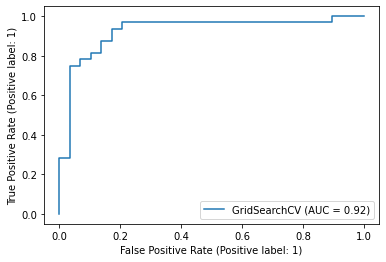

In [63]:
plot_roc_curve(gs_cb, X_test, y_test)

In [64]:
confusion_matrix(y_test, gs_cb.predict(X_test))

array([[24,  5],
       [ 3, 29]], dtype=int64)